# Final Notebook

This notebook shows the final functionality of the libraries created for this project. The files created are:
* `datasets.py` which contains the loader for different datasets
* `schedulers.py` which contains the Scheduler class for our Population Based algorithm
* `oracle.py` which contains the implementation for the Bayesian Optimization
* `model.py` which contains the network models which are being trained

In the following also `torch`, `hyperopt` will be used

In [1]:
import models, datasets, schedulers, oracles, RL_Actor, RL_model
import time
import torch
from hyperopt import hp, fmin, tpe, Trials
import matplotlib.pyplot as plt
import os
path = ""

To train the data we use the following routine:

In [2]:
n_configurations = 16
total_iterations = 8


config = {"prob": hp.uniform("prob",0.,.9),
    "lr": hp.loguniform("lr",-5,-4)
  # , "b1" : 1-hp.loguniform("b1",-4*2.3, -3*2.3),
  #  "b2" : 1-hp.loguniform("b2",-5*2.3, -4*2.3),  
  #  "eps1" : hp.loguniform("eps1",-10,-8),
  #    "eps2" : hp.loguniform("eps2",-10,-8),
         , "weight_decay": hp.uniform("weight_decay",0,1),
  #  "gamma" : 1- hp.loguniform("gamma",-2, -1),
  #        "exploration": hp.uniform("exploration",0,.1)
         }

    

In [3]:
model = RL_Actor.ReinforcementLearning #(model_config, "LeNet")


In [4]:
number = 1
temp_f2 = [0]*number
temp_time_f2 = [0]*number
for i in range(number):
    start_time = time.time()
    oracle = oracles.Guesser(config,1)
    scheduler = schedulers.Scheduler(model, total_iterations, n_configurations, oracle,4,False,1e100)
    scheduler.initialisation()
    scheduler.loop()
    temp_time_f2[i] = time.time() - start_time    
    temp_f2[i] =scheduler.plot

0
{'prob': 0.2581705114872556, 'lr': 0.010123926630143446, 'b1': 0.999, 'b2': 0.9999, 'eps': 1e-08, 'weight_decay': 0.21380594685724164, 'eps2': 1e-08, 'eps1': 1e-08, 'gamma': 0.99, 'exploration': 0.05, 'aiteration': 0}
0.05                                                  
  0%|          | 0/16 [00:00<?, ?trial/s, best loss=?]

job exception: 'ReinforcementLearning' object has no attribute 'train1'



  0%|          | 0/16 [00:00<?, ?trial/s, best loss=?]


AttributeError: 'ReinforcementLearning' object has no attribute 'train1'

In [ ]:
number = 10
temp_f2 = [0]*number
temp_time_f2 = [0]*number
for i in range(number):
    start_time = time.time()
    oracle = oracles.Guesser(config,0)
    scheduler = schedulers.Scheduler(model, total_iterations, n_configurations, oracle,1,False,1e100)
    scheduler.initialisation()
    scheduler.loop()
    temp_time_f2[i] = time.time() - start_time    
    temp_f2[i] =scheduler.plot
#scheduler.loop()
# ??? why is the counter aumenting the number of points total?

In [5]:
scheduler.parents[0].configuration_list

[{'aiteration': 0,
  'lr': 0.00783042165901341,
  'prob': 0.24817328461863988,
  'weight_decay': 0.011346969362258263},
 {'aiteration': 1,
  'lr': 0.00783042166009555,
  'prob': 0.2481732846152809,
  'weight_decay': 0.011346969360550564},
 {'aiteration': 2,
  'lr': 0.007830421664707096,
  'prob': 0.24817328461924035,
  'weight_decay': 0.0113469693560603},
 {'aiteration': 3,
  'lr': 0.00783042166556667,
  'prob': 0.2481732846131513,
  'weight_decay': 0.011346969364013106},
 {'aiteration': 4,
  'lr': 0.00783042164348536,
  'prob': 0.24817328459867918,
  'weight_decay': 0.011346969390853206},
 {'aiteration': 5,
  'lr': 0.007830421612040669,
  'prob': 0.2481732845683062,
  'weight_decay': 0.011346969430313611},
 {'aiteration': 6,
  'lr': 0.007830421690466272,
  'prob': 0.24817328466585128,
  'weight_decay': 0.011346969394117489},
 {'aiteration': 7,
  'lr': 0.007830421611718895,
  'prob': 0.2481732845671502,
  'weight_decay': 0.011346969308497054}]

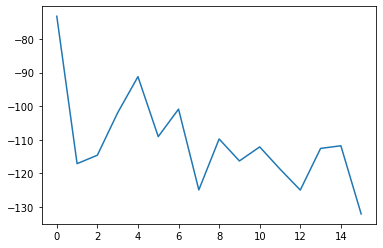

In [5]:
plt.plot(scheduler.plot[:16])

In [19]:
for _ in range(1):
    oracle = BayesOpt(config)
    oracle.compute_Once(function)


100%|██████████| 16/16 [03:06<00:00, 11.63s/trial, best loss: -120.75476904663802]


In [4]:
for _ in range(0):
    oracle = BayesOpt(config)
    start_time = time.time()
    oracle.compute_Once(function)
    print("Total Time : " +  str(time.time() - start_time))

for _ in range(10):

    model = datasets.TrainBoston #(model_config, "LeNet")
    oracle = oracles.Oracle(config,0)
    start_time = time.time()
    scheduler = schedulers.Scheduler(model, total_iterations, n_configurations, oracle,8)
    scheduler.initialisation()
    scheduler.loop()
    print("Total Time : " +  str(time.time() - start_time))
 

3
Total Time : 12.508248805999756
3
Total Time : 12.987349033355713
3
Total Time : 14.000119686126709
3
Total Time : 13.516711473464966
3
Total Time : 12.526519536972046
3
Total Time : 13.265217065811157
3
Total Time : 14.705759763717651
3
Total Time : 12.637008428573608
3
Total Time : 12.318013906478882
3
Total Time : 12.228050947189331


In [17]:
import numpy as np
from functools import *

def function(x):
   # print(x)
    model = model = RL_Actor.ReinforcementLearning(x)
    for _ in range(total_iterations):
        loss = model.step()
        #temp = dict(x)
        #temp.update({'loss' : loss})
        #temp.update({'test' : test})
        #temp.update({'iteration' :  model.i})

        #hyperlogger.on_result(temp)
    return -loss

class BayesOpt():
    def __init__(self, searchspace ):
        self.searchspace = searchspace

    def compute_Once(self,function): 
        fmin(function, self.searchspace, algo=partial(tpe.suggest, n_startup_jobs=1), max_evals=n_configurations, trials=Trials())

oracle = BayesOpt(config)

In [18]:
from ray import tune
from ray.tune.logger import *
class HyperLogger(tune.logger.Logger):
    def _init(self):
        progress_file = os.path.join("", "junk.csv")
        self._continuing = os.path.exists(progress_file)
        self._file = open(progress_file, "a")
        self._csv_out = None
    def on_result(self, result):
        tmp = result.copy()
        result = flatten_dict(tmp, delimiter="/")
        if self._csv_out is None:
            self._csv_out = csv.DictWriter(self._file, result.keys())
            self._csv_out.writeheader()

            #if not self._continuing:
        self._csv_out.writerow(
            {k: v
             for k, v in result.items() if k in self._csv_out.fieldnames})
        self._file.flush()
                   
hyperlogger = HyperLogger(config,"")

  


In [7]:

import argparse

import ray
from ray import tune
from ray.tune.schedulers.pb2 import PB2
from ray.tune.schedulers import PopulationBasedTraining

from ray.tune.examples.pbt_function import pbt_function

i=0

for _ in range(9):
    i+=1
    class TestLogger(tune.logger.Logger):
        def _init(self):
            progress_file = os.path.join(path, "junk"+str(i)+".csv")
            self._continuing = os.path.exists(progress_file)
            self._file = open(progress_file, "a")
            self._csv_out = None
        def on_result(self, result):
            tmp = result.copy()
            result = flatten_dict(tmp, delimiter="/")
            if self._csv_out is None:
                self._csv_out = csv.DictWriter(self._file, result.keys())
                self._csv_out.writeheader()
            self._csv_out.writerow(
                {k: v
                 for k, v in result.items() if k in self._csv_out.fieldnames})
            self._file.flush()

    parser = argparse.ArgumentParser()
    parser.add_argument(
        "--smoke-test", action="store_true", help="Finish quickly for testing")
    args, _ = parser.parse_known_args()
    ray.shutdown()
    ray.init(num_cpus=4)  # force pausing to happen for test

#    epsilon = 1e-10
    from ray.tune.suggest.hyperopt import HyperOptSearch
    from ray.tune.suggest import ConcurrencyLimiter

    algo = HyperOptSearch(metric="loss",
        mode="min")
    algo = ConcurrencyLimiter(algo, max_concurrent=4)

    pbt = PopulationBasedTraining(
        perturbation_interval=1,
            time_attr="training_iteration",

        hyperparam_mutations={
            # hyperparameter bounds.
     "lr": [0+epsilon, .1] #tune.uniform(1e-4, 0.1 ),#,1e-4), #*10
,     "weight_decay":[0+epsilon, .1]#tune.uniform(1, 5)#,1e-4), #*10 et 0
,     "b1": [.9, 1-epsilon]#,1e-4), #*10 et 0
 ,    "b2": [.99, 1-epsilon] #,1e-4), #*10 et 0
 ,    "droupout_prob": [0+epsilon, 1-epsilon]#,1e-4), #*10 et 0
            ,"eps": [6,20]
        })

    analysis = tune.run(
        train_boston_pb2,
  checkpoint_at_end=True,
        scheduler=pbt,
        metric="loss",
        mode="min",
        search_alg = algo,
        verbose=0,
        stop={
            "training_iteration": 5,
        },
        num_samples=72,
  reuse_actors=True,
loggers=[TestLogger],
        
          config= {
  "lr":  tune.uniform(0+epsilon, .1) #tune.uniform(1e-4, 0.1 ),#,1e-4), #*10
  ,     "weight_decay":tune.uniform(0+epsilon, .1)#tune.uniform(1, 5)#,1e-4), #*10 et 0
  ,     "b1": tune.uniform(.9, 1-epsilon)#,1e-4), #*10 et 0
  ,    "b2": tune.uniform(.99, 1-epsilon)#,1e-4), #*10 et 0
  ,    "droupout_prob": tune.uniform(0+epsilon, 1-epsilon)#,1e-4), #*10 et 0
    ,"eps": tune.uniform(6, 20)
                      })

    print("Best hyperparameters found were: ", analysis.best_config)

2021-03-28 12:47:09,759	INFO services.py:1174 -- View the Ray dashboard at http://127.0.0.1:8267
2021-03-28 12:47:13,413	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_f3504f10
2021-03-28 12:47:13,579	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_f353839c (score -95.17918007046569) -> train_boston_pb2_f3504f10 (score -97.09133731617646)
2021-03-28 12:47:13,580	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08263027811932089, 'weight_decay': 0.03937233957469472, 'b1': 0.9849438237389404, 'b2': 0.9920680713695973, 'droupout_prob': 0.9536685486055999, 'eps': 15.293366611240916} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=5790) 2021-03-28 12:47:13,589	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_f3504f10_1_b1=0.90875,b2=0.9981,droupout_pr

(pid=5789) 2021-03-28 12:47:14,491	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_f4f8eb42_6_b1=0.94731,b2=0.99086,droupout_prob=0.24301,eps=8.1563,lr=0.096774,weight_decay=0.05535_2021-03-28_12-47-14/tmp_8trp66arestore_from_object/./
(pid=5789) 2021-03-28 12:47:14,492	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.059278249740600586, '_episodes_total': None}
(pid=5789) 2021-03-28 12:47:14,491	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_f4f8eb42_6_b1=0.94731,b2=0.99086,droupout_prob=0.24301,eps=8.1563,lr=0.096774,weight_decay=0.05535_2021-03-28_12-47-14/tmp_8trp66arestore_from_object/./
(pid=5789) 2021-03-28 12:47:14,492	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None

2021-03-28 12:47:15,398	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.02635808509904352, 'weight_decay': 0.08537058816764165, 'b1': 0.9118968548535438, 'b2': 0.9972399262714731, 'droupout_prob': 0.001425140537991767, 'eps': 16.78715062428757} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=5792) 2021-03-28 12:47:15,386	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_f572bfd0_8_b1=0.9119,b2=0.99724,droupout_prob=0.0014251,eps=16.787,lr=0.026358,weight_decay=0.085371_2021-03-28_12-47-15/tmp6m0_blsjrestore_from_object/./
(pid=5792) 2021-03-28 12:47:15,387	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.022521257400512695, '_episodes_total': None}
(pid=5792) 2021-03-28 12:47:15,386	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoi

(pid=5789) 2021-03-28 12:47:15,707	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_f583da54_9_b1=0.96963,b2=0.99546,droupout_prob=0.44949,eps=15.958,lr=0.094329,weight_decay=0.034352_2021-03-28_12-47-15/tmpgd7r59d3restore_from_object/./
(pid=5789) 2021-03-28 12:47:15,707	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07486248016357422, '_episodes_total': None}
(pid=5789) 2021-03-28 12:47:15,707	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_f583da54_9_b1=0.96963,b2=0.99546,droupout_prob=0.44949,eps=15.958,lr=0.094329,weight_decay=0.034352_2021-03-28_12-47-15/tmpgd7r59d3restore_from_object/./
(pid=5789) 2021-03-28 12:47:15,707	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': Non

2021-03-28 12:47:17,181	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_f658d9b6 (score -0.4702477548636642) -> train_boston_pb2_f653bc9c (score -11.70532106885723)
2021-03-28 12:47:17,188	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.01022795145384339, 'weight_decay': 0.015014805060110515, 'b1': 0.9457495974734096, 'b2': 0.9907223216926275, 'droupout_prob': 0.6898631727235475, 'eps': 14.294254887287096} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
(pid=5789) 2021-03-28 12:47:17,199	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_f653bc9c_14_b1=0.91316,b2=0.99386,droupout_prob=0.93552,eps=13.684,lr=0.033713,weight_decay=0.094521_2021-03-28_12-47-16/tmpldp58d1vrestore_from_object/./
(pid=5789) 2021-03-28 12:47:17,199	INFO trainable.py:379 -- Current state after restoring: {'_iteration'

2021-03-28 12:47:18,398	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.03424164377509313, 'weight_decay': 0.08684202388666266, 'b1': 0.9365416058012102, 'b2': 0.9952807092424327, 'droupout_prob': 0.6438957364682375, 'eps': 10.147816662391303} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=5790) 2021-03-28 12:47:18,398	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_f6edeccc_17_b1=0.95609,b2=0.99875,droupout_prob=0.6626,eps=11.292,lr=0.0043631,weight_decay=0.086734_2021-03-28_12-47-17/tmpdc1w0x1crestore_from_object/./
(pid=5790) 2021-03-28 12:47:18,399	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.05933856964111328, '_episodes_total': None}
(pid=5790) 2021-03-28 12:47:18,398	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/an

2021-03-28 12:47:18,756	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.009658097227880814, 'weight_decay': 0.06455951676286817, 'b1': 0.926879868847816, 'b2': 0.9966056802532389, 'droupout_prob': 0.4320792111450318, 'eps': 19.5558302779181} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=5789) 2021-03-28 12:47:18,764	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_f728cf36_20_b1=0.93654,b2=0.99528,droupout_prob=0.6439,eps=10.148,lr=0.034242,weight_decay=0.086842_2021-03-28_12-47-17/tmp7eky1hcxrestore_from_object/./
(pid=5789) 2021-03-28 12:47:18,764	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.021121978759765625, '_episodes_total': None}
(pid=5789) 2021-03-28 12:47:18,764	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint:

2021-03-28 12:47:19,218	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=5789) 2021-03-28 12:47:19,228	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_f7c3f8b2_23_b1=0.96074,b2=0.99984,droupout_prob=0.38916,eps=12.309,lr=0.067493,weight_decay=0.094365_2021-03-28_12-47-18/tmp_9ugd7vhrestore_from_object/./
(pid=5789) 2021-03-28 12:47:19,228	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.04176068305969238, '_episodes_total': None}
(pid=5789) 2021-03-28 12:47:19,228	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_

(pid=5789) 2021-03-28 12:47:20,293	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_f7c3f8b2_23_b1=0.96074,b2=0.99984,droupout_prob=0.38916,eps=12.309,lr=0.067493,weight_decay=0.094365_2021-03-28_12-47-18/tmpdygbvay0restore_from_object/./
(pid=5789) 2021-03-28 12:47:20,293	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.013737201690673828, '_episodes_total': None}
(pid=5789) 2021-03-28 12:47:20,293	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_f7c3f8b2_23_b1=0.96074,b2=0.99984,droupout_prob=0.38916,eps=12.309,lr=0.067493,weight_decay=0.094365_2021-03-28_12-47-18/tmpdygbvay0restore_from_object/./
(pid=5789) 2021-03-28 12:47:20,293	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': 

2021-03-28 12:47:21,430	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.
(pid=5789) 2021-03-28 12:47:21,427	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_f917fd6c_29_b1=0.93337,b2=0.99453,droupout_prob=0.55087,eps=12.656,lr=0.04159,weight_decay=0.078579_2021-03-28_12-47-21/tmpnpga5zlrrestore_from_object/./
(pid=5789) 2021-03-28 12:47:21,427	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.014921426773071289, '_episodes_total': None}
(pid=5789) 2021-03-28 12:47:21,427	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_f917fd6c_29_b1=0.93337,b2=0.99453,droupout_prob=0.55087,eps=12.656,lr=0.04159,weight_decay=0.078579_2021-03-28_12-47-21/tmpnpga5zlrrestore_from_object/./
(pid=57

2021-03-28 12:47:22,015	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_f91e37b8 (score -0.10168605692246381) -> train_boston_pb2_f8f1ca20 (score -0.1605826359169156)
2021-03-28 12:47:22,015	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.0688974200827463, 'weight_decay': 0.09952163823410773, 'b1': 0.9816223249241155, 'b2': 0.9919113997608954, 'droupout_prob': 0.4195869445573655, 'eps': 12.097166695655885} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=5790) 2021-03-28 12:47:22,025	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_f8f1ca20_28_b1=0.92261,b2=0.99304,droupout_prob=0.31982,eps=19.874,lr=0.057491,weight_decay=0.063151_2021-03-28_12-47-20/tmpwny_4uderestore_from_object/./
(pid=5790) 2021-03-28 12:47:22,025	INFO trainable.py:379 -- Current state after restoring: {'_itera

(pid=5791) 2021-03-28 12:47:22,536	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_f9bcd008_31_b1=0.91752,b2=0.99167,droupout_prob=0.8205,eps=18.096,lr=0.048601,weight_decay=0.059751_2021-03-28_12-47-22/tmpm227lfiprestore_from_object/./
(pid=5791) 2021-03-28 12:47:22,537	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07878398895263672, '_episodes_total': None}
(pid=5791) 2021-03-28 12:47:22,536	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_f9bcd008_31_b1=0.91752,b2=0.99167,droupout_prob=0.8205,eps=18.096,lr=0.048601,weight_decay=0.059751_2021-03-28_12-47-22/tmpm227lfiprestore_from_object/./
(pid=5791) 2021-03-28 12:47:22,537	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': Non

2021-03-28 12:47:23,989	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_fa37d6d6 (score -0.05913088835921942) -> train_boston_pb2_fab28ee4 (score -0.16384941923852062)
2021-03-28 12:47:23,990	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=5790) 2021-03-28 12:47:23,997	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_fab28ee4_36_b1=0.98974,b2=0.9912,droupout_prob=0.99901,eps=6.0183,lr=0.052168,weight_decay=0.018388_2021-03-28_12-47-23/tmpeojbwiasrestore_from_object/./
(pid=5790) 2021-03-28 12:47:23,998	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07700061798095703, '_epis

(pid=5790) 2021-03-28 12:47:24,813	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_facd353c_38_b1=0.97652,b2=0.99039,droupout_prob=0.84991,eps=16.334,lr=0.089327,weight_decay=0.0095611_2021-03-28_12-47-24/tmpe0nbet84restore_from_object/./
(pid=5790) 2021-03-28 12:47:24,813	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.04964494705200195, '_episodes_total': None}
(pid=5790) 2021-03-28 12:47:24,813	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_facd353c_38_b1=0.97652,b2=0.99039,droupout_prob=0.84991,eps=16.334,lr=0.089327,weight_decay=0.0095611_2021-03-28_12-47-24/tmpe0nbet84restore_from_object/./
(pid=5790) 2021-03-28 12:47:24,813	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total':

2021-03-28 12:47:25,270	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08932697359544964, 'weight_decay': 0.00956110404311604, 'b1': 0.9765213419045425, 'b2': 0.9903885951090028, 'droupout_prob': 0.8499066437830523, 'eps': 16.334143690061953} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=5792) 2021-03-28 12:47:25,280	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_fb255762_40_b1=0.96361,b2=0.99441,droupout_prob=0.33296,eps=17.109,lr=0.087695,weight_decay=0.037891_2021-03-28_12-47-24/tmpuy8da1fnrestore_from_object/./
(pid=5792) 2021-03-28 12:47:25,280	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.06745338439941406, '_episodes_total': None}
(pid=5792) 2021-03-28 12:47:25,280	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkp

(pid=5791) 2021-03-28 12:47:25,831	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_fbaa28ca_41_b1=0.99066,b2=0.99277,droupout_prob=0.48242,eps=18.335,lr=0.077804,weight_decay=0.027171_2021-03-28_12-47-25/tmp7xsihxxwrestore_from_object/./
(pid=5791) 2021-03-28 12:47:25,831	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.0867609977722168, '_episodes_total': None}
(pid=5791) 2021-03-28 12:47:25,831	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_fbaa28ca_41_b1=0.99066,b2=0.99277,droupout_prob=0.48242,eps=18.335,lr=0.077804,weight_decay=0.027171_2021-03-28_12-47-25/tmp7xsihxxwrestore_from_object/./
(pid=5791) 2021-03-28 12:47:25,831	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': No

2021-03-28 12:47:27,171	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.029927790287001994, 'weight_decay': 0.008392547057787327, 'b1': 0.9309100279592258, 'b2': 0.9911473195898018, 'droupout_prob': 0.27199403291808527, 'eps': 7.706943985469914} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=5789) 2021-03-28 12:47:27,170	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_fc002248_44_b1=0.93091,b2=0.99115,droupout_prob=0.27199,eps=7.7069,lr=0.029928,weight_decay=0.0083925_2021-03-28_12-47-26/tmpi0z90orurestore_from_object/./
(pid=5789) 2021-03-28 12:47:27,170	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.07422542572021484, '_episodes_total': None}
(pid=5789) 2021-03-28 12:47:27,170	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkp

(pid=5791) 2021-03-28 12:47:27,951	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_fd00d93a_47_b1=0.9638,b2=0.99821,droupout_prob=0.78241,eps=14.191,lr=0.088895,weight_decay=0.04254_2021-03-28_12-47-27/tmplmbxs7q8restore_from_object/./
(pid=5791) 2021-03-28 12:47:27,952	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.013059854507446289, '_episodes_total': None}
(pid=5791) 2021-03-28 12:47:27,951	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_fd00d93a_47_b1=0.9638,b2=0.99821,droupout_prob=0.78241,eps=14.191,lr=0.088895,weight_decay=0.04254_2021-03-28_12-47-27/tmplmbxs7q8restore_from_object/./
(pid=5791) 2021-03-28 12:47:27,952	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None

2021-03-28 12:47:28,471	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=5789) 2021-03-28 12:47:28,466	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_fd0ae470_49_b1=0.9519,b2=0.99091,droupout_prob=0.0019953,eps=15.719,lr=0.022512,weight_decay=0.0047825_2021-03-28_12-47-27/tmpigx5r5zarestore_from_object/./
(pid=5789) 2021-03-28 12:47:28,466	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.030539751052856445, '_episodes_total': None}
(pid=5789) 2021-03-28 12:47:28,466	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/trai

2021-03-28 12:47:28,882	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.027715555336682615, 'weight_decay': 0.010235718484555185, 'b1': 0.9026584486531296, 'b2': 0.9914472744698309, 'droupout_prob': 0.23259937786917265, 'eps': 7.391616724533083} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
(pid=5791) 2021-03-28 12:47:28,893	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_fd00d93a_47_b1=0.9638,b2=0.99821,droupout_prob=0.78241,eps=14.191,lr=0.088895,weight_decay=0.04254_2021-03-28_12-47-27/tmpvt30gpxurestore_from_object/./
(pid=5791) 2021-03-28 12:47:28,893	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.029128551483154297, '_episodes_total': None}
(pid=5791) 2021-03-28 12:47:28,893	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoin

(pid=5789) 2021-03-28 12:47:29,506	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_fdce77dc_51_b1=0.97492,b2=0.99393,droupout_prob=0.057338,eps=9.8207,lr=0.09914,weight_decay=0.022743_2021-03-28_12-47-29/tmpn06h5no7restore_from_object/./
(pid=5789) 2021-03-28 12:47:29,506	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.05035233497619629, '_episodes_total': None}
(pid=5789) 2021-03-28 12:47:29,506	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_fdce77dc_51_b1=0.97492,b2=0.99393,droupout_prob=0.057338,eps=9.8207,lr=0.09914,weight_decay=0.022743_2021-03-28_12-47-29/tmpn06h5no7restore_from_object/./
(pid=5789) 2021-03-28 12:47:29,506	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': N

2021-03-28 12:47:30,331	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_fe700962 (score -0.028857006746179917) -> train_boston_pb2_fe5918ba (score -0.03947911075517243)
2021-03-28 12:47:30,332	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08376313204778814, 'weight_decay': 0.0021489582016278, 'b1': 0.9293718243697635, 'b2': 0.9959841102764497, 'droupout_prob': 0.08741458074477743, 'eps': 14.540896122111157} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=5792) 2021-03-28 12:47:30,343	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_fe5918ba_53_b1=0.96692,b2=0.99059,droupout_prob=0.028188,eps=16.457,lr=0.093712,weight_decay=0.017918_2021-03-28_12-47-30/tmpy7cth84irestore_from_object/./
(pid=5792) 2021-03-28 12:47:30,343	INFO trainable.py:379 -- Current state after restoring: {'_iteratio

2021-03-28 12:47:31,098	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08376313204778814, 'weight_decay': 0.0021489582016278, 'b1': 0.9293718243697635, 'b2': 0.9959841102764497, 'droupout_prob': 0.08741458074477743, 'eps': 14.540896122111157} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=5789) 2021-03-28 12:47:31,108	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_fed2c7d2_56_b1=0.93936,b2=0.99357,droupout_prob=0.21112,eps=10.392,lr=0.073802,weight_decay=0.024693_2021-03-28_12-47-30/tmphxstuv1srestore_from_object/./
(pid=5789) 2021-03-28 12:47:31,109	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08640909194946289, '_episodes_total': None}
(pid=5789) 2021-03-28 12:47:31,108	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint:

2021-03-28 12:47:32,231	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_ff83c2da (score -0.01679506138259289) -> train_boston_pb2_ff333f18 (score -0.05099618201162301)
2021-03-28 12:47:32,232	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.05294514318679622, 'weight_decay': 0.04654467239488906, 'b1': 0.9264751350844531, 'b2': 0.9970935512522543, 'droupout_prob': 0.042936213727340716, 'eps': 6.1643217648860675} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=5790) 2021-03-28 12:47:32,240	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_ff333f18_60_b1=0.93871,b2=0.99493,droupout_prob=0.087089,eps=10.401,lr=0.072707,weight_decay=0.0042542_2021-03-28_12-47-31/tmpwirs28b5restore_from_object/./
(pid=5790) 2021-03-28 12:47:32,240	INFO trainable.py:379 -- Current state after restoring: {'_

(pid=5789) 2021-03-28 12:47:33,011	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_ff333f18_60_b1=0.93871,b2=0.99493,droupout_prob=0.087089,eps=10.401,lr=0.072707,weight_decay=0.0042542_2021-03-28_12-47-31/tmp2pfcou4brestore_from_object/./
(pid=5789) 2021-03-28 12:47:33,011	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.0715782642364502, '_episodes_total': None}
(pid=5789) 2021-03-28 12:47:33,011	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_ff333f18_60_b1=0.93871,b2=0.99493,droupout_prob=0.087089,eps=10.401,lr=0.072707,weight_decay=0.0042542_2021-03-28_12-47-31/tmp2pfcou4brestore_from_object/./
(pid=5789) 2021-03-28 12:47:33,011	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total'

2021-03-28 12:47:33,565	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.03390560955924659, 'weight_decay': 0.059674863223697916, 'b1': 0.900368557808013, 'b2': 0.9988125490632938, 'droupout_prob': 0.3635757132309409, 'eps': 13.801120932761116} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=5790) 2021-03-28 12:47:33,573	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_004ea8ec_66_b1=0.90544,b2=0.99575,droupout_prob=0.29938,eps=11.388,lr=0.059332,weight_decay=0.050896_2021-03-28_12-47-33/tmpp2yr85ozrestore_from_object/./
(pid=5790) 2021-03-28 12:47:33,573	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03388071060180664, '_episodes_total': None}
(pid=5790) 2021-03-28 12:47:33,573	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoi

(pid=5790) 2021-03-28 12:47:34,378	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_0099c5de_67_b1=0.9042,b2=0.99635,droupout_prob=0.46452,eps=13.24,lr=0.062471,weight_decay=0.030137_2021-03-28_12-47-33/tmpd4srts7orestore_from_object/./
(pid=5790) 2021-03-28 12:47:34,378	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07622289657592773, '_episodes_total': None}
(pid=5790) 2021-03-28 12:47:34,378	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_0099c5de_67_b1=0.9042,b2=0.99635,droupout_prob=0.46452,eps=13.24,lr=0.062471,weight_decay=0.030137_2021-03-28_12-47-33/tmpd4srts7orestore_from_object/./
(pid=5790) 2021-03-28 12:47:34,378	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None,

(pid=5791) 2021-03-28 12:47:35,135	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_0111339e_70_b1=0.90912,b2=0.99783,droupout_prob=0.40245,eps=9.421,lr=0.054499,weight_decay=0.032359_2021-03-28_12-47-34/tmpena84gw9restore_from_object/./
(pid=5791) 2021-03-28 12:47:35,135	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03859663009643555, '_episodes_total': None}
(pid=5791) 2021-03-28 12:47:35,135	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_0111339e_70_b1=0.90912,b2=0.99783,droupout_prob=0.40245,eps=9.421,lr=0.054499,weight_decay=0.032359_2021-03-28_12-47-34/tmpena84gw9restore_from_object/./
(pid=5791) 2021-03-28 12:47:35,135	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': Non

2021-03-28 12:47:35,682	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_01321c44 (score -0.017660162028144386) -> train_boston_pb2_00fd0a68 (score -0.027730191455167884)
2021-03-28 12:47:35,683	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=5792) 2021-03-28 12:47:35,693	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-11/train_boston_pb2_00fd0a68_69_b1=0.9205,b2=0.99682,droupout_prob=0.21316,eps=12.405,lr=0.064474,weight_decay=0.075509_2021-03-28_12-47-34/tmp7pet2afwrestore_from_object/./
(pid=5792) 2021-03-28 12:47:35,693	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07177734375, '_episodes_to

Best hyperparameters found were:  {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}


2021-03-28 12:47:39,264	INFO services.py:1174 -- View the Ray dashboard at http://127.0.0.1:8267
2021-03-28 12:47:43,177	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_04ed9462 (score -1.003929437375536) -> train_boston_pb2_04f2ceaa (score -4489.8305759803925)
2021-03-28 12:47:43,178	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.0019480526407794885, 'weight_decay': 0.025647125002743743, 'b1': 0.935285877623144, 'b2': 0.9978519824891818, 'droupout_prob': 0.9210674489082112, 'eps': 11.890914780538047} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=6331) 2021-03-28 12:47:43,190	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_04f2ceaa_3_b1=0.95081,b2=0.99305,droupout_prob=0.52748,eps=11.332,lr=0.096088,weight_decay=0.0068897_2021-03-28_12-47-40/tmpgla0ptvnrestore_from_o

2021-03-28 12:47:44,118	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_069bf1fa (score -0.47432809717514934) -> train_boston_pb2_06a2bc88 (score -72.92109470741421)
2021-03-28 12:47:44,120	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.021039282362933936, 'weight_decay': 0.06791465696621815, 'b1': 0.95557535782765, 'b2': 0.9957259132291049, 'droupout_prob': 0.7766186648800413, 'eps': 7.193280130185418} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=6330) 2021-03-28 12:47:44,112	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_06a07ed2_6_b1=0.94806,b2=0.99049,droupout_prob=0.2805,eps=13.888,lr=0.068879,weight_decay=0.011602_2021-03-28_12-47-43/tmpdsz57c5orestore_from_object/./
(pid=6330) 2021-03-28 12:47:44,112	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_t

(pid=6331) 2021-03-28 12:47:44,694	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_06a46de4_8_b1=0.99168,b2=0.99914,droupout_prob=0.7109,eps=19.906,lr=0.010603,weight_decay=0.024025_2021-03-28_12-47-44/tmpqzoo6t9prestore_from_object/./
(pid=6331) 2021-03-28 12:47:44,695	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.056325674057006836, '_episodes_total': None}
(pid=6331) 2021-03-28 12:47:44,694	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_06a46de4_8_b1=0.99168,b2=0.99914,droupout_prob=0.7109,eps=19.906,lr=0.010603,weight_decay=0.024025_2021-03-28_12-47-44/tmpqzoo6t9prestore_from_object/./
(pid=6331) 2021-03-28 12:47:44,695	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None

(pid=6331) 2021-03-28 12:47:45,441	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_07031f06_9_b1=0.91749,b2=0.99322,droupout_prob=0.69788,eps=15.772,lr=0.055839,weight_decay=0.076258_2021-03-28_12-47-44/tmpnju0egeyrestore_from_object/./
(pid=6331) 2021-03-28 12:47:45,441	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08484625816345215, '_episodes_total': None}
(pid=6331) 2021-03-28 12:47:45,441	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_07031f06_9_b1=0.91749,b2=0.99322,droupout_prob=0.69788,eps=15.772,lr=0.055839,weight_decay=0.076258_2021-03-28_12-47-44/tmpnju0egeyrestore_from_object/./
(pid=6331) 2021-03-28 12:47:45,441	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': Non

(pid=6331) 2021-03-28 12:47:45,759	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_07a22c40_15_b1=0.99175,b2=0.99853,droupout_prob=0.47816,eps=10.472,lr=0.079445,weight_decay=0.027889_2021-03-28_12-47-45/tmpgjcthaqerestore_from_object/./
(pid=6331) 2021-03-28 12:47:45,759	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.04135417938232422, '_episodes_total': None}
(pid=6331) 2021-03-28 12:47:45,759	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_07a22c40_15_b1=0.99175,b2=0.99853,droupout_prob=0.47816,eps=10.472,lr=0.079445,weight_decay=0.027889_2021-03-28_12-47-45/tmpgjcthaqerestore_from_object/./
(pid=6331) 2021-03-28 12:47:45,759	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': N

2021-03-28 12:47:46,744	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_0813d4c6 (score -0.03606683366438922) -> train_boston_pb2_08103366 (score -0.15456443674424114)
2021-03-28 12:47:46,746	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.032278378876221946, 'weight_decay': 0.02636097546274002, 'b1': 0.9770886609013886, 'b2': 0.9938708404348008, 'droupout_prob': 0.8371650485796108, 'eps': 8.763063885336386} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=6331) 2021-03-28 12:47:46,757	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_08103366_19_b1=0.93599,b2=0.99003,droupout_prob=0.13602,eps=17.923,lr=0.063482,weight_decay=0.073963_2021-03-28_12-47-46/tmpu4u99ouhrestore_from_object/./
(pid=6331) 2021-03-28 12:47:46,757	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3,

(pid=6332) 2021-03-28 12:47:47,334	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_087919d0_21_b1=0.90101,b2=0.99979,droupout_prob=0.38978,eps=16.309,lr=0.075343,weight_decay=0.055391_2021-03-28_12-47-46/tmpvy8uzfrhrestore_from_object/./
(pid=6332) 2021-03-28 12:47:47,334	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.022271394729614258, '_episodes_total': None}
(pid=6332) 2021-03-28 12:47:47,334	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_087919d0_21_b1=0.90101,b2=0.99979,droupout_prob=0.38978,eps=16.309,lr=0.075343,weight_decay=0.055391_2021-03-28_12-47-46/tmpvy8uzfrhrestore_from_object/./
(pid=6332) 2021-03-28 12:47:47,334	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': 

(pid=6331) 2021-03-28 12:47:47,782	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_08b36770_24_b1=0.99995,b2=0.99986,droupout_prob=0.0047186,eps=12.406,lr=0.084491,weight_decay=0.018306_2021-03-28_12-47-47/tmpx032ukuirestore_from_object/./
(pid=6331) 2021-03-28 12:47:47,782	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.04669070243835449, '_episodes_total': None}
(pid=6331) 2021-03-28 12:47:47,782	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_08b36770_24_b1=0.99995,b2=0.99986,droupout_prob=0.0047186,eps=12.406,lr=0.084491,weight_decay=0.018306_2021-03-28_12-47-47/tmpx032ukuirestore_from_object/./
(pid=6331) 2021-03-28 12:47:47,782	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total

(pid=6332) 2021-03-28 12:47:48,780	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_087919d0_21_b1=0.90101,b2=0.99979,droupout_prob=0.38978,eps=16.309,lr=0.075343,weight_decay=0.055391_2021-03-28_12-47-46/tmpw0ov0y7irestore_from_object/./
(pid=6332) 2021-03-28 12:47:48,780	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08940386772155762, '_episodes_total': None}
(pid=6332) 2021-03-28 12:47:48,780	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_087919d0_21_b1=0.90101,b2=0.99979,droupout_prob=0.38978,eps=16.309,lr=0.075343,weight_decay=0.055391_2021-03-28_12-47-46/tmpw0ov0y7irestore_from_object/./
(pid=6332) 2021-03-28 12:47:48,780	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': N

(pid=6330) 2021-03-28 12:47:49,505	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_08b36770_24_b1=0.99995,b2=0.99986,droupout_prob=0.0047186,eps=12.406,lr=0.084491,weight_decay=0.018306_2021-03-28_12-47-47/tmpoyddm61arestore_from_object/./
(pid=6330) 2021-03-28 12:47:49,505	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08318901062011719, '_episodes_total': None}
(pid=6330) 2021-03-28 12:47:49,505	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_08b36770_24_b1=0.99995,b2=0.99986,droupout_prob=0.0047186,eps=12.406,lr=0.084491,weight_decay=0.018306_2021-03-28_12-47-47/tmpoyddm61arestore_from_object/./
(pid=6330) 2021-03-28 12:47:49,505	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total

2021-03-28 12:47:50,294	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.07525671778949553, 'weight_decay': 0.057033793434293364, 'b1': 0.9024438371289982, 'b2': 0.9997621415189153, 'droupout_prob': 0.398099511566046, 'eps': 19.835092929787166} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=6332) 2021-03-28 12:47:50,286	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_09a7df44_25_b1=0.90244,b2=0.99976,droupout_prob=0.3981,eps=19.835,lr=0.075257,weight_decay=0.057034_2021-03-28_12-47-48/tmps9_pnd_orestore_from_object/./
(pid=6332) 2021-03-28 12:47:50,286	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08455967903137207, '_episodes_total': None}
(pid=6332) 2021-03-28 12:47:50,286	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/an

2021-03-28 12:47:51,140	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_0a5c565e (score -0.021300322869244742) -> train_boston_pb2_0a831c8a (score -0.026318853976679782)
2021-03-28 12:47:51,141	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.06830187924355746, 'weight_decay': 0.048644832585289156, 'b1': 0.9788841767745314, 'b2': 0.9995074270429612, 'droupout_prob': 0.2186712418023396, 'eps': 18.91502943006943} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=6332) 2021-03-28 12:47:51,148	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_0a831c8a_30_b1=0.90062,b2=0.99714,droupout_prob=0.38167,eps=19.991,lr=0.07384,weight_decay=0.057299_2021-03-28_12-47-50/tmpn23cm2ojrestore_from_object/./
(pid=6332) 2021-03-28 12:47:51,148	INFO trainable.py:379 -- Current state after restoring: {'_iter

(pid=6332) 2021-03-28 12:47:52,631	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_0b246e6e_33_b1=0.94189,b2=0.99815,droupout_prob=0.0032331,eps=14.311,lr=0.039906,weight_decay=0.041404_2021-03-28_12-47-51/tmpqlh_q4_qrestore_from_object/./
(pid=6332) 2021-03-28 12:47:52,631	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.04343700408935547, '_episodes_total': None}
(pid=6332) 2021-03-28 12:47:52,631	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_0b246e6e_33_b1=0.94189,b2=0.99815,droupout_prob=0.0032331,eps=14.311,lr=0.039906,weight_decay=0.041404_2021-03-28_12-47-51/tmpqlh_q4_qrestore_from_object/./
(pid=6332) 2021-03-28 12:47:52,631	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total

(pid=6331) 2021-03-28 12:47:53,311	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_0c18ad1c_37_b1=0.92732,b2=0.99795,droupout_prob=0.017786,eps=14.564,lr=0.03753,weight_decay=0.063156_2021-03-28_12-47-53/tmpp3z7fap1restore_from_object/./
(pid=6331) 2021-03-28 12:47:53,312	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.016350269317626953, '_episodes_total': None}
(pid=6331) 2021-03-28 12:47:53,311	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_0c18ad1c_37_b1=0.92732,b2=0.99795,droupout_prob=0.017786,eps=14.564,lr=0.03753,weight_decay=0.063156_2021-03-28_12-47-53/tmpp3z7fap1restore_from_object/./
(pid=6331) 2021-03-28 12:47:53,312	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': 

(pid=6332) 2021-03-28 12:47:53,824	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_0b505060_35_b1=0.98228,b2=0.99498,droupout_prob=0.21803,eps=18.974,lr=0.067299,weight_decay=0.048663_2021-03-28_12-47-51/tmpeulg8vexrestore_from_object/./
(pid=6332) 2021-03-28 12:47:53,824	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.09789204597473145, '_episodes_total': None}
(pid=6332) 2021-03-28 12:47:53,824	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_0b505060_35_b1=0.98228,b2=0.99498,droupout_prob=0.21803,eps=18.974,lr=0.067299,weight_decay=0.048663_2021-03-28_12-47-51/tmpeulg8vexrestore_from_object/./
(pid=6332) 2021-03-28 12:47:53,824	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': N

(pid=6333) 2021-03-28 12:47:54,698	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_0c4d00f8_38_b1=0.94481,b2=0.99623,droupout_prob=0.058483,eps=11.791,lr=0.036431,weight_decay=0.085647_2021-03-28_12-47-53/tmp_fvnog0xrestore_from_object/./
(pid=6333) 2021-03-28 12:47:54,699	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07006454467773438, '_episodes_total': None}
(pid=6333) 2021-03-28 12:47:54,698	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_0c4d00f8_38_b1=0.94481,b2=0.99623,droupout_prob=0.058483,eps=11.791,lr=0.036431,weight_decay=0.085647_2021-03-28_12-47-53/tmp_fvnog0xrestore_from_object/./
(pid=6333) 2021-03-28 12:47:54,699	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total':

(pid=6332) 2021-03-28 12:47:55,422	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_0d2c934e_42_b1=0.94063,b2=0.99402,droupout_prob=0.19247,eps=12.608,lr=0.034939,weight_decay=0.086566_2021-03-28_12-47-54/tmpzc4veafprestore_from_object/./
(pid=6332) 2021-03-28 12:47:55,422	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.044293880462646484, '_episodes_total': None}
(pid=6332) 2021-03-28 12:47:55,422	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_0d2c934e_42_b1=0.94063,b2=0.99402,droupout_prob=0.19247,eps=12.608,lr=0.034939,weight_decay=0.086566_2021-03-28_12-47-54/tmpzc4veafprestore_from_object/./
(pid=6332) 2021-03-28 12:47:55,422	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': 

2021-03-28 12:47:56,170	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.003006008232763868, 'weight_decay': 0.09868476252785205, 'b1': 0.9227992650576289, 'b2': 0.9931270832131526, 'droupout_prob': 0.3225279820222246, 'eps': 11.153453833061281} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
(pid=6333) 2021-03-28 12:47:56,163	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_0db650de_45_b1=0.95677,b2=0.99493,droupout_prob=0.25598,eps=15.144,lr=0.024536,weight_decay=0.093509_2021-03-28_12-47-55/tmp8ive6gynrestore_from_object/./
(pid=6333) 2021-03-28 12:47:56,163	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.031183719635009766, '_episodes_total': None}
(pid=6333) 2021-03-28 12:47:56,163	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoin

2021-03-28 12:47:56,680	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=6331) 2021-03-28 12:47:56,678	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_0db650de_45_b1=0.95677,b2=0.99493,droupout_prob=0.25598,eps=15.144,lr=0.024536,weight_decay=0.093509_2021-03-28_12-47-55/tmpazk9knyxrestore_from_object/./
(pid=6331) 2021-03-28 12:47:56,679	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.04750347137451172, '_episodes_total': None}
(pid=6331) 2021-03-28 12:47:56,678	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_0db650de

(pid=6332) 2021-03-28 12:47:57,295	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_0e76eef2_50_b1=0.93244,b2=0.99374,droupout_prob=0.096756,eps=10.415,lr=0.032104,weight_decay=0.097675_2021-03-28_12-47-56/tmp7gop_vx1restore_from_object/./
(pid=6332) 2021-03-28 12:47:57,295	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.03274273872375488, '_episodes_total': None}
(pid=6332) 2021-03-28 12:47:57,295	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_0e76eef2_50_b1=0.93244,b2=0.99374,droupout_prob=0.096756,eps=10.415,lr=0.032104,weight_decay=0.097675_2021-03-28_12-47-56/tmp7gop_vx1restore_from_object/./
(pid=6332) 2021-03-28 12:47:57,295	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total':

2021-03-28 12:47:57,986	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_0eef4eec (score -0.017980486738915537) -> train_boston_pb2_0e624fa6 (score -0.01923291005340277)
2021-03-28 12:47:57,988	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.04350326282327147, 'weight_decay': 0.09987228316823014, 'b1': 0.9511877279124236, 'b2': 0.9944073294678797, 'droupout_prob': 0.15107228381093507, 'eps': 14.101834469894303} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
2021-03-28 12:47:58,001	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_0eef4eec (score -0.017980486738915537) -> train_boston_pb2_0ec2bc6a (score -0.020623169693292354)
2021-03-28 12:47:58,004	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.04350326282327147, 'weight_decay': 0.09987228316823014, 'b1': 0.9511877279124236, 'b2': 0.9944073294678797, 'droupout_prob': 0.15107228381093507, 'e

2021-03-28 12:47:58,408	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_0e76eef2 (score -0.017731491257162654) -> train_boston_pb2_0eef4eec (score -0.017921651110929603)
2021-03-28 12:47:58,408	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.03210371129966925, 'weight_decay': 0.09767498891203463, 'b1': 0.9324355873714136, 'b2': 0.9937416283145852, 'droupout_prob': 0.09675559525159819, 'eps': 10.415113559157856} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=6330) 2021-03-28 12:47:58,416	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_0eef4eec_52_b1=0.95119,b2=0.99441,droupout_prob=0.15107,eps=14.102,lr=0.043503,weight_decay=0.099872_2021-03-28_12-47-57/tmpmd3ir7e4restore_from_object/./
(pid=6330) 2021-03-28 12:47:58,416	INFO trainable.py:379 -- Current state after restoring: {'_iteration':

2021-03-28 12:47:58,881	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
2021-03-28 12:47:58,893	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_0ec2bc6a (score -0.0178797396959043) -> train_boston_pb2_0f4ebb3e (score -0.019515818240595798)
2021-03-28 12:47:58,895	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=6331) 2021-03-28 12:47:58,904	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_0f4ebb3e_54_b1=0.97054,b2=0.99024,droupout_pro

2021-03-28 12:47:59,566	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=6333) 2021-03-28 12:47:59,449	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_0fa88c9a_57_b1=0.97144,b2=0.99289,droupout_prob=0.75254,eps=12.969,lr=0.011316,weight_decay=0.076908_2021-03-28_12-47-58/tmpnfrc8bscrestore_from_object/./
(pid=6333) 2021-03-28 12:47:59,449	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03704547882080078, '_episodes_total': None}
(pid=6333) 2021-03-28 12:47:59,449	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_

2021-03-28 12:47:59,880	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_0fa1dc9c (score -0.017612123021892474) -> train_boston_pb2_101d415c (score -0.018409356182696773)
2021-03-28 12:47:59,880	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=6331) 2021-03-28 12:47:59,888	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_101d415c_59_b1=0.94891,b2=0.99454,droupout_prob=0.53427,eps=8.5875,lr=0.019919,weight_decay=0.067329_2021-03-28_12-47-59/tmpy8jptr2orestore_from_object/./
(pid=6331) 2021-03-28 12:47:59,888	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.0716946

2021-03-28 12:48:00,348	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_106323a2
2021-03-28 12:48:00,361	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_1069c3a6
2021-03-28 12:48:00,369	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_105b3af2
(pid=6330) 2021-03-28 12:48:00,347	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_105b3af2_61_b1=0.99028,b2=0.99055,droupout_prob=0.59689,eps=10.908,lr=0.030642,weight_decay=0.051367_2021-03-28_12-48-00/tmpxvgm42x1restore_from_object/./
(pid=6330) 2021-03-28 12:48:00,347	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02536463737487793, '_episodes_total': None}
(pid=6330) 2021-03-28 12:48:00,347	INFO trainable.py:372 -- Restored on 192.168.1.23 from check

(pid=6333) 2021-03-28 12:48:01,003	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_106323a2_62_b1=0.96423,b2=0.99591,droupout_prob=0.82171,eps=7.2482,lr=0.027955,weight_decay=0.061868_2021-03-28_12-48-00/tmpnkc9mkqqrestore_from_object/./
(pid=6333) 2021-03-28 12:48:01,004	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08973479270935059, '_episodes_total': None}
(pid=6333) 2021-03-28 12:48:01,003	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_106323a2_62_b1=0.96423,b2=0.99591,droupout_prob=0.82171,eps=7.2482,lr=0.027955,weight_decay=0.061868_2021-03-28_12-48-00/tmpnkc9mkqqrestore_from_object/./
(pid=6333) 2021-03-28 12:48:01,004	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': N

(pid=6332) 2021-03-28 12:48:01,517	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_10da5c42_65_b1=0.99397,b2=0.9928,droupout_prob=0.63785,eps=16.236,lr=0.0081702,weight_decay=0.095526_2021-03-28_12-48-00/tmppi4gkv20restore_from_object/./
(pid=6332) 2021-03-28 12:48:01,517	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.012832880020141602, '_episodes_total': None}
(pid=6332) 2021-03-28 12:48:01,517	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_10da5c42_65_b1=0.99397,b2=0.9928,droupout_prob=0.63785,eps=16.236,lr=0.0081702,weight_decay=0.095526_2021-03-28_12-48-00/tmppi4gkv20restore_from_object/./
(pid=6332) 2021-03-28 12:48:01,517	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': 

(pid=6330) 2021-03-28 12:48:02,921	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_118dd1d2_70_b1=0.94991,b2=0.99433,droupout_prob=0.14066,eps=9.9396,lr=0.052815,weight_decay=0.072273_2021-03-28_12-48-02/tmpdzyhawwirestore_from_object/./
(pid=6330) 2021-03-28 12:48:02,921	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.018899917602539062, '_episodes_total': None}
(pid=6330) 2021-03-28 12:48:02,921	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_118dd1d2_70_b1=0.94991,b2=0.99433,droupout_prob=0.14066,eps=9.9396,lr=0.052815,weight_decay=0.072273_2021-03-28_12-48-02/tmpdzyhawwirestore_from_object/./
(pid=6330) 2021-03-28 12:48:02,921	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': 

2021-03-28 12:48:03,437	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_11de61f6 (score -0.01732012804816751) -> train_boston_pb2_11b8ff2e (score -0.018280971284006155)
2021-03-28 12:48:03,441	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
(pid=6332) 2021-03-28 12:48:03,449	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-47-40/train_boston_pb2_11b8ff2e_71_b1=0.93066,b2=0.99173,droupout_prob=0.55606,eps=12.858,lr=0.043479,weight_decay=0.07873_2021-03-28_12-48-02/tmpz2yulkw7restore_from_object/./
(pid=6332) 2021-03-28 12:48:03,449	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.0646505355834961, '_episodes_total

Best hyperparameters found were:  {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}


2021-03-28 12:48:07,824	INFO services.py:1174 -- View the Ray dashboard at http://127.0.0.1:8267
(pid=6793) 2021-03-28 12:48:12,595	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_162ac52e_3_b1=0.90345,b2=0.99269,droupout_prob=0.4101,eps=14.593,lr=0.064513,weight_decay=0.062996_2021-03-28_12-48-09/tmpqd12cz9drestore_from_object/./
(pid=6793) 2021-03-28 12:48:12,596	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.027356624603271484, '_episodes_total': None}
(pid=6793) 2021-03-28 12:48:12,595	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_162ac52e_3_b1=0.90345,b2=0.99269,droupout_prob=0.4101,eps=14.593,lr=0.064513,weight_decay=0.062996_2021-03-28_12-48-09/tmpqd12cz9drestore_from_object/./
(pid=6793) 2021-03-28 12:48:12,596	I

(pid=6791) 2021-03-28 12:48:13,108	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_162d887c_4_b1=0.97331,b2=0.99657,droupout_prob=0.98886,eps=15.366,lr=0.093779,weight_decay=0.055737_2021-03-28_12-48-09/tmp9vy0sdxnrestore_from_object/./
(pid=6791) 2021-03-28 12:48:13,108	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.019911527633666992, '_episodes_total': None}
(pid=6791) 2021-03-28 12:48:13,108	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_162d887c_4_b1=0.97331,b2=0.99657,droupout_prob=0.98886,eps=15.366,lr=0.093779,weight_decay=0.055737_2021-03-28_12-48-09/tmp9vy0sdxnrestore_from_object/./
(pid=6791) 2021-03-28 12:48:13,108	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': No

2021-03-28 12:48:13,664	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_1622fea2 (score -0.02392595188290465) -> train_boston_pb2_162d887c (score -8.863007788564644)
2021-03-28 12:48:13,665	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.012833769550075138, 'weight_decay': 0.032658119778248104, 'b1': 0.912149881705816, 'b2': 0.9994580509954587, 'droupout_prob': 0.7403137688010375, 'eps': 17.43497039314524} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=6791) 2021-03-28 12:48:13,674	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_162d887c_4_b1=0.97331,b2=0.99657,droupout_prob=0.98886,eps=15.366,lr=0.093779,weight_decay=0.055737_2021-03-28_12-48-09/tmpil40t9d7restore_from_object/./
(pid=6791) 2021-03-28 12:48:13,675	INFO trainable.py:379 -- Current state after restoring: {'_iteratio

(pid=6790) 2021-03-28 12:48:14,047	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_186b8af8_7_b1=0.95366,b2=0.9998,droupout_prob=0.72937,eps=16.556,lr=0.011604,weight_decay=0.025511_2021-03-28_12-48-13/tmpgg9w0ty1restore_from_object/./
(pid=6790) 2021-03-28 12:48:14,047	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01709294319152832, '_episodes_total': None}
(pid=6790) 2021-03-28 12:48:14,047	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_186b8af8_7_b1=0.95366,b2=0.9998,droupout_prob=0.72937,eps=16.556,lr=0.011604,weight_decay=0.025511_2021-03-28_12-48-13/tmpgg9w0ty1restore_from_object/./
(pid=6790) 2021-03-28 12:48:14,047	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None,

2021-03-28 12:48:14,549	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_1880efec (score -0.11772876627304975) -> train_boston_pb2_18a8369c (score -9.246404909620098)
2021-03-28 12:48:14,552	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.009692662514716332, 'weight_decay': 0.0052331547834567685, 'b1': 0.9348588263600413, 'b2': 0.9991329155444741, 'droupout_prob': 0.074634348925757, 'eps': 13.258424930457982} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=6792) 2021-03-28 12:48:14,563	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_18a8369c_9_b1=0.94472,b2=0.99542,droupout_prob=0.78952,eps=18.562,lr=0.099593,weight_decay=0.03298_2021-03-28_12-48-14/tmp6szge030restore_from_object/./
(pid=6792) 2021-03-28 12:48:14,563	INFO trainable.py:379 -- Current state after restoring: {'_it

2021-03-28 12:48:15,090	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.01160392308799043, 'weight_decay': 0.025511050078143076, 'b1': 0.9536560490996063, 'b2': 0.9998038295330013, 'droupout_prob': 0.7293692806600878, 'eps': 16.55619319882292} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=6791) 2021-03-28 12:48:15,099	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_190acd84_10_b1=0.90577,b2=0.99179,droupout_prob=0.12673,eps=10.611,lr=0.093409,weight_decay=0.0052797_2021-03-28_12-48-14/tmpu7ffafq1restore_from_object/./
(pid=6791) 2021-03-28 12:48:15,099	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07879519462585449, '_episodes_total': None}
(pid=6791) 2021-03-28 12:48:15,099	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoin

2021-03-28 12:48:15,382	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_19598e7e
(pid=6792) 2021-03-28 12:48:15,382	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_19438192_11_b1=0.94756,b2=0.99947,droupout_prob=0.87187,eps=16.778,lr=0.052396,weight_decay=0.046591_2021-03-28_12-48-15/tmpt0pxuspzrestore_from_object/./
(pid=6792) 2021-03-28 12:48:15,382	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.019239187240600586, '_episodes_total': None}
(pid=6792) 2021-03-28 12:48:15,382	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_19438192_11_b1=0.94756,b2=0.99947,droupout_prob=0.87187,eps=16.778,lr=0.052396,weight_decay=0.046591_2021-03-28_12-48-15/tmpt0pxuspzrestore_from_object/./
(pid=

2021-03-28 12:48:15,817	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.05239598128916821, 'weight_decay': 0.04659144472514053, 'b1': 0.9475623557845314, 'b2': 0.9994720164226318, 'droupout_prob': 0.8718748423679171, 'eps': 16.77809478372064} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
(pid=6793) 2021-03-28 12:48:15,812	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_19598e7e_12_b1=0.9895,b2=0.99048,droupout_prob=0.17435,eps=9.9009,lr=0.058901,weight_decay=0.017791_2021-03-28_12-48-15/tmpbcn526fwrestore_from_object/./
(pid=6793) 2021-03-28 12:48:15,812	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08305168151855469, '_episodes_total': None}
(pid=6793) 2021-03-28 12:48:15,812	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/

2021-03-28 12:48:16,554	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_19d5a748 (score -0.16074752807617188) -> train_boston_pb2_19bf489a (score -0.8308180266735601)
2021-03-28 12:48:16,555	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.0140255338053997, 'weight_decay': 0.01417833502243661, 'b1': 0.9089020221882723, 'b2': 0.9989236767971875, 'droupout_prob': 0.7421651025629683, 'eps': 8.895909776017339} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
(pid=6793) 2021-03-28 12:48:16,567	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_19bf489a_16_b1=0.9177,b2=0.99343,droupout_prob=0.46204,eps=17.777,lr=0.0087776,weight_decay=0.0060156_2021-03-28_12-48-15/tmprivtxt35restore_from_object/./
(pid=6793) 2021-03-28 12:48:16,567	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2

2021-03-28 12:48:17,434	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_1a4a4cec
(pid=6791) 2021-03-28 12:48:17,435	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1a6b2fde_20_b1=0.9712,b2=0.99568,droupout_prob=0.24688,eps=16.05,lr=0.013155,weight_decay=0.0622_2021-03-28_12-48-17/tmp91evr0r2restore_from_object/./
(pid=6791) 2021-03-28 12:48:17,435	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.0346531867980957, '_episodes_total': None}
(pid=6791) 2021-03-28 12:48:17,435	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1a6b2fde_20_b1=0.9712,b2=0.99568,droupout_prob=0.24688,eps=16.05,lr=0.013155,weight_decay=0.0622_2021-03-28_12-48-17/tmp91evr0r2restore_from_object/./
(pid=6791) 2021

2021-03-28 12:48:17,662	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.03400473139664358, 'weight_decay': 0.03466767545718241, 'b1': 0.9585018298293774, 'b2': 0.997021022588226, 'droupout_prob': 0.5781285981141109, 'eps': 19.440642519338727} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=6793) 2021-03-28 12:48:17,673	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1a4a4cec_19_b1=0.96581,b2=0.99437,droupout_prob=0.18713,eps=8.6351,lr=0.084888,weight_decay=0.077999_2021-03-28_12-48-16/tmp9pst0kdgrestore_from_object/./
(pid=6793) 2021-03-28 12:48:17,673	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.020089387893676758, '_episodes_total': None}
(pid=6793) 2021-03-28 12:48:17,673	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home

2021-03-28 12:48:18,104	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_1a4a4cec (score -0.19025538949405446) -> train_boston_pb2_1a6b2fde (score -1.6710597019569546)
2021-03-28 12:48:18,106	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=6791) 2021-03-28 12:48:18,118	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1a6b2fde_20_b1=0.9712,b2=0.99568,droupout_prob=0.24688,eps=16.05,lr=0.013155,weight_decay=0.0622_2021-03-28_12-48-17/tmp5ju67lv4restore_from_object/./
(pid=6791) 2021-03-28 12:48:18,119	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08442854881286621, '_episodes_total': None

(pid=6790) 2021-03-28 12:48:18,719	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1afca608_23_b1=0.93501,b2=0.99745,droupout_prob=0.7416,eps=11.221,lr=0.039063,weight_decay=0.022788_2021-03-28_12-48-17/tmp_uode6xorestore_from_object/./
(pid=6790) 2021-03-28 12:48:18,720	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.04015994071960449, '_episodes_total': None}
(pid=6790) 2021-03-28 12:48:18,719	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1afca608_23_b1=0.93501,b2=0.99745,droupout_prob=0.7416,eps=11.221,lr=0.039063,weight_decay=0.022788_2021-03-28_12-48-17/tmp_uode6xorestore_from_object/./
(pid=6790) 2021-03-28 12:48:18,720	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': Non

(pid=6793) 2021-03-28 12:48:19,039	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1b2b9aee_25_b1=0.90036,b2=0.99782,droupout_prob=0.83449,eps=6.1619,lr=0.045621,weight_decay=0.041602_2021-03-28_12-48-18/tmpu78jthqfrestore_from_object/./
(pid=6793) 2021-03-28 12:48:19,039	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.04015994071960449, '_episodes_total': None}
(pid=6793) 2021-03-28 12:48:19,039	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1b2b9aee_25_b1=0.90036,b2=0.99782,droupout_prob=0.83449,eps=6.1619,lr=0.045621,weight_decay=0.041602_2021-03-28_12-48-18/tmpu78jthqfrestore_from_object/./
(pid=6793) 2021-03-28 12:48:19,039	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': N

2021-03-28 12:48:19,586	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_1afca608 (score -0.02967956253126556) -> train_boston_pb2_1b2b9aee (score -0.48493325476552923)
2021-03-28 12:48:19,590	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.0390629046392205, 'weight_decay': 0.022787717972024123, 'b1': 0.9350099633879079, 'b2': 0.9974459670408962, 'droupout_prob': 0.741596561468067, 'eps': 11.22128406141317} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=6793) 2021-03-28 12:48:19,600	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1b2b9aee_25_b1=0.90036,b2=0.99782,droupout_prob=0.83449,eps=6.1619,lr=0.045621,weight_decay=0.041602_2021-03-28_12-48-18/tmpwrc3_hf5restore_from_object/./
(pid=6793) 2021-03-28 12:48:19,600	INFO trainable.py:379 -- Current state after restoring: {'_itera

2021-03-28 12:48:20,211	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.02308213526116938, 'weight_decay': 0.000170445890025836, 'b1': 0.9397225038915582, 'b2': 0.9950320631715688, 'droupout_prob': 0.5665650746000064, 'eps': 7.50599069582347} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
(pid=6791) 2021-03-28 12:48:20,217	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1c0376bc_28_b1=0.92481,b2=0.99669,droupout_prob=0.99147,eps=14.38,lr=0.073077,weight_decay=0.018058_2021-03-28_12-48-19/tmpfe8qdcgirestore_from_object/./
(pid=6791) 2021-03-28 12:48:20,217	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01595449447631836, '_episodes_total': None}
(pid=6791) 2021-03-28 12:48:20,217	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/a

2021-03-28 12:48:20,530	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_1c0809ac
(pid=6792) 2021-03-28 12:48:20,529	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1c0dcee6_30_b1=0.91675,b2=0.99775,droupout_prob=0.70041,eps=6.1245,lr=0.042803,weight_decay=0.03829_2021-03-28_12-48-19/tmp9ygl4i2trestore_from_object/./
(pid=6792) 2021-03-28 12:48:20,529	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01595449447631836, '_episodes_total': None}
(pid=6792) 2021-03-28 12:48:20,529	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1c0dcee6_30_b1=0.91675,b2=0.99775,droupout_prob=0.70041,eps=6.1245,lr=0.042803,weight_decay=0.03829_2021-03-28_12-48-19/tmp9ygl4i2trestore_from_object/./
(pid=679

2021-03-28 12:48:21,065	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
(pid=6792) 2021-03-28 12:48:21,075	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1c0809ac_29_b1=0.90863,b2=0.99637,droupout_prob=0.93874,eps=12.07,lr=0.073657,weight_decay=0.012252_2021-03-28_12-48-19/tmpi_jjnowwrestore_from_object/./
(pid=6792) 2021-03-28 12:48:21,075	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.06197786331176758, '_episodes_total': None}
(pid=6792) 2021-03-28 12:48:21,075	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1c0809ac_29_b

2021-03-28 12:48:21,645	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_1cecbe8a (score -0.08523514691521139) -> train_boston_pb2_1d041152 (score -0.32505173776663987)
2021-03-28 12:48:21,647	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.022627490694604586, 'weight_decay': 0.0006864523665263955, 'b1': 0.95859940506877, 'b2': 0.9945841196118294, 'droupout_prob': 0.5597868349140965, 'eps': 7.622395301668546} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=6791) 2021-03-28 12:48:21,644	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1cecbe8a_31_b1=0.9586,b2=0.99458,droupout_prob=0.55979,eps=7.6224,lr=0.022627,weight_decay=0.00068645_2021-03-28_12-48-21/tmpb9f0u8i3restore_from_object/./
(pid=6791) 2021-03-28 12:48:21,645	INFO trainable.py:379 -- Current state after restoring: {'_iteration'

2021-03-28 12:48:21,918	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.031194716876351874, 'weight_decay': 0.09775792471766687, 'b1': 0.9869075226679797, 'b2': 0.9921699147951815, 'droupout_prob': 0.6489981389750777, 'eps': 7.149512465412646} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
2021-03-28 12:48:21,929	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_1d0b8946 (score -0.05113705934262743) -> train_boston_pb2_1d041152 (score -0.42775898353726255)
2021-03-28 12:48:21,930	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.031194716876351874, 'weight_decay': 0.09775792471766687, 'b1': 0.9869075226679797, 'b2': 0.9921699147951815, 'droupout_prob': 0.6489981389750777, 'eps': 7.149512465412646} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6}
2021-03-28 12:48:21,960	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip ex

2021-03-28 12:48:22,602	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_1d52b474 (score -0.0639190814074348) -> train_boston_pb2_1cecbe8a (score -2.064295301250383)
2021-03-28 12:48:22,605	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.023097355036983992, 'weight_decay': 0.05249815870614162, 'b1': 0.9334615435289967, 'b2': 0.9936817905004901, 'droupout_prob': 0.8255421748291198, 'eps': 6.234496221763299} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=6791) 2021-03-28 12:48:22,615	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1cecbe8a_31_b1=0.9586,b2=0.99458,droupout_prob=0.55979,eps=7.6224,lr=0.022627,weight_decay=0.00068645_2021-03-28_12-48-21/tmp6gmlm5z7restore_from_object/./
(pid=6791) 2021-03-28 12:48:22,615	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4

(pid=6791) 2021-03-28 12:48:22,999	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1dc58ca6_36_b1=0.91853,b2=0.99839,droupout_prob=0.52932,eps=9.8483,lr=0.042841,weight_decay=0.060098_2021-03-28_12-48-22/tmpy03o0u0prestore_from_object/./
(pid=6791) 2021-03-28 12:48:22,999	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02221512794494629, '_episodes_total': None}
(pid=6791) 2021-03-28 12:48:22,999	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1dc58ca6_36_b1=0.91853,b2=0.99839,droupout_prob=0.52932,eps=9.8483,lr=0.042841,weight_decay=0.060098_2021-03-28_12-48-22/tmpy03o0u0prestore_from_object/./
(pid=6791) 2021-03-28 12:48:22,999	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': N

(pid=6793) 2021-03-28 12:48:23,483	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1dff6d22_38_b1=0.9538,b2=0.99244,droupout_prob=0.012675,eps=6.2395,lr=0.03733,weight_decay=0.086856_2021-03-28_12-48-23/tmp0_6x655nrestore_from_object/./
(pid=6793) 2021-03-28 12:48:23,483	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01740407943725586, '_episodes_total': None}
(pid=6793) 2021-03-28 12:48:23,483	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1dff6d22_38_b1=0.9538,b2=0.99244,droupout_prob=0.012675,eps=6.2395,lr=0.03733,weight_decay=0.086856_2021-03-28_12-48-23/tmp0_6x655nrestore_from_object/./
(pid=6793) 2021-03-28 12:48:23,483	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': Non

2021-03-28 12:48:24,126	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_1dc58ca6 (score -0.025871905626035203) -> train_boston_pb2_1dff6d22 (score -0.03675887865178725)
2021-03-28 12:48:24,128	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.04284057223308623, 'weight_decay': 0.060098391846703146, 'b1': 0.9185309184841169, 'b2': 0.9983929568553407, 'droupout_prob': 0.529324834370468, 'eps': 9.848257012343357} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6}
2021-03-28 12:48:24,139	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_1dc58ca6 (score -0.025871905626035203) -> train_boston_pb2_1e84ac6c (score -0.057373551761402804)
2021-03-28 12:48:24,146	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.04284057223308623, 'weight_decay': 0.060098391846703146, 'b1': 0.9185309184841169, 'b2': 0.9983929568553407, 'droupout_prob': 0.529324834370468, 'eps': 9.8482

2021-03-28 12:48:24,951	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.02785082615443906, 'weight_decay': 0.056105205773448276, 'b1': 0.9311371884549444, 'b2': 0.9930296229211741, 'droupout_prob': 0.5220219229503227, 'eps': 7.752349800819415} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=6793) 2021-03-28 12:48:24,967	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1ee029b6_43_b1=0.91949,b2=0.99932,droupout_prob=0.70109,eps=9.4839,lr=0.06761,weight_decay=0.021951_2021-03-28_12-48-24/tmpzb3ye0zdrestore_from_object/./
(pid=6793) 2021-03-28 12:48:24,967	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03327822685241699, '_episodes_total': None}
(pid=6793) 2021-03-28 12:48:24,967	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoin

2021-03-28 12:48:25,744	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_1ebc14e0 (score -0.01884906899695303) -> train_boston_pb2_1f5a3332 (score -0.02543968312880572)
2021-03-28 12:48:25,745	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.044070436809817135, 'weight_decay': 0.04349396678704288, 'b1': 0.9394911533295097, 'b2': 0.9948603813856941, 'droupout_prob': 0.2771305870746338, 'eps': 13.55395830392895} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=6791) 2021-03-28 12:48:25,757	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1f5a3332_44_b1=0.9109,b2=0.9914,droupout_prob=0.41675,eps=10.916,lr=0.018809,weight_decay=0.068332_2021-03-28_12-48-25/tmpcja3an0crestore_from_object/./
(pid=6791) 2021-03-28 12:48:25,757	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4,

(pid=6790) 2021-03-28 12:48:26,262	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1f8b6772_46_b1=0.9295,b2=0.99022,droupout_prob=0.69213,eps=9.3857,lr=0.099782,weight_decay=0.056394_2021-03-28_12-48-25/tmp6e2v0xv_restore_from_object/./
(pid=6790) 2021-03-28 12:48:26,262	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08273434638977051, '_episodes_total': None}
(pid=6790) 2021-03-28 12:48:26,262	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1f8b6772_46_b1=0.9295,b2=0.99022,droupout_prob=0.69213,eps=9.3857,lr=0.099782,weight_decay=0.056394_2021-03-28_12-48-25/tmp6e2v0xv_restore_from_object/./
(pid=6790) 2021-03-28 12:48:26,262	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': Non

(pid=6790) 2021-03-28 12:48:26,880	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1f713b40_45_b1=0.92178,b2=0.99145,droupout_prob=0.63254,eps=10.127,lr=0.090486,weight_decay=0.081558_2021-03-28_12-48-25/tmpwu05ygc1restore_from_object/./
(pid=6790) 2021-03-28 12:48:26,880	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.0550532341003418, '_episodes_total': None}
(pid=6790) 2021-03-28 12:48:26,880	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_1f713b40_45_b1=0.92178,b2=0.99145,droupout_prob=0.63254,eps=10.127,lr=0.090486,weight_decay=0.081558_2021-03-28_12-48-25/tmpwu05ygc1restore_from_object/./
(pid=6790) 2021-03-28 12:48:26,880	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': No

2021-03-28 12:48:27,269	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_1fc73eaa (score -0.016134408174776564) -> train_boston_pb2_2001f6a8 (score -0.02475162347157796)
2021-03-28 12:48:27,275	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.056670259209188514, 'weight_decay': 0.04483326927687715, 'b1': 0.936791295031618, 'b2': 0.9970029876615761, 'droupout_prob': 0.1086600059883327, 'eps': 13.867433502041024} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=6792) 2021-03-28 12:48:27,282	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_2001f6a8_49_b1=0.95181,b2=0.9901,droupout_prob=0.2993,eps=12.686,lr=0.083005,weight_decay=0.057175_2021-03-28_12-48-26/tmpiy74a1skrestore_from_object/./
(pid=6792) 2021-03-28 12:48:27,283	INFO trainable.py:379 -- Current state after restoring: {'_ite

(pid=6791) 2021-03-28 12:48:28,037	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_208da8ce_51_b1=0.93616,b2=0.99717,droupout_prob=0.087916,eps=14.263,lr=0.098931,weight_decay=0.051592_2021-03-28_12-48-27/tmphssg8e7brestore_from_object/./
(pid=6791) 2021-03-28 12:48:28,037	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.04109501838684082, '_episodes_total': None}
(pid=6791) 2021-03-28 12:48:28,037	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_208da8ce_51_b1=0.93616,b2=0.99717,droupout_prob=0.087916,eps=14.263,lr=0.098931,weight_decay=0.051592_2021-03-28_12-48-27/tmphssg8e7brestore_from_object/./
(pid=6791) 2021-03-28 12:48:28,037	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total':

2021-03-28 12:48:28,785	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_20ff7288 (score -0.016709542741962506) -> train_boston_pb2_209573c4 (score -0.01857049909292483)
2021-03-28 12:48:28,786	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08187052458807959, 'weight_decay': 0.06526153844300699, 'b1': 0.9657682735385338, 'b2': 0.9939648934733448, 'droupout_prob': 0.1403636711442111, 'eps': 17.112714928278407} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
(pid=6790) 2021-03-28 12:48:28,796	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_209573c4_52_b1=0.95126,b2=0.996,droupout_prob=0.025555,eps=15.11,lr=0.087313,weight_decay=0.035045_2021-03-28_12-48-27/tmp62h9oes7restore_from_object/./
(pid=6790) 2021-03-28 12:48:28,796	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_tim

(pid=6790) 2021-03-28 12:48:29,561	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_214ce6e4_54_b1=0.95728,b2=0.99696,droupout_prob=0.057859,eps=14.185,lr=0.054933,weight_decay=0.05265_2021-03-28_12-48-28/tmpy7q57wferestore_from_object/./
(pid=6790) 2021-03-28 12:48:29,561	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03539872169494629, '_episodes_total': None}
(pid=6790) 2021-03-28 12:48:29,561	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_214ce6e4_54_b1=0.95728,b2=0.99696,droupout_prob=0.057859,eps=14.185,lr=0.054933,weight_decay=0.05265_2021-03-28_12-48-28/tmpy7q57wferestore_from_object/./
(pid=6790) 2021-03-28 12:48:29,561	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': N

2021-03-28 12:48:29,876	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_209573c4 (score -0.015556215071210674) -> train_boston_pb2_214ce6e4 (score -0.016059386963937796)
2021-03-28 12:48:29,877	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
2021-03-28 12:48:30,005	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.
(pid=6790) 2021-03-28 12:48:29,888	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_214ce6e4_54_b1=0.95728,b2=0.99696,droupout_prob=0.057859,eps=14.185,lr=0.054933,weight_decay=0.05265_2021-03-28_12-48-28/tmpqvpszk_vrestore_from_object/./
(pid=6790) 2021-03-28 12:48:29,888	INFO trainable.py:379 --

(pid=6793) 2021-03-28 12:48:30,516	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_222d4a0e_57_b1=0.96853,b2=0.99434,droupout_prob=0.15075,eps=18.908,lr=0.070794,weight_decay=0.037962_2021-03-28_12-48-30/tmpagvz8e7arestore_from_object/./
(pid=6793) 2021-03-28 12:48:30,516	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02426314353942871, '_episodes_total': None}
(pid=6793) 2021-03-28 12:48:30,516	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_222d4a0e_57_b1=0.96853,b2=0.99434,droupout_prob=0.15075,eps=18.908,lr=0.070794,weight_decay=0.037962_2021-03-28_12-48-30/tmpagvz8e7arestore_from_object/./
(pid=6793) 2021-03-28 12:48:30,516	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': N

2021-03-28 12:48:31,202	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_22127788 (score -0.014800516998066622) -> train_boston_pb2_222d4a0e (score -0.015033231062047622)
2021-03-28 12:48:31,206	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08701904578136192, 'weight_decay': 0.030522559051316338, 'b1': 0.9808039842461319, 'b2': 0.9958868667793845, 'droupout_prob': 0.003549595096928704, 'eps': 15.210053041580707} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=6792) 2021-03-28 12:48:31,212	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_222d4a0e_57_b1=0.96853,b2=0.99434,droupout_prob=0.15075,eps=18.908,lr=0.070794,weight_decay=0.037962_2021-03-28_12-48-30/tmp5sophcwdrestore_from_object/./
(pid=6792) 2021-03-28 12:48:31,212	INFO trainable.py:379 -- Current state after restoring

2021-03-28 12:48:31,826	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_22ec2a1e (score -0.014586361015544218) -> train_boston_pb2_225d45ec (score -0.01512394348780314)
2021-03-28 12:48:31,828	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.06919468458291615, 'weight_decay': 0.03718490913297298, 'b1': 0.980370231161997, 'b2': 0.9929920342917232, 'droupout_prob': 0.15560504966628969, 'eps': 19.04540881973431} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
2021-03-28 12:48:31,960	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_22ec2a1e (score -0.014504428003348556) -> train_boston_pb2_22e4b180 (score -0.015329669503604664)
2021-03-28 12:48:31,961	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.06919468458291615, 'weight_decay': 0.03718490913297298, 'b1': 0.980370231161997, 'b2': 0.9929920342917232, 'droupout_prob': 0.15560504966628969, 'eps'

(pid=6792) 2021-03-28 12:48:32,493	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_2359f99a_63_b1=0.97824,b2=0.993,droupout_prob=0.22306,eps=17.055,lr=0.077987,weight_decay=0.0096183_2021-03-28_12-48-32/tmpuncrgyf6restore_from_object/./
(pid=6792) 2021-03-28 12:48:32,493	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.023641109466552734, '_episodes_total': None}
(pid=6792) 2021-03-28 12:48:32,493	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_2359f99a_63_b1=0.97824,b2=0.993,droupout_prob=0.22306,eps=17.055,lr=0.077987,weight_decay=0.0096183_2021-03-28_12-48-32/tmpuncrgyf6restore_from_object/./
(pid=6792) 2021-03-28 12:48:32,493	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': No

2021-03-28 12:48:32,751	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.0779870136716997, 'weight_decay': 0.0096182761072027, 'b1': 0.9782410094429769, 'b2': 0.993001869169166, 'droupout_prob': 0.22306137770640905, 'eps': 17.0551288006673} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=6791) 2021-03-28 12:48:32,763	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_236fa182_64_b1=0.99758,b2=0.99082,droupout_prob=0.17112,eps=18.831,lr=0.092814,weight_decay=0.017492_2021-03-28_12-48-32/tmp1rn5pmv_restore_from_object/./
(pid=6791) 2021-03-28 12:48:32,763	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.04363250732421875, '_episodes_total': None}
(pid=6791) 2021-03-28 12:48:32,763	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /

(pid=6793) 2021-03-28 12:48:33,630	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_240615a4_67_b1=0.99364,b2=0.99209,droupout_prob=0.4572,eps=17.275,lr=0.077437,weight_decay=0.0063724_2021-03-28_12-48-33/tmpcz06v957restore_from_object/./
(pid=6793) 2021-03-28 12:48:33,630	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.024232149124145508, '_episodes_total': None}
(pid=6793) 2021-03-28 12:48:33,630	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_240615a4_67_b1=0.99364,b2=0.99209,droupout_prob=0.4572,eps=17.275,lr=0.077437,weight_decay=0.0063724_2021-03-28_12-48-33/tmpcz06v957restore_from_object/./
(pid=6793) 2021-03-28 12:48:33,630	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': 

(pid=6791) 2021-03-28 12:48:34,333	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_241ac7f6_68_b1=0.98188,b2=0.99277,droupout_prob=0.22235,eps=19.303,lr=0.068814,weight_decay=0.010245_2021-03-28_12-48-33/tmpndtoxcdbrestore_from_object/./
(pid=6791) 2021-03-28 12:48:34,333	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.04654288291931152, '_episodes_total': None}
(pid=6791) 2021-03-28 12:48:34,333	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_241ac7f6_68_b1=0.98188,b2=0.99277,droupout_prob=0.22235,eps=19.303,lr=0.068814,weight_decay=0.010245_2021-03-28_12-48-33/tmpndtoxcdbrestore_from_object/./
(pid=6791) 2021-03-28 12:48:34,333	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': N

2021-03-28 12:48:35,048	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_241ac7f6 (score -0.013724302544313319) -> train_boston_pb2_250896a2 (score -0.014565192016900754)
2021-03-28 12:48:35,050	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.06881380168540521, 'weight_decay': 0.01024524412839121, 'b1': 0.981875539874448, 'b2': 0.9927699401062798, 'droupout_prob': 0.22234781619554755, 'eps': 19.302687886666074} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=6791) 2021-03-28 12:48:35,048	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_240615a4_67_b1=0.99364,b2=0.99209,droupout_prob=0.4572,eps=17.275,lr=0.077437,weight_decay=0.0063724_2021-03-28_12-48-33/tmpwvf25udvrestore_from_object/./
(pid=6791) 2021-03-28 12:48:35,048	INFO trainable.py:379 -- Current state after restoring: {'_iter

(pid=6793) 2021-03-28 12:48:35,396	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_24f3dcf8_69_b1=0.97681,b2=0.99114,droupout_prob=0.38528,eps=17.57,lr=0.095523,weight_decay=0.017782_2021-03-28_12-48-34/tmp9ffv11zcrestore_from_object/./
(pid=6793) 2021-03-28 12:48:35,396	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.020977258682250977, '_episodes_total': None}
(pid=6793) 2021-03-28 12:48:35,396	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_24f3dcf8_69_b1=0.97681,b2=0.99114,droupout_prob=0.38528,eps=17.57,lr=0.095523,weight_decay=0.017782_2021-03-28_12-48-34/tmp9ffv11zcrestore_from_object/./
(pid=6793) 2021-03-28 12:48:35,396	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': No

(pid=6793) 2021-03-28 12:48:35,838	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_25618276_71_b1=0.98433,b2=0.99269,droupout_prob=0.19,eps=18.792,lr=0.072397,weight_decay=0.003908_2021-03-28_12-48-35/tmpkywdc_myrestore_from_object/./
(pid=6793) 2021-03-28 12:48:35,839	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.04319190979003906, '_episodes_total': None}
(pid=6793) 2021-03-28 12:48:35,838	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_25618276_71_b1=0.98433,b2=0.99269,droupout_prob=0.19,eps=18.792,lr=0.072397,weight_decay=0.003908_2021-03-28_12-48-35/tmpkywdc_myrestore_from_object/./
(pid=6793) 2021-03-28 12:48:35,839	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '

(pid=6793) 2021-03-28 12:48:36,078	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_250896a2_70_b1=0.98693,b2=0.99058,droupout_prob=0.29735,eps=19.928,lr=0.06328,weight_decay=0.021623_2021-03-28_12-48-34/tmpwjbgm3zgrestore_from_object/./
(pid=6793) 2021-03-28 12:48:36,079	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08378863334655762, '_episodes_total': None}
(pid=6793) 2021-03-28 12:48:36,078	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-09/train_boston_pb2_250896a2_70_b1=0.98693,b2=0.99058,droupout_prob=0.29735,eps=19.928,lr=0.06328,weight_decay=0.021623_2021-03-28_12-48-34/tmpwjbgm3zgrestore_from_object/./
(pid=6793) 2021-03-28 12:48:36,079	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': Non

Best hyperparameters found were:  {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}


2021-03-28 12:48:39,923	INFO services.py:1174 -- View the Ray dashboard at http://127.0.0.1:8267
2021-03-28 12:48:44,464	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_295731c8
2021-03-28 12:48:44,597	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_2951fd84 (score -3.2569388595281863) -> train_boston_pb2_295731c8 (score -173.17917049632354)
2021-03-28 12:48:44,600	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.005480200346281791, 'weight_decay': 0.0737633648042619, 'b1': 0.9333090192156759, 'b2': 0.9945566660897562, 'droupout_prob': 0.20402915452849021, 'eps': 15.947916512559738} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
2021-03-28 12:48:44,608	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_2951fd84 (score -3.2569388595281863) -> train_boston_pb2_294e64d0 (score -197.23387714460785)
2021-03-28 12:48:44,609	INFO pbt.

2021-03-28 12:48:45,551	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.060744524121132855, 'weight_decay': 0.014787240114945713, 'b1': 0.9007965365255275, 'b2': 0.9965331904062171, 'droupout_prob': 0.6982643835351275, 'eps': 11.426817281128212} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=7299) 2021-03-28 12:48:45,562	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2b560a12_7_b1=0.99747,b2=0.99848,droupout_prob=0.7208,eps=16.764,lr=0.073173,weight_decay=0.015144_2021-03-28_12-48-45/tmpqn8gm_08restore_from_object/./
(pid=7299) 2021-03-28 12:48:45,562	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.07258367538452148, '_episodes_total': None}
(pid=7299) 2021-03-28 12:48:45,562	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoin

(pid=7301) 2021-03-28 12:48:45,922	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2ae31b06_5_b1=0.9008,b2=0.99653,droupout_prob=0.69826,eps=11.427,lr=0.060745,weight_decay=0.014787_2021-03-28_12-48-44/tmpi0i5ghndrestore_from_object/./
(pid=7301) 2021-03-28 12:48:45,923	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.09546971321105957, '_episodes_total': None}
(pid=7301) 2021-03-28 12:48:45,922	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2ae31b06_5_b1=0.9008,b2=0.99653,droupout_prob=0.69826,eps=11.427,lr=0.060745,weight_decay=0.014787_2021-03-28_12-48-44/tmpi0i5ghndrestore_from_object/./
(pid=7301) 2021-03-28 12:48:45,923	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None,

(pid=7301) 2021-03-28 12:48:46,203	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2b183bb0_6_b1=0.94519,b2=0.99393,droupout_prob=0.46959,eps=17.813,lr=0.045595,weight_decay=0.038943_2021-03-28_12-48-45/tmplrd3yo95restore_from_object/./
(pid=7301) 2021-03-28 12:48:46,203	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.0987846851348877, '_episodes_total': None}
(pid=7301) 2021-03-28 12:48:46,203	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2b183bb0_6_b1=0.94519,b2=0.99393,droupout_prob=0.46959,eps=17.813,lr=0.045595,weight_decay=0.038943_2021-03-28_12-48-45/tmplrd3yo95restore_from_object/./
(pid=7301) 2021-03-28 12:48:46,203	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None

2021-03-28 12:48:46,771	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_2bb87bd4 (score -0.6777411816166896) -> train_boston_pb2_2c03d94e (score -3.501095640893076)
2021-03-28 12:48:46,773	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.0008502487518201671, 'weight_decay': 0.07693552400225707, 'b1': 0.9928705677336803, 'b2': 0.9999472572890167, 'droupout_prob': 0.7428488855005748, 'eps': 18.37740187716248} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
2021-03-28 12:48:46,782	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_2bb87bd4 (score -0.6777411816166896) -> train_boston_pb2_2bd317dc (score -33.66768870634191)
2021-03-28 12:48:46,783	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.0008502487518201671, 'weight_decay': 0.07693552400225707, 'b1': 0.9928705677336803, 'b2': 0.9999472572890167, 'droupout_prob': 0.7428488855005748, 'eps': 18.37740187716248} -

(pid=7300) 2021-03-28 12:48:47,486	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2c7555f6_14_b1=0.91995,b2=0.99565,droupout_prob=0.33197,eps=11.262,lr=0.093027,weight_decay=0.090306_2021-03-28_12-48-47/tmp6wgzspt2restore_from_object/./
(pid=7300) 2021-03-28 12:48:47,486	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.013159751892089844, '_episodes_total': None}
(pid=7300) 2021-03-28 12:48:47,486	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2c7555f6_14_b1=0.91995,b2=0.99565,droupout_prob=0.33197,eps=11.262,lr=0.093027,weight_decay=0.090306_2021-03-28_12-48-47/tmp6wgzspt2restore_from_object/./
(pid=7300) 2021-03-28 12:48:47,486	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': 

2021-03-28 12:48:47,797	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.025490895909182975, 'weight_decay': 0.04177842484389975, 'b1': 0.9347016309045646, 'b2': 0.9950076380493672, 'droupout_prob': 0.9088815554081368, 'eps': 18.437223215088913} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=7299) 2021-03-28 12:48:47,807	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2c7555f6_14_b1=0.91995,b2=0.99565,droupout_prob=0.33197,eps=11.262,lr=0.093027,weight_decay=0.090306_2021-03-28_12-48-47/tmpef3im9ctrestore_from_object/./
(pid=7299) 2021-03-28 12:48:47,807	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.013159751892089844, '_episodes_total': None}
(pid=7299) 2021-03-28 12:48:47,807	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /h

(pid=7298) 2021-03-28 12:48:48,019	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2c6dedf2_12_b1=0.91815,b2=0.99389,droupout_prob=0.57627,eps=13.951,lr=0.083617,weight_decay=0.055431_2021-03-28_12-48-47/tmpnz0kpamtrestore_from_object/./
(pid=7298) 2021-03-28 12:48:48,019	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.013159751892089844, '_episodes_total': None}
(pid=7298) 2021-03-28 12:48:48,019	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2c6dedf2_12_b1=0.91815,b2=0.99389,droupout_prob=0.57627,eps=13.951,lr=0.083617,weight_decay=0.055431_2021-03-28_12-48-47/tmpnz0kpamtrestore_from_object/./
(pid=7298) 2021-03-28 12:48:48,019	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': 

(pid=7298) 2021-03-28 12:48:48,333	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2c6dedf2_12_b1=0.91815,b2=0.99389,droupout_prob=0.57627,eps=13.951,lr=0.083617,weight_decay=0.055431_2021-03-28_12-48-47/tmpgldrj4ktrestore_from_object/./
(pid=7298) 2021-03-28 12:48:48,333	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.026781558990478516, '_episodes_total': None}
(pid=7298) 2021-03-28 12:48:48,333	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2c6dedf2_12_b1=0.91815,b2=0.99389,droupout_prob=0.57627,eps=13.951,lr=0.083617,weight_decay=0.055431_2021-03-28_12-48-47/tmpgldrj4ktrestore_from_object/./
(pid=7298) 2021-03-28 12:48:48,333	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': 

(pid=7298) 2021-03-28 12:48:48,646	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2c6dedf2_12_b1=0.91815,b2=0.99389,droupout_prob=0.57627,eps=13.951,lr=0.083617,weight_decay=0.055431_2021-03-28_12-48-47/tmp4mvt04y3restore_from_object/./
(pid=7298) 2021-03-28 12:48:48,646	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03619551658630371, '_episodes_total': None}
(pid=7298) 2021-03-28 12:48:48,646	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2c6dedf2_12_b1=0.91815,b2=0.99389,droupout_prob=0.57627,eps=13.951,lr=0.083617,weight_decay=0.055431_2021-03-28_12-48-47/tmp4mvt04y3restore_from_object/./
(pid=7298) 2021-03-28 12:48:48,646	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': N

2021-03-28 12:48:48,945	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_2c715334 (score -0.27013608521106197) -> train_boston_pb2_2c6dedf2 (score -40.610983455882355)
2021-03-28 12:48:48,946	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.025490895909182975, 'weight_decay': 0.04177842484389975, 'b1': 0.9347016309045646, 'b2': 0.9950076380493672, 'droupout_prob': 0.9088815554081368, 'eps': 18.437223215088913} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=7299) 2021-03-28 12:48:48,944	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2c715334_13_b1=0.9347,b2=0.99501,droupout_prob=0.90888,eps=18.437,lr=0.025491,weight_decay=0.041778_2021-03-28_12-48-47/tmptnjieue3restore_from_object/./
(pid=7299) 2021-03-28 12:48:48,944	INFO trainable.py:379 -- Current state after restoring: {'_ite

(pid=7299) 2021-03-28 12:48:49,176	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2c7555f6_14_b1=0.91995,b2=0.99565,droupout_prob=0.33197,eps=11.262,lr=0.093027,weight_decay=0.090306_2021-03-28_12-48-47/tmppmagx59yrestore_from_object/./
(pid=7299) 2021-03-28 12:48:49,176	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.04316091537475586, '_episodes_total': None}
(pid=7299) 2021-03-28 12:48:49,176	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2c7555f6_14_b1=0.91995,b2=0.99565,droupout_prob=0.33197,eps=11.262,lr=0.093027,weight_decay=0.090306_2021-03-28_12-48-47/tmppmagx59yrestore_from_object/./
(pid=7299) 2021-03-28 12:48:49,176	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': N

(pid=7298) 2021-03-28 12:48:49,331	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2c6dedf2_12_b1=0.91815,b2=0.99389,droupout_prob=0.57627,eps=13.951,lr=0.083617,weight_decay=0.055431_2021-03-28_12-48-47/tmp4hcwjrw8restore_from_object/./
(pid=7298) 2021-03-28 12:48:49,331	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.05787539482116699, '_episodes_total': None}
(pid=7298) 2021-03-28 12:48:49,331	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2c6dedf2_12_b1=0.91815,b2=0.99389,droupout_prob=0.57627,eps=13.951,lr=0.083617,weight_decay=0.055431_2021-03-28_12-48-47/tmp4hcwjrw8restore_from_object/./
(pid=7298) 2021-03-28 12:48:49,331	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': N

(pid=7298) 2021-03-28 12:48:49,707	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2dc1a75c_17_b1=0.92718,b2=0.99441,droupout_prob=0.066357,eps=15.823,lr=0.045765,weight_decay=0.0018337_2021-03-28_12-48-49/tmpk84mk725restore_from_object/./
(pid=7298) 2021-03-28 12:48:49,707	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01743626594543457, '_episodes_total': None}
(pid=7298) 2021-03-28 12:48:49,707	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2dc1a75c_17_b1=0.92718,b2=0.99441,droupout_prob=0.066357,eps=15.823,lr=0.045765,weight_decay=0.0018337_2021-03-28_12-48-49/tmpk84mk725restore_from_object/./
(pid=7298) 2021-03-28 12:48:49,707	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total

(pid=7299) 2021-03-28 12:48:50,296	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2dd7e166_19_b1=0.9224,b2=0.99348,droupout_prob=0.12597,eps=15.631,lr=0.061851,weight_decay=0.062974_2021-03-28_12-48-49/tmpknoo9cjbrestore_from_object/./
(pid=7299) 2021-03-28 12:48:50,296	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02150273323059082, '_episodes_total': None}
(pid=7299) 2021-03-28 12:48:50,296	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2dd7e166_19_b1=0.9224,b2=0.99348,droupout_prob=0.12597,eps=15.631,lr=0.061851,weight_decay=0.062974_2021-03-28_12-48-49/tmpknoo9cjbrestore_from_object/./
(pid=7299) 2021-03-28 12:48:50,296	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': Non

2021-03-28 12:48:50,917	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.030843614210297663, 'weight_decay': 0.054841473609241, 'b1': 0.9431542470105211, 'b2': 0.9904482090290514, 'droupout_prob': 0.9639937016425432, 'eps': 11.475805901963748} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
2021-03-28 12:48:50,928	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_2dc52c56 (score -0.35252750621122475) -> train_boston_pb2_2dc1a75c (score -7.122346765854779)
2021-03-28 12:48:50,930	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.030843614210297663, 'weight_decay': 0.054841473609241, 'b1': 0.9431542470105211, 'b2': 0.9904482090290514, 'droupout_prob': 0.9639937016425432, 'eps': 11.475805901963748} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
(pid=7299) 2021-03-28 12:48:50,910	INFO trainable.py:372 -- Restored on 192.168.1.23 fr

(pid=7300) 2021-03-28 12:48:51,201	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2e5495da_20_b1=0.9685,b2=0.99413,droupout_prob=0.80417,eps=14.965,lr=0.0305,weight_decay=0.017356_2021-03-28_12-48-50/tmpgk15nbxfrestore_from_object/./
(pid=7300) 2021-03-28 12:48:51,201	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.050586700439453125, '_episodes_total': None}
(pid=7300) 2021-03-28 12:48:51,201	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2e5495da_20_b1=0.9685,b2=0.99413,droupout_prob=0.80417,eps=14.965,lr=0.0305,weight_decay=0.017356_2021-03-28_12-48-50/tmpgk15nbxfrestore_from_object/./
(pid=7300) 2021-03-28 12:48:51,201	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, 

2021-03-28 12:48:52,174	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.
(pid=7300) 2021-03-28 12:48:52,181	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2ea9c00a_21_b1=0.96084,b2=0.99241,droupout_prob=0.90702,eps=6.0755,lr=0.015815,weight_decay=0.044388_2021-03-28_12-48-51/tmpz_0wg6h6restore_from_object/./
(pid=7300) 2021-03-28 12:48:52,181	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.040758371353149414, '_episodes_total': None}
(pid=7300) 2021-03-28 12:48:52,181	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2ea9c00a_21_b1=0.96084,b2=0.99241,droupout_prob=0.90702,eps=6.0755,lr=0.015815,weight_decay=0.044388_2021-03-28_12-48-51/tmpz_0wg6h6restore_from_object/./
(pid=

2021-03-28 12:48:52,533	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_2ea9c00a (score -0.08183640124751072) -> train_boston_pb2_2efe5994 (score -58.32078642003677)
2021-03-28 12:48:52,535	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.015815146355550563, 'weight_decay': 0.04438843355572735, 'b1': 0.9608411224899336, 'b2': 0.9924101074662626, 'droupout_prob': 0.9070181268971869, 'eps': 6.0754897408841835} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=7301) 2021-03-28 12:48:52,544	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2efe5994_23_b1=0.95885,b2=0.99156,droupout_prob=0.0026585,eps=7.9213,lr=0.038812,weight_decay=0.047508_2021-03-28_12-48-51/tmp_xial961restore_from_object/./
(pid=7301) 2021-03-28 12:48:52,544	INFO trainable.py:379 -- Current state after restoring: {'_ite

2021-03-28 12:48:52,940	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_2f83e97e
(pid=7298) 2021-03-28 12:48:52,890	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2efe5994_23_b1=0.95885,b2=0.99156,droupout_prob=0.0026585,eps=7.9213,lr=0.038812,weight_decay=0.047508_2021-03-28_12-48-51/tmpvauzk80jrestore_from_object/./
(pid=7298) 2021-03-28 12:48:52,890	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.0767371654510498, '_episodes_total': None}
(pid=7298) 2021-03-28 12:48:52,890	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2efe5994_23_b1=0.95885,b2=0.99156,droupout_prob=0.0026585,eps=7.9213,lr=0.038812,weight_decay=0.047508_2021-03-28_12-48-51/tmpvauzk80jrestore_from_object/./
(pi

(pid=7300) 2021-03-28 12:48:53,392	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2f83e97e_24_b1=0.93049,b2=0.99745,droupout_prob=0.30008,eps=19.971,lr=0.014669,weight_decay=0.025813_2021-03-28_12-48-52/tmpuczab9cjrestore_from_object/./
(pid=7300) 2021-03-28 12:48:53,392	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.04182171821594238, '_episodes_total': None}
(pid=7300) 2021-03-28 12:48:53,392	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2f83e97e_24_b1=0.93049,b2=0.99745,droupout_prob=0.30008,eps=19.971,lr=0.014669,weight_decay=0.025813_2021-03-28_12-48-52/tmpuczab9cjrestore_from_object/./
(pid=7300) 2021-03-28 12:48:53,392	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': N

(pid=7300) 2021-03-28 12:48:53,974	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2fd1a452_26_b1=0.95936,b2=0.99187,droupout_prob=0.42051,eps=6.0117,lr=0.013113,weight_decay=0.047026_2021-03-28_12-48-52/tmp3ymjmsz3restore_from_object/./
(pid=7300) 2021-03-28 12:48:53,974	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.037001609802246094, '_episodes_total': None}
(pid=7300) 2021-03-28 12:48:53,974	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_2fd1a452_26_b1=0.95936,b2=0.99187,droupout_prob=0.42051,eps=6.0117,lr=0.013113,weight_decay=0.047026_2021-03-28_12-48-52/tmp3ymjmsz3restore_from_object/./
(pid=7300) 2021-03-28 12:48:53,974	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': 

2021-03-28 12:48:54,490	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_30abbd68
(pid=7301) 2021-03-28 12:48:54,591	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_30960932_28_b1=0.94044,b2=0.99721,droupout_prob=0.2667,eps=19.985,lr=0.014611,weight_decay=0.027871_2021-03-28_12-48-54/tmpcvxa7argrestore_from_object/./
(pid=7301) 2021-03-28 12:48:54,591	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01876378059387207, '_episodes_total': None}
(pid=7301) 2021-03-28 12:48:54,591	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_30960932_28_b1=0.94044,b2=0.99721,droupout_prob=0.2667,eps=19.985,lr=0.014611,weight_decay=0.027871_2021-03-28_12-48-54/tmpcvxa7argrestore_from_object/./
(pid=730

2021-03-28 12:48:55,076	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_30960932 (score -0.061871883915919884) -> train_boston_pb2_30d29f28 (score -0.1147920664618997)
2021-03-28 12:48:55,078	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.014611090768506751, 'weight_decay': 0.027870639734044897, 'b1': 0.9404379741593157, 'b2': 0.9972056910539269, 'droupout_prob': 0.2666987202777031, 'eps': 19.98540004329866} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
(pid=7300) 2021-03-28 12:48:55,089	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_30d29f28_31_b1=0.91254,b2=0.99336,droupout_prob=0.65046,eps=13.095,lr=0.00019312,weight_decay=0.08723_2021-03-28_12-48-54/tmpkhirw9rprestore_from_object/./
(pid=7300) 2021-03-28 12:48:55,089	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_t

(pid=7301) 2021-03-28 12:48:55,515	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_312d349c_35_b1=0.96735,b2=0.99033,droupout_prob=0.39493,eps=9.2863,lr=0.039331,weight_decay=0.07899_2021-03-28_12-48-55/tmpozrev57drestore_from_object/./
(pid=7301) 2021-03-28 12:48:55,516	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.028434276580810547, '_episodes_total': None}
(pid=7301) 2021-03-28 12:48:55,515	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_312d349c_35_b1=0.96735,b2=0.99033,droupout_prob=0.39493,eps=9.2863,lr=0.039331,weight_decay=0.07899_2021-03-28_12-48-55/tmpozrev57drestore_from_object/./
(pid=7301) 2021-03-28 12:48:55,516	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': No

2021-03-28 12:48:55,977	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_311f28b6 (score -0.028863331850837257) -> train_boston_pb2_312d349c (score -0.503970838060566)
2021-03-28 12:48:55,977	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.03689401511348678, 'weight_decay': 0.02474864087710355, 'b1': 0.9046050208003751, 'b2': 0.9929473268917688, 'droupout_prob': 0.5507411341875997, 'eps': 19.464665211975287} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=7301) 2021-03-28 12:48:55,985	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_312d349c_35_b1=0.96735,b2=0.99033,droupout_prob=0.39493,eps=9.2863,lr=0.039331,weight_decay=0.07899_2021-03-28_12-48-55/tmp_i8cdffurestore_from_object/./
(pid=7301) 2021-03-28 12:48:55,985	INFO trainable.py:379 -- Current state after restoring: {'_itera

(pid=7298) 2021-03-28 12:48:56,756	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_319aeff0_36_b1=0.98402,b2=0.99108,droupout_prob=0.4946,eps=10.378,lr=0.069721,weight_decay=0.00034617_2021-03-28_12-48-55/tmpy2y2zi93restore_from_object/./
(pid=7298) 2021-03-28 12:48:56,756	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03379511833190918, '_episodes_total': None}
(pid=7298) 2021-03-28 12:48:56,756	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_319aeff0_36_b1=0.98402,b2=0.99108,droupout_prob=0.4946,eps=10.378,lr=0.069721,weight_decay=0.00034617_2021-03-28_12-48-55/tmpy2y2zi93restore_from_object/./
(pid=7298) 2021-03-28 12:48:56,756	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total':

2021-03-28 12:48:57,283	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.05441059690037631, 'weight_decay': 0.08044746853859742, 'b1': 0.9683338164795686, 'b2': 0.9900587680410005, 'droupout_prob': 0.4071785495265147, 'eps': 9.274777618685157} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=7298) 2021-03-28 12:48:57,299	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_31a169c0_37_b1=0.99138,b2=0.99268,droupout_prob=0.67443,eps=12.314,lr=0.037289,weight_decay=0.022282_2021-03-28_12-48-56/tmpe_cavviirestore_from_object/./
(pid=7298) 2021-03-28 12:48:57,299	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.05598902702331543, '_episodes_total': None}
(pid=7298) 2021-03-28 12:48:57,299	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint:

(pid=7300) 2021-03-28 12:48:57,987	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_31c708b0_38_b1=0.96833,b2=0.99006,droupout_prob=0.40718,eps=9.2748,lr=0.054411,weight_decay=0.080447_2021-03-28_12-48-56/tmpt3m9nv55restore_from_object/./
(pid=7300) 2021-03-28 12:48:57,987	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08972787857055664, '_episodes_total': None}
(pid=7300) 2021-03-28 12:48:57,987	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_31c708b0_38_b1=0.96833,b2=0.99006,droupout_prob=0.40718,eps=9.2748,lr=0.054411,weight_decay=0.080447_2021-03-28_12-48-56/tmpt3m9nv55restore_from_object/./
(pid=7300) 2021-03-28 12:48:57,987	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': N

(pid=7299) 2021-03-28 12:48:58,579	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_31dc1200_39_b1=0.97815,b2=0.99025,droupout_prob=0.25688,eps=7.0013,lr=0.052004,weight_decay=0.0087221_2021-03-28_12-48-56/tmp2j75vld7restore_from_object/./
(pid=7299) 2021-03-28 12:48:58,579	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.05834364891052246, '_episodes_total': None}
(pid=7299) 2021-03-28 12:48:58,579	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_31dc1200_39_b1=0.97815,b2=0.99025,droupout_prob=0.25688,eps=7.0013,lr=0.052004,weight_decay=0.0087221_2021-03-28_12-48-56/tmp2j75vld7restore_from_object/./
(pid=7299) 2021-03-28 12:48:58,579	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total':

2021-03-28 12:48:59,107	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.07930414904091895, 'weight_decay': 0.07024226170641441, 'b1': 0.964080692874357, 'b2': 0.9914829321142751, 'droupout_prob': 0.14511972729381278, 'eps': 8.027690752001599} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
(pid=7301) 2021-03-28 12:48:59,114	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_32ee5310_42_b1=0.94958,b2=0.9947,droupout_prob=0.45537,eps=13.219,lr=0.029102,weight_decay=0.081831_2021-03-28_12-48-58/tmp5gs92ob3restore_from_object/./
(pid=7301) 2021-03-28 12:48:59,114	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.038233280181884766, '_episodes_total': None}
(pid=7301) 2021-03-28 12:48:59,114	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/

2021-03-28 12:48:59,435	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_33427ac6
2021-03-28 12:48:59,443	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_32d91306
2021-03-28 12:48:59,450	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_32ee5310
(pid=7299) 2021-03-28 12:48:59,415	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_3270ede4_40_b1=0.95412,b2=0.99061,droupout_prob=0.36808,eps=12.157,lr=0.041424,weight_decay=0.073584_2021-03-28_12-48-57/tmp5qpm_gzvrestore_from_object/./
(pid=7299) 2021-03-28 12:48:59,416	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.04637336730957031, '_episodes_total': None}
(pid=7299) 2021-03-28 12:48:59,415	INFO trainable.py:372 -- Restored on 192.168.1.23 from check

2021-03-28 12:48:59,796	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_33d4eabe
(pid=7301) 2021-03-28 12:48:59,917	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_33d4eabe_46_b1=0.9933,b2=0.99023,droupout_prob=0.03581,eps=10.093,lr=0.087168,weight_decay=0.084523_2021-03-28_12-48-59/tmpsi8ti5vyrestore_from_object/./
(pid=7301) 2021-03-28 12:48:59,918	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.014057159423828125, '_episodes_total': None}
(pid=7301) 2021-03-28 12:48:59,917	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_33d4eabe_46_b1=0.9933,b2=0.99023,droupout_prob=0.03581,eps=10.093,lr=0.087168,weight_decay=0.084523_2021-03-28_12-48-59/tmpsi8ti5vyrestore_from_object/./
(pid=73

2021-03-28 12:49:01,031	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.06441697892317931, 'weight_decay': 0.0735919726715759, 'b1': 0.9535068052412309, 'b2': 0.9906773701210922, 'droupout_prob': 0.07422569993256159, 'eps': 16.70007097368586} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=7301) 2021-03-28 12:49:00,999	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_33e7eaba_47_b1=0.97374,b2=0.99629,droupout_prob=0.23533,eps=13.71,lr=0.04389,weight_decay=0.091101_2021-03-28_12-48-59/tmpe4fo1ncmrestore_from_object/./
(pid=7301) 2021-03-28 12:49:00,999	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07198143005371094, '_episodes_total': None}
(pid=7301) 2021-03-28 12:49:00,999	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /

(pid=7300) 2021-03-28 12:49:01,239	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_34567cfa_49_b1=0.98933,b2=0.99002,droupout_prob=0.16503,eps=14.511,lr=0.056408,weight_decay=0.058499_2021-03-28_12-49-00/tmphp4rx9mmrestore_from_object/./
(pid=7300) 2021-03-28 12:49:01,239	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.015594959259033203, '_episodes_total': None}
(pid=7300) 2021-03-28 12:49:01,239	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_34567cfa_49_b1=0.98933,b2=0.99002,droupout_prob=0.16503,eps=14.511,lr=0.056408,weight_decay=0.058499_2021-03-28_12-49-00/tmphp4rx9mmrestore_from_object/./
(pid=7300) 2021-03-28 12:49:01,239	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': 

2021-03-28 12:49:01,692	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_34ece730 (score -0.018533720689661363) -> train_boston_pb2_34567cfa (score -0.040936759873932485)
2021-03-28 12:49:01,694	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.07072140240756379, 'weight_decay': 0.06897125917140956, 'b1': 0.9394511818165476, 'b2': 0.9953863716494437, 'droupout_prob': 0.30480739221447345, 'eps': 16.466357978331597} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
(pid=7300) 2021-03-28 12:49:01,704	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_34567cfa_49_b1=0.98933,b2=0.99002,droupout_prob=0.16503,eps=14.511,lr=0.056408,weight_decay=0.058499_2021-03-28_12-49-00/tmpzxishu5qrestore_from_object/./
(pid=7300) 2021-03-28 12:49:01,705	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_

(pid=7299) 2021-03-28 12:49:02,502	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_34e776ec_51_b1=0.94649,b2=0.99606,droupout_prob=0.091769,eps=18.266,lr=0.064021,weight_decay=0.092962_2021-03-28_12-49-01/tmp8jjddwkorestore_from_object/./
(pid=7299) 2021-03-28 12:49:02,502	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.06842398643493652, '_episodes_total': None}
(pid=7299) 2021-03-28 12:49:02,502	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_34e776ec_51_b1=0.94649,b2=0.99606,droupout_prob=0.091769,eps=18.266,lr=0.064021,weight_decay=0.092962_2021-03-28_12-49-01/tmp8jjddwkorestore_from_object/./
(pid=7299) 2021-03-28 12:49:02,502	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total':

2021-03-28 12:49:02,768	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_359b6134
(pid=7299) 2021-03-28 12:49:02,877	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_359b6134_54_b1=0.92587,b2=0.99156,droupout_prob=0.039103,eps=17.593,lr=0.048887,weight_decay=0.071057_2021-03-28_12-49-02/tmpx2cc04s4restore_from_object/./
(pid=7299) 2021-03-28 12:49:02,877	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.013995170593261719, '_episodes_total': None}
(pid=7299) 2021-03-28 12:49:02,877	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_359b6134_54_b1=0.92587,b2=0.99156,droupout_prob=0.039103,eps=17.593,lr=0.048887,weight_decay=0.071057_2021-03-28_12-49-02/tmpx2cc04s4restore_from_object/./
(pi

(pid=7298) 2021-03-28 12:49:03,225	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_359b6134_54_b1=0.92587,b2=0.99156,droupout_prob=0.039103,eps=17.593,lr=0.048887,weight_decay=0.071057_2021-03-28_12-49-02/tmpv788msj6restore_from_object/./
(pid=7298) 2021-03-28 12:49:03,225	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.030146121978759766, '_episodes_total': None}
(pid=7298) 2021-03-28 12:49:03,225	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_359b6134_54_b1=0.92587,b2=0.99156,droupout_prob=0.039103,eps=17.593,lr=0.048887,weight_decay=0.071057_2021-03-28_12-49-02/tmpv788msj6restore_from_object/./
(pid=7298) 2021-03-28 12:49:03,225	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total'

(pid=7301) 2021-03-28 12:49:04,191	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_3654129c_58_b1=0.92358,b2=0.99176,droupout_prob=0.023548,eps=14.839,lr=0.057229,weight_decay=0.049404_2021-03-28_12-49-03/tmp_wfbllbkrestore_from_object/./
(pid=7301) 2021-03-28 12:49:04,192	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.015927791595458984, '_episodes_total': None}
(pid=7301) 2021-03-28 12:49:04,191	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_3654129c_58_b1=0.92358,b2=0.99176,droupout_prob=0.023548,eps=14.839,lr=0.057229,weight_decay=0.049404_2021-03-28_12-49-03/tmp_wfbllbkrestore_from_object/./
(pid=7301) 2021-03-28 12:49:04,192	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total'

2021-03-28 12:49:04,640	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.09269251450337931, 'weight_decay': 0.04280238423465391, 'b1': 0.9151155179157302, 'b2': 0.9922485452735923, 'droupout_prob': 0.11434412303333477, 'eps': 15.57878664019544} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=7299) 2021-03-28 12:49:04,647	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_35f879d2_57_b1=0.98883,b2=0.99884,droupout_prob=0.1553,eps=16.179,lr=0.074925,weight_decay=0.058147_2021-03-28_12-49-03/tmpxkgunoulrestore_from_object/./
(pid=7299) 2021-03-28 12:49:04,647	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.046723127365112305, '_episodes_total': None}
(pid=7299) 2021-03-28 12:49:04,647	INFO trainable.py:372 -- Restored on 192.168.1.23 from che

(pid=7300) 2021-03-28 12:49:05,306	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_36e3c4dc_62_b1=0.90687,b2=0.99341,droupout_prob=0.18162,eps=19.009,lr=0.099752,weight_decay=0.04325_2021-03-28_12-49-04/tmpkstx60dmrestore_from_object/./
(pid=7300) 2021-03-28 12:49:05,306	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.022006988525390625, '_episodes_total': None}
(pid=7300) 2021-03-28 12:49:05,306	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_36e3c4dc_62_b1=0.90687,b2=0.99341,droupout_prob=0.18162,eps=19.009,lr=0.099752,weight_decay=0.04325_2021-03-28_12-49-04/tmpkstx60dmrestore_from_object/./
(pid=7300) 2021-03-28 12:49:05,306	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': No

(pid=7301) 2021-03-28 12:49:05,748	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_36dcf904_61_b1=0.9155,b2=0.99482,droupout_prob=0.78498,eps=17.934,lr=0.086674,weight_decay=0.030276_2021-03-28_12-49-04/tmpqz7_f6_vrestore_from_object/./
(pid=7301) 2021-03-28 12:49:05,748	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.039626121520996094, '_episodes_total': None}
(pid=7301) 2021-03-28 12:49:05,748	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_36dcf904_61_b1=0.9155,b2=0.99482,droupout_prob=0.78498,eps=17.934,lr=0.086674,weight_decay=0.030276_2021-03-28_12-49-04/tmpqz7_f6_vrestore_from_object/./
(pid=7301) 2021-03-28 12:49:05,748	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': No

2021-03-28 12:49:06,559	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.043992337178602584, 'weight_decay': 0.03530319073626626, 'b1': 0.9189862242935979, 'b2': 0.9936225562854939, 'droupout_prob': 0.10151728411514001, 'eps': 15.004045807578109} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=7298) 2021-03-28 12:49:06,569	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_379e9c08_65_b1=0.9233,b2=0.99568,droupout_prob=0.011559,eps=14.048,lr=0.023284,weight_decay=0.039081_2021-03-28_12-49-06/tmp08s1ysqzrestore_from_object/./
(pid=7298) 2021-03-28 12:49:06,569	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03544282913208008, '_episodes_total': None}
(pid=7298) 2021-03-28 12:49:06,569	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/

(pid=7300) 2021-03-28 12:49:07,888	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_383752a4_69_b1=0.92654,b2=0.9926,droupout_prob=0.21759,eps=13.569,lr=0.046643,weight_decay=0.031992_2021-03-28_12-49-07/tmpv9786_l4restore_from_object/./
(pid=7300) 2021-03-28 12:49:07,888	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01547694206237793, '_episodes_total': None}
(pid=7300) 2021-03-28 12:49:07,888	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_383752a4_69_b1=0.92654,b2=0.9926,droupout_prob=0.21759,eps=13.569,lr=0.046643,weight_decay=0.031992_2021-03-28_12-49-07/tmpv9786_l4restore_from_object/./
(pid=7300) 2021-03-28 12:49:07,888	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': Non

(pid=7300) 2021-03-28 12:49:08,319	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_383752a4_69_b1=0.92654,b2=0.9926,droupout_prob=0.21759,eps=13.569,lr=0.046643,weight_decay=0.031992_2021-03-28_12-49-07/tmpna7d83akrestore_from_object/./
(pid=7300) 2021-03-28 12:49:08,319	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.031279802322387695, '_episodes_total': None}
(pid=7300) 2021-03-28 12:49:08,319	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_383752a4_69_b1=0.92654,b2=0.9926,droupout_prob=0.21759,eps=13.569,lr=0.046643,weight_decay=0.031992_2021-03-28_12-49-07/tmpna7d83akrestore_from_object/./
(pid=7300) 2021-03-28 12:49:08,319	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': No

2021-03-28 12:49:08,835	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_38744178 (score -0.015669759582070744) -> train_boston_pb2_37b95f48 (score -0.016175822884428735)
2021-03-28 12:49:08,838	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.07225312516508026, 'weight_decay': 0.05017795356236166, 'b1': 0.9160866022000612, 'b2': 0.9919592851876475, 'droupout_prob': 0.18166128871467868, 'eps': 14.89727496627494} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=7298) 2021-03-28 12:49:08,845	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-48-41/train_boston_pb2_37b95f48_67_b1=0.93425,b2=0.99296,droupout_prob=0.129,eps=17.174,lr=0.027627,weight_decay=0.04678_2021-03-28_12-49-06/tmp8acalsvprestore_from_object/./
(pid=7298) 2021-03-28 12:49:08,846	INFO trainable.py:379 -- Current state after restoring: {'_iterat

Best hyperparameters found were:  {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}


2021-03-28 12:49:12,514	INFO services.py:1174 -- View the Ray dashboard at http://127.0.0.1:8267
2021-03-28 12:49:17,031	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_3c55eaee
2021-03-28 12:49:17,255	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_3c5b3ec2 (score -3.3753153483072915) -> train_boston_pb2_3c55eaee (score -493.3003599877451)
2021-03-28 12:49:17,256	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.02781511438992219, 'weight_decay': 0.07396050905834453, 'b1': 0.9419303793792663, 'b2': 0.9901967848215468, 'droupout_prob': 0.3179005075145264, 'eps': 7.4156274802854645} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
2021-03-28 12:49:17,284	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_3c5828ae
(pid=7817) 2021-03-28 12:49:17,265	INFO trainable.py:372 -- Restored on 192.168.1.23 

(pid=7816) 2021-03-28 12:49:17,407	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08281302452087402, '_episodes_total': None}
(pid=7816) 2021-03-28 12:49:17,407	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_3c5828ae_3_b1=0.99841,b2=0.99978,droupout_prob=0.02244,eps=6.094,lr=0.038869,weight_decay=0.058407_2021-03-28_12-49-13/tmp66wchcihrestore_from_object/./
(pid=7816) 2021-03-28 12:49:17,407	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08281302452087402, '_episodes_total': None}
2021-03-28 12:49:17,665	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_3e6d4f98 (score -0.9671812618480009) -> train_boston_pb2_3c55eaee (score -18189.87745098039)
2021-03-28 12:49:17,666	INFO pbt.py:550 -- [explore] perturbed config from {'l

2021-03-28 12:49:17,817	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.03480140114892504, 'weight_decay': 0.08583734935260869, 'b1': 0.9744772961325756, 'b2': 0.9914345679589118, 'droupout_prob': 0.6360927729285134, 'eps': 12.743030689677784} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
2021-03-28 12:49:17,834	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_3c55eaee
(pid=7815) 2021-03-28 12:49:17,832	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_3c5b3ec2_4_b1=0.94193,b2=0.9902,droupout_prob=0.3179,eps=7.4156,lr=0.027815,weight_decay=0.073961_2021-03-28_12-49-13/tmpnl27m4f8restore_from_object/./
(pid=7815) 2021-03-28 12:49:17,832	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03817915916442871, '_episodes

(pid=7818) 2021-03-28 12:49:18,546	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_3ec39efc_7_b1=0.93319,b2=0.99609,droupout_prob=0.65811,eps=19.725,lr=0.082893,weight_decay=0.074565_2021-03-28_12-49-17/tmptbt85ts1restore_from_object/./
(pid=7818) 2021-03-28 12:49:18,547	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.04607558250427246, '_episodes_total': None}
(pid=7818) 2021-03-28 12:49:18,546	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_3ec39efc_7_b1=0.93319,b2=0.99609,droupout_prob=0.65811,eps=19.725,lr=0.082893,weight_decay=0.074565_2021-03-28_12-49-17/tmptbt85ts1restore_from_object/./
(pid=7818) 2021-03-28 12:49:18,547	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': Non

(pid=7816) 2021-03-28 12:49:18,846	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_3ee98f4a_9_b1=0.92774,b2=0.99406,droupout_prob=0.27745,eps=18.069,lr=0.028912,weight_decay=0.095263_2021-03-28_12-49-18/tmpgc2l79nerestore_from_object/./
(pid=7816) 2021-03-28 12:49:18,846	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.040018320083618164, '_episodes_total': None}
(pid=7816) 2021-03-28 12:49:18,846	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_3ee98f4a_9_b1=0.92774,b2=0.99406,droupout_prob=0.27745,eps=18.069,lr=0.028912,weight_decay=0.095263_2021-03-28_12-49-18/tmpgc2l79nerestore_from_object/./
(pid=7816) 2021-03-28 12:49:18,846	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': No

(pid=7815) 2021-03-28 12:49:19,085	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_3ec39efc_7_b1=0.93319,b2=0.99609,droupout_prob=0.65811,eps=19.725,lr=0.082893,weight_decay=0.074565_2021-03-28_12-49-17/tmp52_6cyvmrestore_from_object/./
(pid=7815) 2021-03-28 12:49:19,086	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07191801071166992, '_episodes_total': None}
(pid=7815) 2021-03-28 12:49:19,085	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_3ec39efc_7_b1=0.93319,b2=0.99609,droupout_prob=0.65811,eps=19.725,lr=0.082893,weight_decay=0.074565_2021-03-28_12-49-17/tmp52_6cyvmrestore_from_object/./
(pid=7815) 2021-03-28 12:49:19,086	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': Non

(pid=7815) 2021-03-28 12:49:19,586	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.011174440383911133, '_episodes_total': None}
(pid=7815) 2021-03-28 12:49:19,586	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_3f826f4e_12_b1=0.98465,b2=0.99873,droupout_prob=0.1012,eps=19.447,lr=0.025753,weight_decay=0.022482_2021-03-28_12-49-19/tmpxehzslgyrestore_from_object/./
(pid=7815) 2021-03-28 12:49:19,586	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.011174440383911133, '_episodes_total': None}
(pid=7815) 2021-03-28 12:49:19,586	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_3f826f4e_12_b1=0.98465,b2=0.99873,droupout_prob=0.1012,eps=19.447,lr=0.025753,weight_dec

2021-03-28 12:49:19,952	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_3f7e4da6 (score -0.30727304196825217) -> train_boston_pb2_3f826f4e (score -3.376881019741881)
2021-03-28 12:49:19,954	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.001900568726830124, 'weight_decay': 0.024812905055329446, 'b1': 0.9085100499696596, 'b2': 0.9961491043232664, 'droupout_prob': 0.6528745704544892, 'eps': 14.233151729151452} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
2021-03-28 12:49:19,967	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_3f7e4da6 (score -0.30727304196825217) -> train_boston_pb2_3f849698 (score -8.849794874004289)
2021-03-28 12:49:19,969	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.001900568726830124, 'weight_decay': 0.024812905055329446, 'b1': 0.9085100499696596, 'b2': 0.9961491043232664, 'droupout_prob': 0.6528745704544892, 'eps': 1

2021-03-28 12:49:20,252	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_4014207e
2021-03-28 12:49:20,408	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_401ba754
(pid=7815) 2021-03-28 12:49:20,374	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_4014207e_15_b1=0.92974,b2=0.99607,droupout_prob=0.15717,eps=19.858,lr=0.077132,weight_decay=0.05131_2021-03-28_12-49-20/tmpqm4ezd_8restore_from_object/./
(pid=7815) 2021-03-28 12:49:20,374	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.017653465270996094, '_episodes_total': None}
(pid=7815) 2021-03-28 12:49:20,374	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_4014207e_15_b1=0.92974,b2=0.99607,dro

2021-03-28 12:49:20,894	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.09093266343270479, 'weight_decay': 0.033979759701076306, 'b1': 0.9350366112965726, 'b2': 0.9925049333564508, 'droupout_prob': 0.10423270506867709, 'eps': 15.672866411851983} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=7817) 2021-03-28 12:49:20,877	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_4018d542_16_b1=0.93504,b2=0.9925,droupout_prob=0.10423,eps=15.673,lr=0.090933,weight_decay=0.03398_2021-03-28_12-49-20/tmp2e2b8mxorestore_from_object/./
(pid=7817) 2021-03-28 12:49:20,878	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.038379669189453125, '_episodes_total': None}
(pid=7817) 2021-03-28 12:49:20,877	INFO trainable.py:372 -- Restored on 192.168.1.23 fro

2021-03-28 12:49:21,137	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_4018d542 (score -0.14971015967574774) -> train_boston_pb2_4014207e (score -0.7099718580058977)
2021-03-28 12:49:21,139	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.09093266343270479, 'weight_decay': 0.033979759701076306, 'b1': 0.9350366112965726, 'b2': 0.9925049333564508, 'droupout_prob': 0.10423270506867709, 'eps': 15.672866411851983} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=7815) 2021-03-28 12:49:21,150	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_4014207e_15_b1=0.92974,b2=0.99607,droupout_prob=0.15717,eps=19.858,lr=0.077132,weight_decay=0.05131_2021-03-28_12-49-20/tmp1rihpg1prestore_from_object/./
(pid=7815) 2021-03-28 12:49:21,150	INFO trainable.py:379 -- Current state after restoring

(pid=7816) 2021-03-28 12:49:21,736	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_40a77efa_19_b1=0.95925,b2=0.99287,droupout_prob=0.71786,eps=8.2019,lr=0.092919,weight_decay=0.0639_2021-03-28_12-49-21/tmpdmg2ghavrestore_from_object/./
(pid=7816) 2021-03-28 12:49:21,736	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01660466194152832, '_episodes_total': None}
(pid=7816) 2021-03-28 12:49:21,736	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_40a77efa_19_b1=0.95925,b2=0.99287,droupout_prob=0.71786,eps=8.2019,lr=0.092919,weight_decay=0.0639_2021-03-28_12-49-21/tmpdmg2ghavrestore_from_object/./
(pid=7816) 2021-03-28 12:49:21,736	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None,

2021-03-28 12:49:22,429	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_40bee680 (score -0.03329096822177663) -> train_boston_pb2_40a77efa (score -0.13114336425182865)
2021-03-28 12:49:22,430	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.0630909086789512, 'weight_decay': 0.04100447349936197, 'b1': 0.9150038489754989, 'b2': 0.9940056927815335, 'droupout_prob': 0.4195379022575889, 'eps': 12.48452031880605} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=7816) 2021-03-28 12:49:22,439	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_40a77efa_19_b1=0.95925,b2=0.99287,droupout_prob=0.71786,eps=8.2019,lr=0.092919,weight_decay=0.0639_2021-03-28_12-49-21/tmprjsjdrr4restore_from_object/./
(pid=7816) 2021-03-28 12:49:22,439	INFO trainable.py:379 -- Current state after restoring: {'_iterati

2021-03-28 12:49:22,698	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_4185faea
2021-03-28 12:49:22,704	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_4172405e
2021-03-28 12:49:22,716	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_418c381a
(pid=7818) 2021-03-28 12:49:22,698	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_414677e4_22_b1=0.94868,b2=0.99734,droupout_prob=0.43283,eps=17.003,lr=0.058117,weight_decay=0.086303_2021-03-28_12-49-22/tmp_0ia3faarestore_from_object/./
(pid=7818) 2021-03-28 12:49:22,698	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.0441586971282959, '_episodes_total': None}
(pid=7818) 2021-03-28 12:49:22,698	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkp

(pid=7816) 2021-03-28 12:49:23,324	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_4172405e_23_b1=0.90582,b2=0.99017,droupout_prob=0.23675,eps=17.761,lr=0.068397,weight_decay=0.0011739_2021-03-28_12-49-22/tmprz8y92p0restore_from_object/./
(pid=7816) 2021-03-28 12:49:23,325	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.060968637466430664, '_episodes_total': None}
(pid=7816) 2021-03-28 12:49:23,324	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_4172405e_23_b1=0.90582,b2=0.99017,droupout_prob=0.23675,eps=17.761,lr=0.068397,weight_decay=0.0011739_2021-03-28_12-49-22/tmprz8y92p0restore_from_object/./
(pid=7816) 2021-03-28 12:49:23,325	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total'

2021-03-28 12:49:23,841	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.06839725320007725, 'weight_decay': 0.0011739103275594277, 'b1': 0.9058154112736472, 'b2': 0.9901657294635599, 'droupout_prob': 0.23675471353174138, 'eps': 17.760762162396247} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=7817) 2021-03-28 12:49:23,847	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_4223c842_27_b1=0.91656,b2=0.99199,droupout_prob=0.96451,eps=14.136,lr=0.073608,weight_decay=0.062659_2021-03-28_12-49-23/tmpk140sfubrestore_from_object/./
(pid=7817) 2021-03-28 12:49:23,848	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07922005653381348, '_episodes_total': None}
(pid=7817) 2021-03-28 12:49:23,847	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkp

(pid=7816) 2021-03-28 12:49:24,170	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_423b7eec_28_b1=0.98951,b2=0.99076,droupout_prob=0.91814,eps=10.065,lr=0.043296,weight_decay=0.043623_2021-03-28_12-49-23/tmp6tr4r8grrestore_from_object/./
(pid=7816) 2021-03-28 12:49:24,170	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.019475221633911133, '_episodes_total': None}
(pid=7816) 2021-03-28 12:49:24,170	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_423b7eec_28_b1=0.98951,b2=0.99076,droupout_prob=0.91814,eps=10.065,lr=0.043296,weight_decay=0.043623_2021-03-28_12-49-23/tmp6tr4r8grrestore_from_object/./
(pid=7816) 2021-03-28 12:49:24,170	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': 

(pid=7815) 2021-03-28 12:49:24,443	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_42844000_30_b1=0.91788,b2=0.99213,droupout_prob=0.97816,eps=14.167,lr=0.073881,weight_decay=0.0058164_2021-03-28_12-49-24/tmphbwye3fsrestore_from_object/./
(pid=7815) 2021-03-28 12:49:24,444	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.0630803108215332, '_episodes_total': None}
(pid=7815) 2021-03-28 12:49:24,443	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_42844000_30_b1=0.91788,b2=0.99213,droupout_prob=0.97816,eps=14.167,lr=0.073881,weight_decay=0.0058164_2021-03-28_12-49-24/tmphbwye3fsrestore_from_object/./
(pid=7815) 2021-03-28 12:49:24,444	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': 

2021-03-28 12:49:24,929	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.06492366211182678, 'weight_decay': 0.04433637316555955, 'b1': 0.9073129736418858, 'b2': 0.9946998116299298, 'droupout_prob': 0.38201957512724916, 'eps': 16.60789249982936} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
2021-03-28 12:49:24,941	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_42ad1958 (score -0.02846982666090423) -> train_boston_pb2_42a68f34 (score -0.06275196636424345)
2021-03-28 12:49:24,946	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.06492366211182678, 'weight_decay': 0.04433637316555955, 'b1': 0.9073129736418858, 'b2': 0.9946998116299298, 'droupout_prob': 0.38201957512724916, 'eps': 16.60789249982936} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
(pid=7817) 2021-03-28 12:49:24,937	INFO trainable.py:372 -- Restored on 192.168.1.2

(pid=7816) 2021-03-28 12:49:25,546	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_42a68f34_32_b1=0.9413,b2=0.99308,droupout_prob=0.26019,eps=11.471,lr=0.051136,weight_decay=0.002479_2021-03-28_12-49-24/tmp_a724f5trestore_from_object/./
(pid=7816) 2021-03-28 12:49:25,546	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08394670486450195, '_episodes_total': None}
(pid=7816) 2021-03-28 12:49:25,546	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_42a68f34_32_b1=0.9413,b2=0.99308,droupout_prob=0.26019,eps=11.471,lr=0.051136,weight_decay=0.002479_2021-03-28_12-49-24/tmp_a724f5trestore_from_object/./
(pid=7816) 2021-03-28 12:49:25,546	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': Non

(pid=7817) 2021-03-28 12:49:26,039	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_43572484_35_b1=0.97529,b2=0.99015,droupout_prob=0.21359,eps=10.636,lr=0.047556,weight_decay=0.00045941_2021-03-28_12-49-25/tmpbgjkc1gdrestore_from_object/./
(pid=7817) 2021-03-28 12:49:26,040	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01578831672668457, '_episodes_total': None}
(pid=7817) 2021-03-28 12:49:26,039	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_43572484_35_b1=0.97529,b2=0.99015,droupout_prob=0.21359,eps=10.636,lr=0.047556,weight_decay=0.00045941_2021-03-28_12-49-25/tmpbgjkc1gdrestore_from_object/./
(pid=7817) 2021-03-28 12:49:26,040	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total

2021-03-28 12:49:26,494	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=7817) 2021-03-28 12:49:26,478	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_43572484_35_b1=0.97529,b2=0.99015,droupout_prob=0.21359,eps=10.636,lr=0.047556,weight_decay=0.00045941_2021-03-28_12-49-25/tmp_9ht8gn6restore_from_object/./
(pid=7817) 2021-03-28 12:49:26,478	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03471803665161133, '_episodes_total': None}
(pid=7817) 2021-03-28 12:49:26,478	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_43572

2021-03-28 12:49:27,012	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_43572484 (score -0.02225643980736826) -> train_boston_pb2_435e4354 (score -0.025188588628581927)
2021-03-28 12:49:27,013	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.04755593264246344, 'weight_decay': 0.000459412777067099, 'b1': 0.9752881121017355, 'b2': 0.9901517444241099, 'droupout_prob': 0.21358556202752393, 'eps': 10.63592175987065} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=7817) 2021-03-28 12:49:27,012	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_43e970fa_37_b1=0.94229,b2=0.9933,droupout_prob=0.5568,eps=8.9446,lr=0.04059,weight_decay=0.018861_2021-03-28_12-49-26/tmpk0jrw9_0restore_from_object/./
(pid=7817) 2021-03-28 12:49:27,012	INFO trainable.py:379 -- Current state after restoring: {

2021-03-28 12:49:27,146	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.04755593264246344, 'weight_decay': 0.000459412777067099, 'b1': 0.9752881121017355, 'b2': 0.9901517444241099, 'droupout_prob': 0.21358556202752393, 'eps': 10.63592175987065} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=7816) 2021-03-28 12:49:27,129	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_43572484_35_b1=0.97529,b2=0.99015,droupout_prob=0.21359,eps=10.636,lr=0.047556,weight_decay=0.00045941_2021-03-28_12-49-25/tmph7jik5zzrestore_from_object/./
(pid=7816) 2021-03-28 12:49:27,129	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07223653793334961, '_episodes_total': None}
(pid=7816) 2021-03-28 12:49:27,129	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoin

(pid=7816) 2021-03-28 12:49:27,416	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_43ef3968_38_b1=0.96803,b2=0.99971,droupout_prob=0.029818,eps=7.0049,lr=0.03423,weight_decay=0.01067_2021-03-28_12-49-26/tmp6tg0i20urestore_from_object/./
(pid=7816) 2021-03-28 12:49:27,416	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.06845211982727051, '_episodes_total': None}
(pid=7816) 2021-03-28 12:49:27,416	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_43ef3968_38_b1=0.96803,b2=0.99971,droupout_prob=0.029818,eps=7.0049,lr=0.03423,weight_decay=0.01067_2021-03-28_12-49-26/tmp6tg0i20urestore_from_object/./
(pid=7816) 2021-03-28 12:49:27,416	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': Non

(pid=7817) 2021-03-28 12:49:28,017	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_445d00e2_41_b1=0.97576,b2=0.99159,droupout_prob=0.83736,eps=10.475,lr=0.048591,weight_decay=0.01901_2021-03-28_12-49-27/tmp18iipi81restore_from_object/./
(pid=7817) 2021-03-28 12:49:28,017	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.04009652137756348, '_episodes_total': None}
(pid=7817) 2021-03-28 12:49:28,017	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_445d00e2_41_b1=0.97576,b2=0.99159,droupout_prob=0.83736,eps=10.475,lr=0.048591,weight_decay=0.01901_2021-03-28_12-49-27/tmp18iipi81restore_from_object/./
(pid=7817) 2021-03-28 12:49:28,017	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': Non

2021-03-28 12:49:28,480	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
2021-03-28 12:49:28,515	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_443ccf8e
(pid=7817) 2021-03-28 12:49:28,488	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_443ccf8e_39_b1=0.92141,b2=0.99704,droupout_prob=0.34403,eps=13.489,lr=0.037736,weight_decay=0.034281_2021-03-28_12-49-27/tmp4ivt7suerestore_from_object/./
(pid=7817) 2021-03-28 12:49:28,488	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.05911374092102051, '_episodes_total': None}
(pid=7817) 2021-03-28 12:49:28,488	INFO trainable.py:372 -- R

(pid=7818) 2021-03-28 12:49:28,980	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_4514dd70_44_b1=0.97545,b2=0.99119,droupout_prob=0.90587,eps=10.892,lr=0.019748,weight_decay=0.012477_2021-03-28_12-49-28/tmprz0xhn2_restore_from_object/./
(pid=7818) 2021-03-28 12:49:28,980	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.022654056549072266, '_episodes_total': None}
(pid=7818) 2021-03-28 12:49:28,980	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_4514dd70_44_b1=0.97545,b2=0.99119,droupout_prob=0.90587,eps=10.892,lr=0.019748,weight_decay=0.012477_2021-03-28_12-49-28/tmprz0xhn2_restore_from_object/./
(pid=7818) 2021-03-28 12:49:28,980	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': 

(pid=7817) 2021-03-28 12:49:29,380	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_452a6c3a_45_b1=0.97589,b2=0.99253,droupout_prob=0.61627,eps=10.831,lr=0.048222,weight_decay=0.028541_2021-03-28_12-49-28/tmpwftumyl9restore_from_object/./
(pid=7817) 2021-03-28 12:49:29,380	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.09809374809265137, '_episodes_total': None}
(pid=7817) 2021-03-28 12:49:29,380	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_452a6c3a_45_b1=0.97589,b2=0.99253,droupout_prob=0.61627,eps=10.831,lr=0.048222,weight_decay=0.028541_2021-03-28_12-49-28/tmpwftumyl9restore_from_object/./
(pid=7817) 2021-03-28 12:49:29,380	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': N

2021-03-28 12:49:30,218	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.06009602941478519, 'weight_decay': 0.026338549152891303, 'b1': 0.9816007899763959, 'b2': 0.991479458822473, 'droupout_prob': 0.8078952275738676, 'eps': 9.64284555885454} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=7818) 2021-03-28 12:49:30,228	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_45c22426_48_b1=0.97125,b2=0.9901,droupout_prob=0.19977,eps=14.708,lr=0.024647,weight_decay=0.054335_2021-03-28_12-49-29/tmpafzufmi9restore_from_object/./
(pid=7818) 2021-03-28 12:49:30,229	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03893113136291504, '_episodes_total': None}
(pid=7818) 2021-03-28 12:49:30,228	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: 

2021-03-28 12:49:30,817	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.07045721474552996, 'weight_decay': 0.00041006595642285523, 'b1': 0.95481691620299, 'b2': 0.9966481074324847, 'droupout_prob': 0.06017754002289338, 'eps': 12.667646222084917} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=7816) 2021-03-28 12:49:30,828	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_4608fcde_49_b1=0.96171,b2=0.99224,droupout_prob=0.29087,eps=8.2692,lr=0.078605,weight_decay=0.0058477_2021-03-28_12-49-30/tmps5paz9ixrestore_from_object/./
(pid=7816) 2021-03-28 12:49:30,828	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.016289949417114258, '_episodes_total': None}
(pid=7816) 2021-03-28 12:49:30,828	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpo

2021-03-28 12:49:31,210	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_46385d26
(pid=7816) 2021-03-28 12:49:31,436	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_4698d458_53_b1=0.97894,b2=0.99168,droupout_prob=0.86464,eps=13.451,lr=0.016486,weight_decay=0.071183_2021-03-28_12-49-31/tmpevhwy1t8restore_from_object/./
(pid=7816) 2021-03-28 12:49:31,437	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.0201570987701416, '_episodes_total': None}
(pid=7816) 2021-03-28 12:49:31,436	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_4698d458_53_b1=0.97894,b2=0.99168,droupout_prob=0.86464,eps=13.451,lr=0.016486,weight_decay=0.071183_2021-03-28_12-49-31/tmpevhwy1t8restore_from_object/./
(pid=78

(pid=7815) 2021-03-28 12:49:31,896	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_46c9467e_55_b1=0.97127,b2=0.99002,droupout_prob=0.77608,eps=8.4869,lr=0.0078838,weight_decay=0.020787_2021-03-28_12-49-31/tmp5iulpwmfrestore_from_object/./
(pid=7815) 2021-03-28 12:49:31,896	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01250004768371582, '_episodes_total': None}
(pid=7815) 2021-03-28 12:49:31,896	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_46c9467e_55_b1=0.97127,b2=0.99002,droupout_prob=0.77608,eps=8.4869,lr=0.0078838,weight_decay=0.020787_2021-03-28_12-49-31/tmp5iulpwmfrestore_from_object/./
(pid=7815) 2021-03-28 12:49:31,896	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total':

2021-03-28 12:49:32,134	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.007883757560444488, 'weight_decay': 0.020787358446893715, 'b1': 0.9712662700843676, 'b2': 0.9900170789333975, 'droupout_prob': 0.7760785112890631, 'eps': 8.486902617040421} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=7816) 2021-03-28 12:49:32,143	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_4698d458_53_b1=0.97894,b2=0.99168,droupout_prob=0.86464,eps=13.451,lr=0.016486,weight_decay=0.071183_2021-03-28_12-49-31/tmpn0mjxrccrestore_from_object/./
(pid=7816) 2021-03-28 12:49:32,144	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.030568838119506836, '_episodes_total': None}
(pid=7816) 2021-03-28 12:49:32,143	INFO trainable.py:372 -- Restored on 192.168.1.23 from

(pid=7817) 2021-03-28 12:49:32,763	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_4698d458_53_b1=0.97894,b2=0.99168,droupout_prob=0.86464,eps=13.451,lr=0.016486,weight_decay=0.071183_2021-03-28_12-49-31/tmp5iywvjcsrestore_from_object/./
(pid=7817) 2021-03-28 12:49:32,763	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07280731201171875, '_episodes_total': None}
(pid=7817) 2021-03-28 12:49:32,763	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_4698d458_53_b1=0.97894,b2=0.99168,droupout_prob=0.86464,eps=13.451,lr=0.016486,weight_decay=0.071183_2021-03-28_12-49-31/tmp5iywvjcsrestore_from_object/./
(pid=7817) 2021-03-28 12:49:32,763	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': N

(pid=7816) 2021-03-28 12:49:32,895	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_474960fc_56_b1=0.9639,b2=0.99375,droupout_prob=0.4596,eps=10.612,lr=0.055865,weight_decay=0.037562_2021-03-28_12-49-32/tmpo7ezgpj1restore_from_object/./
(pid=7816) 2021-03-28 12:49:32,895	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07888603210449219, '_episodes_total': None}
(pid=7816) 2021-03-28 12:49:32,895	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_474960fc_56_b1=0.9639,b2=0.99375,droupout_prob=0.4596,eps=10.612,lr=0.055865,weight_decay=0.037562_2021-03-28_12-49-32/tmpo7ezgpj1restore_from_object/./
(pid=7816) 2021-03-28 12:49:32,895	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None,

2021-03-28 12:49:33,923	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08071613666408907, 'weight_decay': 0.06872471521491458, 'b1': 0.9790822886313523, 'b2': 0.9943982555934251, 'droupout_prob': 0.5180438443935687, 'eps': 9.346098598787712} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=7816) 2021-03-28 12:49:33,905	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_47cdc6f8_60_b1=0.97908,b2=0.9944,droupout_prob=0.51804,eps=9.3461,lr=0.080716,weight_decay=0.068725_2021-03-28_12-49-33/tmp9sq7xa7mrestore_from_object/./
(pid=7816) 2021-03-28 12:49:33,905	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01596999168395996, '_episodes_total': None}
(pid=7816) 2021-03-28 12:49:33,905	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint:

(pid=7817) 2021-03-28 12:49:33,940	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_47b078e6_58_b1=0.95137,b2=0.99454,droupout_prob=0.58909,eps=12.133,lr=0.061953,weight_decay=0.031826_2021-03-28_12-49-32/tmpfs91h742restore_from_object/./
(pid=7817) 2021-03-28 12:49:33,940	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01596999168395996, '_episodes_total': None}
(pid=7817) 2021-03-28 12:49:33,940	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_47b078e6_58_b1=0.95137,b2=0.99454,droupout_prob=0.58909,eps=12.133,lr=0.061953,weight_decay=0.031826_2021-03-28_12-49-32/tmpfs91h742restore_from_object/./
(pid=7817) 2021-03-28 12:49:33,940	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': N

2021-03-28 12:49:34,249	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_47a9f052 (score -0.030628681182861328) -> train_boston_pb2_47b078e6 (score -0.03483618708217845)
2021-03-28 12:49:34,253	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.03632081875546023, 'weight_decay': 0.0301468797862971, 'b1': 0.9942286176985136, 'b2': 0.9927108513964852, 'droupout_prob': 0.1951741959080825, 'eps': 7.736754897245492} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
2021-03-28 12:49:34,269	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_47a9f052 (score -0.030628681182861328) -> train_boston_pb2_47cdc6f8 (score -0.03941648614172842)
2021-03-28 12:49:34,272	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.03632081875546023, 'weight_decay': 0.0301468797862971, 'b1': 0.9942286176985136, 'b2': 0.9927108513964852, 'droupout_prob': 0.1951741959080825,

2021-03-28 12:49:34,675	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_487b65a6 (score -0.028366825159858253) -> train_boston_pb2_48a7cd80 (score -0.034670474482517616)
2021-03-28 12:49:34,675	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08711850627567792, 'weight_decay': 0.07876358611271736, 'b1': 0.9866075346677009, 'b2': 0.9909263555528747, 'droupout_prob': 0.08378886287195708, 'eps': 11.294596570357958} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=7817) 2021-03-28 12:49:34,682	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_48a7cd80_63_b1=0.9718,b2=0.99236,droupout_prob=0.30902,eps=6.7308,lr=0.068313,weight_decay=0.024168_2021-03-28_12-49-34/tmp09wnfgzzrestore_from_object/./
(pid=7817) 2021-03-28 12:49:34,682	INFO trainable.py:379 -- Current state after restoring: {'_itera

(pid=7816) 2021-03-28 12:49:34,906	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_48a7cd80_63_b1=0.9718,b2=0.99236,droupout_prob=0.30902,eps=6.7308,lr=0.068313,weight_decay=0.024168_2021-03-28_12-49-34/tmpisnsxnbjrestore_from_object/./
(pid=7816) 2021-03-28 12:49:34,906	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.014697551727294922, '_episodes_total': None}
(pid=7816) 2021-03-28 12:49:34,906	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_48a7cd80_63_b1=0.9718,b2=0.99236,droupout_prob=0.30902,eps=6.7308,lr=0.068313,weight_decay=0.024168_2021-03-28_12-49-34/tmpisnsxnbjrestore_from_object/./
(pid=7816) 2021-03-28 12:49:34,906	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': No

(pid=7816) 2021-03-28 12:49:35,243	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_487b65a6_61_b1=0.98661,b2=0.99093,droupout_prob=0.083789,eps=11.295,lr=0.087119,weight_decay=0.078764_2021-03-28_12-49-34/tmpl8lbqmgurestore_from_object/./
(pid=7816) 2021-03-28 12:49:35,243	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.029732942581176758, '_episodes_total': None}
(pid=7816) 2021-03-28 12:49:35,243	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_487b65a6_61_b1=0.98661,b2=0.99093,droupout_prob=0.083789,eps=11.295,lr=0.087119,weight_decay=0.078764_2021-03-28_12-49-34/tmpl8lbqmgurestore_from_object/./
(pid=7816) 2021-03-28 12:49:35,243	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total'

2021-03-28 12:49:35,636	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=7817) 2021-03-28 12:49:35,648	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_48aed4d6_64_b1=0.93786,b2=0.99289,droupout_prob=0.24337,eps=10.527,lr=0.054333,weight_decay=0.0035394_2021-03-28_12-49-34/tmpwzeqcrgxrestore_from_object/./
(pid=7817) 2021-03-28 12:49:35,649	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.06431818008422852, '_episodes_total': None}
(pid=7817) 2021-03-28 12:49:35,648	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_bosto

(pid=7818) 2021-03-28 12:49:36,477	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_49876b34_66_b1=0.94349,b2=0.99354,droupout_prob=0.54644,eps=7.7554,lr=0.040332,weight_decay=0.016962_2021-03-28_12-49-36/tmpt5y90fq2restore_from_object/./
(pid=7818) 2021-03-28 12:49:36,478	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.026981830596923828, '_episodes_total': None}
(pid=7818) 2021-03-28 12:49:36,477	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_49876b34_66_b1=0.94349,b2=0.99354,droupout_prob=0.54644,eps=7.7554,lr=0.040332,weight_decay=0.016962_2021-03-28_12-49-36/tmpt5y90fq2restore_from_object/./
(pid=7818) 2021-03-28 12:49:36,478	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': 

2021-03-28 12:49:37,275	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_49ca1a9c (score -0.02429059673758114) -> train_boston_pb2_49a0c070 (score -0.028371845974641687)
2021-03-28 12:49:37,277	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=7818) 2021-03-28 12:49:37,286	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_49a0c070_67_b1=0.9646,b2=0.99202,droupout_prob=0.38672,eps=9.2026,lr=0.043504,weight_decay=0.017146_2021-03-28_12-49-36/tmpzu207pebrestore_from_object/./
(pid=7818) 2021-03-28 12:49:37,286	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.06756782531738281, '_episod

(pid=7818) 2021-03-28 12:49:37,806	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_4a74b754_71_b1=0.92403,b2=0.99051,droupout_prob=0.12703,eps=7.3911,lr=0.051817,weight_decay=0.019772_2021-03-28_12-49-37/tmpznwrjbdtrestore_from_object/./
(pid=7818) 2021-03-28 12:49:37,806	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01092386245727539, '_episodes_total': None}
(pid=7818) 2021-03-28 12:49:37,806	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_4a74b754_71_b1=0.92403,b2=0.99051,droupout_prob=0.12703,eps=7.3911,lr=0.051817,weight_decay=0.019772_2021-03-28_12-49-37/tmpznwrjbdtrestore_from_object/./
(pid=7818) 2021-03-28 12:49:37,806	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': N

2021-03-28 12:49:38,216	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_4a74b754 (score -0.020727903235192392) -> train_boston_pb2_4a7a9cfa (score -0.024117444075790105)
2021-03-28 12:49:38,218	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.051817004996638945, 'weight_decay': 0.01977202443346813, 'b1': 0.9240320817014629, 'b2': 0.990506924878949, 'droupout_prob': 0.12702714065370457, 'eps': 7.3911196214676025} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=7815) 2021-03-28 12:49:38,228	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-13/train_boston_pb2_4a7a9cfa_72_b1=0.93306,b2=0.99276,droupout_prob=0.67178,eps=8.7069,lr=0.017604,weight_decay=0.035154_2021-03-28_12-49-37/tmpbg79zmwsrestore_from_object/./
(pid=7815) 2021-03-28 12:49:38,228	INFO trainable.py:379 -- Current state after restoring: {

Best hyperparameters found were:  {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}


2021-03-28 12:49:41,890	INFO services.py:1174 -- View the Ray dashboard at http://127.0.0.1:8267
2021-03-28 12:49:46,715	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_4e44c072
2021-03-28 12:49:46,842	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_4e3f5d94 (score -0.17735503701602712) -> train_boston_pb2_4e44c072 (score -15.871540144378065)
2021-03-28 12:49:46,844	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.004699552170117119, 'weight_decay': 0.052270570623600125, 'b1': 0.9354772438235616, 'b2': 0.9977016294455759, 'droupout_prob': 0.7841467340229736, 'eps': 14.111994326830224} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
2021-03-28 12:49:46,853	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_4e3f5d94 (score -0.17735503701602712) -> train_boston_pb2_4e46ebb8 (score -5289.845588235294)
2021-03-28 12:

(pid=8322) 2021-03-28 12:49:47,119	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_4e49af4c_4_b1=0.93043,b2=0.99013,droupout_prob=0.30977,eps=9.8573,lr=0.032183,weight_decay=0.026723_2021-03-28_12-49-44/tmpky1hv1_zrestore_from_object/./
(pid=8322) 2021-03-28 12:49:47,119	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.018029451370239258, '_episodes_total': None}
(pid=8322) 2021-03-28 12:49:47,119	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_4e49af4c_4_b1=0.93043,b2=0.99013,droupout_prob=0.30977,eps=9.8573,lr=0.032183,weight_decay=0.026723_2021-03-28_12-49-44/tmpky1hv1_zrestore_from_object/./
(pid=8322) 2021-03-28 12:49:47,119	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': No

2021-03-28 12:49:47,665	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_5021dc04 (score -30.034031288296568) -> train_boston_pb2_4ffbcb54 (score -385.8902420343137)
2021-03-28 12:49:47,666	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08324123193166073, 'weight_decay': 0.010144575314116869, 'b1': 0.9661566539196826, 'b2': 0.9952208864531711, 'droupout_prob': 0.4124715387817544, 'eps': 18.991877940337993} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=8325) 2021-03-28 12:49:47,665	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_5021dc04_7_b1=0.96616,b2=0.99522,droupout_prob=0.41247,eps=18.992,lr=0.083241,weight_decay=0.010145_2021-03-28_12-49-47/tmps1addm22restore_from_object/./
(pid=8325) 2021-03-28 12:49:47,665	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 

(pid=8324) 2021-03-28 12:49:47,803	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_4e49af4c_4_b1=0.93043,b2=0.99013,droupout_prob=0.30977,eps=9.8573,lr=0.032183,weight_decay=0.026723_2021-03-28_12-49-44/tmp31zkm7sprestore_from_object/./
(pid=8324) 2021-03-28 12:49:47,803	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03290247917175293, '_episodes_total': None}
(pid=8324) 2021-03-28 12:49:47,803	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_4e49af4c_4_b1=0.93043,b2=0.99013,droupout_prob=0.30977,eps=9.8573,lr=0.032183,weight_decay=0.026723_2021-03-28_12-49-44/tmp31zkm7sprestore_from_object/./
(pid=8324) 2021-03-28 12:49:47,803	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': Non

2021-03-28 12:49:47,931	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.04696528670321228, 'weight_decay': 0.04194714939298186, 'b1': 0.9326997357913364, 'b2': 0.99066003778279, 'droupout_prob': 0.7798529659768471, 'eps': 10.976943176053295} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
(pid=8325) 2021-03-28 12:49:47,942	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_5021dc04_7_b1=0.96616,b2=0.99522,droupout_prob=0.41247,eps=18.992,lr=0.083241,weight_decay=0.010145_2021-03-28_12-49-47/tmp6ct5sp62restore_from_object/./
(pid=8325) 2021-03-28 12:49:47,942	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03960919380187988, '_episodes_total': None}
(pid=8325) 2021-03-28 12:49:47,942	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray

2021-03-28 12:49:48,881	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_50d2d41e (score -0.09974439471375708) -> train_boston_pb2_5116c502 (score -10.16171204810049)
2021-03-28 12:49:48,882	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.04939825659470741, 'weight_decay': 0.09646968611771652, 'b1': 0.9105110930853603, 'b2': 0.9982211585086688, 'droupout_prob': 0.46364224787101477, 'eps': 7.505872464442478} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
(pid=8323) 2021-03-28 12:49:48,894	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_5116c502_11_b1=0.92699,b2=0.99389,droupout_prob=0.98419,eps=18.431,lr=0.041882,weight_decay=0.043753_2021-03-28_12-49-48/tmpjjocx33drestore_from_object/./
(pid=8323) 2021-03-28 12:49:48,894	INFO trainable.py:379 -- Current state after restoring: {'_iteration':

2021-03-28 12:49:49,645	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_51813fa4 (score -0.3162488750382966) -> train_boston_pb2_51576e4a (score -1.6107985552619486)
2021-03-28 12:49:49,646	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.07132816722162287, 'weight_decay': 0.06569567712091852, 'b1': 0.9055044484637544, 'b2': 0.9921647190226979, 'droupout_prob': 0.3742628568419294, 'eps': 6.621270328387191} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=8323) 2021-03-28 12:49:49,655	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_51576e4a_12_b1=0.92486,b2=0.99092,droupout_prob=0.93206,eps=12.442,lr=0.019776,weight_decay=0.0038233_2021-03-28_12-49-49/tmpu3cem_07restore_from_object/./
(pid=8323) 2021-03-28 12:49:49,655	INFO trainable.py:379 -- Current state after restoring: {'_iterat

(pid=8324) 2021-03-28 12:49:49,950	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_51ba834a_15_b1=0.95152,b2=0.99836,droupout_prob=0.30981,eps=13.003,lr=0.097277,weight_decay=0.083533_2021-03-28_12-49-49/tmpj92hjc_arestore_from_object/./
(pid=8324) 2021-03-28 12:49:49,950	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.050806283950805664, '_episodes_total': None}
(pid=8324) 2021-03-28 12:49:49,950	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_51ba834a_15_b1=0.95152,b2=0.99836,droupout_prob=0.30981,eps=13.003,lr=0.097277,weight_decay=0.083533_2021-03-28_12-49-49/tmpj92hjc_arestore_from_object/./
(pid=8324) 2021-03-28 12:49:49,950	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': 

2021-03-28 12:49:50,558	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_51f0a84e (score -0.031059487193238502) -> train_boston_pb2_51ed5f5e (score -0.11978436451332242)
2021-03-28 12:49:50,560	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.055439542206747496, 'weight_decay': 0.008356582455347664, 'b1': 0.9230740179318874, 'b2': 0.9957098895695689, 'droupout_prob': 0.4873934326785839, 'eps': 13.428894748243183} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
2021-03-28 12:49:50,571	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_51f0a84e
(pid=8322) 2021-03-28 12:49:50,570	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_51ed5f5e_16_b1=0.98877,b2=0.99969,droupout_prob=0.32098,eps=12.72,lr=0.01505,weight_decay=0.059679_2021-03-28_12-49-50/tmpeylu9_nkrestore_fro

2021-03-28 12:49:51,514	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_5257916c (score -0.036346692664950504) -> train_boston_pb2_5276ec88 (score -0.09916365380380668)
2021-03-28 12:49:51,515	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.050528593059352665, 'weight_decay': 0.038825553993254235, 'b1': 0.9146110808613728, 'b2': 0.9984323910415926, 'droupout_prob': 0.8602406109800054, 'eps': 8.043920392650005} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=8324) 2021-03-28 12:49:51,525	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_5276ec88_22_b1=0.97079,b2=0.99643,droupout_prob=0.5678,eps=16.21,lr=0.031944,weight_decay=0.015887_2021-03-28_12-49-51/tmp0ozo_6rhrestore_from_object/./
(pid=8324) 2021-03-28 12:49:51,525	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, 

(pid=8325) 2021-03-28 12:49:51,879	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_529beb6e_23_b1=0.94613,b2=0.99442,droupout_prob=0.10294,eps=15.8,lr=0.069345,weight_decay=0.071575_2021-03-28_12-49-51/tmpqevd_zj8restore_from_object/./
(pid=8325) 2021-03-28 12:49:51,879	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.017671585083007812, '_episodes_total': None}
(pid=8325) 2021-03-28 12:49:51,879	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_529beb6e_23_b1=0.94613,b2=0.99442,droupout_prob=0.10294,eps=15.8,lr=0.069345,weight_decay=0.071575_2021-03-28_12-49-51/tmpqevd_zj8restore_from_object/./
(pid=8325) 2021-03-28 12:49:51,879	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None

(pid=8322) 2021-03-28 12:49:52,227	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_5257916c_20_b1=0.91461,b2=0.99843,droupout_prob=0.86024,eps=8.0439,lr=0.050529,weight_decay=0.038826_2021-03-28_12-49-50/tmp42shywlerestore_from_object/./
(pid=8322) 2021-03-28 12:49:52,227	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.017671585083007812, '_episodes_total': None}
(pid=8322) 2021-03-28 12:49:52,227	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_5257916c_20_b1=0.91461,b2=0.99843,droupout_prob=0.86024,eps=8.0439,lr=0.050529,weight_decay=0.038826_2021-03-28_12-49-50/tmp42shywlerestore_from_object/./
(pid=8322) 2021-03-28 12:49:52,227	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': 

(pid=8324) 2021-03-28 12:49:52,696	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_529beb6e_23_b1=0.94613,b2=0.99442,droupout_prob=0.10294,eps=15.8,lr=0.069345,weight_decay=0.071575_2021-03-28_12-49-51/tmpkdrximrjrestore_from_object/./
(pid=8324) 2021-03-28 12:49:52,696	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.036278724670410156, '_episodes_total': None}
(pid=8324) 2021-03-28 12:49:52,696	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_529beb6e_23_b1=0.94613,b2=0.99442,droupout_prob=0.10294,eps=15.8,lr=0.069345,weight_decay=0.071575_2021-03-28_12-49-51/tmpkdrximrjrestore_from_object/./
(pid=8324) 2021-03-28 12:49:52,696	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None

(pid=8325) 2021-03-28 12:49:53,053	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_5276ec88_22_b1=0.97079,b2=0.99643,droupout_prob=0.5678,eps=16.21,lr=0.031944,weight_decay=0.015887_2021-03-28_12-49-51/tmpiayoih_3restore_from_object/./
(pid=8325) 2021-03-28 12:49:53,053	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03576016426086426, '_episodes_total': None}
(pid=8325) 2021-03-28 12:49:53,053	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_5276ec88_22_b1=0.97079,b2=0.99643,droupout_prob=0.5678,eps=16.21,lr=0.031944,weight_decay=0.015887_2021-03-28_12-49-51/tmpiayoih_3restore_from_object/./
(pid=8325) 2021-03-28 12:49:53,053	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None,

2021-03-28 12:49:54,041	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.
2021-03-28 12:49:54,395	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_53f9a3d4 (score -0.0166816699738596) -> train_boston_pb2_54014526 (score -0.02612164441276999)
2021-03-28 12:49:54,397	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08254032781025039, 'weight_decay': 0.031554844363051386, 'b1': 0.9628354913659125, 'b2': 0.9996324951708497, 'droupout_prob': 0.03260339897130665, 'eps': 17.481592009805443} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=8325) 2021-03-28 12:49:54,392	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_53f9a3d4_24_b1=0.96284,b2=0.99963,droupout_prob=0.032603,eps=17.482,lr=0.08254,weight_decay=0.031555_2021-03-28_12-49-53/tmpjpaw6e8hrestore

2021-03-28 12:49:54,547	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08254032781025039, 'weight_decay': 0.031554844363051386, 'b1': 0.9628354913659125, 'b2': 0.9996324951708497, 'droupout_prob': 0.03260339897130665, 'eps': 17.481592009805443} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
(pid=8322) 2021-03-28 12:49:54,558	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_541669b0_26_b1=0.97726,b2=0.99465,droupout_prob=0.027747,eps=19.981,lr=0.090101,weight_decay=0.086129_2021-03-28_12-49-53/tmpl6fkodyhrestore_from_object/./
(pid=8322) 2021-03-28 12:49:54,558	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08298873901367188, '_episodes_total': None}
(pid=8322) 2021-03-28 12:49:54,558	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /h

2021-03-28 12:49:55,116	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_545208b2 (score -0.016135751032361798) -> train_boston_pb2_54ba03f4 (score -0.01971266783919989)
2021-03-28 12:49:55,116	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.07049363000044502, 'weight_decay': 0.020333135733658726, 'b1': 0.9585703244174325, 'b2': 0.9932401469184124, 'droupout_prob': 0.1476806997674471, 'eps': 15.96324100046117} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=8325) 2021-03-28 12:49:55,125	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_54ba03f4_29_b1=0.94062,b2=0.99246,droupout_prob=0.19042,eps=19.886,lr=0.099791,weight_decay=0.034403_2021-03-28_12-49-54/tmpc08wazourestore_from_object/./
(pid=8325) 2021-03-28 12:49:55,126	INFO trainable.py:379 -- Current state after restoring: {'

2021-03-28 12:49:55,731	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_551b52f8 (score -0.014675992376664105) -> train_boston_pb2_54e1909a (score -0.01977985980463963)
2021-03-28 12:49:55,732	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08085748583570587, 'weight_decay': 0.01925233332354124, 'b1': 0.9380968180533715, 'b2': 0.9916993935167935, 'droupout_prob': 0.16607362920437432, 'eps': 19.743038030882527} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=8325) 2021-03-28 12:49:55,745	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_54e1909a_30_b1=0.99771,b2=0.99282,droupout_prob=0.20652,eps=15.053,lr=0.066979,weight_decay=0.073337_2021-03-28_12-49-55/tmp7ndvu9_erestore_from_object/./
(pid=8325) 2021-03-28 12:49:55,745	INFO trainable.py:379 -- Current state after restoring: {'_it

2021-03-28 12:49:56,082	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_55212714 (score -0.015551089071759991) -> train_boston_pb2_54e1909a (score -0.019846684792462516)
2021-03-28 12:49:56,084	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
2021-03-28 12:49:56,217	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_54a2c680 (score -0.015452891003851797) -> train_boston_pb2_54e1909a (score -0.017743652942133883)
(pid=8325) 2021-03-28 12:49:56,095	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_54e1909a_30_b1=0.99771,b2=0.99282,droupout_prob=0.20652,eps=15.053,lr=0.066979,weight_decay=0.073337_2021-03-28_12-49-55/tmpvq8mwlep

2021-03-28 12:49:56,305	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_54a2c680 (score -0.015452891003851797) -> train_boston_pb2_55212714 (score -0.01997209530250699)
2021-03-28 12:49:56,306	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08787038687501028, 'weight_decay': 0.08753331128844256, 'b1': 0.9737702218351403, 'b2': 0.9948467651462627, 'droupout_prob': 0.0729964934776076, 'eps': 17.764927926222647} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=8322) 2021-03-28 12:49:56,313	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_55212714_32_b1=0.95564,b2=0.99285,droupout_prob=0.22146,eps=17.549,lr=0.097008,weight_decay=0.036472_2021-03-28_12-49-55/tmpwp_uzii2restore_from_object/./
(pid=8322) 2021-03-28 12:49:56,313	INFO trainable.py:379 -- Current state after restoring: {'_ite

2021-03-28 12:49:57,079	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_5594b954 (score -0.016491835023842605) -> train_boston_pb2_55dabb98 (score -0.01672261485866472)
2021-03-28 12:49:57,080	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.09907572535132778, 'weight_decay': 0.01944236983851695, 'b1': 0.9403714102268141, 'b2': 0.9916625189654186, 'droupout_prob': 0.22841526279591606, 'eps': 18.76922823999035} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
2021-03-28 12:49:57,091	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_55afafa2 (score -0.01659915143368291) -> train_boston_pb2_5594b954 (score -0.017329933596592323)
2021-03-28 12:49:57,093	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.03693345713018517, 'weight_decay': 0.03260730462272733, 'b1': 0.9613826243008428, 'b2': 0.9929362097343735, 'droupout_prob': 0.6085748017594164, 'eps': 

(pid=8325) 2021-03-28 12:49:57,077	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_55b5df94_35_b1=0.98018,b2=0.991,droupout_prob=0.14275,eps=14.56,lr=0.090956,weight_decay=0.023115_2021-03-28_12-49-56/tmpa1l1e1rarestore_from_object/./
(pid=8325) 2021-03-28 12:49:57,077	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.014810800552368164, '_episodes_total': None}
(pid=8325) 2021-03-28 12:49:57,077	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_55b5df94_35_b1=0.98018,b2=0.991,droupout_prob=0.14275,eps=14.56,lr=0.090956,weight_decay=0.023115_2021-03-28_12-49-56/tmpa1l1e1rarestore_from_object/./
(pid=8325) 2021-03-28 12:49:57,077	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, 

2021-03-28 12:49:57,247	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=8325) 2021-03-28 12:49:57,254	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_55b5df94_35_b1=0.98018,b2=0.991,droupout_prob=0.14275,eps=14.56,lr=0.090956,weight_decay=0.023115_2021-03-28_12-49-56/tmp0ja5gumgrestore_from_object/./
(pid=8325) 2021-03-28 12:49:57,255	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03455328941345215, '_episodes_total': None}
(pid=8325) 2021-03-28 12:49:57,254	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_5

(pid=8325) 2021-03-28 12:49:58,081	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_5652ff7c_37_b1=0.94283,b2=0.99028,droupout_prob=0.09937,eps=15.232,lr=0.075694,weight_decay=0.047541_2021-03-28_12-49-57/tmp_4o9t2gwrestore_from_object/./
(pid=8325) 2021-03-28 12:49:58,081	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.06224989891052246, '_episodes_total': None}
(pid=8325) 2021-03-28 12:49:58,081	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_5652ff7c_37_b1=0.94283,b2=0.99028,droupout_prob=0.09937,eps=15.232,lr=0.075694,weight_decay=0.047541_2021-03-28_12-49-57/tmp_4o9t2gwrestore_from_object/./
(pid=8325) 2021-03-28 12:49:58,081	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': N

2021-03-28 12:49:58,356	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.09236333475812514, 'weight_decay': 0.030764150126363812, 'b1': 0.9679914559463788, 'b2': 0.9936066080766641, 'droupout_prob': 0.42634916845651327, 'eps': 11.747437646878975} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=8323) 2021-03-28 12:49:58,366	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_56925258_40_b1=0.99665,b2=0.99553,droupout_prob=0.25494,eps=18.163,lr=0.060412,weight_decay=0.00040297_2021-03-28_12-49-58/tmpd76c10bnrestore_from_object/./
(pid=8323) 2021-03-28 12:49:58,366	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.06272768974304199, '_episodes_total': None}
(pid=8323) 2021-03-28 12:49:58,366	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /

(pid=8322) 2021-03-28 12:49:59,485	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_5726ee90_44_b1=0.91807,b2=0.99235,droupout_prob=0.063492,eps=11.801,lr=0.010692,weight_decay=0.025276_2021-03-28_12-49-59/tmp_ffuxc7trestore_from_object/./
(pid=8322) 2021-03-28 12:49:59,485	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.015223026275634766, '_episodes_total': None}
(pid=8322) 2021-03-28 12:49:59,485	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_5726ee90_44_b1=0.91807,b2=0.99235,droupout_prob=0.063492,eps=11.801,lr=0.010692,weight_decay=0.025276_2021-03-28_12-49-59/tmp_ffuxc7trestore_from_object/./
(pid=8322) 2021-03-28 12:49:59,485	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total'

(pid=8324) 2021-03-28 12:49:59,711	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_56e9f0f8_43_b1=0.9594,b2=0.99708,droupout_prob=0.37571,eps=13.648,lr=0.099933,weight_decay=0.013206_2021-03-28_12-49-58/tmphk2n036yrestore_from_object/./
(pid=8324) 2021-03-28 12:49:59,711	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03579831123352051, '_episodes_total': None}
(pid=8324) 2021-03-28 12:49:59,711	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_56e9f0f8_43_b1=0.9594,b2=0.99708,droupout_prob=0.37571,eps=13.648,lr=0.099933,weight_decay=0.013206_2021-03-28_12-49-58/tmphk2n036yrestore_from_object/./
(pid=8324) 2021-03-28 12:49:59,711	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': Non

2021-03-28 12:50:00,084	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_5726ee90 (score -0.01763789560280594) -> train_boston_pb2_56e9f0f8 (score -0.01796481772965076)
2021-03-28 12:50:00,087	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.01069171356025806, 'weight_decay': 0.02527594642436862, 'b1': 0.9180650977224507, 'b2': 0.9923504949380869, 'droupout_prob': 0.06349185320916084, 'eps': 11.801010748536402} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=8324) 2021-03-28 12:50:00,101	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_56e9f0f8_43_b1=0.9594,b2=0.99708,droupout_prob=0.37571,eps=13.648,lr=0.099933,weight_decay=0.013206_2021-03-28_12-49-58/tmpq_448xtprestore_from_object/./
(pid=8324) 2021-03-28 12:50:00,101	INFO trainable.py:379 -- Current state after restoring: {'_itera

2021-03-28 12:50:00,587	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_57f42a04 (score -0.01717553302353504) -> train_boston_pb2_57780b40 (score -0.017797369582980286)
2021-03-28 12:50:00,590	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.0697814022270362, 'weight_decay': 0.0007443161830332362, 'b1': 0.9524927319350921, 'b2': 0.9906567531131548, 'droupout_prob': 0.4628754486489046, 'eps': 15.641942360148967} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6}
2021-03-28 12:50:00,615	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_57fb80e2
(pid=8325) 2021-03-28 12:50:00,582	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_57f42a04_47_b1=0.95249,b2=0.99066,droupout_prob=0.46288,eps=15.642,lr=0.069781,weight_decay=0.00074432_2021-03-28_12-50-00/tmpd53ck23xrest

2021-03-28 12:50:00,806	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_5801fd64 (score -0.017432279446545768) -> train_boston_pb2_57fb80e2 (score -0.020427925913941627)
2021-03-28 12:50:00,809	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.06623689122906312, 'weight_decay': 0.044890894602343204, 'b1': 0.9670430517123707, 'b2': 0.9958625490719132, 'droupout_prob': 0.12928773676379487, 'eps': 13.226790740160531} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=8324) 2021-03-28 12:50:00,821	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_57fb80e2_48_b1=0.90934,b2=0.99206,droupout_prob=0.52734,eps=9.3504,lr=0.045567,weight_decay=0.018899_2021-03-28_12-50-00/tmp_9n52c3jrestore_from_object/./
(pid=8324) 2021-03-28 12:50:00,821	INFO trainable.py:379 -- Current state after restoring: {

2021-03-28 12:50:01,423	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_586976b0 (score -0.016754867983799354) -> train_boston_pb2_585dd580 (score -0.020277189273460238)
2021-03-28 12:50:01,424	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.004180136396337006, 'weight_decay': 0.02250407189994358, 'b1': 0.9355476703321521, 'b2': 0.9915198219326302, 'droupout_prob': 0.6328722832479746, 'eps': 18.04110913648185} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
(pid=8324) 2021-03-28 12:50:01,423	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_586976b0_52_b1=0.93555,b2=0.99152,droupout_prob=0.63287,eps=18.041,lr=0.0041801,weight_decay=0.022504_2021-03-28_12-50-01/tmpdjnii8sfrestore_from_object/./
(pid=8324) 2021-03-28 12:50:01,423	INFO trainable.py:379 -- Current state after restoring: {'_iterat

(pid=8322) 2021-03-28 12:50:01,556	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_58641ba2_51_b1=0.92781,b2=0.99404,droupout_prob=0.42889,eps=12.446,lr=0.072944,weight_decay=0.027739_2021-03-28_12-50-01/tmprsw8qbnnrestore_from_object/./
(pid=8322) 2021-03-28 12:50:01,556	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08835196495056152, '_episodes_total': None}
(pid=8322) 2021-03-28 12:50:01,556	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_58641ba2_51_b1=0.92781,b2=0.99404,droupout_prob=0.42889,eps=12.446,lr=0.072944,weight_decay=0.027739_2021-03-28_12-50-01/tmprsw8qbnnrestore_from_object/./
(pid=8322) 2021-03-28 12:50:01,556	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': N

2021-03-28 12:50:02,262	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_58811194 (score -0.016451017529356713) -> train_boston_pb2_58f07f34 (score -0.017254484634773404)
2021-03-28 12:50:02,263	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08554963462319207, 'weight_decay': 0.049642405963308926, 'b1': 0.9485980237665581, 'b2': 0.9925202386317011, 'droupout_prob': 0.06395136917775435, 'eps': 16.519708395913987} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=8323) 2021-03-28 12:50:02,252	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_58811194_53_b1=0.9486,b2=0.99252,droupout_prob=0.063951,eps=16.52,lr=0.08555,weight_decay=0.049642_2021-03-28_12-50-01/tmpjhoeu__trestore_from_object/./
(pid=8323) 2021-03-28 12:50:02,252	INFO trainable.py:379 -- Current state after restoring: {'_it

2021-03-28 12:50:02,815	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_58811194 (score -0.01650357830758188) -> train_boston_pb2_59435bfa (score -0.028084518862705604)
2021-03-28 12:50:02,816	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08554963462319207, 'weight_decay': 0.049642405963308926, 'b1': 0.9485980237665581, 'b2': 0.9925202386317011, 'droupout_prob': 0.06395136917775435, 'eps': 16.519708395913987} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=8323) 2021-03-28 12:50:02,815	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_586976b0_52_b1=0.93555,b2=0.99152,droupout_prob=0.63287,eps=18.041,lr=0.0041801,weight_decay=0.022504_2021-03-28_12-50-01/tmpvxqdvzvsrestore_from_object/./
(pid=8323) 2021-03-28 12:50:02,815	INFO trainable.py:379 -- Current state after restoring: {'_i

(pid=8324) 2021-03-28 12:50:02,936	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_58811194_53_b1=0.9486,b2=0.99252,droupout_prob=0.063951,eps=16.52,lr=0.08555,weight_decay=0.049642_2021-03-28_12-50-01/tmp1c_hs_w5restore_from_object/./
(pid=8324) 2021-03-28 12:50:02,936	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07776355743408203, '_episodes_total': None}
(pid=8324) 2021-03-28 12:50:02,936	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_58811194_53_b1=0.9486,b2=0.99252,droupout_prob=0.063951,eps=16.52,lr=0.08555,weight_decay=0.049642_2021-03-28_12-50-01/tmp1c_hs_w5restore_from_object/./
(pid=8324) 2021-03-28 12:50:02,936	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None,

(pid=8325) 2021-03-28 12:50:03,399	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_59a15002_56_b1=0.97269,b2=0.99358,droupout_prob=0.49989,eps=11.352,lr=0.060333,weight_decay=0.03556_2021-03-28_12-50-03/tmpzu_s5yhorestore_from_object/./
(pid=8325) 2021-03-28 12:50:03,399	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.018900156021118164, '_episodes_total': None}
(pid=8325) 2021-03-28 12:50:03,399	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_59a15002_56_b1=0.97269,b2=0.99358,droupout_prob=0.49989,eps=11.352,lr=0.060333,weight_decay=0.03556_2021-03-28_12-50-03/tmpzu_s5yhorestore_from_object/./
(pid=8325) 2021-03-28 12:50:03,399	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': No

2021-03-28 12:50:03,857	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08788141742215645, 'weight_decay': 0.011246095853410982, 'b1': 0.9125338205368533, 'b2': 0.9971893406037258, 'droupout_prob': 0.24788739853309288, 'eps': 7.949402139190325} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
2021-03-28 12:50:03,867	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_59aa7416 (score -0.01649937676448448) -> train_boston_pb2_59b03248 (score -0.01709638039271037)
2021-03-28 12:50:03,869	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08788141742215645, 'weight_decay': 0.011246095853410982, 'b1': 0.9125338205368533, 'b2': 0.9971893406037258, 'droupout_prob': 0.24788739853309288, 'eps': 7.949402139190325} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=8324) 2021-03-28 12:50:03,868	INFO trainable.py:372 -

2021-03-28 12:50:04,175	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.
2021-03-28 12:50:04,213	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_5a262016
(pid=8324) 2021-03-28 12:50:04,365	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_5a262016_60_b1=0.94361,b2=0.99429,droupout_prob=0.35645,eps=14.387,lr=0.052902,weight_decay=0.028306_2021-03-28_12-50-04/tmp4qod_h02restore_from_object/./
(pid=8324) 2021-03-28 12:50:04,366	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01248311996459961, '_episodes_total': None}
(pid=8324) 2021-03-28 12:50:04,365	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_5a262016_60_b1=0.94361,b2=0.99429,dro

2021-03-28 12:50:04,823	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_5a4c7900 (score -0.0169981414196538) -> train_boston_pb2_5a624334 (score -0.017194654427322688)
2021-03-28 12:50:04,825	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.09505104772967021, 'weight_decay': 0.016088245994899164, 'b1': 0.9528528606195994, 'b2': 0.9988834982136722, 'droupout_prob': 0.0028919889828743772, 'eps': 6.022368965899805} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
2021-03-28 12:50:04,843	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_5a4c7900 (score -0.0169981414196538) -> train_boston_pb2_5a7d29d8 (score -0.017519277684828815)
2021-03-28 12:50:04,845	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.09505104772967021, 'weight_decay': 0.016088245994899164, 'b1': 0.9528528606195994, 'b2': 0.9988834982136722, 'droupout_prob': 0.0028919889828

(pid=8324) 2021-03-28 12:50:05,976	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_5b164f3c_64_b1=0.93852,b2=0.99054,droupout_prob=0.11471,eps=14.791,lr=0.05741,weight_decay=0.040972_2021-03-28_12-50-05/tmp9hojjfc9restore_from_object/./
(pid=8324) 2021-03-28 12:50:05,977	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01687312126159668, '_episodes_total': None}
(pid=8324) 2021-03-28 12:50:05,976	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_5b164f3c_64_b1=0.93852,b2=0.99054,droupout_prob=0.11471,eps=14.791,lr=0.05741,weight_decay=0.040972_2021-03-28_12-50-05/tmp9hojjfc9restore_from_object/./
(pid=8324) 2021-03-28 12:50:05,977	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': Non

2021-03-28 12:50:06,374	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.01870428617721663, 'weight_decay': 0.00957939579637168, 'b1': 0.9491285425889376, 'b2': 0.9913056166598719, 'droupout_prob': 0.16659265029386527, 'eps': 17.528992959484174} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=8323) 2021-03-28 12:50:06,384	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_5b1dec24_65_b1=0.9064,b2=0.99617,droupout_prob=0.5687,eps=13.882,lr=0.019989,weight_decay=0.061417_2021-03-28_12-50-05/tmph9r42r6hrestore_from_object/./
(pid=8323) 2021-03-28 12:50:06,384	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.023336172103881836, '_episodes_total': None}
(pid=8323) 2021-03-28 12:50:06,384	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoin

2021-03-28 12:50:07,458	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_5c1408f2 (score -0.015468125249825273) -> train_boston_pb2_5c0e7be4 (score -0.015661224430682612)
2021-03-28 12:50:07,459	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.043381753065168005, 'weight_decay': 0.03913630188169262, 'b1': 0.9393991341638979, 'b2': 0.991961157625227, 'droupout_prob': 0.10480616597272938, 'eps': 15.088344507121144} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=8325) 2021-03-28 12:50:07,479	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_5c0e7be4_68_b1=0.93382,b2=0.99266,droupout_prob=0.32231,eps=19.097,lr=0.032188,weight_decay=0.014944_2021-03-28_12-50-07/tmpe6rn6d9nrestore_from_object/./
(pid=8325) 2021-03-28 12:50:07,479	INFO trainable.py:379 -- Current state after restoring: {'_iteration'

2021-03-28 12:50:07,896	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_5b5f86d4 (score -0.015411669132756252) -> train_boston_pb2_5c0e7be4 (score -0.015464086158602846)
2021-03-28 12:50:07,897	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
(pid=8325) 2021-03-28 12:50:07,910	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_5c0e7be4_68_b1=0.93382,b2=0.99266,droupout_prob=0.32231,eps=19.097,lr=0.032188,weight_decay=0.014944_2021-03-28_12-50-07/tmp5i2p7r_5restore_from_object/./
(pid=8325) 2021-03-28 12:50:07,911	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.05469393730163574, '_episodes_tota

2021-03-28 12:50:08,136	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_5c1408f2 (score -0.015433477420432894) -> train_boston_pb2_5c991aba (score -0.015466317242267085)
2021-03-28 12:50:08,138	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.043381753065168005, 'weight_decay': 0.03913630188169262, 'b1': 0.9393991341638979, 'b2': 0.991961157625227, 'droupout_prob': 0.10480616597272938, 'eps': 15.088344507121144} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
2021-03-28 12:50:08,148	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_5c1408f2
(pid=8325) 2021-03-28 12:50:08,147	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-49-43/train_boston_pb2_5c991aba_71_b1=0.97054,b2=0.99134,droupout_prob=0.16091,eps=17.637,lr=0.00024509,weight_decay=0.021653_2021-03-28_12-50-08/tm

Best hyperparameters found were:  {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}


2021-03-28 12:50:11,844	INFO services.py:1174 -- View the Ray dashboard at http://127.0.0.1:8267
2021-03-28 12:50:17,350	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_5ff683b4
2021-03-28 12:50:17,528	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_5ffde384
2021-03-28 12:50:17,650	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_5ffbd260 (score -80.36394186580883) -> train_boston_pb2_5ff683b4 (score -10624.549019607843)
2021-03-28 12:50:17,652	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.007843302282098523, 'weight_decay': 0.009747360724082433, 'b1': 0.9474986421928199, 'b2': 0.9965783879693746, 'droupout_prob': 0.3332998438890205, 'eps': 13.56996909066274} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
(pid=8787) 2021-03-28 12:50:17,668	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoin

2021-03-28 12:50:18,368	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_5ffbd260 (score -3.700916664273131) -> train_boston_pb2_628c4fb4 (score -302.45919500612746)
2021-03-28 12:50:18,369	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.007843302282098523, 'weight_decay': 0.009747360724082433, 'b1': 0.9474986421928199, 'b2': 0.9965783879693746, 'droupout_prob': 0.3332998438890205, 'eps': 13.56996909066274} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=8786) 2021-03-28 12:50:18,381	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_628c4fb4_6_b1=0.98437,b2=0.99859,droupout_prob=0.45358,eps=18.096,lr=0.061929,weight_decay=0.066307_2021-03-28_12-50-18/tmp139pgcwnrestore_from_object/./
(pid=8786) 2021-03-28 12:50:18,381	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, 

(pid=8787) 2021-03-28 12:50:19,256	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_62bc72e8_7_b1=0.95195,b2=0.9997,droupout_prob=0.30396,eps=12.043,lr=0.049557,weight_decay=0.086005_2021-03-28_12-50-18/tmpzujxy38arestore_from_object/./
(pid=8787) 2021-03-28 12:50:19,256	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03004312515258789, '_episodes_total': None}
(pid=8787) 2021-03-28 12:50:19,256	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_62bc72e8_7_b1=0.95195,b2=0.9997,droupout_prob=0.30396,eps=12.043,lr=0.049557,weight_decay=0.086005_2021-03-28_12-50-18/tmpzujxy38arestore_from_object/./
(pid=8787) 2021-03-28 12:50:19,256	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None,

(pid=8787) 2021-03-28 12:50:19,680	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_62bc72e8_7_b1=0.95195,b2=0.9997,droupout_prob=0.30396,eps=12.043,lr=0.049557,weight_decay=0.086005_2021-03-28_12-50-18/tmppl4qvmrarestore_from_object/./
(pid=8787) 2021-03-28 12:50:19,680	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.042549848556518555, '_episodes_total': None}
(pid=8787) 2021-03-28 12:50:19,680	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_62bc72e8_7_b1=0.95195,b2=0.9997,droupout_prob=0.30396,eps=12.043,lr=0.049557,weight_decay=0.086005_2021-03-28_12-50-18/tmppl4qvmrarestore_from_object/./
(pid=8787) 2021-03-28 12:50:19,680	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None

(pid=8786) 2021-03-28 12:50:20,044	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_62d8cad8_8_b1=0.90803,b2=0.99491,droupout_prob=0.9121,eps=13.832,lr=0.034261,weight_decay=0.069358_2021-03-28_12-50-18/tmpoznb_zqjrestore_from_object/./
(pid=8786) 2021-03-28 12:50:20,044	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.042549848556518555, '_episodes_total': None}
(pid=8786) 2021-03-28 12:50:20,044	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_62d8cad8_8_b1=0.90803,b2=0.99491,droupout_prob=0.9121,eps=13.832,lr=0.034261,weight_decay=0.069358_2021-03-28_12-50-18/tmpoznb_zqjrestore_from_object/./
(pid=8786) 2021-03-28 12:50:20,044	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None

2021-03-28 12:50:20,523	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.01392243603158929, 'weight_decay': 0.02914148878533684, 'b1': 0.9575269513314564, 'b2': 0.9911278080057289, 'droupout_prob': 0.7642806227500013, 'eps': 11.822910813345416} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=8788) 2021-03-28 12:50:20,500	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_62bc72e8_7_b1=0.95195,b2=0.9997,droupout_prob=0.30396,eps=12.043,lr=0.049557,weight_decay=0.086005_2021-03-28_12-50-18/tmp2e59pv68restore_from_object/./
(pid=8788) 2021-03-28 12:50:20,501	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.05635833740234375, '_episodes_total': None}
(pid=8788) 2021-03-28 12:50:20,500	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoin

(pid=8786) 2021-03-28 12:50:20,652	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_62d8cad8_8_b1=0.90803,b2=0.99491,droupout_prob=0.9121,eps=13.832,lr=0.034261,weight_decay=0.069358_2021-03-28_12-50-18/tmpi1imyxt9restore_from_object/./
(pid=8786) 2021-03-28 12:50:20,652	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.09319519996643066, '_episodes_total': None}
(pid=8786) 2021-03-28 12:50:20,652	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_62d8cad8_8_b1=0.90803,b2=0.99491,droupout_prob=0.9121,eps=13.832,lr=0.034261,weight_decay=0.069358_2021-03-28_12-50-18/tmpi1imyxt9restore_from_object/./
(pid=8786) 2021-03-28 12:50:20,652	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None,

(pid=8789) 2021-03-28 12:50:21,072	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6407b2ac_10_b1=0.95119,b2=0.99711,droupout_prob=0.5532,eps=13.836,lr=0.039754,weight_decay=0.0095763_2021-03-28_12-50-20/tmp3erd2470restore_from_object/./
(pid=8789) 2021-03-28 12:50:21,072	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03747677803039551, '_episodes_total': None}
(pid=8789) 2021-03-28 12:50:21,072	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6407b2ac_10_b1=0.95119,b2=0.99711,droupout_prob=0.5532,eps=13.836,lr=0.039754,weight_decay=0.0095763_2021-03-28_12-50-20/tmp3erd2470restore_from_object/./
(pid=8789) 2021-03-28 12:50:21,072	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': N

2021-03-28 12:50:21,842	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_64bcad10
2021-03-28 12:50:21,953	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_64cea164
2021-03-28 12:50:22,079	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_64d1f2d8
(pid=8787) 2021-03-28 12:50:22,079	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_64cea164_15_b1=0.99889,b2=0.99977,droupout_prob=0.18148,eps=14.021,lr=0.070527,weight_decay=0.035981_2021-03-28_12-50-21/tmpmpit8q6frestore_from_object/./
(pid=8787) 2021-03-28 12:50:22,079	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01893162727355957, '_episodes_total': None}
(pid=8787) 2021-03-28 12:50:22,079	INFO trainable.py:372 -- Restored on 192.168.1.23 from check

(pid=8789) 2021-03-28 12:50:22,197	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_64d1f2d8_16_b1=0.92468,b2=0.99979,droupout_prob=0.25424,eps=18.466,lr=0.036864,weight_decay=0.069561_2021-03-28_12-50-21/tmpur_e98jhrestore_from_object/./
(pid=8789) 2021-03-28 12:50:22,197	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02512955665588379, '_episodes_total': None}
(pid=8789) 2021-03-28 12:50:22,197	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_64d1f2d8_16_b1=0.92468,b2=0.99979,droupout_prob=0.25424,eps=18.466,lr=0.036864,weight_decay=0.069561_2021-03-28_12-50-21/tmpur_e98jhrestore_from_object/./
(pid=8789) 2021-03-28 12:50:22,197	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': N

2021-03-28 12:50:22,580	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_64d1f2d8 (score -0.11486053466796875) -> train_boston_pb2_64bcad10 (score -87.4559206495098)
2021-03-28 12:50:22,581	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.03686444049706008, 'weight_decay': 0.06956125686843688, 'b1': 0.924678946027561, 'b2': 0.9997910011916151, 'droupout_prob': 0.25424160742060764, 'eps': 18.466475728699272} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
(pid=8786) 2021-03-28 12:50:22,590	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_64bcad10_14_b1=0.99805,b2=0.99379,droupout_prob=0.14601,eps=18.466,lr=0.05687,weight_decay=0.055421_2021-03-28_12-50-21/tmpkw1w57__restore_from_object/./
(pid=8786) 2021-03-28 12:50:22,590	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timest

2021-03-28 12:50:22,862	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.03686444049706008, 'weight_decay': 0.06956125686843688, 'b1': 0.924678946027561, 'b2': 0.9997910011916151, 'droupout_prob': 0.25424160742060764, 'eps': 18.466475728699272} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=8787) 2021-03-28 12:50:22,877	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_64cea164_15_b1=0.99889,b2=0.99977,droupout_prob=0.18148,eps=14.021,lr=0.070527,weight_decay=0.035981_2021-03-28_12-50-21/tmpmkwqmhirrestore_from_object/./
(pid=8787) 2021-03-28 12:50:22,877	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.06705069541931152, '_episodes_total': None}
(pid=8787) 2021-03-28 12:50:22,877	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /hom

(pid=8789) 2021-03-28 12:50:23,353	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6522d46e_17_b1=0.95598,b2=0.9982,droupout_prob=0.2467,eps=18.847,lr=0.074395,weight_decay=0.0363_2021-03-28_12-50-22/tmp9xzgwlffrestore_from_object/./
(pid=8789) 2021-03-28 12:50:23,353	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.04212141036987305, '_episodes_total': None}
(pid=8789) 2021-03-28 12:50:23,353	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6522d46e_17_b1=0.95598,b2=0.9982,droupout_prob=0.2467,eps=18.847,lr=0.074395,weight_decay=0.0363_2021-03-28_12-50-22/tmp9xzgwlffrestore_from_object/./
(pid=8789) 2021-03-28 12:50:23,353	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_t

(pid=8789) 2021-03-28 12:50:23,674	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6522d46e_17_b1=0.95598,b2=0.9982,droupout_prob=0.2467,eps=18.847,lr=0.074395,weight_decay=0.0363_2021-03-28_12-50-22/tmp69cmxoyvrestore_from_object/./
(pid=8789) 2021-03-28 12:50:23,674	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.05724763870239258, '_episodes_total': None}
(pid=8789) 2021-03-28 12:50:23,674	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6522d46e_17_b1=0.95598,b2=0.9982,droupout_prob=0.2467,eps=18.847,lr=0.074395,weight_decay=0.0363_2021-03-28_12-50-22/tmp69cmxoyvrestore_from_object/./
(pid=8789) 2021-03-28 12:50:23,674	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_t

2021-03-28 12:50:23,923	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.07439532666559355, 'weight_decay': 0.03630024512366828, 'b1': 0.955983244861241, 'b2': 0.99820016395839, 'droupout_prob': 0.24669542602839756, 'eps': 18.847131699841707} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=8788) 2021-03-28 12:50:23,930	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6572d52c_18_b1=0.9566,b2=0.991,droupout_prob=0.68282,eps=18.485,lr=0.052685,weight_decay=0.032018_2021-03-28_12-50-23/tmpjjch_sccrestore_from_object/./
(pid=8788) 2021-03-28 12:50:23,931	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.05724763870239258, '_episodes_total': None}
(pid=8788) 2021-03-28 12:50:23,930	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoin

2021-03-28 12:50:24,198	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.07439532666559355, 'weight_decay': 0.03630024512366828, 'b1': 0.955983244861241, 'b2': 0.99820016395839, 'droupout_prob': 0.24669542602839756, 'eps': 18.847131699841707} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
(pid=8787) 2021-03-28 12:50:24,205	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6572d52c_18_b1=0.9566,b2=0.991,droupout_prob=0.68282,eps=18.485,lr=0.052685,weight_decay=0.032018_2021-03-28_12-50-23/tmpo_t83_ixrestore_from_object/./
(pid=8787) 2021-03-28 12:50:24,205	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07296061515808105, '_episodes_total': None}
(pid=8787) 2021-03-28 12:50:24,205	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_res

2021-03-28 12:50:24,643	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_660e02d6 (score -0.921010784074372) -> train_boston_pb2_66618af0 (score -32.47839116115196)
2021-03-28 12:50:24,644	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.025343261720274065, 'weight_decay': 0.01134659428888891, 'b1': 0.983881598120673, 'b2': 0.9944120661984138, 'droupout_prob': 0.6359664258484435, 'eps': 6.334505615586213} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
(pid=8786) 2021-03-28 12:50:24,653	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_66618af0_21_b1=0.97084,b2=0.99277,droupout_prob=0.99092,eps=16.204,lr=0.072435,weight_decay=0.096469_2021-03-28_12-50-24/tmpo1aiws2nrestore_from_object/./
(pid=8786) 2021-03-28 12:50:24,653	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, 

(pid=8787) 2021-03-28 12:50:24,902	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_66618af0_21_b1=0.97084,b2=0.99277,droupout_prob=0.99092,eps=16.204,lr=0.072435,weight_decay=0.096469_2021-03-28_12-50-24/tmp1df0ul7erestore_from_object/./
(pid=8787) 2021-03-28 12:50:24,902	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.019529342651367188, '_episodes_total': None}
(pid=8787) 2021-03-28 12:50:24,902	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_66618af0_21_b1=0.97084,b2=0.99277,droupout_prob=0.99092,eps=16.204,lr=0.072435,weight_decay=0.096469_2021-03-28_12-50-24/tmp1df0ul7erestore_from_object/./
(pid=8787) 2021-03-28 12:50:24,902	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': 

2021-03-28 12:50:25,082	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_66392718 (score -0.12970681283988206) -> train_boston_pb2_666a4398 (score -375.4655330882353)
2021-03-28 12:50:25,084	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.026910831738972466, 'weight_decay': 0.07870152710346362, 'b1': 0.9145452360115893, 'b2': 0.9943565712053459, 'droupout_prob': 0.38120185750833985, 'eps': 7.675529895946939} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
(pid=8789) 2021-03-28 12:50:25,097	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_666a4398_22_b1=0.93607,b2=0.99787,droupout_prob=0.85482,eps=16.178,lr=0.096729,weight_decay=0.047513_2021-03-28_12-50-24/tmps7eez9zfrestore_from_object/./
(pid=8789) 2021-03-28 12:50:25,098	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_tim

2021-03-28 12:50:26,279	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_66e4e580 (score -0.05709456462486118) -> train_boston_pb2_66e048c2 (score -9.867450190525428)
2021-03-28 12:50:26,280	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.06536205017410754, 'weight_decay': 0.09551830604721831, 'b1': 0.9401485325089447, 'b2': 0.99736225111614, 'droupout_prob': 0.6008098405576515, 'eps': 15.869655277624874} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=8787) 2021-03-28 12:50:26,288	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_66e048c2_24_b1=0.90238,b2=0.996,droupout_prob=0.83773,eps=9.6048,lr=0.046685,weight_decay=0.079474_2021-03-28_12-50-25/tmpwo84zimvrestore_from_object/./
(pid=8787) 2021-03-28 12:50:26,288	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4

(pid=8787) 2021-03-28 12:50:27,121	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_678ff95c_29_b1=0.93861,b2=0.99696,droupout_prob=0.71147,eps=17.206,lr=0.089348,weight_decay=0.06134_2021-03-28_12-50-26/tmps49pyliprestore_from_object/./
(pid=8787) 2021-03-28 12:50:27,121	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.024242401123046875, '_episodes_total': None}
(pid=8787) 2021-03-28 12:50:27,121	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_678ff95c_29_b1=0.93861,b2=0.99696,droupout_prob=0.71147,eps=17.206,lr=0.089348,weight_decay=0.06134_2021-03-28_12-50-26/tmps49pyliprestore_from_object/./
(pid=8787) 2021-03-28 12:50:27,121	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': No

2021-03-28 12:50:27,343	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.06728409276040397, 'weight_decay': 0.08796363752085934, 'b1': 0.9000342181256439, 'b2': 0.9989983300111023, 'droupout_prob': 0.8202430369286547, 'eps': 15.045186264106158} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=8787) 2021-03-28 12:50:27,351	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_678ff95c_29_b1=0.93861,b2=0.99696,droupout_prob=0.71147,eps=17.206,lr=0.089348,weight_decay=0.06134_2021-03-28_12-50-26/tmprixp7k_7restore_from_object/./
(pid=8787) 2021-03-28 12:50:27,352	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.015301227569580078, '_episodes_total': None}
(pid=8787) 2021-03-28 12:50:27,351	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/

2021-03-28 12:50:27,875	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_677b43f4 (score -0.0381629233266793) -> train_boston_pb2_685283dc (score -1.3234299304438573)
2021-03-28 12:50:27,878	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08199617907098193, 'weight_decay': 0.07526583798494091, 'b1': 0.9792941244270417, 'b2': 0.9954475355887787, 'droupout_prob': 0.7629581754036165, 'eps': 10.561294323749502} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=8789) 2021-03-28 12:50:27,892	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_685283dc_31_b1=0.99188,b2=0.99319,droupout_prob=0.61099,eps=12.744,lr=0.043547,weight_decay=0.018789_2021-03-28_12-50-27/tmprzpitd5mrestore_from_object/./
(pid=8789) 2021-03-28 12:50:27,892	INFO trainable.py:379 -- Current state after restoring: {'_ite

(pid=8786) 2021-03-28 12:50:28,549	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_678ff95c_29_b1=0.93861,b2=0.99696,droupout_prob=0.71147,eps=17.206,lr=0.089348,weight_decay=0.06134_2021-03-28_12-50-26/tmpmca_o412restore_from_object/./
(pid=8786) 2021-03-28 12:50:28,550	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.06993293762207031, '_episodes_total': None}
(pid=8786) 2021-03-28 12:50:28,549	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_678ff95c_29_b1=0.93861,b2=0.99696,droupout_prob=0.71147,eps=17.206,lr=0.089348,weight_decay=0.06134_2021-03-28_12-50-26/tmpmca_o412restore_from_object/./
(pid=8786) 2021-03-28 12:50:28,550	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': Non

2021-03-28 12:50:28,569	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=8789) 2021-03-28 12:50:28,580	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6858acf8_32_b1=0.93171,b2=0.99017,droupout_prob=0.52651,eps=9.0189,lr=0.05611,weight_decay=0.052125_2021-03-28_12-50-27/tmpf8335eb_restore_from_object/./
(pid=8789) 2021-03-28 12:50:28,580	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.06993293762207031, '_episodes_total': None}
(pid=8789) 2021-03-28 12:50:28,580	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2

2021-03-28 12:50:29,160	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.016282535031722313, 'weight_decay': 0.018537272731036194, 'b1': 0.9789758352846432, 'b2': 0.9920201172665297, 'droupout_prob': 0.6133991732465618, 'eps': 10.506030408527096} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=8788) 2021-03-28 12:50:29,147	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_68dd6790_36_b1=0.97898,b2=0.99202,droupout_prob=0.6134,eps=10.506,lr=0.016283,weight_decay=0.018537_2021-03-28_12-50-28/tmpe0gf5xzgrestore_from_object/./
(pid=8788) 2021-03-28 12:50:29,147	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.016835689544677734, '_episodes_total': None}
(pid=8788) 2021-03-28 12:50:29,147	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint

2021-03-28 12:50:29,409	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_68dd6790 (score -0.12215762979844037) -> train_boston_pb2_68d84792 (score -9.48698455212163)
2021-03-28 12:50:29,413	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.016282535031722313, 'weight_decay': 0.018537272731036194, 'b1': 0.9789758352846432, 'b2': 0.9920201172665297, 'droupout_prob': 0.6133991732465618, 'eps': 10.506030408527096} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=8786) 2021-03-28 12:50:29,427	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_68d84792_35_b1=0.96717,b2=0.99167,droupout_prob=0.89222,eps=12.987,lr=0.028346,weight_decay=0.00060813_2021-03-28_12-50-28/tmp4pfcyfycrestore_from_object/./
(pid=8786) 2021-03-28 12:50:29,428	INFO trainable.py:379 -- Current state after restoring: {'_iteration':

2021-03-28 12:50:30,036	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_69863a32 (score -0.0469513453689276) -> train_boston_pb2_696ce64a (score -0.29995041267544614)
2021-03-28 12:50:30,036	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.019277245799233355, 'weight_decay': 0.018927259173487396, 'b1': 0.9639470749934183, 'b2': 0.9921799541521429, 'droupout_prob': 0.34116940260943507, 'eps': 7.607572683261633} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=8787) 2021-03-28 12:50:30,045	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_696ce64a_37_b1=0.98997,b2=0.9936,droupout_prob=0.79679,eps=11.081,lr=0.061889,weight_decay=0.0010683_2021-03-28_12-50-29/tmpmk5ae4qerestore_from_object/./
(pid=8787) 2021-03-28 12:50:30,045	INFO trainable.py:379 -- Current state after restoring: {'_iteration'

2021-03-28 12:50:30,210	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.019277245799233355, 'weight_decay': 0.018927259173487396, 'b1': 0.9639470749934183, 'b2': 0.9921799541521429, 'droupout_prob': 0.34116940260943507, 'eps': 7.607572683261633} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
2021-03-28 12:50:30,228	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_696ce64a
(pid=8787) 2021-03-28 12:50:30,203	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_696ce64a_37_b1=0.98997,b2=0.9936,droupout_prob=0.79679,eps=11.081,lr=0.061889,weight_decay=0.0010683_2021-03-28_12-50-29/tmp8bi8dr7orestore_from_object/./
(pid=8787) 2021-03-28 12:50:30,203	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02070450782775879, '_

2021-03-28 12:50:30,359	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.0015236703128380918, 'weight_decay': 0.026168663668069567, 'b1': 0.9476492667368057, 'b2': 0.9965470007292143, 'droupout_prob': 0.4159874092407486, 'eps': 8.947482063653773} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=8787) 2021-03-28 12:50:30,366	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_696ce64a_37_b1=0.98997,b2=0.9936,droupout_prob=0.79679,eps=11.081,lr=0.061889,weight_decay=0.0010683_2021-03-28_12-50-29/tmp10spczg6restore_from_object/./
(pid=8787) 2021-03-28 12:50:30,366	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.05123162269592285, '_episodes_total': None}
(pid=8787) 2021-03-28 12:50:30,366	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /hom

(pid=8787) 2021-03-28 12:50:30,719	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_69863a32_38_b1=0.96395,b2=0.99218,droupout_prob=0.34117,eps=7.6076,lr=0.019277,weight_decay=0.018927_2021-03-28_12-50-29/tmpog06ak_arestore_from_object/./
(pid=8787) 2021-03-28 12:50:30,720	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.06113767623901367, '_episodes_total': None}
(pid=8787) 2021-03-28 12:50:30,719	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_69863a32_38_b1=0.96395,b2=0.99218,droupout_prob=0.34117,eps=7.6076,lr=0.019277,weight_decay=0.018927_2021-03-28_12-50-29/tmpog06ak_arestore_from_object/./
(pid=8787) 2021-03-28 12:50:30,720	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': N

2021-03-28 12:50:31,177	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.09341352488502998, 'weight_decay': 0.030020379053804776, 'b1': 0.9163024679752482, 'b2': 0.9966273242035323, 'droupout_prob': 0.3032946662241926, 'eps': 6.193272837783292} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=8788) 2021-03-28 12:50:31,185	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6a07381c_42_b1=0.96216,b2=0.99207,droupout_prob=0.07598,eps=11.107,lr=0.031183,weight_decay=0.0050023_2021-03-28_12-50-30/tmphfo7emq4restore_from_object/./
(pid=8788) 2021-03-28 12:50:31,186	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.05988669395446777, '_episodes_total': None}
(pid=8788) 2021-03-28 12:50:31,185	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoi

(pid=8789) 2021-03-28 12:50:31,630	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6a76213c_44_b1=0.90886,b2=0.99055,droupout_prob=0.48288,eps=8.1221,lr=0.00071179,weight_decay=0.013755_2021-03-28_12-50-31/tmpqy6ah8r8restore_from_object/./
(pid=8789) 2021-03-28 12:50:31,630	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.10340762138366699, '_episodes_total': None}
(pid=8789) 2021-03-28 12:50:31,630	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6a76213c_44_b1=0.90886,b2=0.99055,droupout_prob=0.48288,eps=8.1221,lr=0.00071179,weight_decay=0.013755_2021-03-28_12-50-31/tmpqy6ah8r8restore_from_object/./
(pid=8789) 2021-03-28 12:50:31,630	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total

(pid=8789) 2021-03-28 12:50:31,936	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.031981706619262695, '_episodes_total': None}
2021-03-28 12:50:32,225	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_6aa2415e (score -0.02038867333356072) -> train_boston_pb2_6ad080dc (score -0.02555071606355555)
2021-03-28 12:50:32,228	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.019548816574419422, 'weight_decay': 0.03008141034708436, 'b1': 0.9183591966264119, 'b2': 0.9949586433668562, 'droupout_prob': 0.2415995369426635, 'eps': 6.545137649841548} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=8787) 2021-03-28 12:50:32,237	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6ad080dc_48_b1=0.9624,b2=0.99932,droupout_prob=0.078213

(pid=8787) 2021-03-28 12:50:33,101	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6b18ce32_49_b1=0.92408,b2=0.99546,droupout_prob=0.22118,eps=12.095,lr=0.0095501,weight_decay=0.026543_2021-03-28_12-50-32/tmpxmtw_g76restore_from_object/./
(pid=8787) 2021-03-28 12:50:33,101	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02062678337097168, '_episodes_total': None}
(pid=8787) 2021-03-28 12:50:33,101	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6b18ce32_49_b1=0.92408,b2=0.99546,droupout_prob=0.22118,eps=12.095,lr=0.0095501,weight_decay=0.026543_2021-03-28_12-50-32/tmpxmtw_g76restore_from_object/./
(pid=8787) 2021-03-28 12:50:33,101	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total':

(pid=8786) 2021-03-28 12:50:33,464	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6b63e53e_51_b1=0.95093,b2=0.99859,droupout_prob=0.055684,eps=17.238,lr=0.0058013,weight_decay=0.0076923_2021-03-28_12-50-33/tmp1j_esfqtrestore_from_object/./
(pid=8786) 2021-03-28 12:50:33,464	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.018484115600585938, '_episodes_total': None}
(pid=8786) 2021-03-28 12:50:33,464	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6b63e53e_51_b1=0.95093,b2=0.99859,droupout_prob=0.055684,eps=17.238,lr=0.0058013,weight_decay=0.0076923_2021-03-28_12-50-33/tmp1j_esfqtrestore_from_object/./
(pid=8786) 2021-03-28 12:50:33,464	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_to

2021-03-28 12:50:33,780	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.02335528351400322, 'weight_decay': 0.03550712172999297, 'b1': 0.914037206603615, 'b2': 0.994802256691498, 'droupout_prob': 0.29874175793232344, 'eps': 13.28256149852243} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=8787) 2021-03-28 12:50:33,787	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6b8be098_52_b1=0.91996,b2=0.99483,droupout_prob=0.18809,eps=6.6515,lr=0.035225,weight_decay=0.024918_2021-03-28_12-50-33/tmpjenfxk1orestore_from_object/./
(pid=8787) 2021-03-28 12:50:33,787	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03253579139709473, '_episodes_total': None}
(pid=8787) 2021-03-28 12:50:33,787	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/anto


(pid=8786) 2021-03-28 12:50:33,779	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03253579139709473, '_episodes_total': None}
(pid=8786) 2021-03-28 12:50:33,779	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6b3ef5ee_50_b1=0.91404,b2=0.9948,droupout_prob=0.29874,eps=13.283,lr=0.023355,weight_decay=0.035507_2021-03-28_12-50-32/tmpj3x_64j3restore_from_object/./
(pid=8786) 2021-03-28 12:50:33,779	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03253579139709473, '_episodes_total': None}
(pid=8787) 2021-03-28 12:50:33,994	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6b63e53e_51_b1=0.95093,b2=0.99859,droupout_prob=0.055684,eps=17.238,lr=0.0058013,weight_d

2021-03-28 12:50:34,280	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.02335528351400322, 'weight_decay': 0.03550712172999297, 'b1': 0.914037206603615, 'b2': 0.994802256691498, 'droupout_prob': 0.29874175793232344, 'eps': 13.28256149852243} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
(pid=8789) 2021-03-28 12:50:34,291	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6b18ce32_49_b1=0.92408,b2=0.99546,droupout_prob=0.22118,eps=12.095,lr=0.0095501,weight_decay=0.026543_2021-03-28_12-50-32/tmpmzf2m5lrrestore_from_object/./
(pid=8789) 2021-03-28 12:50:34,291	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.05497622489929199, '_episodes_total': None}
(pid=8789) 2021-03-28 12:50:34,291	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/

2021-03-28 12:50:35,010	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_6c6dbb80 (score -0.015481618105196486) -> train_boston_pb2_6c5b79b6 (score -0.016191020900127934)
2021-03-28 12:50:35,011	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.004895391481987331, 'weight_decay': 0.0003193972741503733, 'b1': 0.9237931068056795, 'b2': 0.9940522848475749, 'droupout_prob': 0.0065890441618196086, 'eps': 14.459661423843558} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=8788) 2021-03-28 12:50:35,020	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6c5b79b6_54_b1=0.95276,b2=0.9982,droupout_prob=0.16713,eps=19.274,lr=0.038095,weight_decay=0.022327_2021-03-28_12-50-34/tmp5kt9uohzrestore_from_object/./
(pid=8788) 2021-03-28 12:50:35,020	INFO trainable.py:379 -- Current state after re

2021-03-28 12:50:35,155	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
2021-03-28 12:50:35,165	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_6c5b79b6 (score -0.015452388454886043) -> train_boston_pb2_6c89d0cc (score -0.015936562827989168)
2021-03-28 12:50:35,166	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
(pid=8789) 2021-03-28 12:50:35,162	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6c54f44c_53_b1=0.95

(pid=8788) 2021-03-28 12:50:35,721	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6cddd352_57_b1=0.94256,b2=0.99816,droupout_prob=0.17733,eps=19.251,lr=0.038323,weight_decay=0.051348_2021-03-28_12-50-35/tmp2ybc9v6arestore_from_object/./
(pid=8788) 2021-03-28 12:50:35,721	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02294445037841797, '_episodes_total': None}
(pid=8788) 2021-03-28 12:50:35,721	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6cddd352_57_b1=0.94256,b2=0.99816,droupout_prob=0.17733,eps=19.251,lr=0.038323,weight_decay=0.051348_2021-03-28_12-50-35/tmp2ybc9v6arestore_from_object/./
(pid=8788) 2021-03-28 12:50:35,721	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': N

2021-03-28 12:50:36,379	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.03832301555405754, 'weight_decay': 0.051347662865446134, 'b1': 0.9425616488008234, 'b2': 0.9981642472249094, 'droupout_prob': 0.17733054636017156, 'eps': 19.25095565287697} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=8787) 2021-03-28 12:50:36,366	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6cddd352_57_b1=0.94256,b2=0.99816,droupout_prob=0.17733,eps=19.251,lr=0.038323,weight_decay=0.051348_2021-03-28_12-50-35/tmpmerh2qg5restore_from_object/./
(pid=8787) 2021-03-28 12:50:36,367	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.07004213333129883, '_episodes_total': None}
(pid=8787) 2021-03-28 12:50:36,366	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoin

2021-03-28 12:50:36,757	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_6ced4328 (score -0.01542895564845964) -> train_boston_pb2_6da96710 (score -0.016176189862045588)
2021-03-28 12:50:36,758	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.022441469419611712, 'weight_decay': 0.009953076721364824, 'b1': 0.9545146477126101, 'b2': 0.9974524236876444, 'droupout_prob': 0.10316484665192434, 'eps': 17.86256656558962} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=8787) 2021-03-28 12:50:36,766	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6da96710_61_b1=0.93395,b2=0.99405,droupout_prob=0.010705,eps=16.56,lr=0.052976,weight_decay=0.021954_2021-03-28_12-50-36/tmpmst3317arestore_from_object/./
(pid=8787) 2021-03-28 12:50:36,767	INFO trainable.py:379 -- Current state after restoring: {'_iter

(pid=8788) 2021-03-28 12:50:37,167	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6da96710_61_b1=0.93395,b2=0.99405,droupout_prob=0.010705,eps=16.56,lr=0.052976,weight_decay=0.021954_2021-03-28_12-50-36/tmp876ojdv0restore_from_object/./
(pid=8788) 2021-03-28 12:50:37,168	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.06430935859680176, '_episodes_total': None}
(pid=8788) 2021-03-28 12:50:37,167	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6da96710_61_b1=0.93395,b2=0.99405,droupout_prob=0.010705,eps=16.56,lr=0.052976,weight_decay=0.021954_2021-03-28_12-50-36/tmp876ojdv0restore_from_object/./
(pid=8788) 2021-03-28 12:50:37,168	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': N

2021-03-28 12:50:37,363	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
2021-03-28 12:50:37,371	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_6da96710 (score -0.015498106386147294) -> train_boston_pb2_6dcc545a (score -0.017127497523438697)
2021-03-28 12:50:37,373	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=8787) 2021-03-28 12:50:37,371	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6db15aec_62_b1=0.94826,b

(pid=8788) 2021-03-28 12:50:37,744	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6e304f50_66_b1=0.97466,b2=0.99988,droupout_prob=0.27021,eps=18.024,lr=0.010784,weight_decay=0.010985_2021-03-28_12-50-37/tmp811kxbbnrestore_from_object/./
(pid=8788) 2021-03-28 12:50:37,744	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.023540973663330078, '_episodes_total': None}
(pid=8788) 2021-03-28 12:50:37,744	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6e304f50_66_b1=0.97466,b2=0.99988,droupout_prob=0.27021,eps=18.024,lr=0.010784,weight_decay=0.010985_2021-03-28_12-50-37/tmp811kxbbnrestore_from_object/./
(pid=8788) 2021-03-28 12:50:37,744	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': 

2021-03-28 12:50:38,169	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.010783647031710546, 'weight_decay': 0.010985165649290418, 'b1': 0.9746589058318254, 'b2': 0.9998776131396299, 'droupout_prob': 0.2702109788829356, 'eps': 18.023829036555526} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=8786) 2021-03-28 12:50:38,185	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6e18a634_65_b1=0.92726,b2=0.99696,droupout_prob=0.36422,eps=16.761,lr=0.028333,weight_decay=0.016611_2021-03-28_12-50-37/tmpzuz9q61yrestore_from_object/./
(pid=8786) 2021-03-28 12:50:38,186	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.04622793197631836, '_episodes_total': None}
(pid=8786) 2021-03-28 12:50:38,185	INFO trainable.py:372 -- Restored on 192.168.1.23 fr

2021-03-28 12:50:38,851	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_6e18a634 (score -0.01561136572968726) -> train_boston_pb2_6ec34c06 (score -0.015920760584812538)
2021-03-28 12:50:38,852	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=8786) 2021-03-28 12:50:38,849	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6eabfba0_68_b1=0.94098,b2=0.99592,droupout_prob=0.11417,eps=16.026,lr=0.012946,weight_decay=0.033132_2021-03-28_12-50-38/tmprk8i7h4arestore_from_object/./
(pid=8786) 2021-03-28 12:50:38,849	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01673936

2021-03-28 12:50:38,980	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=8786) 2021-03-28 12:50:38,987	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6eabfba0_68_b1=0.94098,b2=0.99592,droupout_prob=0.11417,eps=16.026,lr=0.012946,weight_decay=0.033132_2021-03-28_12-50-38/tmpxu3icyw7restore_from_object/./
(pid=8786) 2021-03-28 12:50:38,988	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.0898590087890625, '_episodes_total': None}
(pid=8786) 2021-03-28 12:50:38,987	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_

(pid=8786) 2021-03-28 12:50:39,553	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6f247c92_71_b1=0.9455,b2=0.99519,droupout_prob=0.27213,eps=19.738,lr=0.031821,weight_decay=0.023011_2021-03-28_12-50-39/tmpb05ydcelrestore_from_object/./
(pid=8786) 2021-03-28 12:50:39,554	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.015406608581542969, '_episodes_total': None}
(pid=8786) 2021-03-28 12:50:39,553	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6f247c92_71_b1=0.9455,b2=0.99519,droupout_prob=0.27213,eps=19.738,lr=0.031821,weight_decay=0.023011_2021-03-28_12-50-39/tmpb05ydcelrestore_from_object/./
(pid=8786) 2021-03-28 12:50:39,554	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': No

2021-03-28 12:50:39,666	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.0073984513188482945, 'weight_decay': 0.011984793710149114, 'b1': 0.9751881528034904, 'b2': 0.9982049408337694, 'droupout_prob': 0.22334463639531502, 'eps': 15.5468402880836} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=8786) 2021-03-28 12:50:39,677	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6f247c92_71_b1=0.9455,b2=0.99519,droupout_prob=0.27213,eps=19.738,lr=0.031821,weight_decay=0.023011_2021-03-28_12-50-39/tmp0a4tu9jlrestore_from_object/./
(pid=8786) 2021-03-28 12:50:39,677	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.017062902450561523, '_episodes_total': None}
(pid=8786) 2021-03-28 12:50:39,677	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoi

(pid=8787) 2021-03-28 12:50:40,140	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6f4a387e_72_b1=0.97519,b2=0.9982,droupout_prob=0.22334,eps=15.547,lr=0.0073985,weight_decay=0.011985_2021-03-28_12-50-39/tmpgkvn9a96restore_from_object/./
(pid=8787) 2021-03-28 12:50:40,140	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.06944799423217773, '_episodes_total': None}
(pid=8787) 2021-03-28 12:50:40,140	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-13/train_boston_pb2_6f4a387e_72_b1=0.97519,b2=0.9982,droupout_prob=0.22334,eps=15.547,lr=0.0073985,weight_decay=0.011985_2021-03-28_12-50-39/tmpgkvn9a96restore_from_object/./
(pid=8787) 2021-03-28 12:50:40,140	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': N

Best hyperparameters found were:  {'lr': 0.004895391481987331, 'weight_decay': 0.0003193972741503733, 'b1': 0.9237931068056795, 'b2': 0.9940522848475749, 'droupout_prob': 0.0065890441618196086, 'eps': 14.459661423843558}


2021-03-28 12:50:43,638	INFO services.py:1174 -- View the Ray dashboard at http://127.0.0.1:8267
2021-03-28 12:50:51,387	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_73acad20
2021-03-28 12:50:51,658	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_73acad20 (score -1.9039133109298407) -> train_boston_pb2_76651ac0 (score -2.6160942526424633)
2021-03-28 12:50:51,660	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.05388609265064215, 'weight_decay': 0.045630581328841555, 'b1': 0.9226298176683618, 'b2': 0.9975603762064988, 'droupout_prob': 0.2347508441566754, 'eps': 18.019425920874056} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
2021-03-28 12:50:51,670	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_73acad20 (score -1.9039133109298407) -> train_boston_pb2_73b0d1a2 (score -5118.891544117647)
2021-03-28 12:50:51

(pid=9370) 2021-03-28 12:50:51,686	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.0572361946105957, '_episodes_total': None}
(pid=9370) 2021-03-28 12:50:51,686	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_73b0d1a2_2_b1=0.9124,b2=0.99649,droupout_prob=0.10301,eps=14.41,lr=0.087067,weight_decay=0.075627_2021-03-28_12-50-46/tmpbekvvl8yrestore_from_object/./
(pid=9370) 2021-03-28 12:50:51,686	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.0572361946105957, '_episodes_total': None}
(pid=9370) 2021-03-28 12:50:51,686	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_73b0d1a2_2_b1=0.9124,b2=0.99649,droupout_prob=0.10301,eps=14.41,lr=0.087067,weight_decay=0.075

(pid=9370) 2021-03-28 12:50:52,232	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_73b0d1a2_2_b1=0.9124,b2=0.99649,droupout_prob=0.10301,eps=14.41,lr=0.087067,weight_decay=0.075627_2021-03-28_12-50-46/tmph1oblvenrestore_from_object/./
(pid=9370) 2021-03-28 12:50:52,232	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.08125424385070801, '_episodes_total': None}
(pid=9370) 2021-03-28 12:50:52,232	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_73b0d1a2_2_b1=0.9124,b2=0.99649,droupout_prob=0.10301,eps=14.41,lr=0.087067,weight_decay=0.075627_2021-03-28_12-50-46/tmph1oblvenrestore_from_object/./
(pid=9370) 2021-03-28 12:50:52,232	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '

2021-03-28 12:50:52,503	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_771405f8
2021-03-28 12:50:52,515	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_77121c8e
2021-03-28 12:50:52,648	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_770ce840 (score -0.6201349146225873) -> train_boston_pb2_77121c8e (score -1166403.6078431373)
2021-03-28 12:50:52,650	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.06095054170709133, 'weight_decay': 0.013515842310586118, 'b1': 0.9246566681854096, 'b2': 0.9995485375356316, 'droupout_prob': 0.30873650035757766, 'eps': 13.444197496822142} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=9370) 2021-03-28 12:50:52,664	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_77121c8e_8_b1=

2021-03-28 12:50:53,059	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.06095054170709133, 'weight_decay': 0.013515842310586118, 'b1': 0.9246566681854096, 'b2': 0.9995485375356316, 'droupout_prob': 0.30873650035757766, 'eps': 13.444197496822142} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=9372) 2021-03-28 12:50:53,068	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7716682a_10_b1=0.94373,b2=0.99837,droupout_prob=0.39563,eps=15.633,lr=0.035822,weight_decay=0.027853_2021-03-28_12-50-52/tmp8ypktxg5restore_from_object/./
(pid=9372) 2021-03-28 12:50:53,069	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07668709754943848, '_episodes_total': None}
(pid=9372) 2021-03-28 12:50:53,068	INFO trainable.py:372 -- Restored on 192.168.1.23 from c

2021-03-28 12:50:53,634	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_7772b116 (score -0.055366740507238055) -> train_boston_pb2_777aa682 (score -0.985636318431181)
2021-03-28 12:50:53,635	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.06722031346801362, 'weight_decay': 0.06573649815330615, 'b1': 0.9518387378145697, 'b2': 0.9964856447226695, 'droupout_prob': 0.04284795673052232, 'eps': 6.193015611693319} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
(pid=9372) 2021-03-28 12:50:53,647	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_777aa682_13_b1=0.95088,b2=0.99363,droupout_prob=0.21216,eps=11.168,lr=0.088489,weight_decay=0.015745_2021-03-28_12-50-53/tmp4_y1dodurestore_from_object/./
(pid=9372) 2021-03-28 12:50:53,647	INFO trainable.py:379 -- Current state after restoring: {'_iteration':

2021-03-28 12:50:54,247	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_780ada86
2021-03-28 12:50:54,370	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_781e4f94
(pid=9370) 2021-03-28 12:50:54,371	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_77f748ae_15_b1=0.91941,b2=0.99268,droupout_prob=0.17997,eps=11.479,lr=0.044454,weight_decay=0.07182_2021-03-28_12-50-53/tmptyuhjzkorestore_from_object/./
(pid=9370) 2021-03-28 12:50:54,372	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.023743391036987305, '_episodes_total': None}
(pid=9370) 2021-03-28 12:50:54,371	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_77f748ae_15_b1=0.91941,b2=0.99268,dro

(pid=9371) 2021-03-28 12:50:54,621	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_781e4f94_17_b1=0.97183,b2=0.99031,droupout_prob=0.24929,eps=17.915,lr=0.092366,weight_decay=0.098167_2021-03-28_12-50-54/tmpv8xuq8gbrestore_from_object/./
(pid=9371) 2021-03-28 12:50:54,621	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.018064498901367188, '_episodes_total': None}
(pid=9371) 2021-03-28 12:50:54,621	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_781e4f94_17_b1=0.97183,b2=0.99031,droupout_prob=0.24929,eps=17.915,lr=0.092366,weight_decay=0.098167_2021-03-28_12-50-54/tmpv8xuq8gbrestore_from_object/./
(pid=9371) 2021-03-28 12:50:54,621	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': 

2021-03-28 12:50:55,037	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_780ada86 (score -0.15002795761706783) -> train_boston_pb2_77f748ae (score -1.0581427929448146)
2021-03-28 12:50:55,041	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.06082163669276042, 'weight_decay': 0.05973229103448286, 'b1': 0.9331758581009273, 'b2': 0.9950386793954006, 'droupout_prob': 0.4239629681643685, 'eps': 11.752088312936815} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
2021-03-28 12:50:55,049	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_780ada86 (score -0.15002795761706783) -> train_boston_pb2_78218240 (score -1.413351619944853)
2021-03-28 12:50:55,052	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.06082163669276042, 'weight_decay': 0.05973229103448286, 'b1': 0.9331758581009273, 'b2': 0.9950386793954006, 'droupout_prob': 0.4239629681643685, 'eps': 11.752088

2021-03-28 12:50:55,317	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_78a47ca4 (score -0.04638039832021676) -> train_boston_pb2_78ad000e (score -0.0760788777295281)
2021-03-28 12:50:55,320	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.033989458300114586, 'weight_decay': 0.0156791503236147, 'b1': 0.9746942039813608, 'b2': 0.9956541120183514, 'droupout_prob': 0.7744755667596556, 'eps': 19.15811967017551} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
2021-03-28 12:50:55,333	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_78a47ca4
2021-03-28 12:50:55,341	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_78a93af0
(pid=9371) 2021-03-28 12:50:55,332	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_p

2021-03-28 12:50:55,793	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_78b22836 (score -0.021245926034216787) -> train_boston_pb2_78ad000e (score -0.16158442403755935)
2021-03-28 12:50:55,794	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.07714971337211607, 'weight_decay': 0.03369766465870124, 'b1': 0.9060870509039389, 'b2': 0.9945126656164626, 'droupout_prob': 0.627312471874315, 'eps': 8.119304003324137} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
(pid=9371) 2021-03-28 12:50:55,801	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_78ad000e_21_b1=0.95937,b2=0.99331,droupout_prob=0.96012,eps=6.0436,lr=0.01813,weight_decay=0.041952_2021-03-28_12-50-55/tmplglzwg58restore_from_object/./
(pid=9371) 2021-03-28 12:50:55,801	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timest

(pid=9370) 2021-03-28 12:50:56,445	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_793bc60e_25_b1=0.98372,b2=0.99284,droupout_prob=0.94047,eps=6.0231,lr=0.018954,weight_decay=0.027785_2021-03-28_12-50-56/tmpg1aipo8prestore_from_object/./
(pid=9370) 2021-03-28 12:50:56,445	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.022632598876953125, '_episodes_total': None}
(pid=9370) 2021-03-28 12:50:56,445	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_793bc60e_25_b1=0.98372,b2=0.99284,droupout_prob=0.94047,eps=6.0231,lr=0.018954,weight_decay=0.027785_2021-03-28_12-50-56/tmpg1aipo8prestore_from_object/./
(pid=9370) 2021-03-28 12:50:56,445	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': 

2021-03-28 12:50:56,778	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_79246806 (score -0.035248482928556556) -> train_boston_pb2_790aa0b0 (score -0.09168701545864928)
2021-03-28 12:50:56,779	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 7.803390709303082e-05, 'weight_decay': 0.03966128671514978, 'b1': 0.9613935654950757, 'b2': 0.9929126368030649, 'droupout_prob': 0.9619065641629764, 'eps': 9.303864991067234} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=9372) 2021-03-28 12:50:56,780	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_79246806_24_b1=0.96139,b2=0.99291,droupout_prob=0.96191,eps=9.3039,lr=7.8034e-05,weight_decay=0.039661_2021-03-28_12-50-56/tmpzx7uhjrurestore_from_object/./
(pid=9372) 2021-03-28 12:50:56,780	INFO trainable.py:379 -- Current state after restoring: {'_iteration

(pid=9373) 2021-03-28 12:50:56,959	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_790aa0b0_23_b1=0.9898,b2=0.99193,droupout_prob=0.99919,eps=7.9211,lr=0.020314,weight_decay=0.052675_2021-03-28_12-50-55/tmp7q_bgmvzrestore_from_object/./
(pid=9373) 2021-03-28 12:50:56,959	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.0219876766204834, '_episodes_total': None}
(pid=9373) 2021-03-28 12:50:56,959	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_790aa0b0_23_b1=0.9898,b2=0.99193,droupout_prob=0.99919,eps=7.9211,lr=0.020314,weight_decay=0.052675_2021-03-28_12-50-55/tmp7q_bgmvzrestore_from_object/./
(pid=9373) 2021-03-28 12:50:56,959	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None

(pid=9370) 2021-03-28 12:50:57,562	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_793bc60e_25_b1=0.98372,b2=0.99284,droupout_prob=0.94047,eps=6.0231,lr=0.018954,weight_decay=0.027785_2021-03-28_12-50-56/tmpqbklogh1restore_from_object/./
(pid=9370) 2021-03-28 12:50:57,562	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.04443216323852539, '_episodes_total': None}
(pid=9370) 2021-03-28 12:50:57,562	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_793bc60e_25_b1=0.98372,b2=0.99284,droupout_prob=0.94047,eps=6.0231,lr=0.018954,weight_decay=0.027785_2021-03-28_12-50-56/tmpqbklogh1restore_from_object/./
(pid=9370) 2021-03-28 12:50:57,562	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': N

(pid=9372) 2021-03-28 12:50:58,017	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_79246806_24_b1=0.96139,b2=0.99291,droupout_prob=0.96191,eps=9.3039,lr=7.8034e-05,weight_decay=0.039661_2021-03-28_12-50-56/tmp12zqevy0restore_from_object/./
(pid=9372) 2021-03-28 12:50:58,017	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.11527538299560547, '_episodes_total': None}
(pid=9372) 2021-03-28 12:50:58,017	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_79246806_24_b1=0.96139,b2=0.99291,droupout_prob=0.96191,eps=9.3039,lr=7.8034e-05,weight_decay=0.039661_2021-03-28_12-50-56/tmp12zqevy0restore_from_object/./
(pid=9372) 2021-03-28 12:50:58,017	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total

2021-03-28 12:50:58,481	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_793bc60e (score -0.024320228427064185) -> train_boston_pb2_7a7d530c (score -0.03841801484425863)
2021-03-28 12:50:58,482	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.018953857962564328, 'weight_decay': 0.027784710498252475, 'b1': 0.9837242634763631, 'b2': 0.9928389828147595, 'droupout_prob': 0.9404711873135697, 'eps': 6.02313298864568} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=9370) 2021-03-28 12:50:58,490	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7a7d530c_26_b1=0.96686,b2=0.99135,droupout_prob=0.51511,eps=16.796,lr=0.045118,weight_decay=0.054246_2021-03-28_12-50-58/tmpv6cgkkvnrestore_from_object/./
(pid=9370) 2021-03-28 12:50:58,490	INFO trainable.py:379 -- Current state after restoring: {'_iteration':

(pid=9372) 2021-03-28 12:50:58,851	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7a7d530c_26_b1=0.96686,b2=0.99135,droupout_prob=0.51511,eps=16.796,lr=0.045118,weight_decay=0.054246_2021-03-28_12-50-58/tmp9ptz1fvwrestore_from_object/./
(pid=9372) 2021-03-28 12:50:58,851	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08531570434570312, '_episodes_total': None}
(pid=9372) 2021-03-28 12:50:58,851	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7a7d530c_26_b1=0.96686,b2=0.99135,droupout_prob=0.51511,eps=16.796,lr=0.045118,weight_decay=0.054246_2021-03-28_12-50-58/tmp9ptz1fvwrestore_from_object/./
(pid=9372) 2021-03-28 12:50:58,851	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': N

2021-03-28 12:50:58,950	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.018953857962564328, 'weight_decay': 0.027784710498252475, 'b1': 0.9837242634763631, 'b2': 0.9928389828147595, 'droupout_prob': 0.9404711873135697, 'eps': 6.02313298864568} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=9372) 2021-03-28 12:50:58,959	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7ae5707c_28_b1=0.98341,b2=0.99103,droupout_prob=0.43236,eps=9.9064,lr=0.049351,weight_decay=0.022276_2021-03-28_12-50-58/tmpwtrjor0_restore_from_object/./
(pid=9372) 2021-03-28 12:50:58,959	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08531570434570312, '_episodes_total': None}
(pid=9372) 2021-03-28 12:50:58,959	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /hom

(pid=9370) 2021-03-28 12:50:59,240	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7aedadbe_29_b1=0.99412,b2=0.99232,droupout_prob=0.5734,eps=16.524,lr=0.055394,weight_decay=0.0024294_2021-03-28_12-50-59/tmpffaus8b2restore_from_object/./
(pid=9370) 2021-03-28 12:50:59,240	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.017894506454467773, '_episodes_total': None}
(pid=9370) 2021-03-28 12:50:59,240	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7aedadbe_29_b1=0.99412,b2=0.99232,droupout_prob=0.5734,eps=16.524,lr=0.055394,weight_decay=0.0024294_2021-03-28_12-50-59/tmpffaus8b2restore_from_object/./
(pid=9370) 2021-03-28 12:50:59,240	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': 

2021-03-28 12:50:59,423	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.02682334097526232, 'weight_decay': 0.04567675135952277, 'b1': 0.9015497848406363, 'b2': 0.9920878678832844, 'droupout_prob': 0.6923274877748492, 'eps': 14.749437029427613} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
(pid=9372) 2021-03-28 12:50:59,435	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7b0508ec_30_b1=0.98684,b2=0.99088,droupout_prob=0.48149,eps=18.124,lr=0.068641,weight_decay=0.027837_2021-03-28_12-50-59/tmpyo9o1wwxrestore_from_object/./
(pid=9372) 2021-03-28 12:50:59,435	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.040541648864746094, '_episodes_total': None}
(pid=9372) 2021-03-28 12:50:59,435	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoin

2021-03-28 12:51:00,074	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_7b67e5ca (score -0.02496210266562069) -> train_boston_pb2_7b34ba6a (score -0.033789508482989145)
2021-03-28 12:51:00,075	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.023527604856058953, 'weight_decay': 0.047382479260240085, 'b1': 0.9020318534575655, 'b2': 0.990015455242695, 'droupout_prob': 0.7178009846737167, 'eps': 14.941450879893978} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=9370) 2021-03-28 12:51:00,072	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7b67e5ca_32_b1=0.90203,b2=0.99002,droupout_prob=0.7178,eps=14.941,lr=0.023528,weight_decay=0.047382_2021-03-28_12-50-59/tmpfagtpkllrestore_from_object/./
(pid=9370) 2021-03-28 12:51:00,072	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1

2021-03-28 12:51:00,332	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_7b964e9c (score -0.01847042873793957) -> train_boston_pb2_7b6e0748 (score -0.024808095950706332)
2021-03-28 12:51:00,334	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.0703155938002445, 'weight_decay': 0.04546513474593283, 'b1': 0.9279233833394142, 'b2': 0.990879349285741, 'droupout_prob': 0.4598389247725183, 'eps': 16.592596968857187} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=9371) 2021-03-28 12:51:00,349	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7b6e0748_33_b1=0.91492,b2=0.99202,droupout_prob=0.68683,eps=17.999,lr=0.026734,weight_decay=0.030358_2021-03-28_12-51-00/tmpwu9bmwm_restore_from_object/./
(pid=9371) 2021-03-28 12:51:00,349	INFO trainable.py:379 -- Current state after restoring: {'_iterat

2021-03-28 12:51:00,674	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_7b964e9c (score -0.01854284604390462) -> train_boston_pb2_7b67e5ca (score -0.02453764279683431)
2021-03-28 12:51:00,677	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.0703155938002445, 'weight_decay': 0.04546513474593283, 'b1': 0.9279233833394142, 'b2': 0.990879349285741, 'droupout_prob': 0.4598389247725183, 'eps': 16.592596968857187} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
2021-03-28 12:51:00,709	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_7b67e5ca
(pid=9370) 2021-03-28 12:51:00,684	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7b67e5ca_32_b1=0.90203,b2=0.99002,droupout_prob=0.7178,eps=14.941,lr=0.023528,weight_decay=0.047382_2021-03-28_12-50-59/tmp6z6ltptcrestore

(pid=9372) 2021-03-28 12:51:01,224	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7c13019e_36_b1=0.95668,b2=0.99558,droupout_prob=0.7657,eps=8.192,lr=0.010682,weight_decay=0.078083_2021-03-28_12-51-00/tmpupcdq9ilrestore_from_object/./
(pid=9372) 2021-03-28 12:51:01,224	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02171492576599121, '_episodes_total': None}
(pid=9372) 2021-03-28 12:51:01,224	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7c13019e_36_b1=0.95668,b2=0.99558,droupout_prob=0.7657,eps=8.192,lr=0.010682,weight_decay=0.078083_2021-03-28_12-51-00/tmpupcdq9ilrestore_from_object/./
(pid=9372) 2021-03-28 12:51:01,224	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None,

(pid=9373) 2021-03-28 12:51:01,833	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7c346e74_38_b1=0.93438,b2=0.99874,droupout_prob=0.14232,eps=15.432,lr=0.013514,weight_decay=0.049066_2021-03-28_12-51-01/tmp_vb5obo4restore_from_object/./
(pid=9373) 2021-03-28 12:51:01,833	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.038837432861328125, '_episodes_total': None}
(pid=9373) 2021-03-28 12:51:01,833	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7c346e74_38_b1=0.93438,b2=0.99874,droupout_prob=0.14232,eps=15.432,lr=0.013514,weight_decay=0.049066_2021-03-28_12-51-01/tmp_vb5obo4restore_from_object/./
(pid=9373) 2021-03-28 12:51:01,833	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': 

2021-03-28 12:51:02,083	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.010682372853617422, 'weight_decay': 0.0780831474285026, 'b1': 0.9566794853646786, 'b2': 0.9955838550145567, 'droupout_prob': 0.7657043912576135, 'eps': 8.191978438617944} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=9370) 2021-03-28 12:51:02,092	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7c72ba6c_39_b1=0.91784,b2=0.99334,droupout_prob=0.31165,eps=10.202,lr=0.0052816,weight_decay=0.060566_2021-03-28_12-51-01/tmpvocpdwx_restore_from_object/./
(pid=9370) 2021-03-28 12:51:02,092	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08031010627746582, '_episodes_total': None}
(pid=9370) 2021-03-28 12:51:02,092	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint

2021-03-28 12:51:02,454	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.013514281690395409, 'weight_decay': 0.049065565320777105, 'b1': 0.9343839457654846, 'b2': 0.9987367194532313, 'droupout_prob': 0.14232257149641597, 'eps': 15.432125240785778} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=9371) 2021-03-28 12:51:02,465	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7ce9a58c_41_b1=0.91951,b2=0.99001,droupout_prob=0.84987,eps=14.74,lr=0.0032986,weight_decay=0.077542_2021-03-28_12-51-02/tmpyaxl2mwlrestore_from_object/./
(pid=9371) 2021-03-28 12:51:02,465	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.0747978687286377, '_episodes_total': None}
(pid=9371) 2021-03-28 12:51:02,465	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoi

(pid=9372) 2021-03-28 12:51:03,170	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7cefc37c_42_b1=0.9358,b2=0.99968,droupout_prob=0.10709,eps=13.367,lr=0.012589,weight_decay=0.061387_2021-03-28_12-51-02/tmp5dphpzvorestore_from_object/./
(pid=9372) 2021-03-28 12:51:03,171	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02129650115966797, '_episodes_total': None}
(pid=9372) 2021-03-28 12:51:03,170	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7cefc37c_42_b1=0.9358,b2=0.99968,droupout_prob=0.10709,eps=13.367,lr=0.012589,weight_decay=0.061387_2021-03-28_12-51-02/tmp5dphpzvorestore_from_object/./
(pid=9372) 2021-03-28 12:51:03,171	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': Non

(pid=9372) 2021-03-28 12:51:03,610	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7cefc37c_42_b1=0.9358,b2=0.99968,droupout_prob=0.10709,eps=13.367,lr=0.012589,weight_decay=0.061387_2021-03-28_12-51-02/tmpni0axs4nrestore_from_object/./
(pid=9372) 2021-03-28 12:51:03,610	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.039732933044433594, '_episodes_total': None}
(pid=9372) 2021-03-28 12:51:03,610	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7cefc37c_42_b1=0.9358,b2=0.99968,droupout_prob=0.10709,eps=13.367,lr=0.012589,weight_decay=0.061387_2021-03-28_12-51-02/tmpni0axs4nrestore_from_object/./
(pid=9372) 2021-03-28 12:51:03,610	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': No

(pid=9373) 2021-03-28 12:51:03,980	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7d3f2052_45_b1=0.92926,b2=0.99831,droupout_prob=0.87589,eps=17.382,lr=0.015338,weight_decay=0.092658_2021-03-28_12-51-03/tmpqsnooqo0restore_from_object/./
(pid=9373) 2021-03-28 12:51:03,980	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.039732933044433594, '_episodes_total': None}
(pid=9373) 2021-03-28 12:51:03,980	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7d3f2052_45_b1=0.92926,b2=0.99831,droupout_prob=0.87589,eps=17.382,lr=0.015338,weight_decay=0.092658_2021-03-28_12-51-03/tmpqsnooqo0restore_from_object/./
(pid=9373) 2021-03-28 12:51:03,980	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': 

2021-03-28 12:51:04,265	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.012589216705670233, 'weight_decay': 0.06138713578552385, 'b1': 0.9357964498833287, 'b2': 0.9996814229940972, 'droupout_prob': 0.10708670091912449, 'eps': 13.366500075683762} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=9370) 2021-03-28 12:51:04,273	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7d271386_44_b1=0.92535,b2=0.99884,droupout_prob=0.0050788,eps=10.882,lr=0.0023912,weight_decay=0.083535_2021-03-28_12-51-02/tmpwp55bv74restore_from_object/./
(pid=9370) 2021-03-28 12:51:04,274	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08063602447509766, '_episodes_total': None}
(pid=9370) 2021-03-28 12:51:04,273	INFO trainable.py:372 -- Restored on 192.168.1.23 from

2021-03-28 12:51:04,876	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.01479994414061478, 'weight_decay': 0.08803879080279353, 'b1': 0.9290455467378872, 'b2': 0.9978043651062096, 'droupout_prob': 0.05181389431531991, 'eps': 17.22083342971901} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=9370) 2021-03-28 12:51:04,882	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7e4f7528_48_b1=0.92429,b2=0.99945,droupout_prob=0.017707,eps=10.901,lr=0.030095,weight_decay=0.08351_2021-03-28_12-51-04/tmpbyb_ciccrestore_from_object/./
(pid=9370) 2021-03-28 12:51:04,883	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.018555879592895508, '_episodes_total': None}
(pid=9370) 2021-03-28 12:51:04,882	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/a

(pid=9370) 2021-03-28 12:51:06,046	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7f01e992_51_b1=0.94631,b2=0.9977,droupout_prob=0.26595,eps=11.856,lr=0.037621,weight_decay=0.070409_2021-03-28_12-51-05/tmpvbniu1yqrestore_from_object/./
(pid=9370) 2021-03-28 12:51:06,046	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01275491714477539, '_episodes_total': None}
(pid=9370) 2021-03-28 12:51:06,046	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7f01e992_51_b1=0.94631,b2=0.9977,droupout_prob=0.26595,eps=11.856,lr=0.037621,weight_decay=0.070409_2021-03-28_12-51-05/tmpvbniu1yqrestore_from_object/./
(pid=9370) 2021-03-28 12:51:06,046	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': Non

2021-03-28 12:51:07,180	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.
(pid=9372) 2021-03-28 12:51:07,198	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7f071df4_52_b1=0.96777,b2=0.99911,droupout_prob=0.0034801,eps=7.0556,lr=0.030518,weight_decay=0.092896_2021-03-28_12-51-06/tmps2tuaamtrestore_from_object/./
(pid=9372) 2021-03-28 12:51:07,198	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.0753023624420166, '_episodes_total': None}
(pid=9372) 2021-03-28 12:51:07,198	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7f071df4_52_b1=0.96777,b2=0.99911,droupout_prob=0.0034801,eps=7.0556,lr=0.030518,weight_decay=0.092896_2021-03-28_12-51-06/tmps2tuaamtrestore_from_object/./
(pi

2021-03-28 12:51:07,387	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_7f071df4 (score -0.01632840960633521) -> train_boston_pb2_7fde5e40 (score -0.01656999307520249)
2021-03-28 12:51:07,389	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.03051792407793189, 'weight_decay': 0.09289590224780823, 'b1': 0.9677680007574997, 'b2': 0.9991052005272827, 'droupout_prob': 0.0034801183218192196, 'eps': 7.055561324566289} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
(pid=9373) 2021-03-28 12:51:07,400	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7fde5e40_54_b1=0.92279,b2=0.99701,droupout_prob=0.0532,eps=12.496,lr=0.04988,weight_decay=0.083416_2021-03-28_12-51-07/tmp9l3qe67jrestore_from_object/./
(pid=9373) 2021-03-28 12:51:07,400	INFO trainable.py:379 -- Current state after restoring: {'_iteration

2021-03-28 12:51:08,174	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_7ff431de (score -0.01622430483500163) -> train_boston_pb2_7f85724e (score -0.016515138102512733)
2021-03-28 12:51:08,175	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.031196194843415275, 'weight_decay': 0.09510403789523089, 'b1': 0.9672064449656187, 'b2': 0.9992364348567457, 'droupout_prob': 0.001543007506252889, 'eps': 9.392682931993448} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
(pid=9372) 2021-03-28 12:51:08,185	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_7f85724e_53_b1=0.90845,b2=0.99774,droupout_prob=0.066818,eps=9.1715,lr=0.043066,weight_decay=0.08943_2021-03-28_12-51-06/tmpo0opoiakrestore_from_object/./
(pid=9372) 2021-03-28 12:51:08,186	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '

2021-03-28 12:51:08,318	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.09970889544839268, 'weight_decay': 0.0644590689051859, 'b1': 0.9769228788340911, 'b2': 0.9999237503115863, 'droupout_prob': 0.19955013920646214, 'eps': 13.913906265454463} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
2021-03-28 12:51:08,331	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_800d1d02 (score -0.016214554216347488) -> train_boston_pb2_804b7a20 (score -0.016247706086027856)
2021-03-28 12:51:08,332	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.09970889544839268, 'weight_decay': 0.0644590689051859, 'b1': 0.9769228788340911, 'b2': 0.9999237503115863, 'droupout_prob': 0.19955013920646214, 'eps': 13.913906265454463} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=9372) 2021-03-28 12:51:08,329	INFO trainable.py:372 -- Restored on 1

2021-03-28 12:51:08,742	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_7f85724e (score -0.016196358437631644) -> train_boston_pb2_809f8d04 (score -0.016474619799969243)
2021-03-28 12:51:08,744	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=9370) 2021-03-28 12:51:08,752	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_809f8d04_58_b1=0.96528,b2=0.99654,droupout_prob=0.37705,eps=7.1598,lr=0.059637,weight_decay=0.093347_2021-03-28_12-51-08/tmpz_w96dpbrestore_from_object/./
(pid=9370) 2021-03-28 12:51:08,753	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.05295538902282715, '_

2021-03-28 12:51:09,710	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_81089e84 (score -0.016115772957895316) -> train_boston_pb2_8130569a (score -0.016245880547691795)
2021-03-28 12:51:09,711	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.07435751862763286, 'weight_decay': 0.08046335480361924, 'b1': 0.9634248914089495, 'b2': 0.9981837792986207, 'droupout_prob': 0.5990193885865922, 'eps': 7.369353322815107} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
2021-03-28 12:51:09,725	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_81089e84 (score -0.016115772957895316) -> train_boston_pb2_8134f150 (score -0.016796629802853454)
(pid=9372) 2021-03-28 12:51:09,703	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_80f9efe2_60_b1=0.97425,b2=0.99653,droupout_prob=0.3846,eps

(pid=9373) 2021-03-28 12:51:09,727	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_8130569a_62_b1=0.94931,b2=0.99611,droupout_prob=0.34247,eps=8.7542,lr=0.06257,weight_decay=0.067639_2021-03-28_12-51-09/tmpgs6cigb3restore_from_object/./
(pid=9373) 2021-03-28 12:51:09,727	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.015531778335571289, '_episodes_total': None}
(pid=9373) 2021-03-28 12:51:09,727	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_8130569a_62_b1=0.94931,b2=0.99611,droupout_prob=0.34247,eps=8.7542,lr=0.06257,weight_decay=0.067639_2021-03-28_12-51-09/tmpgs6cigb3restore_from_object/./
(pid=9373) 2021-03-28 12:51:09,727	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': No

(pid=9370) 2021-03-28 12:51:09,751	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_8134f150_63_b1=0.90822,b2=0.99522,droupout_prob=0.24315,eps=8.8933,lr=0.065106,weight_decay=0.088299_2021-03-28_12-51-09/tmp1p1vb8p4restore_from_object/./
(pid=9370) 2021-03-28 12:51:09,752	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.015531778335571289, '_episodes_total': None}
(pid=9370) 2021-03-28 12:51:09,751	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_8134f150_63_b1=0.90822,b2=0.99522,droupout_prob=0.24315,eps=8.8933,lr=0.065106,weight_decay=0.088299_2021-03-28_12-51-09/tmp1p1vb8p4restore_from_object/./
(pid=9370) 2021-03-28 12:51:09,752	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': 

2021-03-28 12:51:09,899	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08342847320588244, 'weight_decay': 0.09925584545639188, 'b1': 0.974250598130936, 'b2': 0.9965300113213309, 'droupout_prob': 0.384598555734694, 'eps': 6.600648709262055} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
2021-03-28 12:51:09,908	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_80f9efe2 (score -0.01602332031025606) -> train_boston_pb2_8130569a (score -0.016842174763773)
2021-03-28 12:51:09,913	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08342847320588244, 'weight_decay': 0.09925584545639188, 'b1': 0.974250598130936, 'b2': 0.9965300113213309, 'droupout_prob': 0.384598555734694, 'eps': 6.600648709262055} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
2021-03-28 12:51:09,922	INFO pbt.py:535 -- [exploit] transferring weights from trial train_

2021-03-28 12:51:09,982	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_80f9efe2 (score -0.01602332031025606) -> train_boston_pb2_81089e84 (score -0.016076615043714933)
2021-03-28 12:51:09,985	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08342847320588244, 'weight_decay': 0.09925584545639188, 'b1': 0.974250598130936, 'b2': 0.9965300113213309, 'droupout_prob': 0.384598555734694, 'eps': 6.600648709262055} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
2021-03-28 12:51:09,996	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_80f9efe2 (score -0.01602332031025606) -> train_boston_pb2_8134f150 (score -0.016318833126741296)
(pid=9371) 2021-03-28 12:51:09,945	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_81089e84_61_b1=0.96342,b2=0.99818,droupout_prob=

2021-03-28 12:51:10,087	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_80f9efe2
2021-03-28 12:51:10,479	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_81a88444 (score -0.016411736899731206) -> train_boston_pb2_819b4fe0 (score -0.01749542180229636)
2021-03-28 12:51:10,479	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.09711374289628247, 'weight_decay': 0.09033972314476377, 'b1': 0.9931228751124695, 'b2': 0.9947008206098963, 'droupout_prob': 0.1917160315263435, 'eps': 13.916085299739583} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=9370) 2021-03-28 12:51:10,487	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_819b4fe0_64_b1=0.98087,b2=0.99664,droupout_prob=0.43578,eps=9.6667,lr=0.044404,weight_decay=0.075106_2021-03-28_12-51-10/tmpwm

2021-03-28 12:51:10,744	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.058624414181480296, 'weight_decay': 0.022397458962089098, 'b1': 0.9538298489282049, 'b2': 0.995905370195908, 'droupout_prob': 0.5281092072451969, 'eps': 6.52580980425985} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=9370) 2021-03-28 12:51:10,752	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_819b4fe0_64_b1=0.98087,b2=0.99664,droupout_prob=0.43578,eps=9.6667,lr=0.044404,weight_decay=0.075106_2021-03-28_12-51-10/tmp8ta8yi27restore_from_object/./
(pid=9370) 2021-03-28 12:51:10,752	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.011949539184570312, '_episodes_total': None}
(pid=9370) 2021-03-28 12:51:10,752	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkp

(pid=9371) 2021-03-28 12:51:10,825	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_81a38bec_65_b1=0.95383,b2=0.99591,droupout_prob=0.52811,eps=6.5258,lr=0.058624,weight_decay=0.022397_2021-03-28_12-51-10/tmpfh8x1fy2restore_from_object/./
(pid=9371) 2021-03-28 12:51:10,825	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01312708854675293, '_episodes_total': None}
(pid=9371) 2021-03-28 12:51:10,825	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_81a38bec_65_b1=0.95383,b2=0.99591,droupout_prob=0.52811,eps=6.5258,lr=0.058624,weight_decay=0.022397_2021-03-28_12-51-10/tmpfh8x1fy2restore_from_object/./
(pid=9371) 2021-03-28 12:51:10,825	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': N

(pid=9370) 2021-03-28 12:51:10,975	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_819b4fe0_64_b1=0.98087,b2=0.99664,droupout_prob=0.43578,eps=9.6667,lr=0.044404,weight_decay=0.075106_2021-03-28_12-51-10/tmpc3pzayikrestore_from_object/./
(pid=9370) 2021-03-28 12:51:10,976	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.05655789375305176, '_episodes_total': None}
(pid=9370) 2021-03-28 12:51:10,975	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_819b4fe0_64_b1=0.98087,b2=0.99664,droupout_prob=0.43578,eps=9.6667,lr=0.044404,weight_decay=0.075106_2021-03-28_12-51-10/tmpc3pzayikrestore_from_object/./
2021-03-28 12:51:11,116	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.09998645791230414, 'weight_decay': 0.095477510

(pid=9372) 2021-03-28 12:51:11,546	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_81a88444_66_b1=0.99312,b2=0.9947,droupout_prob=0.19172,eps=13.916,lr=0.097114,weight_decay=0.09034_2021-03-28_12-51-10/tmpfrkcnnphrestore_from_object/./
(pid=9372) 2021-03-28 12:51:11,546	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03539896011352539, '_episodes_total': None}
(pid=9372) 2021-03-28 12:51:11,546	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_81a88444_66_b1=0.99312,b2=0.9947,droupout_prob=0.19172,eps=13.916,lr=0.097114,weight_decay=0.09034_2021-03-28_12-51-10/tmpfrkcnnphrestore_from_object/./
(pid=9372) 2021-03-28 12:51:11,546	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None,

2021-03-28 12:51:12,030	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08273992644114068, 'weight_decay': 0.09612872500375401, 'b1': 0.9590338280350802, 'b2': 0.9967674987547815, 'droupout_prob': 0.1522728106989615, 'eps': 16.10194743735292} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=9370) 2021-03-28 12:51:12,011	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_82360904_68_b1=0.95903,b2=0.99677,droupout_prob=0.15227,eps=16.102,lr=0.08274,weight_decay=0.096129_2021-03-28_12-51-11/tmpmvxzxyafrestore_from_object/./
(pid=9370) 2021-03-28 12:51:12,011	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.024151086807250977, '_episodes_total': None}
(pid=9370) 2021-03-28 12:51:12,011	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpo

(pid=9372) 2021-03-28 12:51:12,040	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_81a88444_66_b1=0.99312,b2=0.9947,droupout_prob=0.19172,eps=13.916,lr=0.097114,weight_decay=0.09034_2021-03-28_12-51-10/tmpuy0389b8restore_from_object/./
(pid=9372) 2021-03-28 12:51:12,040	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.024151086807250977, '_episodes_total': None}
(pid=9372) 2021-03-28 12:51:12,040	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_81a88444_66_b1=0.99312,b2=0.9947,droupout_prob=0.19172,eps=13.916,lr=0.097114,weight_decay=0.09034_2021-03-28_12-51-10/tmpuy0389b8restore_from_object/./
(pid=9372) 2021-03-28 12:51:12,040	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None

(pid=9372) 2021-03-28 12:51:12,581	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.019659757614135742, '_episodes_total': None}
(pid=9370) 2021-03-28 12:51:12,801	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_81a88444_66_b1=0.99312,b2=0.9947,droupout_prob=0.19172,eps=13.916,lr=0.097114,weight_decay=0.09034_2021-03-28_12-51-10/tmpl_3ip80lrestore_from_object/./
(pid=9370) 2021-03-28 12:51:12,801	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_81a88444_66_b1=0.99312,b2=0.9947,droupout_prob=0.19172,eps=13.916,lr=0.097114,weight_decay=0.09034_2021-03-28_12-51-10/tmpl_3ip80lrestore_from_object/./
(pid=9370) 2021-03-28 12:51:12,801	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train

2021-03-28 12:51:13,147	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_834cf578 (score -0.015741188152163636) -> train_boston_pb2_82d557ca (score -0.016623214179394292)
2021-03-28 12:51:13,150	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.0931089109893126, 'weight_decay': 0.0014437863285198006, 'b1': 0.9963717756139296, 'b2': 0.9956374242112944, 'droupout_prob': 0.626478560605379, 'eps': 6.529702701644006} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=9372) 2021-03-28 12:51:13,162	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-50-46/train_boston_pb2_82d557ca_71_b1=0.99046,b2=0.99603,droupout_prob=0.52501,eps=19.22,lr=0.096212,weight_decay=0.0069763_2021-03-28_12-51-12/tmp8e9786l3restore_from_object/./
(pid=9372) 2021-03-28 12:51:13,162	INFO trainable.py:379 -- Current state after restor

2021-03-28 12:51:13,384	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_82d557ca


Best hyperparameters found were:  {'lr': 0.09998645791230414, 'weight_decay': 0.09547751061929845, 'b1': 0.9764947335756116, 'b2': 0.9978777825618692, 'droupout_prob': 0.15853220590869582, 'eps': 16.167377475733762}


2021-03-28 12:51:16,496	INFO services.py:1174 -- View the Ray dashboard at http://127.0.0.1:8267
2021-03-28 12:51:24,023	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_87e26b5e
2021-03-28 12:51:24,170	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_883c9dd6 (score -37.25684790517769) -> train_boston_pb2_87e26b5e (score -86.59757965686275)
2021-03-28 12:51:24,173	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.02557620174930503, 'weight_decay': 0.07431885103569706, 'b1': 0.9458490837311504, 'b2': 0.9917728953287633, 'droupout_prob': 0.5648040061783065, 'eps': 6.214210127735307} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6}
2021-03-28 12:51:24,185	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_883c9dd6 (score -37.25684790517769) -> train_boston_pb2_881cccea (score -626.7607996323529)
2021-03-28 12:51:24,187	INFO pbt.p

(pid=9815) 2021-03-28 12:51:24,583	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_880a9f20_2_b1=0.97472,b2=0.99547,droupout_prob=0.68677,eps=9.7252,lr=0.024968,weight_decay=0.013645_2021-03-28_12-51-20/tmpxzmkejl_restore_from_object/./
(pid=9815) 2021-03-28 12:51:24,583	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.03943943977355957, '_episodes_total': None}
(pid=9815) 2021-03-28 12:51:24,583	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_880a9f20_2_b1=0.97472,b2=0.99547,droupout_prob=0.68677,eps=9.7252,lr=0.024968,weight_decay=0.013645_2021-03-28_12-51-20/tmpxzmkejl_restore_from_object/./
(pid=9815) 2021-03-28 12:51:24,583	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': Non

2021-03-28 12:51:25,060	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.024967762006186573, 'weight_decay': 0.013644677163937781, 'b1': 0.9747155630981081, 'b2': 0.9954651796457171, 'droupout_prob': 0.6867743048436958, 'eps': 9.725160611245318} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
(pid=9814) 2021-03-28 12:51:25,060	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8a3a41b0_7_b1=0.92694,b2=0.9982,droupout_prob=0.61863,eps=14.996,lr=0.028611,weight_decay=0.033181_2021-03-28_12-51-24/tmp20jwminxrestore_from_object/./
(pid=9814) 2021-03-28 12:51:25,060	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.019387483596801758, '_episodes_total': None}
(pid=9814) 2021-03-28 12:51:25,060	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ra

(pid=9815) 2021-03-28 12:51:25,218	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_880a9f20_2_b1=0.97472,b2=0.99547,droupout_prob=0.68677,eps=9.7252,lr=0.024968,weight_decay=0.013645_2021-03-28_12-51-20/tmp34vzlj74restore_from_object/./
(pid=9815) 2021-03-28 12:51:25,218	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.058457374572753906, '_episodes_total': None}
(pid=9815) 2021-03-28 12:51:25,218	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_880a9f20_2_b1=0.97472,b2=0.99547,droupout_prob=0.68677,eps=9.7252,lr=0.024968,weight_decay=0.013645_2021-03-28_12-51-20/tmp34vzlj74restore_from_object/./
(pid=9815) 2021-03-28 12:51:25,218	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': No

2021-03-28 12:51:25,471	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.024967762006186573, 'weight_decay': 0.013644677163937781, 'b1': 0.9747155630981081, 'b2': 0.9954651796457171, 'droupout_prob': 0.6867743048436958, 'eps': 9.725160611245318} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
(pid=9816) 2021-03-28 12:51:25,483	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8a159310_6_b1=0.99235,b2=0.9908,droupout_prob=0.57857,eps=15.804,lr=0.045451,weight_decay=0.086804_2021-03-28_12-51-24/tmprj68kjvbrestore_from_object/./
(pid=9816) 2021-03-28 12:51:25,483	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.0770423412322998, '_episodes_total': None}
(pid=9816) 2021-03-28 12:51:25,483	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_

(pid=9814) 2021-03-28 12:51:25,923	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8ac70dfc_8_b1=0.91034,b2=0.9954,droupout_prob=0.51015,eps=16.176,lr=0.002799,weight_decay=0.086082_2021-03-28_12-51-25/tmpyj8ss_qkrestore_from_object/./
(pid=9814) 2021-03-28 12:51:25,923	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.016927242279052734, '_episodes_total': None}
(pid=9814) 2021-03-28 12:51:25,923	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8ac70dfc_8_b1=0.91034,b2=0.9954,droupout_prob=0.51015,eps=16.176,lr=0.002799,weight_decay=0.086082_2021-03-28_12-51-25/tmpyj8ss_qkrestore_from_object/./
(pid=9814) 2021-03-28 12:51:25,923	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None

(pid=9814) 2021-03-28 12:51:26,180	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8ac70dfc_8_b1=0.91034,b2=0.9954,droupout_prob=0.51015,eps=16.176,lr=0.002799,weight_decay=0.086082_2021-03-28_12-51-25/tmplehb_srdrestore_from_object/./
(pid=9814) 2021-03-28 12:51:26,180	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.036467552185058594, '_episodes_total': None}
(pid=9814) 2021-03-28 12:51:26,180	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8ac70dfc_8_b1=0.91034,b2=0.9954,droupout_prob=0.51015,eps=16.176,lr=0.002799,weight_decay=0.086082_2021-03-28_12-51-25/tmplehb_srdrestore_from_object/./
(pid=9814) 2021-03-28 12:51:26,180	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None

2021-03-28 12:51:26,577	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_8adb2f94
(pid=9817) 2021-03-28 12:51:26,702	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8adb2f94_9_b1=0.97374,b2=0.99453,droupout_prob=0.25385,eps=18.304,lr=0.050058,weight_decay=0.027881_2021-03-28_12-51-25/tmp2db3_zl6restore_from_object/./
(pid=9817) 2021-03-28 12:51:26,702	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07939624786376953, '_episodes_total': None}
(pid=9817) 2021-03-28 12:51:26,702	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8adb2f94_9_b1=0.97374,b2=0.99453,droupout_prob=0.25385,eps=18.304,lr=0.050058,weight_decay=0.027881_2021-03-28_12-51-25/tmp2db3_zl6restore_from_object/./
(pid=981

(pid=9816) 2021-03-28 12:51:27,081	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8b7cee2e_12_b1=0.99356,b2=0.99532,droupout_prob=0.86626,eps=12.037,lr=0.091939,weight_decay=0.057519_2021-03-28_12-51-26/tmpb_jbyqdjrestore_from_object/./
(pid=9816) 2021-03-28 12:51:27,081	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.015277385711669922, '_episodes_total': None}
(pid=9816) 2021-03-28 12:51:27,081	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8b7cee2e_12_b1=0.99356,b2=0.99532,droupout_prob=0.86626,eps=12.037,lr=0.091939,weight_decay=0.057519_2021-03-28_12-51-26/tmpb_jbyqdjrestore_from_object/./
(pid=9816) 2021-03-28 12:51:27,081	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': 

2021-03-28 12:51:27,571	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08094543794682751, 'weight_decay': 0.014477685615782247, 'b1': 0.9074320464552427, 'b2': 0.9991420841896136, 'droupout_prob': 0.5280252584382179, 'eps': 11.401476408700173} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
(pid=9816) 2021-03-28 12:51:27,582	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8b7cee2e_12_b1=0.99356,b2=0.99532,droupout_prob=0.86626,eps=12.037,lr=0.091939,weight_decay=0.057519_2021-03-28_12-51-26/tmpvgzb0w4erestore_from_object/./
(pid=9816) 2021-03-28 12:51:27,583	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.058069705963134766, '_episodes_total': None}
(pid=9816) 2021-03-28 12:51:27,582	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine

(pid=9815) 2021-03-28 12:51:27,974	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8bfe43f2_14_b1=0.98455,b2=0.99535,droupout_prob=0.99063,eps=11.765,lr=0.06085,weight_decay=0.018715_2021-03-28_12-51-27/tmp_8swqcpurestore_from_object/./
(pid=9815) 2021-03-28 12:51:27,974	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.016166210174560547, '_episodes_total': None}
(pid=9815) 2021-03-28 12:51:27,974	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8bfe43f2_14_b1=0.98455,b2=0.99535,droupout_prob=0.99063,eps=11.765,lr=0.06085,weight_decay=0.018715_2021-03-28_12-51-27/tmp_8swqcpurestore_from_object/./
(pid=9815) 2021-03-28 12:51:27,974	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': No

2021-03-28 12:51:28,403	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_8ba17ab4 (score -0.0628357681573606) -> train_boston_pb2_8bfe43f2 (score -2.2610083187327668)
2021-03-28 12:51:28,404	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.09410016217491769, 'weight_decay': 0.039852573682445616, 'b1': 0.9117794272576607, 'b2': 0.994847524905062, 'droupout_prob': 0.743202383258566, 'eps': 13.483241001865785} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6}
2021-03-28 12:51:28,416	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_8ba17ab4 (score -0.0628357681573606) -> train_boston_pb2_8c576b94 (score -4.8035254384957105)
2021-03-28 12:51:28,417	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.09410016217491769, 'weight_decay': 0.039852573682445616, 'b1': 0.9117794272576607, 'b2': 0.994847524905062, 'droupout_prob': 0.743202383258566, 'eps': 13.483241001865785

2021-03-28 12:51:28,723	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_8c270012 (score -1.4023238537358302) -> train_boston_pb2_8c8a09dc (score -2.5051965152516082)
2021-03-28 12:51:28,725	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.06509947341915087, 'weight_decay': 0.0684829559152614, 'b1': 0.9076238549959861, 'b2': 0.9935265739573218, 'droupout_prob': 0.6889990701633474, 'eps': 12.399070542529} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=9814) 2021-03-28 12:51:28,736	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8c8a09dc_18_b1=0.91905,b2=0.99897,droupout_prob=0.9254,eps=13.972,lr=0.086627,weight_decay=0.073751_2021-03-28_12-51-28/tmpz9lmbp9nrestore_from_object/./
(pid=9814) 2021-03-28 12:51:28,736	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_times

2021-03-28 12:51:28,977	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.04286489634774291, 'weight_decay': 0.04577260462182877, 'b1': 0.9068722050748238, 'b2': 0.9945526322742958, 'droupout_prob': 0.5994295790301549, 'eps': 10.685229257773033} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=9815) 2021-03-28 12:51:28,987	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8c8a09dc_18_b1=0.91905,b2=0.99897,droupout_prob=0.9254,eps=13.972,lr=0.086627,weight_decay=0.073751_2021-03-28_12-51-28/tmpc18h_4msrestore_from_object/./
(pid=9815) 2021-03-28 12:51:28,987	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.0205838680267334, '_episodes_total': None}
(pid=9815) 2021-03-28 12:51:28,987	INFO trainable.py:372 -- Restored on 192.168.1.23 from chec

2021-03-28 12:51:29,400	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_8c8df696 (score -0.07671803119135838) -> train_boston_pb2_8c8a09dc (score -1.82477180630553)
2021-03-28 12:51:29,402	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
(pid=9815) 2021-03-28 12:51:29,411	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8c8a09dc_18_b1=0.91905,b2=0.99897,droupout_prob=0.9254,eps=13.972,lr=0.086627,weight_decay=0.073751_2021-03-28_12-51-28/tmphb_dvyfkrestore_from_object/./
(pid=9815) 2021-03-28 12:51:29,411	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.06244039535522461, '_episodes_total': N

2021-03-28 12:51:29,738	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
(pid=9815) 2021-03-28 12:51:29,750	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8d2c9418_20_b1=0.94339,b2=0.99372,droupout_prob=0.81011,eps=12.915,lr=0.076286,weight_decay=0.00099941_2021-03-28_12-51-29/tmpsb8ess7urestore_from_object/./
(pid=9815) 2021-03-28 12:51:29,750	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08198189735412598, '_episodes_total': None}
(pid=9815) 2021-03-28 12:51:29,750	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8d2

2021-03-28 12:51:30,028	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=9814) 2021-03-28 12:51:30,036	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8d410038_21_b1=0.93181,b2=0.99199,droupout_prob=0.41371,eps=19.793,lr=0.0151,weight_decay=0.049861_2021-03-28_12-51-29/tmpo2gh76jjrestore_from_object/./
(pid=9814) 2021-03-28 12:51:30,036	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08198189735412598, '_episodes_total': None}
(pid=9814) 2021-03-28 12:51:30,036	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_

(pid=9815) 2021-03-28 12:51:30,285	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8d620e86_23_b1=0.90057,b2=0.99998,droupout_prob=0.98494,eps=8.1028,lr=0.099538,weight_decay=0.061009_2021-03-28_12-51-30/tmpdcigjhvyrestore_from_object/./
(pid=9815) 2021-03-28 12:51:30,285	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.015473365783691406, '_episodes_total': None}
(pid=9815) 2021-03-28 12:51:30,285	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8d620e86_23_b1=0.90057,b2=0.99998,droupout_prob=0.98494,eps=8.1028,lr=0.099538,weight_decay=0.061009_2021-03-28_12-51-30/tmpdcigjhvyrestore_from_object/./
(pid=9815) 2021-03-28 12:51:30,285	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': 

(pid=9815) 2021-03-28 12:51:30,685	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8d620e86_23_b1=0.90057,b2=0.99998,droupout_prob=0.98494,eps=8.1028,lr=0.099538,weight_decay=0.061009_2021-03-28_12-51-30/tmp2ey0nsdtrestore_from_object/./
(pid=9815) 2021-03-28 12:51:30,685	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.04147839546203613, '_episodes_total': None}
(pid=9815) 2021-03-28 12:51:30,685	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8d620e86_23_b1=0.90057,b2=0.99998,droupout_prob=0.98494,eps=8.1028,lr=0.099538,weight_decay=0.061009_2021-03-28_12-51-30/tmp2ey0nsdtrestore_from_object/./
(pid=9815) 2021-03-28 12:51:30,685	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': N

2021-03-28 12:51:31,132	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.
2021-03-28 12:51:31,254	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_8d46b8f2 (score -0.02632595277300068) -> train_boston_pb2_8d9f652e (score -0.18114937053007238)
(pid=9817) 2021-03-28 12:51:31,147	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8d620e86_23_b1=0.90057,b2=0.99998,droupout_prob=0.98494,eps=8.1028,lr=0.099538,weight_decay=0.061009_2021-03-28_12-51-30/tmparupwg6brestore_from_object/./
(pid=9817) 2021-03-28 12:51:31,147	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.05937695503234863, '_episodes_total': None}
(pid=9817) 2021-03-28 12:51:31,147	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_

(pid=9814) 2021-03-28 12:51:31,959	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8df28d58_25_b1=0.94254,b2=0.99335,droupout_prob=0.43752,eps=11.021,lr=0.073739,weight_decay=0.0081373_2021-03-28_12-51-31/tmpomgy1i2orestore_from_object/./
(pid=9814) 2021-03-28 12:51:31,959	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.016121387481689453, '_episodes_total': None}
(pid=9814) 2021-03-28 12:51:31,959	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8df28d58_25_b1=0.94254,b2=0.99335,droupout_prob=0.43752,eps=11.021,lr=0.073739,weight_decay=0.0081373_2021-03-28_12-51-31/tmpomgy1i2orestore_from_object/./
(pid=9814) 2021-03-28 12:51:31,959	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total'

2021-03-28 12:51:32,208	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.09516200193265159, 'weight_decay': 0.09937857351535523, 'b1': 0.9007522984093846, 'b2': 0.9999156901657289, 'droupout_prob': 0.04095355773365583, 'eps': 7.497864565957472} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=9816) 2021-03-28 12:51:32,217	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8e558bf6_28_b1=0.9226,b2=0.99775,droupout_prob=0.095267,eps=9.4436,lr=0.070069,weight_decay=0.093463_2021-03-28_12-51-31/tmppskakd5yrestore_from_object/./
(pid=9816) 2021-03-28 12:51:32,218	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.016044139862060547, '_episodes_total': None}
(pid=9816) 2021-03-28 12:51:32,217	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /h

2021-03-28 12:51:32,603	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_8e4a2e96 (score -0.01662600507923201) -> train_boston_pb2_8e5058ac (score -0.02037968121322931)
2021-03-28 12:51:32,606	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.07012529086043977, 'weight_decay': 0.09785561060707154, 'b1': 0.900139489771873, 'b2': 0.9968449246069697, 'droupout_prob': 0.014392400359266228, 'eps': 8.3136550871213} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
2021-03-28 12:51:32,617	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_8e4a2e96 (score -0.01662600507923201) -> train_boston_pb2_8df28d58 (score -0.02050516418382233)
2021-03-28 12:51:32,618	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.07012529086043977, 'weight_decay': 0.09785561060707154, 'b1': 0.900139489771873, 'b2': 0.9968449246069697, 'droupout_prob': 0.014392400359266228, 'eps': 8.31365508

(pid=9817) 2021-03-28 12:51:32,962	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8e558bf6_28_b1=0.9226,b2=0.99775,droupout_prob=0.095267,eps=9.4436,lr=0.070069,weight_decay=0.093463_2021-03-28_12-51-31/tmpooo2d3ljrestore_from_object/./
(pid=9817) 2021-03-28 12:51:32,962	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.0808711051940918, '_episodes_total': None}
(pid=9817) 2021-03-28 12:51:32,962	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8e558bf6_28_b1=0.9226,b2=0.99775,droupout_prob=0.095267,eps=9.4436,lr=0.070069,weight_decay=0.093463_2021-03-28_12-51-31/tmpooo2d3ljrestore_from_object/./
(pid=9817) 2021-03-28 12:51:32,962	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': No

(pid=9814) 2021-03-28 12:51:33,127	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8f055900_29_b1=0.9008,b2=0.9966,droupout_prob=0.99637,eps=7.6961,lr=0.099086,weight_decay=0.054648_2021-03-28_12-51-32/tmp04vbhgaqrestore_from_object/./
(pid=9814) 2021-03-28 12:51:33,127	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.0808711051940918, '_episodes_total': None}
(pid=9814) 2021-03-28 12:51:33,127	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8f055900_29_b1=0.9008,b2=0.9966,droupout_prob=0.99637,eps=7.6961,lr=0.099086,weight_decay=0.054648_2021-03-28_12-51-32/tmp04vbhgaqrestore_from_object/./
(pid=9814) 2021-03-28 12:51:33,127	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, 

2021-03-28 12:51:33,597	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.09879667132743417, 'weight_decay': 0.02770887709339376, 'b1': 0.9693381964176749, 'b2': 0.9900714929511019, 'droupout_prob': 0.152491867206632, 'eps': 10.992010321634698} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=9817) 2021-03-28 12:51:33,606	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8f381872_31_b1=0.95745,b2=0.99263,droupout_prob=0.41178,eps=7.0916,lr=0.078102,weight_decay=0.0078649_2021-03-28_12-51-33/tmpji_um65krestore_from_object/./
(pid=9817) 2021-03-28 12:51:33,606	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.017240285873413086, '_episodes_total': None}
(pid=9817) 2021-03-28 12:51:33,606	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoi

2021-03-28 12:51:33,890	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_8f0e7dd2 (score -0.01671036318236706) -> train_boston_pb2_8fb57f74 (score -0.02789466755062926)
2021-03-28 12:51:33,891	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.09004311991597021, 'weight_decay': 0.09976499374901007, 'b1': 0.9002718802855512, 'b2': 0.9997533482545116, 'droupout_prob': 0.0005869239027347806, 'eps': 6.99633689668408} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 20}
2021-03-28 12:51:33,902	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_8f0e7dd2 (score -0.01671036318236706) -> train_boston_pb2_8f6b728a (score -0.03772461414337158)
2021-03-28 12:51:33,903	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.09004311991597021, 'weight_decay': 0.09976499374901007, 'b1': 0.9002718802855512, 'b2': 0.9997533482545116, 'droupout_prob': 0.0005869239027347806, 'eps

2021-03-28 12:51:34,391	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_8fd6b19e
(pid=9816) 2021-03-28 12:51:34,512	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8fbe3286_35_b1=0.96876,b2=0.99006,droupout_prob=0.15432,eps=9.1454,lr=0.066145,weight_decay=0.010552_2021-03-28_12-51-33/tmp_fi2y60yrestore_from_object/./
(pid=9816) 2021-03-28 12:51:34,512	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.020043134689331055, '_episodes_total': None}
(pid=9816) 2021-03-28 12:51:34,512	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8fbe3286_35_b1=0.96876,b2=0.99006,droupout_prob=0.15432,eps=9.1454,lr=0.066145,weight_decay=0.010552_2021-03-28_12-51-33/tmp_fi2y60yrestore_from_object/./
(pid=

2021-03-28 12:51:34,865	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_8fd6b19e
(pid=9816) 2021-03-28 12:51:34,866	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8ffdabbe_38_b1=0.98144,b2=0.99143,droupout_prob=0.18922,eps=14.417,lr=0.078942,weight_decay=0.0061031_2021-03-28_12-51-34/tmpdghu4_vzrestore_from_object/./
(pid=9816) 2021-03-28 12:51:34,867	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.020873069763183594, '_episodes_total': None}
(pid=9816) 2021-03-28 12:51:34,866	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8ffdabbe_38_b1=0.98144,b2=0.99143,droupout_prob=0.18922,eps=14.417,lr=0.078942,weight_decay=0.0061031_2021-03-28_12-51-34/tmpdghu4_vzrestore_from_object/./
(pi

(pid=9816) 2021-03-28 12:51:35,121	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8fd6b19e_37_b1=0.95044,b2=0.99048,droupout_prob=0.35784,eps=10.34,lr=0.09877,weight_decay=0.031442_2021-03-28_12-51-34/tmphh1vk7mjrestore_from_object/./
(pid=9816) 2021-03-28 12:51:35,121	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.033325910568237305, '_episodes_total': None}
(pid=9816) 2021-03-28 12:51:35,121	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8fd6b19e_37_b1=0.95044,b2=0.99048,droupout_prob=0.35784,eps=10.34,lr=0.09877,weight_decay=0.031442_2021-03-28_12-51-34/tmphh1vk7mjrestore_from_object/./
(pid=9816) 2021-03-28 12:51:35,121	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None

2021-03-28 12:51:35,605	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_8fbe3286 (score -0.016850755495183608) -> train_boston_pb2_8fd6b19e (score -0.050714544221466665)
2021-03-28 12:51:35,613	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.06614523911645982, 'weight_decay': 0.010552103310329634, 'b1': 0.9687600186922468, 'b2': 0.9900606156525469, 'droupout_prob': 0.15431742500906287, 'eps': 9.145398118037102} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=9817) 2021-03-28 12:51:35,595	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8fbe3286_35_b1=0.96876,b2=0.99006,droupout_prob=0.15432,eps=9.1454,lr=0.066145,weight_decay=0.010552_2021-03-28_12-51-33/tmp42o4ymjwrestore_from_object/./
(pid=9817) 2021-03-28 12:51:35,595	INFO trainable.py:379 -- Current state after restoring: {'_iterati

(pid=9815) 2021-03-28 12:51:36,190	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_90e4785a_39_b1=0.96604,b2=0.99094,droupout_prob=0.1055,eps=8.5934,lr=0.087763,weight_decay=0.017131_2021-03-28_12-51-35/tmphqlfp3kgrestore_from_object/./
(pid=9815) 2021-03-28 12:51:36,190	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01811814308166504, '_episodes_total': None}
(pid=9815) 2021-03-28 12:51:36,190	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_90e4785a_39_b1=0.96604,b2=0.99094,droupout_prob=0.1055,eps=8.5934,lr=0.087763,weight_decay=0.017131_2021-03-28_12-51-35/tmphqlfp3kgrestore_from_object/./
(pid=9815) 2021-03-28 12:51:36,190	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': Non

(pid=9817) 2021-03-28 12:51:36,576	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8fd6b19e_37_b1=0.95044,b2=0.99048,droupout_prob=0.35784,eps=10.34,lr=0.09877,weight_decay=0.031442_2021-03-28_12-51-34/tmptdz3e9zrrestore_from_object/./
(pid=9817) 2021-03-28 12:51:36,576	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.08060288429260254, '_episodes_total': None}
(pid=9817) 2021-03-28 12:51:36,576	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_8fd6b19e_37_b1=0.95044,b2=0.99048,droupout_prob=0.35784,eps=10.34,lr=0.09877,weight_decay=0.031442_2021-03-28_12-51-34/tmptdz3e9zrrestore_from_object/./
(pid=9817) 2021-03-28 12:51:36,576	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None,

(pid=9817) 2021-03-28 12:51:36,845	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_90fc338c_40_b1=0.97838,b2=0.99219,droupout_prob=0.36807,eps=12.856,lr=0.021094,weight_decay=0.034117_2021-03-28_12-51-36/tmpj98ppb23restore_from_object/./
(pid=9817) 2021-03-28 12:51:36,845	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.050637006759643555, '_episodes_total': None}
(pid=9817) 2021-03-28 12:51:36,845	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_90fc338c_40_b1=0.97838,b2=0.99219,droupout_prob=0.36807,eps=12.856,lr=0.021094,weight_decay=0.034117_2021-03-28_12-51-36/tmpj98ppb23restore_from_object/./
(pid=9817) 2021-03-28 12:51:36,845	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': 

2021-03-28 12:51:37,136	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.02109354267984781, 'weight_decay': 0.03411672302894453, 'b1': 0.9783782776592234, 'b2': 0.9921930799299654, 'droupout_prob': 0.3680693169215077, 'eps': 12.855669416040007} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=9814) 2021-03-28 12:51:37,144	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_9172515c_42_b1=0.94903,b2=0.99276,droupout_prob=0.47361,eps=15.421,lr=0.033821,weight_decay=0.012226_2021-03-28_12-51-36/tmp0czs04f1restore_from_object/./
(pid=9814) 2021-03-28 12:51:37,144	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07282733917236328, '_episodes_total': None}
(pid=9814) 2021-03-28 12:51:37,144	INFO trainable.py:372 -- Restored on 192.168.1.23 from chec

2021-03-28 12:51:37,468	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_91aaedb4 (score -0.0301053617514816) -> train_boston_pb2_91cea362 (score -0.04327806771970263)
2021-03-28 12:51:37,470	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.09556805166308327, 'weight_decay': 0.00597059919688736, 'b1': 0.9523904160676095, 'b2': 0.9905624582825172, 'droupout_prob': 0.5386112344580554, 'eps': 7.263302835657404} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
2021-03-28 12:51:37,504	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_91cea362
(pid=9817) 2021-03-28 12:51:37,482	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_91cea362_46_b1=0.9993,b2=0.99292,droupout_prob=0.12933,eps=10.019,lr=0.049929,weight_decay=0.037933_2021-03-28_12-51-37/tmpt6uw_gt

2021-03-28 12:51:38,153	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.004318706314202142, 'weight_decay': 0.02930817856970885, 'b1': 0.9722905358212616, 'b2': 0.9912970761185194, 'droupout_prob': 0.21864572637100405, 'eps': 11.35939500330413} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
(pid=9817) 2021-03-28 12:51:38,154	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_91a1d634_43_b1=0.97229,b2=0.9913,droupout_prob=0.21865,eps=11.359,lr=0.0043187,weight_decay=0.029308_2021-03-28_12-51-37/tmppfxkipg0restore_from_object/./
(pid=9817) 2021-03-28 12:51:38,154	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07379603385925293, '_episodes_total': None}
(pid=9817) 2021-03-28 12:51:38,154	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /h

(pid=9816) 2021-03-28 12:51:38,373	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_921555aa_47_b1=0.9868,b2=0.99404,droupout_prob=0.28655,eps=6.542,lr=0.064405,weight_decay=0.015721_2021-03-28_12-51-38/tmpnqn88fearestore_from_object/./
(pid=9816) 2021-03-28 12:51:38,373	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07379603385925293, '_episodes_total': None}
(pid=9816) 2021-03-28 12:51:38,373	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_921555aa_47_b1=0.9868,b2=0.99404,droupout_prob=0.28655,eps=6.542,lr=0.064405,weight_decay=0.015721_2021-03-28_12-51-38/tmpnqn88fearestore_from_object/./
(pid=9816) 2021-03-28 12:51:38,373	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None,

(pid=9814) 2021-03-28 12:51:38,879	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_9264cd60_48_b1=0.97508,b2=0.99037,droupout_prob=0.49221,eps=13.758,lr=0.058648,weight_decay=0.062929_2021-03-28_12-51-38/tmp2qrkcsw6restore_from_object/./
(pid=9814) 2021-03-28 12:51:38,879	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01567697525024414, '_episodes_total': None}
(pid=9814) 2021-03-28 12:51:38,879	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_9264cd60_48_b1=0.97508,b2=0.99037,droupout_prob=0.49221,eps=13.758,lr=0.058648,weight_decay=0.062929_2021-03-28_12-51-38/tmp2qrkcsw6restore_from_object/./
(pid=9814) 2021-03-28 12:51:38,879	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': N

(pid=9817) 2021-03-28 12:51:39,654	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_92837a9e_50_b1=0.95337,b2=0.99164,droupout_prob=0.66962,eps=8.8528,lr=0.047199,weight_decay=0.04245_2021-03-28_12-51-38/tmposszcqe_restore_from_object/./
(pid=9817) 2021-03-28 12:51:39,655	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.0561680793762207, '_episodes_total': None}
(pid=9817) 2021-03-28 12:51:39,654	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_92837a9e_50_b1=0.95337,b2=0.99164,droupout_prob=0.66962,eps=8.8528,lr=0.047199,weight_decay=0.04245_2021-03-28_12-51-38/tmposszcqe_restore_from_object/./
(pid=9817) 2021-03-28 12:51:39,655	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None

2021-03-28 12:51:39,837	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.05864799752077922, 'weight_decay': 0.06292858947894217, 'b1': 0.9750831045927773, 'b2': 0.9903674178497649, 'droupout_prob': 0.49221168778898594, 'eps': 13.758164061371852} -> {'lr': 1e-10, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=9814) 2021-03-28 12:51:39,851	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_92bf17b6_51_b1=0.96973,b2=0.99228,droupout_prob=0.3033,eps=17.1,lr=0.076079,weight_decay=0.05133_2021-03-28_12-51-39/tmpzu44tuierestore_from_object/./
(pid=9814) 2021-03-28 12:51:39,851	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.0853276252746582, '_episodes_total': None}
(pid=9814) 2021-03-28 12:51:39,851	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/ant

2021-03-28 12:51:40,441	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_92fe19c0 (score -0.01917221499424355) -> train_boston_pb2_939d7920 (score -0.02177709224177342)
2021-03-28 12:51:40,442	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.009202592997497615, 'weight_decay': 0.027705831125664063, 'b1': 0.9288588567222468, 'b2': 0.9949589357198994, 'droupout_prob': 0.4510538637333029, 'eps': 11.633840940480617} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
(pid=9816) 2021-03-28 12:51:40,447	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_939d7920_54_b1=0.947,b2=0.99393,droupout_prob=0.077534,eps=16.121,lr=0.067757,weight_decay=0.018583_2021-03-28_12-51-40/tmpu63hl9c6restore_from_object/./
(pid=9816) 2021-03-28 12:51:40,447	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 

2021-03-28 12:51:40,653	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_93a3cc30
(pid=9817) 2021-03-28 12:51:40,796	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_93a3cc30_55_b1=0.96186,b2=0.9945,droupout_prob=0.19869,eps=9.5275,lr=0.089238,weight_decay=0.033298_2021-03-28_12-51-40/tmp5em2m407restore_from_object/./
(pid=9817) 2021-03-28 12:51:40,796	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.0401153564453125, '_episodes_total': None}
(pid=9817) 2021-03-28 12:51:40,796	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_93a3cc30_55_b1=0.96186,b2=0.9945,droupout_prob=0.19869,eps=9.5275,lr=0.089238,weight_decay=0.033298_2021-03-28_12-51-40/tmp5em2m407restore_from_object/./
(pid=9817

2021-03-28 12:51:41,230	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_93e38ba4 (score -0.019455208497888902) -> train_boston_pb2_93a92568 (score -0.02469937707863602)
2021-03-28 12:51:41,231	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.026209286721573303, 'weight_decay': 0.07863718516765462, 'b1': 0.932380679564791, 'b2': 0.9911090217991306, 'droupout_prob': 0.7197073005221459, 'eps': 14.202711082066022} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 0.9999999999, 'eps': 20}
(pid=9816) 2021-03-28 12:51:41,239	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_93a92568_56_b1=0.99151,b2=0.9957,droupout_prob=0.24668,eps=13.134,lr=0.075025,weight_decay=0.040174_2021-03-28_12-51-40/tmpf6_p932lrestore_from_object/./
(pid=9816) 2021-03-28 12:51:41,239	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 

2021-03-28 12:51:41,771	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.026209286721573303, 'weight_decay': 0.07863718516765462, 'b1': 0.932380679564791, 'b2': 0.9911090217991306, 'droupout_prob': 0.7197073005221459, 'eps': 14.202711082066022} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=9815) 2021-03-28 12:51:41,783	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_944aeba0_59_b1=0.99762,b2=0.99005,droupout_prob=0.062147,eps=12.206,lr=0.096411,weight_decay=0.012908_2021-03-28_12-51-41/tmp4f04zdbzrestore_from_object/./
(pid=9815) 2021-03-28 12:51:41,783	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.017813682556152344, '_episodes_total': None}
(pid=9815) 2021-03-28 12:51:41,783	INFO trainable.py:372 -- Restored on 192.168.1.23 from check

(pid=9814) 2021-03-28 12:51:41,768	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07576203346252441, '_episodes_total': None}
(pid=9814) 2021-03-28 12:51:41,768	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_93a92568_56_b1=0.99151,b2=0.9957,droupout_prob=0.24668,eps=13.134,lr=0.075025,weight_decay=0.040174_2021-03-28_12-51-40/tmp91vy8k_irestore_from_object/./
(pid=9814) 2021-03-28 12:51:41,768	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.07576203346252441, '_episodes_total': None}
(pid=9814) 2021-03-28 12:51:41,768	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_93a92568_56_b1=0.99151,b2=0.9957,droupout_prob=0.24668,eps=13.134,lr=0.075025,weight_decay

2021-03-28 12:51:42,368	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6} -> {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
(pid=9815) 2021-03-28 12:51:42,356	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_944aeba0_59_b1=0.99762,b2=0.99005,droupout_prob=0.062147,eps=12.206,lr=0.096411,weight_decay=0.012908_2021-03-28_12-51-41/tmpelqnjp2krestore_from_object/./
(pid=9815) 2021-03-28 12:51:42,357	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.04114389419555664, '_episodes_total': None}
(pid=9815) 2021-03-28 12:51:42,356	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_bos

(pid=9817) 2021-03-28 12:51:42,774	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_944aeba0_59_b1=0.99762,b2=0.99005,droupout_prob=0.062147,eps=12.206,lr=0.096411,weight_decay=0.012908_2021-03-28_12-51-41/tmpnu15ef61restore_from_object/./
(pid=9817) 2021-03-28 12:51:42,774	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.057877540588378906, '_episodes_total': None}
(pid=9817) 2021-03-28 12:51:42,774	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_944aeba0_59_b1=0.99762,b2=0.99005,droupout_prob=0.062147,eps=12.206,lr=0.096411,weight_decay=0.012908_2021-03-28_12-51-41/tmpnu15ef61restore_from_object/./
(pid=9817) 2021-03-28 12:51:42,774	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total'

(pid=9817) 2021-03-28 12:51:43,148	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_949b2322_61_b1=0.94428,b2=0.99322,droupout_prob=0.14179,eps=8.3647,lr=0.06346,weight_decay=0.0046702_2021-03-28_12-51-42/tmp11o0_e3prestore_from_object/./
(pid=9817) 2021-03-28 12:51:43,149	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 0.05925345420837402, '_episodes_total': None}
(pid=9817) 2021-03-28 12:51:43,148	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_949b2322_61_b1=0.94428,b2=0.99322,droupout_prob=0.14179,eps=8.3647,lr=0.06346,weight_decay=0.0046702_2021-03-28_12-51-42/tmp11o0_e3prestore_from_object/./
(pid=9817) 2021-03-28 12:51:43,149	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': N

2021-03-28 12:51:43,518	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_947f927e (score -0.01942519697488523) -> train_boston_pb2_94d6d5e8 (score -0.022290849218181537)
2021-03-28 12:51:43,519	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.09195010974425603, 'weight_decay': 0.0355110342005637, 'b1': 0.9179068350226655, 'b2': 0.9919937350122036, 'droupout_prob': 0.34183749388725887, 'eps': 15.132706555572055} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=9815) 2021-03-28 12:51:43,529	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_94d6d5e8_62_b1=0.98275,b2=0.99372,droupout_prob=0.39729,eps=10.369,lr=0.086985,weight_decay=0.020527_2021-03-28_12-51-42/tmphno5zwjyrestore_from_object/./
(pid=9815) 2021-03-28 12:51:43,529	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1

2021-03-28 12:51:43,631	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.09195010974425603, 'weight_decay': 0.0355110342005637, 'b1': 0.9179068350226655, 'b2': 0.9919937350122036, 'droupout_prob': 0.34183749388725887, 'eps': 15.132706555572055} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 20}
(pid=9815) 2021-03-28 12:51:43,637	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_94d6d5e8_62_b1=0.98275,b2=0.99372,droupout_prob=0.39729,eps=10.369,lr=0.086985,weight_decay=0.020527_2021-03-28_12-51-42/tmp5z2bsdtirestore_from_object/./
(pid=9815) 2021-03-28 12:51:43,637	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.016131877899169922, '_episodes_total': None}
(pid=9815) 2021-03-28 12:51:43,637	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoin

2021-03-28 12:51:43,942	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_9585f0dc (score -0.01954919801038854) -> train_boston_pb2_958f5e92 (score -0.030513719016430425)
2021-03-28 12:51:43,946	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.04083063713188574, 'weight_decay': 0.0666672014719236, 'b1': 0.9772013617292943, 'b2': 0.9987068628313889, 'droupout_prob': 0.6148905300561055, 'eps': 10.848094397801516} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 20}
(pid=9815) 2021-03-28 12:51:43,955	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_958f5e92_64_b1=0.93367,b2=0.99077,droupout_prob=0.90886,eps=6.448,lr=0.077344,weight_decay=0.051984_2021-03-28_12-51-43/tmpq5tujo4prestore_from_object/./
(pid=9815) 2021-03-28 12:51:43,955	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2,

(pid=9816) 2021-03-28 12:51:44,945	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_962efb50_68_b1=0.97065,b2=0.99439,droupout_prob=0.44173,eps=6.7037,lr=0.099541,weight_decay=0.048082_2021-03-28_12-51-44/tmpteb7n4agrestore_from_object/./
(pid=9816) 2021-03-28 12:51:44,946	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01481175422668457, '_episodes_total': None}
(pid=9816) 2021-03-28 12:51:44,945	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_962efb50_68_b1=0.97065,b2=0.99439,droupout_prob=0.44173,eps=6.7037,lr=0.099541,weight_decay=0.048082_2021-03-28_12-51-44/tmpteb7n4agrestore_from_object/./
(pid=9816) 2021-03-28 12:51:44,946	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': N

2021-03-28 12:51:45,569	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08014705507061867, 'weight_decay': 0.05862910419013724, 'b1': 0.9619302010800006, 'b2': 0.9926773281614416, 'droupout_prob': 0.3363305973731102, 'eps': 6.071862346977423} -> {'lr': 0.1, 'weight_decay': 0.1, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 1e-10, 'eps': 6}
(pid=9815) 2021-03-28 12:51:45,578	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_9609257e_67_b1=0.95641,b2=0.99194,droupout_prob=0.27494,eps=7.2618,lr=0.067645,weight_decay=0.026003_2021-03-28_12-51-44/tmpf9w3v28frestore_from_object/./
(pid=9815) 2021-03-28 12:51:45,578	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.0757896900177002, '_episodes_total': None}
(pid=9815) 2021-03-28 12:51:45,578	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /

2021-03-28 12:51:45,975	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_95f16a6a (score -0.01702348040599449) -> train_boston_pb2_96ce6e38 (score -0.017672572650161443)
2021-03-28 12:51:45,976	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.08014705507061867, 'weight_decay': 0.05862910419013724, 'b1': 0.9619302010800006, 'b2': 0.9926773281614416, 'droupout_prob': 0.3363305973731102, 'eps': 6.071862346977423} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}
(pid=9815) 2021-03-28 12:51:45,965	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_96b6003c_70_b1=0.96517,b2=0.99531,droupout_prob=0.31116,eps=9.1433,lr=0.060692,weight_decay=0.037597_2021-03-28_12-51-45/tmpxdx5z5arrestore_from_object/./
(pid=9815) 2021-03-28 12:51:45,966	INFO trainable.py:379 -- Current state after restoring:

2021-03-28 12:51:46,312	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_97105078
2021-03-28 12:51:46,339	INFO pbt.py:482 -- [pbt]: no checkpoint for trial. Skip exploit for Trial train_boston_pb2_97105078
(pid=9817) 2021-03-28 12:51:46,305	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_96ce6e38_71_b1=0.94919,b2=0.99141,droupout_prob=0.21295,eps=7.8839,lr=0.082303,weight_decay=0.01489_2021-03-28_12-51-45/tmpsdx13hu1restore_from_object/./2021-03-28 12:51:46,470	INFO pbt.py:535 -- [exploit] transferring weights from trial train_boston_pb2_96b6003c (score -0.018395432070189833) -> train_boston_pb2_97105078 (score -0.020828478476580453)

(pid=9817) 2021-03-28 12:51:46,305	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 0.0757896900177002, '_episodes_total': None}
(pid=9817) 2021-03-28

(pid=9816) 2021-03-28 12:51:46,300	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-28_12-51-20/train_boston_pb2_96b6003c_70_b1=0.96517,b2=0.99531,droupout_prob=0.31116,eps=9.1433,lr=0.060692,weight_decay=0.037597_2021-03-28_12-51-45/tmpanmlf7l3restore_from_object/./
(pid=9816) 2021-03-28 12:51:46,300	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 0.043467044830322266, '_episodes_total': None}
2021-03-28 12:51:46,481	INFO pbt.py:550 -- [explore] perturbed config from {'lr': 0.060692188658024136, 'weight_decay': 0.0375968091808905, 'b1': 0.9651677632863304, 'b2': 0.9953115429645969, 'droupout_prob': 0.31116318584142105, 'eps': 9.143319190809285} -> {'lr': 0.1, 'weight_decay': 1e-10, 'b1': 0.9, 'b2': 0.99, 'droupout_prob': 1e-10, 'eps': 6}
(pid=9815) 2021-03-28 12:51:46,491	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine

Best hyperparameters found were:  {'lr': 1e-10, 'weight_decay': 1e-10, 'b1': 0.9999999999, 'b2': 0.9999999999, 'droupout_prob': 0.9999999999, 'eps': 6}


In [6]:
from ray.tune.logger import *


import torch.nn as nn

import torch.nn.functional as F
class train_boston_pb2(tune.Trainable):
    def setup(self, config):
        self.config = { }
        for key, value in config.items():
            self.config[key] = value
        config = self.config
        
        self.train_loader, self.val_loader, self.test_loader = schedulers.create_Boston()
        self.i = 0
        if True:
            # many of the parameters are not even used in init
            self.model = models.NeurNet(13,int(round(config.get("hidden_dim",43))),1,
                    int( round(config.get("n_layer",1))),
                    config.get("droupout_prob",0.1) ,nn.functional.relu)
        elif True:
            raise NotImplementedError
        elif True:
            raise NotImplementedError
        else:
            raise ValueError("Model with name {} is not recognized.".format(model_name))
        
        if config.get("b1", 0.999)>=1:
          temp = 1 - 1e-10
        else:
          temp = config.get("b1", 0.999)
                
        if config.get("b2", 0.999)>=1:
          temp1 = 1 - 1e-10
        else:
          temp1 = config.get("b2", 0.999)

        # Method of Optimization
        self.optimizer = torch.optim.Adam(
            self.model.parameters(),
            lr=config.get("lr"), 
            betas=((config.get("b1"), config.get("b2"))),
            eps=10 ** - (config.get("eps")), 
            weight_decay=config.get("weight_decay"), 
            amsgrad=True
        )
       
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(device)

    
    def reset_config(self, config):
        if "lr" in config:
            for param_group in self.optimizer.param_groups:
                param_group["lr"] = config.get("lr", 0.01)
        if "b1" in config:
            for param_group in self.optimizer.param_groups:
                param_group["betas"] = (
                    (1-1e-10 if config.get("b1", 0.999)>=1 else config.get("b1", 0.999),(1-1e-10 if config.get("b2", 0.999)>=1 else config.get("b2", 0.999))))
        if "weight_decay" in config:
            for param_group in self.optimizer.param_groups:
                param_group["weight_decay"] = config.get("weight_decay")
        if "eps" in config:
            for param_group in self.optimizer.param_groups:
                param_group["eps"] = 10**- config.get("eps")
        self.model.adapt(config.get("droupout_prob", 0.5))

        self.config = config
        return True
    
# All NN models should have a function train1 and test1 that calls the common train and test defined above.
# train1 and test1 is then used in the scheduler
    def train1(self):
      #  print("iteration: " + str(self.i) )
        self.i+=1
        datasets.train(self.model, self.optimizer, torch.nn.MSELoss(), self.train_loader)


    def val1(self):
        return datasets.test(self.model,  self.val_loader,2)
        
    def test1(self):
        return datasets.test(self.model, self.test_loader,2)

    def step(self):
        self.train1()
        return {'loss' : self.test1(), 'test' : self.val1()}
    
    def save_checkpoint(self, checkpoint_dir):
        path = os.path.join(checkpoint_dir, "checkpoint")
        torch.save({
            "model": self.model.state_dict(),
            "optim": self.optimizer.state_dict(),

        }, path)

        return checkpoint_dir

    def load_checkpoint(self, checkpoint_dir):
        path = os.path.join(checkpoint_dir, "checkpoint")
        checkpoint = torch.load(path)
        self.model.load_state_dict(checkpoint["model"])
        self.optimizer.load_state_dict(checkpoint["optim"])
epsilon = 1e-10


In [18]:
from ray.tune.schedulers.hb_bohb import HyperBandForBOHB
from ray.tune.suggest.bohb import *
class TestLogger(tune.logger.Logger):
    def _init(self):
        progress_file = os.path.join(path, "BOHB_Boston1.csv")
        self._continuing = os.path.exists(progress_file)
        self._file = open(progress_file, "a")
        self._csv_out = None
    def on_result(self, result):
        tmp = result.copy()
        result = flatten_dict(tmp, delimiter="/")
        if self._csv_out is None:
            self._csv_out = csv.DictWriter(self._file, result.keys())
            self._csv_out.writeheader()
        self._csv_out.writerow(
            {k: v
             for k, v in result.items() if k in self._csv_out.fieldnames})
        self._file.flush()

config= {
"lr":  tune.uniform(0+epsilon, .1) #tune.uniform(1e-4, 0.1 ),#,1e-4), #*10
,     "weight_decay":tune.uniform(0+epsilon, .1)#tune.uniform(1, 5)#,1e-4), #*10 et 0
,     "b1": tune.uniform(.9, 1-epsilon)#,1e-4), #*10 et 0
,    "b2": tune.uniform(.99, 1-epsilon)#,1e-4), #*10 et 0
,    "droupout_prob": tune.uniform(0+epsilon, 1-epsilon)#,1e-4), #*10 et 0
,"eps": tune.uniform(6, 20)
                  }

for _ in range(8):
    algo = TuneBOHB(max_concurrent=4, metric="loss", mode="min")
    bohb = HyperBandForBOHB(
        time_attr="training_iteration",
        metric="loss",
        mode="min",
        max_t=5)
    analysis = tune.run(train_boston_pb2, config=config, scheduler=bohb, search_alg=algo,num_samples=72,loggers=[TestLogger])


Result for train_boston_pb2_6895a170:
  date: 2021-03-27_14-29-10
  done: false
  experiment_id: ca2a4bcfdba94a3f91710af154bb5001
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.5709574082318474
  node_ip: 192.168.1.23
  pid: 15236
  test: 0.5709574082318474
  time_since_restore: 0.02093219757080078
  time_this_iter_s: 0.02093219757080078
  time_total_s: 0.02093219757080078
  timestamp: 1616851750
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 6895a170
  
Result for train_boston_pb2_6892450c:
  date: 2021-03-27_14-29-10
  done: false
  experiment_id: 4bd6e1c1733b46bd80b67ea24440b206
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.5364571365655637
  node_ip: 192.168.1.23
  pid: 15234
  test: 1.5364571365655637
  time_since_restore: 0.0286257266998291
  time_this_iter_s: 0.0286257266998291
  time_total_s: 0.0286257266998291
  timestamp: 1616851750
  timesteps_since_restore: 0
  training_iterat

Result for train_boston_pb2_6a22e778:
  date: 2021-03-27_14-29-13
  done: true
  experiment_id: 3f64cf61294f41f388b03950841e41d3
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 33.00008616727941
  node_ip: 192.168.1.23
  pid: 15364
  test: 33.00009095435049
  time_since_restore: 0.07904958724975586
  time_this_iter_s: 0.01932501792907715
  time_total_s: 0.07904958724975586
  timestamp: 1616851753
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 6a22e778
  


(pid=15371) 2021-03-27 14:29:13,980	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-29-08/train_boston_pb2_6895a170_2_b1=0.95983,b2=0.99336,droupout_prob=0.041168,eps=17.45,lr=0.00050901,weight_decay=0.023564_2021-03-27_14-29-08/tmp3dim4ujbrestore_from_object/./
(pid=15371) 2021-03-27 14:29:13,981	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02093219757080078, '_episodes_total': None}


Result for train_boston_pb2_6895a170:
  date: 2021-03-27_14-29-14
  done: true
  experiment_id: ca2a4bcfdba94a3f91710af154bb5001
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 3.461326748717065
  node_ip: 192.168.1.23
  pid: 15371
  test: 3.4613264495251226
  time_since_restore: 0.045502424240112305
  time_this_iter_s: 0.021446943283081055
  time_total_s: 0.06643462181091309
  timestamp: 1616851754
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 6895a170
  
Result for train_boston_pb2_6a34b264:
  date: 2021-03-27_14-29-14
  done: false
  experiment_id: 04a4953dfe4145948f60043f6db811c1
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 108.10026041666667
  node_ip: 192.168.1.23
  pid: 15370
  test: 108.10025084252452
  time_since_restore: 0.02602839469909668
  time_this_iter_s: 0.02602839469909668
  time_total_s: 0.02602839469909668
  timestamp: 1616851754
  timesteps_since_restore: 0
  training_ite

2021-03-27 14:29:19,602	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_6da5ef6c:
  date: 2021-03-27_14-29-19
  done: false
  experiment_id: e98464e9eb234dddaaed090bbef67c16
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 562.908203125
  node_ip: 192.168.1.23
  pid: 15635
  test: 562.9082414215686
  time_since_restore: 0.011391639709472656
  time_this_iter_s: 0.011391639709472656
  time_total_s: 0.011391639709472656
  timestamp: 1616851759
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 6da5ef6c
  


Result for train_boston_pb2_6dd1f094:
  date: 2021-03-27_14-29-19
  done: false
  experiment_id: eb5f7c5509334afb92b6e7c7fe7531ea
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 12.218283260569853
  node_ip: 192.168.1.23
  pid: 15644
  test: 12.218282063802084
  time_since_restore: 0.01989269256591797
  time_this_iter_s: 0.01989269256591797
  time_total_s: 0.01989269256591797
  timestamp: 1616851759
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 6dd1f094
  
Result for train_boston_pb2_6db10b4a:
  date: 2021-03-27_14-29-19
  done: false
  experiment_id: 9a07ff226f0440f2a75bab36a97cc38e
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 4.947577383003983
  node_ip: 192.168.1.23
  pid: 15640
  test: 4.947577981387868
  time_since_restore: 0.022789955139160156
  time_this_iter_s: 0.022789955139160156
  time_total_s: 0.022789955139160156
  timestamp: 1616851759
  timesteps_since_restore: 0
  training_it

Result for train_boston_pb2_710226d0:
  date: 2021-03-27_14-29-25
  done: true
  experiment_id: f3c03233ae3e44aab7643874e70efc07
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 21.209142348345587
  node_ip: 192.168.1.23
  pid: 15916
  test: 21.209142348345587
  time_since_restore: 0.07233309745788574
  time_this_iter_s: 0.012609004974365234
  time_total_s: 0.07233309745788574
  timestamp: 1616851765
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 710226d0
  
Result for train_boston_pb2_712c90b4:
  date: 2021-03-27_14-29-25
  done: false
  experiment_id: 9f9b3f7ee55a49bc852d72f7129277f7
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2.7351367426853552
  node_ip: 192.168.1.23
  pid: 15922
  test: 2.7351367426853552
  time_since_restore: 0.1555180549621582
  time_this_iter_s: 0.1555180549621582
  time_total_s: 0.1555180549621582
  timestamp: 1616851765
  timesteps_since_restore: 0
  training_iterat

2021-03-27 14:29:29,740	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_7351314c:
  date: 2021-03-27_14-29-29
  done: true
  experiment_id: 234c6dd20e834861bdebed27dd2fb296
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 211.87601485906862
  node_ip: 192.168.1.23
  pid: 16082
  test: 211.87603400735293
  time_since_restore: 0.12280726432800293
  time_this_iter_s: 0.026355266571044922
  time_total_s: 0.12280726432800293
  timestamp: 1616851769
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 7351314c
  
Result for train_boston_pb2_753f69c4:
  date: 2021-03-27_14-29-32
  done: false
  experiment_id: 8cc551cfbe294d80af92b5141947dec7
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 5.852030436197917
  node_ip: 192.168.1.23
  pid: 16236
  test: 5.852029837814032
  time_since_restore: 0.02570486068725586
  time_this_iter_s: 0.02570486068725586
  time_total_s: 0.02570486068725586
  timestamp: 1616851772
  timesteps_since_restore: 0
  training_itera

Result for train_boston_pb2_7518aa5a:
  date: 2021-03-27_14-29-32
  done: false
  experiment_id: 0613db4ae0ce44e49160e83c7457a6e1
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 27.538689108455884
  node_ip: 192.168.1.23
  pid: 16237
  test: 27.538689108455884
  time_since_restore: 0.016618728637695312
  time_this_iter_s: 0.016618728637695312
  time_total_s: 0.016618728637695312
  timestamp: 1616851772
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 7518aa5a
  
Result for train_boston_pb2_750831ac:
  date: 2021-03-27_14-29-32
  done: true
  experiment_id: 024265abaea84da7ac49f1e62ca5f608
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 3.457849240770527
  node_ip: 192.168.1.23
  pid: 16231
  test: 3.4578486423866424
  time_since_restore: 0.023996353149414062
  time_this_iter_s: 0.023996353149414062
  time_total_s: 0.023996353149414062
  timestamp: 1616851772
  timesteps_since_restore: 0
  training

(pid=16368) 2021-03-27 14:29:35,878	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-29-08/train_boston_pb2_736ee4b2_26_b1=0.97249,b2=0.99996,droupout_prob=0.90393,eps=15.789,lr=0.016558,weight_decay=0.023115_2021-03-27_14-29-26/tmp_4buxkysrestore_from_object/./
(pid=16368) 2021-03-27 14:29:35,878	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.015535831451416016, '_episodes_total': None}


Result for train_boston_pb2_7768f38c:
  date: 2021-03-27_14-29-36
  done: false
  experiment_id: 0ee91fda1dc14ab3bcf729bfed65f6cd
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.133027058021695
  node_ip: 192.168.1.23
  pid: 16377
  test: 0.133027058021695
  time_since_restore: 0.025876760482788086
  time_this_iter_s: 0.025876760482788086
  time_total_s: 0.025876760482788086
  timestamp: 1616851776
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 7768f38c
  
Result for train_boston_pb2_7749802e:
  date: 2021-03-27_14-29-36
  done: true
  experiment_id: 5a92cfe30b0348d3b724286d88af641a
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 91.34385531556373
  node_ip: 192.168.1.23
  pid: 16378
  test: 91.34385531556373
  time_since_restore: 0.01757073402404785
  time_this_iter_s: 0.01757073402404785
  time_total_s: 0.01757073402404785
  timestamp: 1616851776
  timesteps_since_restore: 0
  training_itera

Result for train_boston_pb2_79332336:
  date: 2021-03-27_14-29-39
  done: false
  experiment_id: b9f68d5432184f4cac2f3c83cfc27e40
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.45154601452397364
  node_ip: 192.168.1.23
  pid: 16501
  test: 0.45154605192296643
  time_since_restore: 0.032340288162231445
  time_this_iter_s: 0.032340288162231445
  time_total_s: 0.032340288162231445
  timestamp: 1616851779
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: '79332336'
  
Result for train_boston_pb2_79770aa6:
  date: 2021-03-27_14-29-39
  done: false
  experiment_id: 67806a032a6148859e63f7167244175d
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 174.39985447303923
  node_ip: 192.168.1.23
  pid: 16511
  test: 174.39985447303923
  time_since_restore: 0.014559507369995117
  time_this_iter_s: 0.014559507369995117
  time_total_s: 0.014559507369995117
  timestamp: 1616851779
  timesteps_since_restore: 0
  tr

(pid=16509) 2021-03-27 14:29:39,456	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-29-08/train_boston_pb2_757bb5e6_31_b1=0.90293,b2=0.99617,droupout_prob=0.67941,eps=15.588,lr=0.028455,weight_decay=0.035486_2021-03-27_14-29-29/tmplh6yyh9crestore_from_object/./
(pid=16509) 2021-03-27 14:29:39,456	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.016422748565673828, '_episodes_total': None}
2021-03-27 14:29:39,819	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_757bb5e6:
  date: 2021-03-27_14-29-39
  done: false
  experiment_id: 084c9987be80478f89265456ecc2e181
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 6.282537722120098
  node_ip: 192.168.1.23
  pid: 16509
  test: 6.282537722120098
  time_since_restore: 0.02321910858154297
  time_this_iter_s: 0.02321910858154297
  time_total_s: 0.0396418571472168
  timestamp: 1616851779
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: 757bb5e6
  
Result for train_boston_pb2_757bb5e6:
  date: 2021-03-27_14-29-39
  done: true
  experiment_id: 084c9987be80478f89265456ecc2e181
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.5372014139212814
  node_ip: 192.168.1.23
  pid: 16509
  test: 0.5372014139212814
  time_since_restore: 0.05247378349304199
  time_this_iter_s: 0.029254674911499023
  time_total_s: 0.06889653205871582
  timestamp: 1616851779
  timesteps_since_restore: 0
  training_iterat

(pid=16775) 2021-03-27 14:29:46,372	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-29-08/train_boston_pb2_79332336_36_b1=0.90111,b2=0.99543,droupout_prob=0.56952,eps=19.428,lr=0.021144,weight_decay=0.034375_2021-03-27_14-29-36/tmpiesbrkrorestore_from_object/./
(pid=16775) 2021-03-27 14:29:46,373	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.032340288162231445, '_episodes_total': None}


Result for train_boston_pb2_7d71742a:
  date: 2021-03-27_14-29-46
  done: true
  experiment_id: 52f9384aaeb8451881d8a1ecea094ece
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 28.535476983762255
  node_ip: 192.168.1.23
  pid: 16778
  test: 28.535472196691178
  time_since_restore: 0.015352249145507812
  time_this_iter_s: 0.015352249145507812
  time_total_s: 0.015352249145507812
  timestamp: 1616851786
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 7d71742a
  
Result for train_boston_pb2_79332336:
  date: 2021-03-27_14-29-46
  done: false
  experiment_id: b9f68d5432184f4cac2f3c83cfc27e40
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 7.469790589575674
  node_ip: 192.168.1.23
  pid: 16775
  test: 7.469790589575674
  time_since_restore: 0.014792203903198242
  time_this_iter_s: 0.014792203903198242
  time_total_s: 0.04713249206542969
  timestamp: 1616851786
  timesteps_since_restore: 0
  training_i

2021-03-27 14:29:49,854	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.
(pid=16918) 2021-03-27 14:29:49,834	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-29-08/train_boston_pb2_7d90e418_43_b1=0.92135,b2=0.99834,droupout_prob=0.9103,eps=11.071,lr=0.0068782,weight_decay=0.019107_2021-03-27_14-29-43/tmp60_04utkrestore_from_object/./
(pid=16918) 2021-03-27 14:29:49,834	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01506805419921875, '_episodes_total': None}


Result for train_boston_pb2_7d90e418:
  date: 2021-03-27_14-29-49
  done: true
  experiment_id: ee729c0da76f47a5ab5862be7a0235db
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 1.1844948413325291
  node_ip: 192.168.1.23
  pid: 16918
  test: 1.1844951405244715
  time_since_restore: 0.033509016036987305
  time_this_iter_s: 0.018989086151123047
  time_total_s: 0.048577070236206055
  timestamp: 1616851789
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 7d90e418
  
Result for train_boston_pb2_7f764340:
  date: 2021-03-27_14-29-49
  done: false
  experiment_id: 0e2311f13e9444a986b9f2b030077e73
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 3.6401908724915746
  node_ip: 192.168.1.23
  pid: 16920
  test: 3.6401908724915746
  time_since_restore: 0.015863895416259766
  time_this_iter_s: 0.015863895416259766
  time_total_s: 0.015863895416259766
  timestamp: 1616851789
  timesteps_since_restore: 0
  trainin

Result for train_boston_pb2_8169b2c2:
  date: 2021-03-27_14-29-53
  done: true
  experiment_id: 654b70c2ea1443b8ae404a334a66b29b
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 3
  loss: 0.9684037601246553
  node_ip: 192.168.1.23
  pid: 17052
  test: 0.9684036105286842
  time_since_restore: 0.0716545581817627
  time_this_iter_s: 0.025465011596679688
  time_total_s: 0.0716545581817627
  timestamp: 1616851793
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 8169b2c2
  
Result for train_boston_pb2_81baa240:
  date: 2021-03-27_14-29-53
  done: false
  experiment_id: f9e5fa1d889f487b841d5979f1d61b1e
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 5.3686379825367645
  node_ip: 192.168.1.23
  pid: 17056
  test: 5.3686379825367645
  time_since_restore: 0.03000807762145996
  time_this_iter_s: 0.03000807762145996
  time_total_s: 0.03000807762145996
  timestamp: 1616851793
  timesteps_since_restore: 0
  training_itera

2021-03-27 14:30:00,292	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_85d4a2d6:
  date: 2021-03-27_14-30-00
  done: false
  experiment_id: 68d39743bb39464a8df7804e63cad338
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.4382091597014782
  node_ip: 192.168.1.23
  pid: 17329
  test: 0.43820919710047107
  time_since_restore: 0.0268094539642334
  time_this_iter_s: 0.0268094539642334
  time_total_s: 0.0268094539642334
  timestamp: 1616851800
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 85d4a2d6
  


(pid=17328) 2021-03-27 14:30:00,253	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-29-08/train_boston_pb2_81ebc8f2_51_b1=0.98516,b2=0.99915,droupout_prob=0.71133,eps=18.679,lr=0.015003,weight_decay=0.042117_2021-03-27_14-29-50/tmpx9w1mdxmrestore_from_object/./
(pid=17328) 2021-03-27 14:30:00,253	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.026426076889038086, '_episodes_total': None}


Result for train_boston_pb2_81ebc8f2:
  date: 2021-03-27_14-30-00
  done: false
  experiment_id: 803542f0c7284df789a5acd3564ab619
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.22745181064979703
  node_ip: 192.168.1.23
  pid: 17328
  test: 0.22745177325080423
  time_since_restore: 0.019328832626342773
  time_this_iter_s: 0.019328832626342773
  time_total_s: 0.04575490951538086
  timestamp: 1616851800
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: 81ebc8f2
  
Result for train_boston_pb2_858eee12:
  date: 2021-03-27_14-30-00
  done: false
  experiment_id: 3d5aa02920bf4faf8b45073565d1d230
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 79.93050130208333
  node_ip: 192.168.1.23
  pid: 17324
  test: 79.93051566329657
  time_since_restore: 0.01660752296447754
  time_this_iter_s: 0.01660752296447754
  time_total_s: 0.01660752296447754
  timestamp: 1616851800
  timesteps_since_restore: 0
  training_i

(pid=17496) 2021-03-27 14:30:03,547	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-29-08/train_boston_pb2_85d4a2d6_58_b1=0.94009,b2=0.99534,droupout_prob=0.9826,eps=15.133,lr=0.0082864,weight_decay=0.020807_2021-03-27_14-29-57/tmp2148zwzrrestore_from_object/./
(pid=17496) 2021-03-27 14:30:03,548	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.0268094539642334, '_episodes_total': None}


Result for train_boston_pb2_87b0f2a8:
  date: 2021-03-27_14-30-03
  done: false
  experiment_id: 523b070783df4f5ca69431ff49c8d417
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 56.031422334558826
  node_ip: 192.168.1.23
  pid: 17497
  test: 56.03143669577206
  time_since_restore: 0.03345990180969238
  time_this_iter_s: 0.03345990180969238
  time_total_s: 0.03345990180969238
  timestamp: 1616851803
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 87b0f2a8
  
Result for train_boston_pb2_87c76cea:
  date: 2021-03-27_14-30-03
  done: false
  experiment_id: bd65610143944eae98ff4196c1bfebee
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 7.38588161094516
  node_ip: 192.168.1.23
  pid: 17503
  test: 7.385882209329044
  time_since_restore: 0.031207561492919922
  time_this_iter_s: 0.031207561492919922
  time_total_s: 0.031207561492919922
  timestamp: 1616851803
  timesteps_since_restore: 0
  training_iter

Result for train_boston_pb2_89f9d674:
  date: 2021-03-27_14-30-07
  done: false
  experiment_id: f7000b159e45453091decb9ede065698
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 31.576617072610293
  node_ip: 192.168.1.23
  pid: 17637
  test: 31.576612285539216
  time_since_restore: 0.015299081802368164
  time_this_iter_s: 0.015299081802368164
  time_total_s: 0.015299081802368164
  timestamp: 1616851807
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 89f9d674
  
Result for train_boston_pb2_89d5ad76:
  date: 2021-03-27_14-30-07
  done: true
  experiment_id: 40096095b7e04b7c866b2c37229d4185
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 29.53194891237745
  node_ip: 192.168.1.23
  pid: 17627
  test: 29.531946518841913
  time_since_restore: 0.023586273193359375
  time_this_iter_s: 0.023586273193359375
  time_total_s: 0.023586273193359375
  timestamp: 1616851807
  timesteps_since_restore: 0
  training

2021-03-27 14:30:10,677	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_8bbaa3c6:
  date: 2021-03-27_14-30-10
  done: false
  experiment_id: c27492209ee34c30840491aaddb8758f
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.26862703585157205
  node_ip: 192.168.1.23
  pid: 17765
  test: 0.26862703585157205
  time_since_restore: 0.02554154396057129
  time_this_iter_s: 0.02554154396057129
  time_total_s: 0.02554154396057129
  timestamp: 1616851810
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 8bbaa3c6
  
Result for train_boston_pb2_8bf0d432:
  date: 2021-03-27_14-30-10
  done: false
  experiment_id: faa2c93056924aa49c25c5ed985aa563
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.4096604515524471
  node_ip: 192.168.1.23
  pid: 17771
  test: 0.40966041415345433
  time_since_restore: 0.016767263412475586
  time_this_iter_s: 0.016767263412475586
  time_total_s: 0.016767263412475586
  timestamp: 1616851810
  timesteps_since_restore: 0
  traini

(pid=17770) 2021-03-27 14:30:10,672	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-29-08/train_boston_pb2_8995d070_62_b1=0.9292,b2=0.99583,droupout_prob=0.83827,eps=10.783,lr=0.0034083,weight_decay=0.015373_2021-03-27_14-30-03/tmp477qyp0srestore_from_object/./
(pid=17770) 2021-03-27 14:30:10,672	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02515697479248047, '_episodes_total': None}


Result for train_boston_pb2_8c21450e:
  date: 2021-03-27_14-30-10
  done: true
  experiment_id: f70f799c8ea74e389aa3baea791c41cd
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 234.81671262254903
  node_ip: 192.168.1.23
  pid: 17773
  test: 234.8166743259804
  time_since_restore: 0.023072481155395508
  time_this_iter_s: 0.023072481155395508
  time_total_s: 0.023072481155395508
  timestamp: 1616851810
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 8c21450e
  
Result for train_boston_pb2_8995d070:
  date: 2021-03-27_14-30-11
  done: true
  experiment_id: 60d78d4db8284b439c04362f2ce9bd84
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.4360212812236711
  node_ip: 192.168.1.23
  pid: 17770
  test: 0.4360213186226639
  time_since_restore: 0.04273533821105957
  time_this_iter_s: 0.023212909698486328
  time_total_s: 0.06789231300354004
  timestamp: 1616851811
  timesteps_since_restore: 0
  training_it

Result for train_boston_pb2_8dcea11c:
  date: 2021-03-27_14-30-14
  done: false
  experiment_id: ab34bc4932de47108074573ad216c293
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.3022172217275583
  node_ip: 192.168.1.23
  pid: 17901
  test: 1.3022169225356157
  time_since_restore: 0.018715381622314453
  time_this_iter_s: 0.018715381622314453
  time_total_s: 0.018715381622314453
  timestamp: 1616851814
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 8dcea11c
  
Result for train_boston_pb2_8bbaa3c6:
  date: 2021-03-27_14-30-14
  done: true
  experiment_id: c27492209ee34c30840491aaddb8758f
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.43012203889734607
  node_ip: 192.168.1.23
  pid: 17905
  test: 0.43012203889734607
  time_since_restore: 0.04096174240112305
  time_this_iter_s: 0.014357805252075195
  time_total_s: 0.06650328636169434
  timestamp: 1616851814
  timesteps_since_restore: 0
  trainin

(pid=17905) 2021-03-27 14:30:14,161	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-29-08/train_boston_pb2_8bbaa3c6_66_b1=0.91017,b2=0.99786,droupout_prob=0.65329,eps=6.1419,lr=0.0021672,weight_decay=0.072881_2021-03-27_14-30-07/tmpoltv58g2restore_from_object/./
(pid=17905) 2021-03-27 14:30:14,162	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02554154396057129, '_episodes_total': None}


Result for train_boston_pb2_8dcea11c:
  date: 2021-03-27_14-30-14
  done: true
  experiment_id: ab34bc4932de47108074573ad216c293
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 0.37236961663938034
  node_ip: 192.168.1.23
  pid: 17901
  test: 0.37236961663938034
  time_since_restore: 0.09288978576660156
  time_this_iter_s: 0.02310800552368164
  time_total_s: 0.09288978576660156
  timestamp: 1616851814
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 8dcea11c
  
Result for train_boston_pb2_8feb1746:
  date: 2021-03-27_14-30-16
  done: false
  experiment_id: 00b189960f5049dc86597b2798baac7b
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 893.0506280637255
  node_ip: 192.168.1.23
  pid: 18038
  test: 893.0505514705883
  time_since_restore: 0.009489297866821289
  time_this_iter_s: 0.009489297866821289
  time_total_s: 0.009489297866821289
  timestamp: 1616851816
  timesteps_since_restore: 0
  training_i

(pid=18051) 2021-03-27 14:30:18,039	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-29-08/train_boston_pb2_8e1467ce_71_b1=0.97018,b2=0.99043,droupout_prob=0.96835,eps=13.02,lr=0.025885,weight_decay=0.003529_2021-03-27_14-30-11/tmphfw112ezrestore_from_object/./
(pid=18051) 2021-03-27 14:30:18,039	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.028131484985351562, '_episodes_total': None}
2021-03-27 14:30:18,068	WARNING tune.py:429 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_8e1467ce:
  date: 2021-03-27_14-30-18
  done: true
  experiment_id: 33132505153a4a6194e1f7b56c330c54
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.0667413216011197
  node_ip: 192.168.1.23
  pid: 18051
  test: 0.06674131692624559
  time_since_restore: 0.019162893295288086
  time_this_iter_s: 0.008674144744873047
  time_total_s: 0.04729437828063965
  timestamp: 1616851818
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 8e1467ce
  


2021-03-27 14:30:18,090	INFO tune.py:450 -- Total run time: 69.89 seconds (69.86 seconds for the tuning loop).


Result for train_boston_pb2_925d0a52:
  date: 2021-03-27_14-30-20
  done: false
  experiment_id: 3370c0e4d61042f3b6144327c4552358
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.16404230454388788
  node_ip: 192.168.1.23
  pid: 18043
  test: 0.16404237934187346
  time_since_restore: 0.017026185989379883
  time_this_iter_s: 0.017026185989379883
  time_total_s: 0.017026185989379883
  timestamp: 1616851820
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 925d0a52
  
Result for train_boston_pb2_925ed33c:
  date: 2021-03-27_14-30-20
  done: false
  experiment_id: 29d7917301384d42b76f4719ae6860fe
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 40.30546779258579
  node_ip: 192.168.1.23
  pid: 18044
  test: 40.305472579656865
  time_since_restore: 0.02541518211364746
  time_this_iter_s: 0.02541518211364746
  time_total_s: 0.02541518211364746
  timestamp: 1616851820
  timesteps_since_restore: 0
  training

Result for train_boston_pb2_93aace94:
  date: 2021-03-27_14-30-23
  done: true
  experiment_id: 8d2fddfac2304344a4ed3b041633d1aa
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 609.4033011642157
  node_ip: 192.168.1.23
  pid: 18140
  test: 609.4033011642157
  time_since_restore: 0.07337522506713867
  time_this_iter_s: 0.018566370010375977
  time_total_s: 0.07337522506713867
  timestamp: 1616851823
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 93aace94
  
Result for train_boston_pb2_93bfadaa:
  date: 2021-03-27_14-30-24
  done: false
  experiment_id: 065403e646a1454b935b4ea792c8c2fe
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 350.07509957107845
  node_ip: 192.168.1.23
  pid: 18178
  test: 350.07509957107845
  time_since_restore: 0.015395879745483398
  time_this_iter_s: 0.015395879745483398
  time_total_s: 0.015395879745483398
  timestamp: 1616851824
  timesteps_since_restore: 0
  training_it

(pid=18185) 2021-03-27 14:30:24,401	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-30-18/train_boston_pb2_925d0a52_1_b1=0.94699,b2=0.9967,droupout_prob=0.86521,eps=9.1376,lr=0.014652,weight_decay=0.079861_2021-03-27_14-30-18/tmp70nbhrnyrestore_from_object/./
(pid=18185) 2021-03-27 14:30:24,401	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.017026185989379883, '_episodes_total': None}


Result for train_boston_pb2_925d0a52:
  date: 2021-03-27_14-30-24
  done: true
  experiment_id: 3370c0e4d61042f3b6144327c4552358
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.4009558359781901
  node_ip: 192.168.1.23
  pid: 18185
  test: 0.40095579857919733
  time_since_restore: 0.04109811782836914
  time_this_iter_s: 0.021599531173706055
  time_total_s: 0.05812430381774902
  timestamp: 1616851824
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 925d0a52
  
Result for train_boston_pb2_943d12b8:
  date: 2021-03-27_14-30-24
  done: false
  experiment_id: 51f7a8d7211b4e46aafa467913b290c7
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 834.6247702205883
  node_ip: 192.168.1.23
  pid: 18187
  test: 834.6246936274509
  time_since_restore: 0.03292489051818848
  time_this_iter_s: 0.03292489051818848
  time_total_s: 0.03292489051818848
  timestamp: 1616851824
  timesteps_since_restore: 0
  training_iter

2021-03-27 14:30:28,806	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_96ffb3ac:
  date: 2021-03-27_14-30-28
  done: false
  experiment_id: 7da8cbc286d143028084d2296bf2f8be
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 4.6591033935546875
  node_ip: 192.168.1.23
  pid: 18330
  test: 4.6591042911305145
  time_since_restore: 0.028463125228881836
  time_this_iter_s: 0.028463125228881836
  time_total_s: 0.028463125228881836
  timestamp: 1616851828
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 96ffb3ac
  


Result for train_boston_pb2_98039f48:
  date: 2021-03-27_14-30-31
  done: true
  experiment_id: f8204f264e594eeebe1eaf1305c5b04a
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 11.446241191789216
  node_ip: 192.168.1.23
  pid: 18423
  test: 11.446243585324755
  time_since_restore: 0.02162647247314453
  time_this_iter_s: 0.02162647247314453
  time_total_s: 0.02162647247314453
  timestamp: 1616851831
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 98039f48
  
Result for train_boston_pb2_9818802a:
  date: 2021-03-27_14-30-31
  done: false
  experiment_id: 12d8c64f275244e990c056fcdc3a2c4a
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 105.2080939797794
  node_ip: 192.168.1.23
  pid: 18420
  test: 105.20811312806373
  time_since_restore: 0.03444695472717285
  time_this_iter_s: 0.03444695472717285
  time_total_s: 0.03444695472717285
  timestamp: 1616851831
  timesteps_since_restore: 0
  training_itera

Result for train_boston_pb2_96ffb3ac:
  date: 2021-03-27_14-30-34
  done: true
  experiment_id: 7da8cbc286d143028084d2296bf2f8be
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 36.24325022977941
  node_ip: 192.168.1.23
  pid: 18555
  test: 36.24325022977941
  time_since_restore: 0.03812122344970703
  time_this_iter_s: 0.023121356964111328
  time_total_s: 0.06658434867858887
  timestamp: 1616851834
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 96ffb3ac
  


(pid=18555) 2021-03-27 14:30:34,453	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-30-18/train_boston_pb2_96ffb3ac_12_b1=0.99516,b2=0.99087,droupout_prob=0.59257,eps=13.929,lr=0.023678,weight_decay=0.028562_2021-03-27_14-30-26/tmpv3clz4hyrestore_from_object/./
(pid=18555) 2021-03-27 14:30:34,453	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.028463125228881836, '_episodes_total': None}


Result for train_boston_pb2_9a6267c4:
  date: 2021-03-27_14-30-34
  done: false
  experiment_id: 20ef428d1aa24c9b8f422d4dcd1e171f
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 381.1781173406863
  node_ip: 192.168.1.23
  pid: 18560
  test: 381.1780790441176
  time_since_restore: 0.031371116638183594
  time_this_iter_s: 0.031371116638183594
  time_total_s: 0.031371116638183594
  timestamp: 1616851834
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 9a6267c4
  
Result for train_boston_pb2_9a4c90fc:
  date: 2021-03-27_14-30-34
  done: false
  experiment_id: 7698b1930cd0496f9730098490bf4028
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 94.84851792279412
  node_ip: 192.168.1.23
  pid: 18562
  test: 94.84852749693627
  time_since_restore: 0.029589414596557617
  time_this_iter_s: 0.029589414596557617
  time_total_s: 0.029589414596557617
  timestamp: 1616851834
  timesteps_since_restore: 0
  training_i

2021-03-27 14:30:38,843	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_9c82cbde:
  date: 2021-03-27_14-30-38
  done: false
  experiment_id: ef0338eefe51424ab03e05be6cd2e948
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2.043886670879289
  node_ip: 192.168.1.23
  pid: 18703
  test: 2.043887269263174
  time_since_restore: 0.07054758071899414
  time_this_iter_s: 0.07054758071899414
  time_total_s: 0.07054758071899414
  timestamp: 1616851838
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 9c82cbde
  
Result for train_boston_pb2_9c82cbde:
  date: 2021-03-27_14-30-38
  done: true
  experiment_id: ef0338eefe51424ab03e05be6cd2e948
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 3
  loss: 0.7150097267300475
  node_ip: 192.168.1.23
  pid: 18703
  test: 0.7150096519320619
  time_since_restore: 0.13080501556396484
  time_this_iter_s: 0.026371002197265625
  time_total_s: 0.13080501556396484
  timestamp: 1616851838
  timesteps_since_restore: 0
  training_itera

Result for train_boston_pb2_9e983e4a:
  date: 2021-03-27_14-30-41
  done: false
  experiment_id: dfd01c4e35f542998662a2e982ab8b80
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 44.10967658547794
  node_ip: 192.168.1.23
  pid: 18835
  test: 44.1096861596201
  time_since_restore: 0.018955469131469727
  time_this_iter_s: 0.018955469131469727
  time_total_s: 0.018955469131469727
  timestamp: 1616851841
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 9e983e4a
  
Result for train_boston_pb2_9e4cae08:
  date: 2021-03-27_14-30-41
  done: false
  experiment_id: 4f713eff5c99429f9113760232bb090a
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1013.2419577205883
  node_ip: 192.168.1.23
  pid: 18829
  test: 1013.2414215686274
  time_since_restore: 0.016454696655273438
  time_this_iter_s: 0.016454696655273438
  time_total_s: 0.016454696655273438
  timestamp: 1616851841
  timesteps_since_restore: 0
  training_

2021-03-27 14:30:48,916	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_a2a3ac18:
  date: 2021-03-27_14-30-48
  done: false
  experiment_id: ff4de02915df4f05bd163b64b42f43f8
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.05591448615579044
  node_ip: 192.168.1.23
  pid: 19107
  test: 0.05591449083066454
  time_since_restore: 0.026131391525268555
  time_this_iter_s: 0.026131391525268555
  time_total_s: 0.026131391525268555
  timestamp: 1616851848
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a2a3ac18
  
Result for train_boston_pb2_a28f7a22:
  date: 2021-03-27_14-30-48
  done: true
  experiment_id: 2e0b0457b4bd463bb2d8584f1daad738
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 75.50391582414215
  node_ip: 192.168.1.23
  pid: 19105
  test: 75.50391582414215
  time_since_restore: 0.021239042282104492
  time_this_iter_s: 0.021239042282104492
  time_total_s: 0.021239042282104492
  timestamp: 1616851848
  timesteps_since_restore: 0
  trainin

(pid=19249) 2021-03-27 14:30:52,317	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-30-18/train_boston_pb2_a26e0b3a_32_b1=0.93802,b2=0.99104,droupout_prob=0.82896,eps=7.998,lr=0.0048356,weight_decay=0.081823_2021-03-27_14-30-45/tmp5ep9tj7krestore_from_object/./
(pid=19249) 2021-03-27 14:30:52,317	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02799820899963379, '_episodes_total': None}


Result for train_boston_pb2_a4c88c16:
  date: 2021-03-27_14-30-52
  done: true
  experiment_id: bdb1839e9b07496283b84d2efc7add93
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 11.078729367723652
  node_ip: 192.168.1.23
  pid: 19251
  test: 11.078728170955882
  time_since_restore: 0.025726318359375
  time_this_iter_s: 0.025726318359375
  time_total_s: 0.025726318359375
  timestamp: 1616851852
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a4c88c16
  
Result for train_boston_pb2_a26e0b3a:
  date: 2021-03-27_14-30-52
  done: true
  experiment_id: e4c633dcdbe2492a99cc771d4ff2321f
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 4.127225688859528
  node_ip: 192.168.1.23
  pid: 19249
  test: 4.127225688859528
  time_since_restore: 0.044538259506225586
  time_this_iter_s: 0.023471593856811523
  time_total_s: 0.07253646850585938
  timestamp: 1616851852
  timesteps_since_restore: 0
  training_iteration: 

Result for train_boston_pb2_a6b3989a:
  date: 2021-03-27_14-30-55
  done: false
  experiment_id: 317c3330deba429a8c0662d2b50d4198
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.8049469742120481
  node_ip: 192.168.1.23
  pid: 19384
  test: 0.8049469742120481
  time_since_restore: 0.016281604766845703
  time_this_iter_s: 0.016281604766845703
  time_total_s: 0.016281604766845703
  timestamp: 1616851855
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a6b3989a
  


(pid=19383) 2021-03-27 14:30:55,830	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-30-18/train_boston_pb2_a4c1fedc_37_b1=0.97981,b2=0.9981,droupout_prob=0.83232,eps=9.8744,lr=0.026615,weight_decay=0.063065_2021-03-27_14-30-49/tmpv5beb8eurestore_from_object/./
(pid=19383) 2021-03-27 14:30:55,830	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.015598297119140625, '_episodes_total': None}


Result for train_boston_pb2_a6b3989a:
  date: 2021-03-27_14-30-55
  done: true
  experiment_id: 317c3330deba429a8c0662d2b50d4198
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 0.2518637414072074
  node_ip: 192.168.1.23
  pid: 19384
  test: 0.2518637040082146
  time_since_restore: 0.09569931030273438
  time_this_iter_s: 0.0240328311920166
  time_total_s: 0.09569931030273438
  timestamp: 1616851855
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: a6b3989a
  
Result for train_boston_pb2_a6d83e8e:
  date: 2021-03-27_14-30-56
  done: false
  experiment_id: 67eaec3311e147e2944c7f09f0f36b3f
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 54.62861423866421
  node_ip: 192.168.1.23
  pid: 19387
  test: 54.628609451593135
  time_since_restore: 0.030507564544677734
  time_this_iter_s: 0.030507564544677734
  time_total_s: 0.030507564544677734
  timestamp: 1616851856
  timesteps_since_restore: 0
  training_ite

2021-03-27 14:30:59,345	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_a8bc20d0:
  date: 2021-03-27_14-30-59
  done: false
  experiment_id: f22f7b9ef7464cf1a3a5df22b907f38d
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.2265040079752605
  node_ip: 192.168.1.23
  pid: 19516
  test: 1.2265042323692172
  time_since_restore: 0.016942739486694336
  time_this_iter_s: 0.016942739486694336
  time_total_s: 0.016942739486694336
  timestamp: 1616851859
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a8bc20d0
  
Result for train_boston_pb2_a8fb869e:
  date: 2021-03-27_14-30-59
  done: false
  experiment_id: 76f4e1d9043845279f4446475127d868
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.0742221159093521
  node_ip: 192.168.1.23
  pid: 19528
  test: 1.0742221907073377
  time_since_restore: 0.025053739547729492
  time_this_iter_s: 0.025053739547729492
  time_total_s: 0.025053739547729492
  timestamp: 1616851859
  timesteps_since_restore: 0
  traini

Result for train_boston_pb2_aad05594:
  date: 2021-03-27_14-31-02
  done: false
  experiment_id: 7d70fc2cb7ab4ec2b4c8544c27e75c0a
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 20.59411381740196
  node_ip: 192.168.1.23
  pid: 19652
  test: 20.594111423866423
  time_since_restore: 0.026234865188598633
  time_this_iter_s: 0.026234865188598633
  time_total_s: 0.026234865188598633
  timestamp: 1616851862
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: aad05594
  


(pid=19657) 2021-03-27 14:31:02,901	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-30-18/train_boston_pb2_a8bc20d0_42_b1=0.94339,b2=0.99885,droupout_prob=0.41033,eps=12.881,lr=0.0090733,weight_decay=0.033576_2021-03-27_14-30-55/tmpovzw0e6urestore_from_object/./
(pid=19657) 2021-03-27 14:31:02,901	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.016942739486694336, '_episodes_total': None}


Result for train_boston_pb2_ab158f1a:
  date: 2021-03-27_14-31-02
  done: false
  experiment_id: 8378e5b5716246a4b0ee9f91f3a08938
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 3.324879066616881
  node_ip: 192.168.1.23
  pid: 19659
  test: 3.324878169041054
  time_since_restore: 0.033354759216308594
  time_this_iter_s: 0.033354759216308594
  time_total_s: 0.033354759216308594
  timestamp: 1616851862
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: ab158f1a
  
Result for train_boston_pb2_ab158f1a:
  date: 2021-03-27_14-31-03
  done: true
  experiment_id: 8378e5b5716246a4b0ee9f91f3a08938
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 3
  loss: 0.44458849289838004
  node_ip: 192.168.1.23
  pid: 19659
  test: 0.44458838070140166
  time_since_restore: 0.0830237865447998
  time_this_iter_s: 0.025067806243896484
  time_total_s: 0.0830237865447998
  timestamp: 1616851863
  timesteps_since_restore: 0
  training_it

2021-03-27 14:31:10,489	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_af360674:
  date: 2021-03-27_14-31-10
  done: false
  experiment_id: 0621655ba09d48858efaac8bc6b76913
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 9.952954460592832
  node_ip: 192.168.1.23
  pid: 19929
  test: 9.952956255744486
  time_since_restore: 0.03239893913269043
  time_this_iter_s: 0.03239893913269043
  time_total_s: 0.03239893913269043
  timestamp: 1616851870
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: af360674
  


Result for train_boston_pb2_af1b002c:
  date: 2021-03-27_14-31-10
  done: false
  experiment_id: 28177479dba6437aaf3a643bc5682f87
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.6497063730277267
  node_ip: 192.168.1.23
  pid: 19922
  test: 0.6497062982297411
  time_since_restore: 0.028607845306396484
  time_this_iter_s: 0.028607845306396484
  time_total_s: 0.028607845306396484
  timestamp: 1616851870
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: af1b002c
  
Result for train_boston_pb2_af912a18:
  date: 2021-03-27_14-31-10
  done: false
  experiment_id: 86a459f29f03458b8033c69c17f61963
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 688.0868566176471
  node_ip: 192.168.1.23
  pid: 19928
  test: 688.0868566176471
  time_since_restore: 0.029379844665527344
  time_this_iter_s: 0.029379844665527344
  time_total_s: 0.029379844665527344
  timestamp: 1616851870
  timesteps_since_restore: 0
  training

Result for train_boston_pb2_b4368874:
  date: 2021-03-27_14-31-18
  done: false
  experiment_id: 018fe202ce0e41589ffb17906a47b56e
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 9.765964283662683
  node_ip: 192.168.1.23
  pid: 20198
  test: 9.765966677198223
  time_since_restore: 0.02354598045349121
  time_this_iter_s: 0.02354598045349121
  time_total_s: 0.02354598045349121
  timestamp: 1616851878
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b4368874
  


(pid=20193) 2021-03-27 14:31:18,034	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-30-18/train_boston_pb2_b1b8fac8_58_b1=0.9235,b2=0.99988,droupout_prob=0.91771,eps=13.319,lr=0.029944,weight_decay=0.02443_2021-03-27_14-31-11/tmpu_23ox21restore_from_object/./
(pid=20193) 2021-03-27 14:31:18,035	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01973724365234375, '_episodes_total': None}


Result for train_boston_pb2_b413e832:
  date: 2021-03-27_14-31-18
  done: true
  experiment_id: 10d4063a3b4d40a6b0c0960da4ef0a55
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 28.23919558057598
  node_ip: 192.168.1.23
  pid: 20197
  test: 28.23919558057598
  time_since_restore: 0.024529218673706055
  time_this_iter_s: 0.024529218673706055
  time_total_s: 0.024529218673706055
  timestamp: 1616851878
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b413e832
  
Result for train_boston_pb2_b1b8fac8:
  date: 2021-03-27_14-31-18
  done: true
  experiment_id: b66765599a63472780947e9a2b867c52
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.2760751200657265
  node_ip: 192.168.1.23
  pid: 20193
  test: 0.2760751200657265
  time_since_restore: 0.0354311466217041
  time_this_iter_s: 0.019807815551757812
  time_total_s: 0.05516839027404785
  timestamp: 1616851878
  timesteps_since_restore: 0
  training_iter

2021-03-27 14:31:21,407	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_b612b410:
  date: 2021-03-27_14-31-21
  done: false
  experiment_id: 3033f9e563794e0bacea5c9997aed87d
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 25.75021541819853
  node_ip: 192.168.1.23
  pid: 20345
  test: 25.75021302466299
  time_since_restore: 0.015585899353027344
  time_this_iter_s: 0.015585899353027344
  time_total_s: 0.015585899353027344
  timestamp: 1616851881
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b612b410
  
Result for train_boston_pb2_b5fc3834:
  date: 2021-03-27_14-31-21
  done: false
  experiment_id: 5292951117424c5abf2c866a618644b3
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 58.039847579656865
  node_ip: 192.168.1.23
  pid: 20338
  test: 58.03985236672794
  time_since_restore: 0.017112255096435547
  time_this_iter_s: 0.017112255096435547
  time_total_s: 0.017112255096435547
  timestamp: 1616851881
  timesteps_since_restore: 0
  training_

(pid=20346) 2021-03-27 14:31:21,680	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-30-18/train_boston_pb2_b4368874_63_b1=0.98974,b2=0.99926,droupout_prob=0.76499,eps=11.964,lr=0.0462,weight_decay=0.021848_2021-03-27_14-31-15/tmpdjnyl10erestore_from_object/./
(pid=20346) 2021-03-27 14:31:21,680	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02354598045349121, '_episodes_total': None}


Result for train_boston_pb2_b632649a:
  date: 2021-03-27_14-31-21
  done: false
  experiment_id: c7074cf133254e6e80bb2a832847286d
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 11.824266620710784
  node_ip: 192.168.1.23
  pid: 20352
  test: 11.824266620710784
  time_since_restore: 0.019065141677856445
  time_this_iter_s: 0.019065141677856445
  time_total_s: 0.019065141677856445
  timestamp: 1616851881
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b632649a
  
Result for train_boston_pb2_b4368874:
  date: 2021-03-27_14-31-21
  done: true
  experiment_id: 018fe202ce0e41589ffb17906a47b56e
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 3.164429608513327
  node_ip: 192.168.1.23
  pid: 20346
  test: 3.1644293093213847
  time_since_restore: 0.03956723213195801
  time_this_iter_s: 0.026053905487060547
  time_total_s: 0.06311321258544922
  timestamp: 1616851881
  timesteps_since_restore: 0
  training_i

Result for train_boston_pb2_b84ee7b2:
  date: 2021-03-27_14-31-25
  done: false
  experiment_id: 44a1ed0420eb4cb58d756fbc0bb1d7c2
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.03562742121079389
  node_ip: 192.168.1.23
  pid: 20481
  test: 0.03562741887335684
  time_since_restore: 0.024747848510742188
  time_this_iter_s: 0.024747848510742188
  time_total_s: 0.024747848510742188
  timestamp: 1616851885
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b84ee7b2
  
Result for train_boston_pb2_b834030c:
  date: 2021-03-27_14-31-25
  done: true
  experiment_id: 2b20f1d7e8c04503b22759f4c2a8c76f
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.6665596307492724
  node_ip: 192.168.1.23
  pid: 20480
  test: 0.6665596307492724
  time_since_restore: 0.018161296844482422
  time_this_iter_s: 0.018161296844482422
  time_total_s: 0.018161296844482422
  timestamp: 1616851885
  timesteps_since_restore: 0
  train

(pid=20617) 2021-03-27 14:31:28,350	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-30-18/train_boston_pb2_b8154160_67_b1=0.98071,b2=0.99594,droupout_prob=0.81188,eps=7.5176,lr=0.0057042,weight_decay=0.043435_2021-03-27_14-31-21/tmp9pib80ldrestore_from_object/./
(pid=20617) 2021-03-27 14:31:28,350	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01700115203857422, '_episodes_total': None}


Result for train_boston_pb2_ba635cf4:
  date: 2021-03-27_14-31-28
  done: false
  experiment_id: 2ea2d289768c462c80019c5dcabaa63b
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.8585925382726333
  node_ip: 192.168.1.23
  pid: 20613
  test: 0.8585925382726333
  time_since_restore: 0.016116857528686523
  time_this_iter_s: 0.016116857528686523
  time_total_s: 0.016116857528686523
  timestamp: 1616851888
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: ba635cf4
  
Result for train_boston_pb2_ba2ad348:
  date: 2021-03-27_14-31-28
  done: false
  experiment_id: 0cb6218f91ca46baa1b4f633e9f5092e
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.2962955774045458
  node_ip: 192.168.1.23
  pid: 20607
  test: 0.2962955213060566
  time_since_restore: 0.014569520950317383
  time_this_iter_s: 0.014569520950317383
  time_total_s: 0.014569520950317383
  timestamp: 1616851888
  timesteps_since_restore: 0
  traini

(pid=20664) 2021-03-27 14:31:30,200	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-30-18/train_boston_pb2_ba2ad348_71_b1=0.90601,b2=0.99121,droupout_prob=0.86171,eps=13.067,lr=0.02622,weight_decay=0.0046115_2021-03-27_14-31-25/tmpf09fy4mhrestore_from_object/./
(pid=20664) 2021-03-27 14:31:30,200	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.014569520950317383, '_episodes_total': None}


2021-03-27 14:31:30,242	WARNING tune.py:429 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_ba2ad348:
  date: 2021-03-27_14-31-30
  done: true
  experiment_id: 0cb6218f91ca46baa1b4f633e9f5092e
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 1.047135072595933
  node_ip: 192.168.1.23
  pid: 20664
  test: 1.0471349977979474
  time_since_restore: 0.025686025619506836
  time_this_iter_s: 0.014973878860473633
  time_total_s: 0.04025554656982422
  timestamp: 1616851890
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: ba2ad348
  


2021-03-27 14:31:30,288	INFO tune.py:450 -- Total run time: 71.98 seconds (71.92 seconds for the tuning loop).


Result for train_boston_pb2_bd6a732e:
  date: 2021-03-27_14-31-34
  done: false
  experiment_id: 3e61038da0a1474dbfbc6da0575e568f
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 131.0496706495098
  node_ip: 192.168.1.23
  pid: 20741
  test: 131.04964192708334
  time_since_restore: 0.023675918579101562
  time_this_iter_s: 0.023675918579101562
  time_total_s: 0.023675918579101562
  timestamp: 1616851894
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bd6a732e
  
Result for train_boston_pb2_bd6da422:
  date: 2021-03-27_14-31-34
  done: false
  experiment_id: 4f92a4c56db2491580d1fd68b0a26465
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 11.000745586320466
  node_ip: 192.168.1.23
  pid: 20737
  test: 11.000743192784926
  time_since_restore: 0.01488947868347168
  time_this_iter_s: 0.01488947868347168
  time_total_s: 0.01488947868347168
  timestamp: 1616851894
  timesteps_since_restore: 0
  training_i

Result for train_boston_pb2_bffda458:
  date: 2021-03-27_14-31-38
  done: false
  experiment_id: fdd17c8608b04b2c94fb59d958e62fa2
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 4134.559742647059
  node_ip: 192.168.1.23
  pid: 20874
  test: 4134.559742647059
  time_since_restore: 0.025246381759643555
  time_this_iter_s: 0.025246381759643555
  time_total_s: 0.025246381759643555
  timestamp: 1616851898
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bffda458
  
Result for train_boston_pb2_c02d2bec:
  date: 2021-03-27_14-31-38
  done: false
  experiment_id: dc0b5d0c9cd544aca1c793c541dc5994
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 3073.014705882353
  node_ip: 192.168.1.23
  pid: 20873
  test: 3073.014705882353
  time_since_restore: 0.019948244094848633
  time_this_iter_s: 0.019948244094848633
  time_total_s: 0.019948244094848633
  timestamp: 1616851898
  timesteps_since_restore: 0
  training_i

(pid=20875) 2021-03-27 14:31:38,642	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-31-30/train_boston_pb2_bd6da422_3_b1=0.94334,b2=0.99558,droupout_prob=0.20818,eps=19.342,lr=0.082455,weight_decay=0.053956_2021-03-27_14-31-30/tmprtd4ql62restore_from_object/./
(pid=20875) 2021-03-27 14:31:38,642	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01488947868347168, '_episodes_total': None}


Result for train_boston_pb2_bd6da422:
  date: 2021-03-27_14-31-38
  done: true
  experiment_id: 4f92a4c56db2491580d1fd68b0a26465
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 4.63272663191253
  node_ip: 192.168.1.23
  pid: 20875
  test: 4.632728127872243
  time_since_restore: 0.04663705825805664
  time_this_iter_s: 0.029102802276611328
  time_total_s: 0.06152653694152832
  timestamp: 1616851898
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: bd6da422
  
Result for train_boston_pb2_bfeeeb7a:
  date: 2021-03-27_14-31-38
  done: true
  experiment_id: 9834fde82095452a819c1dc18af0852c
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 226.8324525122549
  node_ip: 192.168.1.23
  pid: 20868
  test: 226.8324525122549
  time_since_restore: 0.11755251884460449
  time_this_iter_s: 0.029917001724243164
  time_total_s: 0.11755251884460449
  timestamp: 1616851898
  timesteps_since_restore: 0
  training_iteratio

2021-03-27 14:31:42,415	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_c24a5a4e:
  date: 2021-03-27_14-31-42
  done: false
  experiment_id: 100c6da9ce0144709df9d78d8db643f6
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 111.44429764093137
  node_ip: 192.168.1.23
  pid: 21004
  test: 111.4443359375
  time_since_restore: 0.028358936309814453
  time_this_iter_s: 0.028358936309814453
  time_total_s: 0.028358936309814453
  timestamp: 1616851902
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: c24a5a4e
  
Result for train_boston_pb2_c25da860:
  date: 2021-03-27_14-31-42
  done: false
  experiment_id: cd3deae7c2db42af80ee328e31ffb3e9
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 90.76674517463235
  node_ip: 192.168.1.23
  pid: 21013
  test: 90.76674517463235
  time_since_restore: 0.024272918701171875
  time_this_iter_s: 0.024272918701171875
  time_total_s: 0.024272918701171875
  timestamp: 1616851902
  timesteps_since_restore: 0
  training_ite

Result for train_boston_pb2_c499d112:
  date: 2021-03-27_14-31-46
  done: true
  experiment_id: 7a4794ee3bc64ecfb2f4b704fe65bd76
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 40.85244332107843
  node_ip: 192.168.1.23
  pid: 21141
  test: 40.85244332107843
  time_since_restore: 0.02178049087524414
  time_this_iter_s: 0.02178049087524414
  time_total_s: 0.02178049087524414
  timestamp: 1616851906
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: c499d112
  
Result for train_boston_pb2_c4b0eeba:
  date: 2021-03-27_14-31-46
  done: false
  experiment_id: 06a57e31ebcd4a39ad4d574a9500e503
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.894001979453891
  node_ip: 192.168.1.23
  pid: 21147
  test: 1.8940018298579198
  time_since_restore: 0.020310640335083008
  time_this_iter_s: 0.020310640335083008
  time_total_s: 0.020310640335083008
  timestamp: 1616851906
  timesteps_since_restore: 0
  training_iter

(pid=21278) 2021-03-27 14:31:49,612	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-31-30/train_boston_pb2_c48e7b28_12_b1=0.91487,b2=0.99122,droupout_prob=0.051283,eps=12.709,lr=0.0044861,weight_decay=0.0095502_2021-03-27_14-31-42/tmpdtuloahwrestore_from_object/./
(pid=21278) 2021-03-27 14:31:49,612	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02714705467224121, '_episodes_total': None}


Result for train_boston_pb2_c6e22014:
  date: 2021-03-27_14-31-49
  done: true
  experiment_id: 9efc96c435014d96a08db4a36365f383
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 71.18347407322304
  node_ip: 192.168.1.23
  pid: 21275
  test: 71.18347407322304
  time_since_restore: 0.016322851181030273
  time_this_iter_s: 0.016322851181030273
  time_total_s: 0.016322851181030273
  timestamp: 1616851909
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: c6e22014
  
Result for train_boston_pb2_c48e7b28:
  date: 2021-03-27_14-31-49
  done: true
  experiment_id: 3bf10ed33eb74091bb0de855e9d66c7f
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.46731219572179455
  node_ip: 192.168.1.23
  pid: 21278
  test: 0.4673120461258234
  time_since_restore: 0.0382387638092041
  time_this_iter_s: 0.02285003662109375
  time_total_s: 0.06538581848144531
  timestamp: 1616851909
  timesteps_since_restore: 0
  training_iter

2021-03-27 14:31:53,001	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_c8d18d74:
  date: 2021-03-27_14-31-52
  done: false
  experiment_id: 501914887704430c98e4dab46c5a6895
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 78.61649337469363
  node_ip: 192.168.1.23
  pid: 21413
  test: 78.61650773590686
  time_since_restore: 0.024825572967529297
  time_this_iter_s: 0.024825572967529297
  time_total_s: 0.024825572967529297
  timestamp: 1616851912
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: c8d18d74
  


Result for train_boston_pb2_c8e0e2d8:
  date: 2021-03-27_14-31-53
  done: false
  experiment_id: 5192558071d74550b970240424dcd16a
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 6777.810661764706
  node_ip: 192.168.1.23
  pid: 21410
  test: 6777.810661764706
  time_since_restore: 0.01586437225341797
  time_this_iter_s: 0.01586437225341797
  time_total_s: 0.01586437225341797
  timestamp: 1616851913
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: c8e0e2d8
  
Result for train_boston_pb2_c6e9ee3e:
  date: 2021-03-27_14-31-53
  done: true
  experiment_id: e1cbfea2526b42b793afe7ebe06a5acd
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 2.7986566880170036
  node_ip: 192.168.1.23
  pid: 21419
  test: 2.798656987208946
  time_since_restore: 0.03503274917602539
  time_this_iter_s: 0.016578197479248047
  time_total_s: 0.05988621711730957
  timestamp: 1616851913
  timesteps_since_restore: 0
  training_iterat

(pid=21419) 2021-03-27 14:31:53,046	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-31-30/train_boston_pb2_c6e9ee3e_18_b1=0.95538,b2=0.99538,droupout_prob=0.9041,eps=6.6487,lr=0.029423,weight_decay=0.077818_2021-03-27_14-31-46/tmpu08d7ohqrestore_from_object/./
(pid=21419) 2021-03-27 14:31:53,047	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02485346794128418, '_episodes_total': None}


Result for train_boston_pb2_c8e0e2d8:
  date: 2021-03-27_14-31-53
  done: true
  experiment_id: 5192558071d74550b970240424dcd16a
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 420.53883272058823
  node_ip: 192.168.1.23
  pid: 21410
  test: 420.5387944240196
  time_since_restore: 0.07935714721679688
  time_this_iter_s: 0.02160358428955078
  time_total_s: 0.07935714721679688
  timestamp: 1616851913
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: c8e0e2d8
  
Result for train_boston_pb2_c8ee54cc:
  date: 2021-03-27_14-31-53
  done: false
  experiment_id: a26cf717104d42ce9760556d453f1bd9
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 21.263157264859068
  node_ip: 192.168.1.23
  pid: 21420
  test: 21.263157264859068
  time_since_restore: 0.03249001502990723
  time_this_iter_s: 0.03249001502990723
  time_total_s: 0.03249001502990723
  timestamp: 1616851913
  timesteps_since_restore: 0
  training_itera

(pid=21682) 2021-03-27 14:32:00,106	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-31-30/train_boston_pb2_c8ee54cc_21_b1=0.96515,b2=0.99293,droupout_prob=0.88925,eps=19.018,lr=0.064728,weight_decay=0.087002_2021-03-27_14-31-49/tmpcgf1y4jbrestore_from_object/./
(pid=21682) 2021-03-27 14:32:00,106	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.03249001502990723, '_episodes_total': None}


Result for train_boston_pb2_c8ee54cc:
  date: 2021-03-27_14-32-00
  done: false
  experiment_id: a26cf717104d42ce9760556d453f1bd9
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 3.221884334788603
  node_ip: 192.168.1.23
  pid: 21682
  test: 3.221884633980545
  time_since_restore: 0.01652216911315918
  time_this_iter_s: 0.01652216911315918
  time_total_s: 0.049012184143066406
  timestamp: 1616851920
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: c8ee54cc
  
Result for train_boston_pb2_cd23e7c8:
  date: 2021-03-27_14-32-00
  done: false
  experiment_id: dc974c41eb4749aabb3182e7c2d18d5e
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 7.969654756433823
  node_ip: 192.168.1.23
  pid: 21687
  test: 7.969654756433823
  time_since_restore: 0.016690731048583984
  time_this_iter_s: 0.016690731048583984
  time_total_s: 0.016690731048583984
  timestamp: 1616851920
  timesteps_since_restore: 0
  training_ite

2021-03-27 14:32:03,553	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_cf104964:
  date: 2021-03-27_14-32-03
  done: false
  experiment_id: ee485d8ba52349ca8704fb3aeb49fde3
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.171849942674824
  node_ip: 192.168.1.23
  pid: 21820
  test: 1.1718498678768383
  time_since_restore: 0.025638341903686523
  time_this_iter_s: 0.025638341903686523
  time_total_s: 0.025638341903686523
  timestamp: 1616851923
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cf104964
  


(pid=21828) 2021-03-27 14:32:03,649	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-31-30/train_boston_pb2_cd23e7c8_27_b1=0.90737,b2=0.99758,droupout_prob=0.78741,eps=7.5486,lr=0.030085,weight_decay=0.077364_2021-03-27_14-31-56/tmpn554dondrestore_from_object/./
(pid=21828) 2021-03-27 14:32:03,649	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.016690731048583984, '_episodes_total': None}


Result for train_boston_pb2_cf36ac3a:
  date: 2021-03-27_14-32-03
  done: false
  experiment_id: ab0d723150b3477cb2824a1db13519dc
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 9.0664535223269
  node_ip: 192.168.1.23
  pid: 21829
  test: 9.066452923943014
  time_since_restore: 0.016287565231323242
  time_this_iter_s: 0.016287565231323242
  time_total_s: 0.016287565231323242
  timestamp: 1616851923
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cf36ac3a
  
Result for train_boston_pb2_cf2c9358:
  date: 2021-03-27_14-32-03
  done: false
  experiment_id: fb4ba6779d384774bbf9ce3a078109c0
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 744.0459558823529
  node_ip: 192.168.1.23
  pid: 21827
  test: 744.0459558823529
  time_since_restore: 0.019636869430541992
  time_this_iter_s: 0.019636869430541992
  time_total_s: 0.019636869430541992
  timestamp: 1616851923
  timesteps_since_restore: 0
  training_ite

Result for train_boston_pb2_d1451a52:
  date: 2021-03-27_14-32-07
  done: true
  experiment_id: 7352bccdd59e4b11b4b146ad6f0e88dc
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 520.88671875
  node_ip: 192.168.1.23
  pid: 21961
  test: 520.88671875
  time_since_restore: 0.028038740158081055
  time_this_iter_s: 0.028038740158081055
  time_total_s: 0.028038740158081055
  timestamp: 1616851927
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: d1451a52
  
Result for train_boston_pb2_d166d7c8:
  date: 2021-03-27_14-32-07
  done: false
  experiment_id: efe4410a06b44ee69c53fb8c5c300e3d
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 530.2686504289215
  node_ip: 192.168.1.23
  pid: 21962
  test: 530.2686504289215
  time_since_restore: 0.019867420196533203
  time_this_iter_s: 0.019867420196533203
  time_total_s: 0.019867420196533203
  timestamp: 1616851927
  timesteps_since_restore: 0
  training_iteration: 1

(pid=22095) 2021-03-27 14:32:10,679	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-31-30/train_boston_pb2_cf36ac3a_31_b1=0.96606,b2=0.99292,droupout_prob=0.88703,eps=16.341,lr=0.044428,weight_decay=0.00086245_2021-03-27_14-32-00/tmp6tnqt2iurestore_from_object/./
(pid=22095) 2021-03-27 14:32:10,679	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.016287565231323242, '_episodes_total': None}


Result for train_boston_pb2_cf36ac3a:
  date: 2021-03-27_14-32-10
  done: true
  experiment_id: ab0d723150b3477cb2824a1db13519dc
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 23.199436561734068
  node_ip: 192.168.1.23
  pid: 22095
  test: 23.19943416819853
  time_since_restore: 0.038956642150878906
  time_this_iter_s: 0.014126777648925781
  time_total_s: 0.05524420738220215
  timestamp: 1616851930
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cf36ac3a
  
Result for train_boston_pb2_d398aca6:
  date: 2021-03-27_14-32-10
  done: false
  experiment_id: d5376c2a29ac41abae24e95ff973395e
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 3.986172545189951
  node_ip: 192.168.1.23
  pid: 22097
  test: 3.9861722459980085
  time_since_restore: 0.016225814819335938
  time_this_iter_s: 0.016225814819335938
  time_total_s: 0.016225814819335938
  timestamp: 1616851930
  timesteps_since_restore: 0
  training_i

2021-03-27 14:32:14,130	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_d56faeda:
  date: 2021-03-27_14-32-14
  done: false
  experiment_id: d2a318211c5346e5b1739cd1751bc05d
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 98.56946040134804
  node_ip: 192.168.1.23
  pid: 22230
  test: 98.5694699754902
  time_since_restore: 0.019994020462036133
  time_this_iter_s: 0.019994020462036133
  time_total_s: 0.019994020462036133
  timestamp: 1616851934
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: d56faeda
  


Result for train_boston_pb2_d55c81c0:
  date: 2021-03-27_14-32-14
  done: false
  experiment_id: 4b62c79f8e59499399a626510f69dc41
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 67.30240885416667
  node_ip: 192.168.1.23
  pid: 22234
  test: 67.30240885416667
  time_since_restore: 0.017444849014282227
  time_this_iter_s: 0.017444849014282227
  time_total_s: 0.017444849014282227
  timestamp: 1616851934
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: d55c81c0
  
Result for train_boston_pb2_d58cf1f2:
  date: 2021-03-27_14-32-14
  done: false
  experiment_id: 953daf46e05c4808a2b8d6664eb27f11
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 20.18499875536152
  node_ip: 192.168.1.23
  pid: 22240
  test: 20.185001148897058
  time_since_restore: 0.02207159996032715
  time_this_iter_s: 0.02207159996032715
  time_total_s: 0.02207159996032715
  timestamp: 1616851934
  timesteps_since_restore: 0
  training_ite

(pid=22509) 2021-03-27 14:32:21,156	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-31-30/train_boston_pb2_d5b5efe4_42_b1=0.94884,b2=0.99179,droupout_prob=0.72166,eps=17.209,lr=0.0034447,weight_decay=0.0026629_2021-03-27_14-32-11/tmp30u3gjtrrestore_from_object/./
(pid=22509) 2021-03-27 14:32:21,157	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.015986919403076172, '_episodes_total': None}


Result for train_boston_pb2_d5b5efe4:
  date: 2021-03-27_14-32-21
  done: true
  experiment_id: 3fd532cbeea145139b2f8c83cb591f05
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.34360448051901427
  node_ip: 192.168.1.23
  pid: 22509
  test: 0.34360448051901427
  time_since_restore: 0.029935836791992188
  time_this_iter_s: 0.01459360122680664
  time_total_s: 0.04592275619506836
  timestamp: 1616851941
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: d5b5efe4
  
Result for train_boston_pb2_d9f18104:
  date: 2021-03-27_14-32-21
  done: false
  experiment_id: 882c6067a3d14962828d90009d5f9e4e
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.8953386194565718
  node_ip: 192.168.1.23
  pid: 22518
  test: 1.8953390682444853
  time_since_restore: 0.027981042861938477
  time_this_iter_s: 0.027981042861938477
  time_total_s: 0.027981042861938477
  timestamp: 1616851941
  timesteps_since_restore: 0
  trainin

2021-03-27 14:32:24,799	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_db9aae68:
  date: 2021-03-27_14-32-24
  done: false
  experiment_id: 76d3d15d896049218bf0c5928b30ccc8
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 115.3837220435049
  node_ip: 192.168.1.23
  pid: 22643
  test: 115.38371246936275
  time_since_restore: 0.02567124366760254
  time_this_iter_s: 0.02567124366760254
  time_total_s: 0.02567124366760254
  timestamp: 1616851944
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: db9aae68
  
Result for train_boston_pb2_dbe9b9fe:
  date: 2021-03-27_14-32-24
  done: false
  experiment_id: dd74a7dd00f34ab9b5e3276e184e7223
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 103.83963311887256
  node_ip: 192.168.1.23
  pid: 22650
  test: 103.83963311887256
  time_since_restore: 0.02379751205444336
  time_this_iter_s: 0.02379751205444336
  time_total_s: 0.02379751205444336
  timestamp: 1616851944
  timesteps_since_restore: 0
  training_iter

(pid=22652) 2021-03-27 14:32:25,207	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-31-30/train_boston_pb2_d9f18104_48_b1=0.93194,b2=0.99156,droupout_prob=0.78974,eps=15.387,lr=0.0065463,weight_decay=0.030792_2021-03-27_14-32-18/tmpu313_bacrestore_from_object/./
(pid=22652) 2021-03-27 14:32:25,207	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.027981042861938477, '_episodes_total': None}


Result for train_boston_pb2_d9f18104:
  date: 2021-03-27_14-32-25
  done: true
  experiment_id: 882c6067a3d14962828d90009d5f9e4e
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.6911650264964384
  node_ip: 192.168.1.23
  pid: 22652
  test: 0.691165101294424
  time_since_restore: 0.05452585220336914
  time_this_iter_s: 0.02388620376586914
  time_total_s: 0.08250689506530762
  timestamp: 1616851945
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: d9f18104
  
Result for train_boston_pb2_ddda3310:
  date: 2021-03-27_14-32-28
  done: true
  experiment_id: 05e67d6c6d324e7e889794da9eb36fc3
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 10.171981512331495
  node_ip: 192.168.1.23
  pid: 22784
  test: 10.171982709099264
  time_since_restore: 0.02290940284729004
  time_this_iter_s: 0.02290940284729004
  time_total_s: 0.02290940284729004
  timestamp: 1616851948
  timesteps_since_restore: 0
  training_iterat

Result for train_boston_pb2_ddea381e:
  date: 2021-03-27_14-32-28
  done: false
  experiment_id: ab5a3aff61a74f4c922dbcbb94bbb47a
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 8.927813960056678
  node_ip: 192.168.1.23
  pid: 22787
  test: 8.927815755208334
  time_since_restore: 0.03634142875671387
  time_this_iter_s: 0.03634142875671387
  time_total_s: 0.03634142875671387
  timestamp: 1616851948
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: ddea381e
  
Result for train_boston_pb2_de1692c4:
  date: 2021-03-27_14-32-28
  done: false
  experiment_id: 131bdd70c7c84e2b85244f2cccad1699
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 29.885852290134803
  node_ip: 192.168.1.23
  pid: 22786
  test: 29.885854683670342
  time_since_restore: 0.019082069396972656
  time_this_iter_s: 0.019082069396972656
  time_total_s: 0.019082069396972656
  timestamp: 1616851948
  timesteps_since_restore: 0
  training_it

(pid=22920) 2021-03-27 14:32:32,630	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-31-30/train_boston_pb2_dc17849c_52_b1=0.97946,b2=0.99164,droupout_prob=0.89138,eps=19.528,lr=0.016979,weight_decay=0.050318_2021-03-27_14-32-22/tmp8f5fsyo1restore_from_object/./
(pid=22920) 2021-03-27 14:32:32,630	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02317643165588379, '_episodes_total': None}


Result for train_boston_pb2_dc17849c:
  date: 2021-03-27_14-32-32
  done: false
  experiment_id: 6704a470e4e642db865535c120ae5704
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2.3667286891563264
  node_ip: 192.168.1.23
  pid: 22920
  test: 2.3667291379442403
  time_since_restore: 0.028153181076049805
  time_this_iter_s: 0.028153181076049805
  time_total_s: 0.051329612731933594
  timestamp: 1616851952
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: dc17849c
  
Result for train_boston_pb2_dc17849c:
  date: 2021-03-27_14-32-32
  done: true
  experiment_id: 6704a470e4e642db865535c120ae5704
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.6389468323950674
  node_ip: 192.168.1.23
  pid: 22920
  test: 0.6389466080011106
  time_since_restore: 0.05686020851135254
  time_this_iter_s: 0.028707027435302734
  time_total_s: 0.08003664016723633
  timestamp: 1616851952
  timesteps_since_restore: 0
  training_

2021-03-27 14:32:36,831	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_e277435e:
  date: 2021-03-27_14-32-36
  done: false
  experiment_id: de8ef834ea394e05bcfc70a6ba96cf4a
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 159.61855660232843
  node_ip: 192.168.1.23
  pid: 23060
  test: 159.6185853247549
  time_since_restore: 0.016225099563598633
  time_this_iter_s: 0.016225099563598633
  time_total_s: 0.016225099563598633
  timestamp: 1616851956
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e277435e
  
Result for train_boston_pb2_e2b074bc:
  date: 2021-03-27_14-32-36
  done: false
  experiment_id: 39b8c9adce2c4949b708a922720022b9
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 68.5037291283701
  node_ip: 192.168.1.23
  pid: 23059
  test: 68.50373870251225
  time_since_restore: 0.01753091812133789
  time_this_iter_s: 0.01753091812133789
  time_total_s: 0.01753091812133789
  timestamp: 1616851956
  timesteps_since_restore: 0
  training_iter

(pid=23063) 2021-03-27 14:32:37,098	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-31-30/train_boston_pb2_de2185b2_56_b1=0.93079,b2=0.99136,droupout_prob=0.70861,eps=9.9126,lr=0.011649,weight_decay=0.072442_2021-03-27_14-32-25/tmpvfhb9_16restore_from_object/./
(pid=23063) 2021-03-27 14:32:37,098	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.03464627265930176, '_episodes_total': None}


Result for train_boston_pb2_de2185b2:
  date: 2021-03-27_14-32-37
  done: false
  experiment_id: 5c8772dae245461b91029b1099a6696d
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.8823282578412224
  node_ip: 192.168.1.23
  pid: 23063
  test: 0.8823280334472656
  time_since_restore: 0.022722482681274414
  time_this_iter_s: 0.022722482681274414
  time_total_s: 0.05736875534057617
  timestamp: 1616851957
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: de2185b2
  
Result for train_boston_pb2_e277435e:
  date: 2021-03-27_14-32-36
  done: true
  experiment_id: de8ef834ea394e05bcfc70a6ba96cf4a
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 37.06192555147059
  node_ip: 192.168.1.23
  pid: 23060
  test: 37.06192555147059
  time_since_restore: 0.10344839096069336
  time_this_iter_s: 0.02212214469909668
  time_total_s: 0.10344839096069336
  timestamp: 1616851956
  timesteps_since_restore: 0
  training_iter

Result for train_boston_pb2_e5077882:
  date: 2021-03-27_14-32-40
  done: true
  experiment_id: 6580ab55da6b44aea3e07cd92a57acb0
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1454.4370404411766
  node_ip: 192.168.1.23
  pid: 23195
  test: 1454.4368872549019
  time_since_restore: 0.019698143005371094
  time_this_iter_s: 0.019698143005371094
  time_total_s: 0.019698143005371094
  timestamp: 1616851960
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e5077882
  
Result for train_boston_pb2_e54d7bca:
  date: 2021-03-27_14-32-40
  done: false
  experiment_id: b183e720e68f4dbc9f7760e0a5627bca
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 32.17972100949755
  node_ip: 192.168.1.23
  pid: 23202
  test: 32.17971861596201
  time_since_restore: 0.026973962783813477
  time_this_iter_s: 0.026973962783813477
  time_total_s: 0.026973962783813477
  timestamp: 1616851960
  timesteps_since_restore: 0
  training_

(pid=23367) 2021-03-27 14:32:44,243	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-31-30/train_boston_pb2_e2b074bc_61_b1=0.9094,b2=0.99987,droupout_prob=0.013237,eps=15.62,lr=0.025342,weight_decay=0.07353_2021-03-27_14-32-33/tmpf2xnosnerestore_from_object/./
(pid=23367) 2021-03-27 14:32:44,244	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01753091812133789, '_episodes_total': None}


Result for train_boston_pb2_e7a9f3a8:
  date: 2021-03-27_14-32-44
  done: false
  experiment_id: fbd2997f28bc455c84541d40f09a96d3
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 97.44549440870098
  node_ip: 192.168.1.23
  pid: 23393
  test: 97.44549440870098
  time_since_restore: 0.025650739669799805
  time_this_iter_s: 0.025650739669799805
  time_total_s: 0.025650739669799805
  timestamp: 1616851964
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e7a9f3a8
  


2021-03-27 14:32:47,793	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.
(pid=23521) 2021-03-27 14:32:47,763	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-31-30/train_boston_pb2_e770a1e8_68_b1=0.90731,b2=0.99535,droupout_prob=0.13177,eps=12.568,lr=0.0076572,weight_decay=0.025118_2021-03-27_14-32-41/tmpkblcao0trestore_from_object/./


(pid=23521) 2021-03-27 14:32:47,763	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.026096105575561523, '_episodes_total': None}


Result for train_boston_pb2_e770a1e8:
  date: 2021-03-27_14-32-47
  done: true
  experiment_id: 394f48e0f19e43a59a1d0602965ede68
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.507847318462297
  node_ip: 192.168.1.23
  pid: 23521
  test: 0.5078472810633042
  time_since_restore: 0.0501561164855957
  time_this_iter_s: 0.025235652923583984
  time_total_s: 0.07625222206115723
  timestamp: 1616851967
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: e770a1e8
  
Result for train_boston_pb2_e96896fe:
  date: 2021-03-27_14-32-47
  done: false
  experiment_id: 1fd71f537378412981ddcd05f214b27f
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.10123179005641564
  node_ip: 192.168.1.23
  pid: 23524
  test: 0.10123181810566023
  time_since_restore: 0.02135443687438965
  time_this_iter_s: 0.02135443687438965
  time_total_s: 0.02135443687438965
  timestamp: 1616851967
  timesteps_since_restore: 0
  training_ite

2021-03-27 14:32:50,514	WARNING tune.py:429 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_e96896fe:
  date: 2021-03-27_14-32-50
  done: true
  experiment_id: 1fd71f537378412981ddcd05f214b27f
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 1.0559644512101716
  node_ip: 192.168.1.23
  pid: 23661
  test: 1.0559645260081572
  time_since_restore: 0.027965545654296875
  time_this_iter_s: 0.01662755012512207
  time_total_s: 0.04931998252868652
  timestamp: 1616851970
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: e96896fe
  


(pid=23661) 2021-03-27 14:32:50,473	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-31-30/train_boston_pb2_e96896fe_71_b1=0.91599,b2=0.99564,droupout_prob=0.090946,eps=6.6078,lr=0.0018089,weight_decay=0.062007_2021-03-27_14-32-44/tmpi6v6vyp0restore_from_object/./
(pid=23661) 2021-03-27 14:32:50,473	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02135443687438965, '_episodes_total': None}


2021-03-27 14:32:50,547	INFO tune.py:450 -- Total run time: 80.00 seconds (79.96 seconds for the tuning loop).


Result for train_boston_pb2_ed3ea782:
  date: 2021-03-27_14-32-53
  done: false
  experiment_id: 530a9e398a504887b68adea19ee13dbf
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 13.854566387101716
  node_ip: 192.168.1.23
  pid: 23684
  test: 13.854565190333947
  time_since_restore: 0.022933006286621094
  time_this_iter_s: 0.022933006286621094
  time_total_s: 0.022933006286621094
  timestamp: 1616851973
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: ed3ea782
  
Result for train_boston_pb2_ed4324ba:
  date: 2021-03-27_14-32-53
  done: false
  experiment_id: 59ccba8cfa0f4ca5a75c5f61207a33a1
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 75.15106560202206
  node_ip: 192.168.1.23
  pid: 23688
  test: 75.15107038909314
  time_since_restore: 0.016584157943725586
  time_this_iter_s: 0.016584157943725586
  time_total_s: 0.016584157943725586
  timestamp: 1616851973
  timesteps_since_restore: 0
  training

Result for train_boston_pb2_ef3a6080:
  date: 2021-03-27_14-32-57
  done: false
  experiment_id: b440847ae88b4c95b4c05de45d268a63
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 121.66906977634804
  node_ip: 192.168.1.23
  pid: 23823
  test: 121.66906020220588
  time_since_restore: 0.017317771911621094
  time_this_iter_s: 0.017317771911621094
  time_total_s: 0.017317771911621094
  timestamp: 1616851977
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: ef3a6080
  
Result for train_boston_pb2_ed3ea782:
  date: 2021-03-27_14-32-57
  done: true
  experiment_id: 530a9e398a504887b68adea19ee13dbf
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 30.766218596813726
  node_ip: 192.168.1.23
  pid: 23811
  test: 30.766225777420342
  time_since_restore: 0.0339055061340332
  time_this_iter_s: 0.017322540283203125
  time_total_s: 0.0568385124206543
  timestamp: 1616851977
  timesteps_since_restore: 0
  training_it

(pid=23811) 2021-03-27 14:32:57,464	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-32-50/train_boston_pb2_ed3ea782_1_b1=0.94864,b2=0.99693,droupout_prob=0.72135,eps=10.801,lr=0.046772,weight_decay=0.05083_2021-03-27_14-32-50/tmp2egsbsyyrestore_from_object/./
(pid=23811) 2021-03-27 14:32:57,464	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.022933006286621094, '_episodes_total': None}


Result for train_boston_pb2_ef6159ec:
  date: 2021-03-27_14-32-57
  done: false
  experiment_id: edc894e779644a038a87cff36532f95c
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 23.51991900275735
  node_ip: 192.168.1.23
  pid: 23822
  test: 23.51991900275735
  time_since_restore: 0.024860620498657227
  time_this_iter_s: 0.024860620498657227
  time_total_s: 0.024860620498657227
  timestamp: 1616851977
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: ef6159ec
  
Result for train_boston_pb2_ef24fb1e:
  date: 2021-03-27_14-32-57
  done: true
  experiment_id: 9395466d83b6495683a50d2835d9786e
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 2.1203683591356466
  node_ip: 192.168.1.23
  pid: 23813
  test: 2.1203682095396754
  time_since_restore: 0.10646533966064453
  time_this_iter_s: 0.027758121490478516
  time_total_s: 0.10646533966064453
  timestamp: 1616851977
  timesteps_since_restore: 0
  training_it

2021-03-27 14:33:01,174	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_f14eccb2:
  date: 2021-03-27_14-33-01
  done: false
  experiment_id: 3983517da9ee490d8c157550771e104b
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2.9751018449371935
  node_ip: 192.168.1.23
  pid: 23947
  test: 2.975102144129136
  time_since_restore: 0.02318596839904785
  time_this_iter_s: 0.02318596839904785
  time_total_s: 0.02318596839904785
  timestamp: 1616851981
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: f14eccb2
  
Result for train_boston_pb2_f14eccb2:
  date: 2021-03-27_14-33-01
  done: true
  experiment_id: 3983517da9ee490d8c157550771e104b
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 3
  loss: 76.74444699754902
  node_ip: 192.168.1.23
  pid: 23947
  test: 76.74444699754902
  time_since_restore: 0.057341575622558594
  time_this_iter_s: 0.015210866928100586
  time_total_s: 0.057341575622558594
  timestamp: 1616851981
  timesteps_since_restore: 0
  training_iter

Result for train_boston_pb2_f373f1f2:
  date: 2021-03-27_14-33-04
  done: false
  experiment_id: 16ad9acfaae648c19a54d8301f34ea10
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 296.6770258884804
  node_ip: 192.168.1.23
  pid: 24080
  test: 296.6770258884804
  time_since_restore: 0.016854286193847656
  time_this_iter_s: 0.016854286193847656
  time_total_s: 0.016854286193847656
  timestamp: 1616851984
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: f373f1f2
  
Result for train_boston_pb2_f3b099fe:
  date: 2021-03-27_14-33-04
  done: false
  experiment_id: 737cdbbd600840f494818114417b1d73
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 364.02948835784315
  node_ip: 192.168.1.23
  pid: 24095
  test: 364.02952665441177
  time_since_restore: 0.016855955123901367
  time_this_iter_s: 0.016855955123901367
  time_total_s: 0.016855955123901367
  timestamp: 1616851984
  timesteps_since_restore: 0
  training

2021-03-27 14:33:12,046	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_f7d14164:
  date: 2021-03-27_14-33-11
  done: false
  experiment_id: 451bdc6eb53440eb880d38d326916156
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2039.6804534313726
  node_ip: 192.168.1.23
  pid: 24364
  test: 2039.6807598039215
  time_since_restore: 0.02070331573486328
  time_this_iter_s: 0.02070331573486328
  time_total_s: 0.02070331573486328
  timestamp: 1616851991
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: f7d14164
  


Result for train_boston_pb2_f8089344:
  date: 2021-03-27_14-33-11
  done: false
  experiment_id: c78c3c9c325449ad957b0d43262a4017
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 531.6082643995098
  node_ip: 192.168.1.23
  pid: 24361
  test: 531.6082643995098
  time_since_restore: 0.017868518829345703
  time_this_iter_s: 0.017868518829345703
  time_total_s: 0.017868518829345703
  timestamp: 1616851991
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: f8089344
  


(pid=24362) 2021-03-27 14:33:12,210	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-32-50/train_boston_pb2_f5b63344_17_b1=0.93051,b2=0.99273,droupout_prob=0.72325,eps=15.796,lr=0.028516,weight_decay=0.049364_2021-03-27_14-33-05/tmpncd0yfnsrestore_from_object/./
(pid=24362) 2021-03-27 14:33:12,210	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01832413673400879, '_episodes_total': None}


Result for train_boston_pb2_f7bebf9e:
  date: 2021-03-27_14-33-12
  done: false
  experiment_id: 942f1d5d670e4613b7635e188bd5995f
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 31.496395335477942
  node_ip: 192.168.1.23
  pid: 24355
  test: 31.49639772901348
  time_since_restore: 0.026516437530517578
  time_this_iter_s: 0.026516437530517578
  time_total_s: 0.026516437530517578
  timestamp: 1616851992
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: f7bebf9e
  
Result for train_boston_pb2_f5b63344:
  date: 2021-03-27_14-33-12
  done: true
  experiment_id: 07a513fc365d419990e4e0fcae8c104c
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 2.27441032260072
  node_ip: 192.168.1.23
  pid: 24362
  test: 2.2744109209846046
  time_since_restore: 0.0844416618347168
  time_this_iter_s: 0.038987159729003906
  time_total_s: 0.10276579856872559
  timestamp: 1616851992
  timesteps_since_restore: 0
  training_iter

Result for train_boston_pb2_fc43d464:
  date: 2021-03-27_14-33-19
  done: true
  experiment_id: 478d3bfe865a4dd0944081c398dd24db
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 167.25888480392157
  node_ip: 192.168.1.23
  pid: 24629
  test: 167.25888480392157
  time_since_restore: 0.026456832885742188
  time_this_iter_s: 0.026456832885742188
  time_total_s: 0.026456832885742188
  timestamp: 1616851999
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: fc43d464
  
Result for train_boston_pb2_fc90cbde:
  date: 2021-03-27_14-33-19
  done: false
  experiment_id: 01763a4ea2844826b0fdf5d4cd24793b
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 161.18198529411765
  node_ip: 192.168.1.23
  pid: 24636
  test: 161.18196614583334
  time_since_restore: 0.02264118194580078
  time_this_iter_s: 0.02264118194580078
  time_total_s: 0.02264118194580078
  timestamp: 1616851999
  timesteps_since_restore: 0
  training_i

2021-03-27 14:33:23,208	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_fe8571d8:
  date: 2021-03-27_14-33-23
  done: false
  experiment_id: 3f5eae172a9042828f63261bfbb51894
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 11.242392147288603
  node_ip: 192.168.1.23
  pid: 24762
  test: 11.242388556985293
  time_since_restore: 0.0266263484954834
  time_this_iter_s: 0.0266263484954834
  time_total_s: 0.0266263484954834
  timestamp: 1616852003
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: fe8571d8
  


(pid=24765) 2021-03-27 14:33:23,096	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-32-50/train_boston_pb2_fa31a8c2_26_b1=0.90026,b2=0.99882,droupout_prob=0.88169,eps=16.741,lr=0.01269,weight_decay=0.068437_2021-03-27_14-33-12/tmp904dmo5arestore_from_object/./
(pid=24765) 2021-03-27 14:33:23,096	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.0377960205078125, '_episodes_total': None}


Result for train_boston_pb2_fea72486:
  date: 2021-03-27_14-33-23
  done: false
  experiment_id: 0eadfa2a1f3b4f149ef28460b3c7de7c
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 95.39964384191177
  node_ip: 192.168.1.23
  pid: 24766
  test: 95.39964384191177
  time_since_restore: 0.022786378860473633
  time_this_iter_s: 0.022786378860473633
  time_total_s: 0.022786378860473633
  timestamp: 1616852003
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: fea72486
  
Result for train_boston_pb2_fa31a8c2:
  date: 2021-03-27_14-33-23
  done: false
  experiment_id: ad6524de386b4c9696105af1c4f59a35
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.26863634820077936
  node_ip: 192.168.1.23
  pid: 24765
  test: 0.26863636690027576
  time_since_restore: 0.025350093841552734
  time_this_iter_s: 0.025350093841552734
  time_total_s: 0.06314611434936523
  timestamp: 1616852003
  timesteps_since_restore: 0
  trainin

Result for train_boston_pb2_00b2faf2:
  date: 2021-03-27_14-33-27
  done: false
  experiment_id: d62cdbe5f594446a9b8b3e799252d14d
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.3560880773207721
  node_ip: 192.168.1.23
  pid: 24903
  test: 0.35608811471976487
  time_since_restore: 0.02700495719909668
  time_this_iter_s: 0.02700495719909668
  time_total_s: 0.02700495719909668
  timestamp: 1616852007
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 00b2faf2
  
Result for train_boston_pb2_00d1b564:
  date: 2021-03-27_14-33-27
  done: false
  experiment_id: 6e422a16b29f429db328f1c2e7f96724
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.33687453176461013
  node_ip: 192.168.1.23
  pid: 24902
  test: 0.33687453176461013
  time_since_restore: 0.023976564407348633
  time_this_iter_s: 0.023976564407348633
  time_total_s: 0.023976564407348633
  timestamp: 1616852007
  timesteps_since_restore: 0
  traini

2021-03-27 14:33:34,840	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.
(pid=25161) 2021-03-27 14:33:34,803	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-32-50/train_boston_pb2_00d1b564_36_b1=0.92546,b2=0.99868,droupout_prob=0.79908,eps=14.478,lr=0.019202,weight_decay=0.086967_2021-03-27_14-33-23/tmp2u62k_0yrestore_from_object/./

Result for train_boston_pb2_00d1b564:
  date: 2021-03-27_14-33-34
  done: false
  experiment_id: 6e422a16b29f429db328f1c2e7f96724
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.23160624036601946
  node_ip: 192.168.1.23
  pid: 25161
  test: 0.23160624036601946
  time_since_restore: 0.02424144744873047
  time_this_iter_s: 0.02424144744873047
  time_total_s: 0.0482180118560791
  timestamp: 1616852014
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: 00d1b564
  
Result for train_boston_pb2_00d1b564:
  date: 2021-03-27_14-33-34
  done: true
  experiment_id: 6e422a16b29f429db328f1c2e7f96724
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.03621079874973671
  node_ip: 192.168.1.23
  pid: 25161
  test: 0.03621079641229966
  time_since_restore: 0.04772782325744629
  time_this_iter_s: 0.02348637580871582
  time_total_s: 0.07170438766479492
  timestamp: 1616852014
  timesteps_since_restore: 0
  training_i


(pid=25161) 2021-03-27 14:33:34,803	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.023976564407348633, '_episodes_total': None}


Result for train_boston_pb2_057ce02a:
  date: 2021-03-27_14-33-35
  done: false
  experiment_id: abef9cee24024757b6c8df1f0fee285d
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.5275295481962317
  node_ip: 192.168.1.23
  pid: 25170
  test: 0.5275295481962317
  time_since_restore: 0.052721500396728516
  time_this_iter_s: 0.052721500396728516
  time_total_s: 0.052721500396728516
  timestamp: 1616852015
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 057ce02a
  
Result for train_boston_pb2_05bbddf2:
  date: 2021-03-27_14-33-35
  done: true
  experiment_id: 46185f89ac5e4687b2bdcb054e806c02
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 3.4749878528071383
  node_ip: 192.168.1.23
  pid: 25167
  test: 3.4749884511910234
  time_since_restore: 0.03109264373779297
  time_this_iter_s: 0.03109264373779297
  time_total_s: 0.03109264373779297
  timestamp: 1616852015
  timesteps_since_restore: 0
  training_i

Result for train_boston_pb2_07b6d7ba:
  date: 2021-03-27_14-33-38
  done: false
  experiment_id: 844054e8e0334827980451bca2d577aa
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.8843115264294195
  node_ip: 192.168.1.23
  pid: 25300
  test: 0.8843113020354626
  time_since_restore: 0.028101682662963867
  time_this_iter_s: 0.028101682662963867
  time_total_s: 0.028101682662963867
  timestamp: 1616852018
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 07b6d7ba
  


(pid=25308) 2021-03-27 14:33:38,917	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-32-50/train_boston_pb2_057ce02a_42_b1=0.93143,b2=0.99935,droupout_prob=0.98923,eps=8.5637,lr=0.014376,weight_decay=0.08412_2021-03-27_14-33-31/tmpunbmoygwrestore_from_object/./
(pid=25308) 2021-03-27 14:33:38,917	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.052721500396728516, '_episodes_total': None}


Result for train_boston_pb2_07e337ba:
  date: 2021-03-27_14-33-38
  done: false
  experiment_id: a614b68c16cf43dc8958f17ebac8b183
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2.7522585999731923
  node_ip: 192.168.1.23
  pid: 25310
  test: 2.7522585999731923
  time_since_restore: 0.019423246383666992
  time_this_iter_s: 0.019423246383666992
  time_total_s: 0.019423246383666992
  timestamp: 1616852018
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 07e337ba
  
Result for train_boston_pb2_057ce02a:
  date: 2021-03-27_14-33-39
  done: true
  experiment_id: abef9cee24024757b6c8df1f0fee285d
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.16343064401663987
  node_ip: 192.168.1.23
  pid: 25308
  test: 0.16343060661764705
  time_since_restore: 0.04071235656738281
  time_this_iter_s: 0.01614522933959961
  time_total_s: 0.09343385696411133
  timestamp: 1616852019
  timesteps_since_restore: 0
  training

2021-03-27 14:33:46,553	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_07b6d7ba:
  date: 2021-03-27_14-33-46
  done: false
  experiment_id: 844054e8e0334827980451bca2d577aa
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.2597209145041073
  node_ip: 192.168.1.23
  pid: 25573
  test: 0.2597209145041073
  time_since_restore: 0.025210142135620117
  time_this_iter_s: 0.025210142135620117
  time_total_s: 0.053311824798583984
  timestamp: 1616852026
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: 07b6d7ba
  


Result for train_boston_pb2_07b6d7ba:
  date: 2021-03-27_14-33-46
  done: true
  experiment_id: 844054e8e0334827980451bca2d577aa
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.687108133353439
  node_ip: 192.168.1.23
  pid: 25573
  test: 0.6871080585554534
  time_since_restore: 0.04859423637390137
  time_this_iter_s: 0.02338409423828125
  time_total_s: 0.07669591903686523
  timestamp: 1616852026
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 07b6d7ba
  
Result for train_boston_pb2_0ca904f0:
  date: 2021-03-27_14-33-46
  done: false
  experiment_id: ec29ae00ea0942009a96a00ed12c4368
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.3886096430759804
  node_ip: 192.168.1.23
  pid: 25579
  test: 0.3886096430759804
  time_since_restore: 0.024384021759033203
  time_this_iter_s: 0.024384021759033203
  time_total_s: 0.024384021759033203
  timestamp: 1616852026
  timesteps_since_restore: 0
  training_it

(pid=25573) 2021-03-27 14:33:46,514	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-32-50/train_boston_pb2_07b6d7ba_46_b1=0.92672,b2=0.99897,droupout_prob=0.78331,eps=7.7913,lr=0.0046622,weight_decay=0.088906_2021-03-27_14-33-35/tmpciew5169restore_from_object/./
(pid=25573) 2021-03-27 14:33:46,514	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.028101682662963867, '_episodes_total': None}


Result for train_boston_pb2_0c77e7e4:
  date: 2021-03-27_14-33-46
  done: false
  experiment_id: 2f9dd260dc724b5da4f2c57128ece185
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2.424502503638174
  node_ip: 192.168.1.23
  pid: 25578
  test: 2.4245026532341454
  time_since_restore: 0.028087139129638672
  time_this_iter_s: 0.028087139129638672
  time_total_s: 0.028087139129638672
  timestamp: 1616852026
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 0c77e7e4
  
Result for train_boston_pb2_0c77e7e4:
  date: 2021-03-27_14-33-46
  done: true
  experiment_id: 2f9dd260dc724b5da4f2c57128ece185
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 3
  loss: 0.08056183422313017
  node_ip: 192.168.1.23
  pid: 25578
  test: 0.08056183422313017
  time_since_restore: 0.08374452590942383
  time_this_iter_s: 0.0304715633392334
  time_total_s: 0.08374452590942383
  timestamp: 1616852026
  timesteps_since_restore: 0
  training_i

Result for train_boston_pb2_10cb469c:
  date: 2021-03-27_14-33-53
  done: false
  experiment_id: a860f9edb6fb4cb0a77ab59b0b8abf07
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.2594313528023514
  node_ip: 192.168.1.23
  pid: 25861
  test: 0.2594313528023514
  time_since_restore: 0.027286052703857422
  time_this_iter_s: 0.027286052703857422
  time_total_s: 0.027286052703857422
  timestamp: 1616852033
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 10cb469c
  
Result for train_boston_pb2_10f70cfa:
  date: 2021-03-27_14-33-53
  done: false
  experiment_id: 017baabfe3d04e90b3aaeee97feb9b61
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.1123886856378293
  node_ip: 192.168.1.23
  pid: 25863
  test: 1.112388760435815
  time_since_restore: 0.017467260360717773
  time_this_iter_s: 0.017467260360717773
  time_total_s: 0.017467260360717773
  timestamp: 1616852033
  timesteps_since_restore: 0
  trainin

2021-03-27 14:33:57,612	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_12f2e5c4:
  date: 2021-03-27_14-33-57
  done: false
  experiment_id: b7904340695b48d1a1953b812119dfc5
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.1969909854963714
  node_ip: 192.168.1.23
  pid: 25992
  test: 0.1969909480973786
  time_since_restore: 0.0191497802734375
  time_this_iter_s: 0.0191497802734375
  time_total_s: 0.0191497802734375
  timestamp: 1616852037
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 12f2e5c4
  
Result for train_boston_pb2_12f2e5c4:
  date: 2021-03-27_14-33-57
  done: true
  experiment_id: b7904340695b48d1a1953b812119dfc5
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 3
  loss: 0.16090591281068092
  node_ip: 192.168.1.23
  pid: 25992
  test: 0.16090591281068092
  time_since_restore: 0.06276488304138184
  time_this_iter_s: 0.0240020751953125
  time_total_s: 0.06276488304138184
  timestamp: 1616852037
  timesteps_since_restore: 0
  training_iterat

Result for train_boston_pb2_151aba02:
  date: 2021-03-27_14-34-01
  done: false
  experiment_id: 0f1794ded10849b1b44979ca751a2ab7
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 11.01913871017157
  node_ip: 192.168.1.23
  pid: 26132
  test: 11.01913871017157
  time_since_restore: 0.017866134643554688
  time_this_iter_s: 0.017866134643554688
  time_total_s: 0.017866134643554688
  timestamp: 1616852041
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 151aba02
  
Result for train_boston_pb2_15636270:
  date: 2021-03-27_14-34-01
  done: false
  experiment_id: 2004da94f6f3459abcc7b634dbc1a5aa
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.6458467221727558
  node_ip: 192.168.1.23
  pid: 26137
  test: 0.645846871768727
  time_since_restore: 0.02590203285217285
  time_this_iter_s: 0.02590203285217285
  time_total_s: 0.02590203285217285
  timestamp: 1616852041
  timesteps_since_restore: 0
  training_ite

Result for train_boston_pb2_1760e3a4:
  date: 2021-03-27_14-34-04
  done: false
  experiment_id: 3d61e8e546494164bf894791a31bed05
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 4.510402903837316
  node_ip: 192.168.1.23
  pid: 26274
  test: 4.510402903837316
  time_since_restore: 0.018378496170043945
  time_this_iter_s: 0.018378496170043945
  time_total_s: 0.018378496170043945
  timestamp: 1616852044
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 1760e3a4
  


(pid=26305) 2021-03-27 14:34:06,513	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-32-50/train_boston_pb2_1760e3a4_72_b1=0.98882,b2=0.99891,droupout_prob=0.92523,eps=10.747,lr=0.0079365,weight_decay=0.046575_2021-03-27_14-34-01/tmpyfxfdgixrestore_from_object/./
(pid=26305) 2021-03-27 14:34:06,513	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.018378496170043945, '_episodes_total': None}
2021-03-27 14:34:06,557	WARNING tune.py:429 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_1760e3a4:
  date: 2021-03-27_14-34-06
  done: true
  experiment_id: 3d61e8e546494164bf894791a31bed05
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.22601836335425282
  node_ip: 192.168.1.23
  pid: 26305
  test: 0.22601836335425282
  time_since_restore: 0.028306007385253906
  time_this_iter_s: 0.01385498046875
  time_total_s: 0.04668450355529785
  timestamp: 1616852046
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 1760e3a4
  


2021-03-27 14:34:06,585	INFO tune.py:450 -- Total run time: 75.80 seconds (75.76 seconds for the tuning loop).


Result for train_boston_pb2_1a99a1fa:
  date: 2021-03-27_14-34-10
  done: false
  experiment_id: f5162f3fca5740589c281b69f2c8bc9e
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1966.6243872549019
  node_ip: 192.168.1.23
  pid: 26279
  test: 1966.6243872549019
  time_since_restore: 0.01997232437133789
  time_this_iter_s: 0.01997232437133789
  time_total_s: 0.01997232437133789
  timestamp: 1616852050
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 1a99a1fa
  
Result for train_boston_pb2_1a9b8fec:
  date: 2021-03-27_14-34-11
  done: false
  experiment_id: e4f029f3bea849c09d1e1e82ebcd1fd6
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 581.6269148284314
  node_ip: 192.168.1.23
  pid: 26398
  test: 581.6269148284314
  time_since_restore: 0.03597664833068848
  time_this_iter_s: 0.03597664833068848
  time_total_s: 0.03597664833068848
  timestamp: 1616852051
  timesteps_since_restore: 0
  training_itera

Result for train_boston_pb2_1cca2e36:
  date: 2021-03-27_14-34-16
  done: false
  experiment_id: c5c0a9e923b54dd28641a1fd4162f0cf
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 3.486018461339614
  node_ip: 192.168.1.23
  pid: 26483
  test: 3.486017862955729
  time_since_restore: 0.2614753246307373
  time_this_iter_s: 0.2614753246307373
  time_total_s: 0.2614753246307373
  timestamp: 1616852056
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 1cca2e36
  
Result for train_boston_pb2_1cca2e36:
  date: 2021-03-27_14-34-16
  done: true
  experiment_id: c5c0a9e923b54dd28641a1fd4162f0cf
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 307.4031862745098
  node_ip: 192.168.1.23
  pid: 26483
  test: 307.40320542279414
  time_since_restore: 0.3414759635925293
  time_this_iter_s: 0.019454002380371094
  time_total_s: 0.3414759635925293
  timestamp: 1616852056
  timesteps_since_restore: 0
  training_iteration: 

2021-03-27 14:34:17,044	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_1d997d1c:
  date: 2021-03-27_14-34-16
  done: false
  experiment_id: cbc47af2e9454ccd8f0f406172e44ec6
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 34.47406364889706
  node_ip: 192.168.1.23
  pid: 26500
  test: 34.47406125536152
  time_since_restore: 0.029565095901489258
  time_this_iter_s: 0.029565095901489258
  time_total_s: 0.029565095901489258
  timestamp: 1616852056
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 1d997d1c
  
Result for train_boston_pb2_1d997d1c:
  date: 2021-03-27_14-34-17
  done: true
  experiment_id: cbc47af2e9454ccd8f0f406172e44ec6
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 3
  loss: 0.7647574929630055
  node_ip: 192.168.1.23
  pid: 26500
  test: 0.7647574929630055
  time_since_restore: 0.08309698104858398
  time_this_iter_s: 0.024207592010498047
  time_total_s: 0.08309698104858398
  timestamp: 1616852057
  timesteps_since_restore: 0
  training_it

Result for train_boston_pb2_23654d2a:
  date: 2021-03-27_14-34-26
  done: false
  experiment_id: 786effb7fed0426f8609de3643c8e078
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 255.3829465379902
  node_ip: 192.168.1.23
  pid: 26772
  test: 255.3829465379902
  time_since_restore: 0.015233278274536133
  time_this_iter_s: 0.015233278274536133
  time_total_s: 0.015233278274536133
  timestamp: 1616852066
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 23654d2a
  
Result for train_boston_pb2_237e7c14:
  date: 2021-03-27_14-34-26
  done: false
  experiment_id: 6ca2d884ca5b49e0ba66444c2abc343c
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 67.2665153952206
  node_ip: 192.168.1.23
  pid: 26769
  test: 67.26650103400735
  time_since_restore: 0.03505969047546387
  time_this_iter_s: 0.03505969047546387
  time_total_s: 0.03505969047546387
  timestamp: 1616852066
  timesteps_since_restore: 0
  training_itera

2021-03-27 14:34:27,067	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_230b6c56:
  date: 2021-03-27_14-34-26
  done: true
  experiment_id: f7ae5a8f3689480a962e6dae86e95b42
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 3
  loss: 0.7049997367110907
  node_ip: 192.168.1.23
  pid: 26763
  test: 0.7049998115090763
  time_since_restore: 0.08619856834411621
  time_this_iter_s: 0.0291750431060791
  time_total_s: 0.08619856834411621
  timestamp: 1616852066
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 230b6c56
  
Result for train_boston_pb2_23654d2a:
  date: 2021-03-27_14-34-26
  done: true
  experiment_id: 786effb7fed0426f8609de3643c8e078
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 617.8384267769608
  node_ip: 192.168.1.23
  pid: 26772
  test: 617.8383884803922
  time_since_restore: 0.11434197425842285
  time_this_iter_s: 0.022951841354370117
  time_total_s: 0.11434197425842285
  timestamp: 1616852066
  timesteps_since_restore: 0
  training_iterati

Result for train_boston_pb2_237e7c14:
  date: 2021-03-27_14-34-34
  done: true
  experiment_id: 6ca2d884ca5b49e0ba66444c2abc343c
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 34.52635043275122
  node_ip: 192.168.1.23
  pid: 27037
  test: 34.526348039215684
  time_since_restore: 0.03144264221191406
  time_this_iter_s: 0.016106367111206055
  time_total_s: 0.06650233268737793
  timestamp: 1616852074
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 237e7c14
  
Result for train_boston_pb2_28e7b8e6:
  date: 2021-03-27_14-34-34
  done: false
  experiment_id: 2b9790e024484f40bf2683ce0640b482
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 409.6683134191176
  node_ip: 192.168.1.23
  pid: 27043
  test: 409.6682368259804
  time_since_restore: 0.020596742630004883
  time_this_iter_s: 0.020596742630004883
  time_total_s: 0.020596742630004883
  timestamp: 1616852074
  timesteps_since_restore: 0
  training_ite

(pid=27037) 2021-03-27 14:34:34,786	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-34-06/train_boston_pb2_237e7c14_16_b1=0.99499,b2=0.99404,droupout_prob=0.45927,eps=9.9186,lr=0.031335,weight_decay=0.080656_2021-03-27_14-34-21/tmpv9dmr61mrestore_from_object/./
(pid=27037) 2021-03-27 14:34:34,786	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.03505969047546387, '_episodes_total': None}



  date: 2021-03-27_14-34-34
  done: false
  experiment_id: 90ae166c2de54fce9fd88d5b43e8a3c3
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.5090293136297488
  node_ip: 192.168.1.23
  pid: 27042
  test: 0.50902946322572
  time_since_restore: 0.019696474075317383
  time_this_iter_s: 0.019696474075317383
  time_total_s: 0.019696474075317383
  timestamp: 1616852074
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 288da0d6
  
Result for train_boston_pb2_28b94c5e:
  date: 2021-03-27_14-34-34
  done: true
  experiment_id: 7ef8275717ef400a80dfb387bd9ca995
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 575.6204427083334
  node_ip: 192.168.1.23
  pid: 27041
  test: 575.620481004902
  time_since_restore: 0.02884697914123535
  time_this_iter_s: 0.02884697914123535
  time_total_s: 0.02884697914123535
  timestamp: 1616852074
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 28b94c5e
  


2021-03-27 14:34:39,297	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_2b41c17c:
  date: 2021-03-27_14-34-39
  done: false
  experiment_id: f2cab9588ba0489f8f29add55ff4318c
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 4.799270929074755
  node_ip: 192.168.1.23
  pid: 27171
  test: 4.799270929074755
  time_since_restore: 0.025916099548339844
  time_this_iter_s: 0.025916099548339844
  time_total_s: 0.025916099548339844
  timestamp: 1616852079
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2b41c17c
  


(pid=27181) 2021-03-27 14:34:39,414	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-34-06/train_boston_pb2_288da0d6_21_b1=0.93195,b2=0.99938,droupout_prob=0.88233,eps=10.383,lr=0.014966,weight_decay=0.085558_2021-03-27_14-34-30/tmpsp9ote7hrestore_from_object/./
(pid=27181) 2021-03-27 14:34:39,414	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.019696474075317383, '_episodes_total': None}


Result for train_boston_pb2_2b58e4e2:
  date: 2021-03-27_14-34-39
  done: false
  experiment_id: 60cc911799b04aaba9aa8ce8a08e8099
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2200.5163909313724
  node_ip: 192.168.1.23
  pid: 27174
  test: 2200.5160845588234
  time_since_restore: 0.02097010612487793
  time_this_iter_s: 0.02097010612487793
  time_total_s: 0.02097010612487793
  timestamp: 1616852079
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2b58e4e2
  
Result for train_boston_pb2_2b757ad0:
  date: 2021-03-27_14-34-39
  done: false
  experiment_id: e606fef8e31b4c4d8f2d01d05265e005
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.683541690602022
  node_ip: 192.168.1.23
  pid: 27182
  test: 1.683541690602022
  time_since_restore: 0.02478480339050293
  time_this_iter_s: 0.02478480339050293
  time_total_s: 0.02478480339050293
  timestamp: 1616852079
  timesteps_since_restore: 0
  training_itera

Result for train_boston_pb2_288da0d6:
  date: 2021-03-27_14-34-39
  done: true
  experiment_id: 90ae166c2de54fce9fd88d5b43e8a3c3
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.4445776845894608
  node_ip: 192.168.1.23
  pid: 27181
  test: 0.44457779678643916
  time_since_restore: 0.04655289649963379
  time_this_iter_s: 0.021858930587768555
  time_total_s: 0.06624937057495117
  timestamp: 1616852079
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 288da0d6
  
Result for train_boston_pb2_2b58e4e2:
  date: 2021-03-27_14-34-40
  done: true
  experiment_id: 60cc911799b04aaba9aa8ce8a08e8099
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 60.7358829273897
  node_ip: 192.168.1.23
  pid: 27174
  test: 60.7358829273897
  time_since_restore: 0.1255629062652588
  time_this_iter_s: 0.027124881744384766
  time_total_s: 0.1255629062652588
  timestamp: 1616852080
  timesteps_since_restore: 0
  training_iteratio

Result for train_boston_pb2_2e4ad32c:
  date: 2021-03-27_14-34-45
  done: false
  experiment_id: 10e03f67c674428da64b0346aab945c0
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 3.1581528607536766
  node_ip: 192.168.1.23
  pid: 27320
  test: 3.158152561561734
  time_since_restore: 0.021140575408935547
  time_this_iter_s: 0.021140575408935547
  time_total_s: 0.021140575408935547
  timestamp: 1616852085
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2e4ad32c
  
Result for train_boston_pb2_2b757ad0:
  date: 2021-03-27_14-34-39
  done: false
  experiment_id: e606fef8e31b4c4d8f2d01d05265e005
  experiment_tag: 26_b1=0.92972,b2=0.99938,droupout_prob=0.25434,eps=17.591,lr=0.0044238,weight_decay=0.0077946
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.683541690602022
  node_ip: 192.168.1.23
  pid: 27182
  test: 1.683541690602022
  time_since_restore: 0.02478480339050293
  time_this_iter_s: 0.024784803

2021-03-27 14:34:49,803	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_31a7621a:
  date: 2021-03-27_14-34-49
  done: false
  experiment_id: 9cfa0a28a511468a8ecbcd414de2bcd5
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 38.396565755208336
  node_ip: 192.168.1.23
  pid: 27469
  test: 38.396568148743874
  time_since_restore: 0.014693737030029297
  time_this_iter_s: 0.014693737030029297
  time_total_s: 0.014693737030029297
  timestamp: 1616852089
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 31a7621a
  
Result for train_boston_pb2_315c3556:
  date: 2021-03-27_14-34-49
  done: false
  experiment_id: fd84e75b29e443ef954dd85f666b67e0
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 27.415302351409313
  node_ip: 192.168.1.23
  pid: 27477
  test: 27.415297564338236
  time_since_restore: 0.01632070541381836
  time_this_iter_s: 0.01632070541381836
  time_total_s: 0.01632070541381836
  timestamp: 1616852089
  timesteps_since_restore: 0
  training_

Result for train_boston_pb2_3173af88:
  date: 2021-03-27_14-34-49
  done: false
  experiment_id: 9fcfabb78c4f41bfb2351e8e20970b38
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 7.0949258243336395
  node_ip: 192.168.1.23
  pid: 27478
  test: 7.094926422717524
  time_since_restore: 0.02152419090270996
  time_this_iter_s: 0.02152419090270996
  time_total_s: 0.02152419090270996
  timestamp: 1616852089
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 3173af88
  
Result for train_boston_pb2_31aea1ce:
  date: 2021-03-27_14-34-49
  done: false
  experiment_id: ede652e51523487182cef0a72b2e8d07
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 27.37374100030637
  node_ip: 192.168.1.23
  pid: 27484
  test: 27.37374100030637
  time_since_restore: 0.015136957168579102
  time_this_iter_s: 0.015136957168579102
  time_total_s: 0.015136957168579102
  timestamp: 1616852089
  timesteps_since_restore: 0
  training_ite

Result for train_boston_pb2_34767788:
  date: 2021-03-27_14-34-54
  done: false
  experiment_id: 3772b95772f741abbfdc0d8e5f7f6931
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.33699390934962853
  node_ip: 192.168.1.23
  pid: 27628
  test: 0.33699390934962853
  time_since_restore: 0.05665779113769531
  time_this_iter_s: 0.05665779113769531
  time_total_s: 0.05665779113769531
  timestamp: 1616852094
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: '34767788'
  
Result for train_boston_pb2_34767788:
  date: 2021-03-27_14-34-55
  done: true
  experiment_id: 3772b95772f741abbfdc0d8e5f7f6931
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 3
  loss: 0.19579234777712354
  node_ip: 192.168.1.23
  pid: 27628
  test: 0.19579231037813075
  time_since_restore: 0.2791600227355957
  time_this_iter_s: 0.18845486640930176
  time_total_s: 0.2791600227355957
  timestamp: 1616852095
  timesteps_since_restore: 0
  training_

2021-03-27 14:34:59,881	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_37054b46:
  date: 2021-03-27_14-34-59
  done: true
  experiment_id: c492809b682944ed93b7203f60f35f63
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 2.1877994911343444
  node_ip: 192.168.1.23
  pid: 27764
  test: 2.1877994911343444
  time_since_restore: 0.11738324165344238
  time_this_iter_s: 0.01700615882873535
  time_total_s: 0.11738324165344238
  timestamp: 1616852099
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 37054b46
  


Result for train_boston_pb2_3739ff12:
  date: 2021-03-27_14-34-59
  done: false
  experiment_id: a6538f8654004297a346f4f3e57306df
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 47.353568282781865
  node_ip: 192.168.1.23
  pid: 27767
  test: 47.353568282781865
  time_since_restore: 0.024997711181640625
  time_this_iter_s: 0.024997711181640625
  time_total_s: 0.024997711181640625
  timestamp: 1616852099
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 3739ff12
  
Result for train_boston_pb2_379d1458:
  date: 2021-03-27_14-34-59
  done: false
  experiment_id: d5d697c65e0140b3b3b9d2c036594943
  experiment_tag: 42_b1=0.90907,b2=0.99925,droupout_prob=0.3877,eps=7.0066,lr=0.015228,weight_decay=0.040375
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 37.13436590456495
  node_ip: 192.168.1.23
  pid: 27766
  test: 37.13436829810049
  time_since_restore: 0.021645545959472656
  time_this_iter_s: 0.0216455459

Result for train_boston_pb2_3a780de0:
  date: 2021-03-27_14-35-05
  done: true
  experiment_id: a5fb1e170ac643cca8bba317e978a43b
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 24.947399662990197
  node_ip: 192.168.1.23
  pid: 27904
  test: 24.947394875919116
  time_since_restore: 0.11567568778991699
  time_this_iter_s: 0.032154083251953125
  time_total_s: 0.11567568778991699
  timestamp: 1616852105
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 3a780de0
  
Result for train_boston_pb2_3d459966:
  date: 2021-03-27_14-35-08
  done: false
  experiment_id: 0b1ebd288b69429a991a3bba9316fe8f
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.5582679299747242
  node_ip: 192.168.1.23
  pid: 28056
  test: 1.558267780378753
  time_since_restore: 0.028374433517456055
  time_this_iter_s: 0.028374433517456055
  time_total_s: 0.028374433517456055
  timestamp: 1616852108
  timesteps_since_restore: 0
  training_i

2021-03-27 14:35:09,886	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_3d144730:
  date: 2021-03-27_14-35-08
  done: true
  experiment_id: 73b8fa6161984d4baeb0e08df0e3073f
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 3
  loss: 0.9562416824640012
  node_ip: 192.168.1.23
  pid: 28049
  test: 0.9562413832720589
  time_since_restore: 0.07268476486206055
  time_this_iter_s: 0.02367568016052246
  time_total_s: 0.07268476486206055
  timestamp: 1616852108
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 3d144730
  
Result for train_boston_pb2_3d6f3988:
  date: 2021-03-27_14-35-10
  done: true
  experiment_id: e6fce81cd4c54a0f9c7f01a55d37a605
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 1.1482888764026118
  node_ip: 192.168.1.23
  pid: 28055
  test: 1.148289025998583
  time_since_restore: 0.15223169326782227
  time_this_iter_s: 0.04252743721008301
  time_total_s: 0.15223169326782227
  timestamp: 1616852110
  timesteps_since_restore: 0
  training_iterat

Result for train_boston_pb2_3fb5cca2:
  date: 2021-03-27_14-35-13
  done: false
  experiment_id: 4b625bf61b7a4b78b421c49316c09bee
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.7112420773973652
  node_ip: 192.168.1.23
  pid: 28201
  test: 0.7112420773973652
  time_since_restore: 0.026307106018066406
  time_this_iter_s: 0.026307106018066406
  time_total_s: 0.026307106018066406
  timestamp: 1616852113
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 3fb5cca2
  
Result for train_boston_pb2_4025af2c:
  date: 2021-03-27_14-35-13
  done: true
  experiment_id: b23abc0b067c456eb56057f0bdfdd057
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.8459784563849954
  node_ip: 192.168.1.23
  pid: 28200
  test: 0.845978531182981
  time_since_restore: 0.02716517448425293
  time_this_iter_s: 0.02716517448425293
  time_total_s: 0.02716517448425293
  timestamp: 1616852113
  timesteps_since_restore: 0
  training_it

(pid=28341) 2021-03-27 14:35:18,196	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-34-06/train_boston_pb2_3fb5cca2_52_b1=0.90034,b2=0.99188,droupout_prob=0.93131,eps=14.868,lr=0.015783,weight_decay=0.072746_2021-03-27_14-35-09/tmp1rdjb1pbrestore_from_object/./
(pid=28341) 2021-03-27 14:35:18,196	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.026307106018066406, '_episodes_total': None}


Result for train_boston_pb2_42bf6926:
  date: 2021-03-27_14-35-18
  done: false
  experiment_id: 22ec73d3f0b14c5f8535df30f1fadef7
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 649.106081495098
  node_ip: 192.168.1.23
  pid: 28347
  test: 649.1061580882352
  time_since_restore: 0.0220489501953125
  time_this_iter_s: 0.0220489501953125
  time_total_s: 0.0220489501953125
  timestamp: 1616852118
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 42bf6926
  


2021-03-27 14:35:19,903	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_4247f210:
  date: 2021-03-27_14-35-18
  done: false
  experiment_id: 3eafcef8826f49bebb849d60039ed068
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.7739807577694163
  node_ip: 192.168.1.23
  pid: 28334
  test: 0.7739806829714307
  time_since_restore: 0.027123689651489258
  time_this_iter_s: 0.027123689651489258
  time_total_s: 0.027123689651489258
  timestamp: 1616852118
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 4247f210
  
Result for train_boston_pb2_404de60e:
  date: 2021-03-27_14-35-14
  done: false
  experiment_id: 2a5f113480444dc8b4e829e6ed51ecee
  experiment_tag: 54_b1=0.99228,b2=0.99431,droupout_prob=0.89391,eps=15.515,lr=0.030847,weight_decay=0.031121
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 11.15030326095282
  node_ip: 192.168.1.23
  pid: 28207
  test: 11.150305654488358
  time_since_restore: 0.21681833267211914
  time_this_iter_s: 0.081624507

Result for train_boston_pb2_488e11c2:
  date: 2021-03-27_14-35-27
  done: false
  experiment_id: 0cbda20d1e014d78991f5fd91e481e59
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 9.155369777305454
  node_ip: 192.168.1.23
  pid: 28605
  test: 9.155369777305454
  time_since_restore: 0.027414560317993164
  time_this_iter_s: 0.027414560317993164
  time_total_s: 0.027414560317993164
  timestamp: 1616852127
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 488e11c2
  
Result for train_boston_pb2_48b5b3f8:
  date: 2021-03-27_14-35-27
  done: false
  experiment_id: 212a56cd804c46a0b671231cd9c94a22
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.142351187911688
  node_ip: 192.168.1.23
  pid: 28614
  test: 1.142351038315717
  time_since_restore: 0.025371313095092773
  time_this_iter_s: 0.025371313095092773
  time_total_s: 0.025371313095092773
  timestamp: 1616852127
  timesteps_since_restore: 0
  training_i

2021-03-27 14:35:32,740	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_4ad412ba:
  date: 2021-03-27_14-35-33
  done: false
  experiment_id: 679dc9e6c0d3445689a32e382e03c3d4
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 767.5356924019608
  node_ip: 192.168.1.23
  pid: 28743
  test: 767.5356924019608
  time_since_restore: 0.13019609451293945
  time_this_iter_s: 0.13019609451293945
  time_total_s: 0.13019609451293945
  timestamp: 1616852133
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 4ad412ba
  
Result for train_boston_pb2_4aedaaea:
  date: 2021-03-27_14-35-32
  done: false
  experiment_id: 6d43a3fef72b4fb9a8edb406f67241bb
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.21102351768344058
  node_ip: 192.168.1.23
  pid: 28738
  test: 0.21102355508243337
  time_since_restore: 0.14818239212036133
  time_this_iter_s: 0.14818239212036133
  time_total_s: 0.14818239212036133
  timestamp: 1616852132
  timesteps_since_restore: 0
  training_ite

2021-03-27 14:35:39,456	WARNING tune.py:429 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_4e1f897c:
  date: 2021-03-27_14-35-39
  done: true
  experiment_id: 894fbab5ec594761904bfa95d04b1d14
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 1.1289194144454657
  node_ip: 192.168.1.23
  pid: 28927
  test: 1.1289192648494946
  time_since_restore: 0.019922256469726562
  time_this_iter_s: 0.009610652923583984
  time_total_s: 0.03472328186035156
  timestamp: 1616852139
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 4e1f897c
  


2021-03-27 14:35:39,482	INFO tune.py:450 -- Total run time: 92.60 seconds (92.56 seconds for the tuning loop).
(pid=28927) 2021-03-27 14:35:39,426	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-34-06/train_boston_pb2_4e1f897c_71_b1=0.90773,b2=0.99657,droupout_prob=0.35043,eps=6.4574,lr=0.0023721,weight_decay=0.048077_2021-03-27_14-35-33/tmpezfngq3wrestore_from_object/./
(pid=28927) 2021-03-27 14:35:39,426	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.014801025390625, '_episodes_total': None}


Result for train_boston_pb2_51f77bae:
  date: 2021-03-27_14-35-43
  done: false
  experiment_id: 728b5a83e52c46cfb7d450930b2eff98
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 616.3379289215686
  node_ip: 192.168.1.23
  pid: 29011
  test: 616.3380055147059
  time_since_restore: 0.020377397537231445
  time_this_iter_s: 0.020377397537231445
  time_total_s: 0.020377397537231445
  timestamp: 1616852143
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 51f77bae
  
Result for train_boston_pb2_51f99c36:
  date: 2021-03-27_14-35-43
  done: false
  experiment_id: 27fc1e3318564d8783a095283bc2e09f
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 38.66669060202206
  node_ip: 192.168.1.23
  pid: 29006
  test: 38.6666929955576
  time_since_restore: 0.026530742645263672
  time_this_iter_s: 0.026530742645263672
  time_total_s: 0.026530742645263672
  timestamp: 1616852143
  timesteps_since_restore: 0
  training_it

Result for train_boston_pb2_5478c02c:
  date: 2021-03-27_14-35-47
  done: false
  experiment_id: 85edd9ff20ff45df9f6db8d5d6a911b6
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2084.9433210784314
  node_ip: 192.168.1.23
  pid: 29136
  test: 2084.943167892157
  time_since_restore: 0.025530576705932617
  time_this_iter_s: 0.025530576705932617
  time_total_s: 0.025530576705932617
  timestamp: 1616852147
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 5478c02c
  
Result for train_boston_pb2_54b0d764:
  date: 2021-03-27_14-35-47
  done: false
  experiment_id: 218c1bf102b947f3b7e0c4664b1d0392
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 5.623817593443627
  node_ip: 192.168.1.23
  pid: 29144
  test: 5.623817593443627
  time_since_restore: 0.14637303352355957
  time_this_iter_s: 0.14637303352355957
  time_total_s: 0.14637303352355957
  timestamp: 1616852147
  timesteps_since_restore: 0
  training_ite

2021-03-27 14:35:52,977	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_56a9a3fc:
  date: 2021-03-27_14-35-52
  done: false
  experiment_id: 96fe5b628bdd433289a24fe464d225b6
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 15.099876254212623
  node_ip: 192.168.1.23
  pid: 29275
  test: 15.099876254212623
  time_since_restore: 0.019985675811767578
  time_this_iter_s: 0.019985675811767578
  time_total_s: 0.019985675811767578
  timestamp: 1616852152
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 56a9a3fc
  


Result for train_boston_pb2_57392e28:
  date: 2021-03-27_14-35-53
  done: false
  experiment_id: b158c5182e514c209a4ef22e4cda0f2c
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.7857396742876839
  node_ip: 192.168.1.23
  pid: 29279
  test: 0.7857396742876839
  time_since_restore: 0.02845311164855957
  time_this_iter_s: 0.02845311164855957
  time_total_s: 0.02845311164855957
  timestamp: 1616852153
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 57392e28
  
Result for train_boston_pb2_576611ae:
  date: 2021-03-27_14-35-53
  done: false
  experiment_id: 527ea0333972411b95fee9b769563d2b
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.6417667164522058
  node_ip: 192.168.1.23
  pid: 29286
  test: 1.6417665668562347
  time_since_restore: 0.024600744247436523
  time_this_iter_s: 0.024600744247436523
  time_total_s: 0.024600744247436523
  timestamp: 1616852153
  timesteps_since_restore: 0
  training_

(pid=29287) 2021-03-27 14:35:53,202	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-35-39/train_boston_pb2_54b0d764_8_b1=0.94402,b2=0.99985,droupout_prob=0.89665,eps=18.42,lr=0.019412,weight_decay=0.031999_2021-03-27_14-35-44/tmpke8boj2rrestore_from_object/./
(pid=29287) 2021-03-27 14:35:53,202	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.14637303352355957, '_episodes_total': None}



Result for train_boston_pb2_57392e28:
  date: 2021-03-27_14-35-53
  done: true
  experiment_id: b158c5182e514c209a4ef22e4cda0f2c
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 0.6606638291302849
  node_ip: 192.168.1.23
  pid: 29279
  test: 0.6606637543322993
  time_since_restore: 0.12439537048339844
  time_this_iter_s: 0.02572917938232422
  time_total_s: 0.12439537048339844
  timestamp: 1616852153
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 57392e28
  
Result for train_boston_pb2_59f1236e:
  date: 2021-03-27_14-35-56
  done: false
  experiment_id: 15c446c680b34580bc7d4093e3c94093
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 982.7553615196078
  node_ip: 192.168.1.23
  pid: 29437
  test: 982.7553615196078
  time_since_restore: 0.02132868766784668
  time_this_iter_s: 0.02132868766784668
  time_total_s: 0.02132868766784668
  timestamp: 1616852156
  timesteps_since_restore: 0
  training_itera

Result for train_boston_pb2_5a1a3f60:
  date: 2021-03-27_14-35-58
  done: true
  experiment_id: 743d23f9930f48deb62e6cd6c6f93829
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 30.67423263250613
  node_ip: 192.168.1.23
  pid: 29444
  test: 30.674235026041668
  time_since_restore: 0.6109895706176758
  time_this_iter_s: 0.027654647827148438
  time_total_s: 0.6109895706176758
  timestamp: 1616852158
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 5a1a3f60
  
Result for train_boston_pb2_576611ae:
  date: 2021-03-27_14-36-01
  done: false
  experiment_id: 527ea0333972411b95fee9b769563d2b
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 11.597214642693014
  node_ip: 192.168.1.23
  pid: 29624
  test: 11.597213445925245
  time_since_restore: 0.01589512825012207
  time_this_iter_s: 0.01589512825012207
  time_total_s: 0.040495872497558594
  timestamp: 1616852161
  timesteps_since_restore: 0
  training_itera

(pid=29624) 2021-03-27 14:36:01,222	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-35-39/train_boston_pb2_576611ae_11_b1=0.94576,b2=0.99318,droupout_prob=0.96531,eps=14.356,lr=0.046003,weight_decay=0.015569_2021-03-27_14-35-48/tmp8eg85zj7restore_from_object/./
(pid=29624) 2021-03-27 14:36:01,223	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.024600744247436523, '_episodes_total': None}


Result for train_boston_pb2_5bfd28b0:
  date: 2021-03-27_14-36-01
  done: false
  experiment_id: 958be68b46094fcdab78359df59363e0
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 29.207323261335784
  node_ip: 192.168.1.23
  pid: 29628
  test: 29.207330441942403
  time_since_restore: 0.026233911514282227
  time_this_iter_s: 0.026233911514282227
  time_total_s: 0.026233911514282227
  timestamp: 1616852161
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 5bfd28b0
  
Result for train_boston_pb2_5cf19f30:
  date: 2021-03-27_14-36-01
  done: true
  experiment_id: e2cef5f84717447087c459f60bbc7e49
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 271.9657820159314
  node_ip: 192.168.1.23
  pid: 29631
  test: 271.9658394607843
  time_since_restore: 0.026241302490234375
  time_this_iter_s: 0.026241302490234375
  time_total_s: 0.026241302490234375
  timestamp: 1616852161
  timesteps_since_restore: 0
  training_

2021-03-27 14:36:04,834	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_5f048b66:
  date: 2021-03-27_14-36-04
  done: false
  experiment_id: e29664c765374957b7f1a2f611851033
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.18299570270613127
  node_ip: 192.168.1.23
  pid: 29770
  test: 0.18299570270613127
  time_since_restore: 0.02519989013671875
  time_this_iter_s: 0.02519989013671875
  time_total_s: 0.02519989013671875
  timestamp: 1616852164
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 5f048b66
  


Result for train_boston_pb2_5ede11fc:
  date: 2021-03-27_14-36-04
  done: false
  experiment_id: 9d1ee5da5bac49bbb36745538075ec04
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 11.949473661534926
  node_ip: 192.168.1.23
  pid: 29771
  test: 11.949474858302697
  time_since_restore: 0.020197153091430664
  time_this_iter_s: 0.020197153091430664
  time_total_s: 0.020197153091430664
  timestamp: 1616852164
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 5ede11fc
  
Result for train_boston_pb2_5ec65102:
  date: 2021-03-27_14-36-04
  done: false
  experiment_id: b03fedef12e6456a92a61523420d8bbe
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 64.59914024203431
  node_ip: 192.168.1.23
  pid: 29768
  test: 64.59914024203431
  time_since_restore: 0.02439117431640625
  time_this_iter_s: 0.02439117431640625
  time_total_s: 0.02439117431640625
  timestamp: 1616852164
  timesteps_since_restore: 0
  training_it

(pid=29782) 2021-03-27 14:36:05,062	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-35-39/train_boston_pb2_5bfd28b0_16_b1=0.99125,b2=0.99464,droupout_prob=0.21093,eps=12.965,lr=0.011369,weight_decay=0.091822_2021-03-27_14-35-56/tmpdmuuxt79restore_from_object/./
(pid=29782) 2021-03-27 14:36:05,062	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.026233911514282227, '_episodes_total': None}


Result for train_boston_pb2_60e799aa:
  date: 2021-03-27_14-36-10
  done: false
  experiment_id: a048e6bd991b46f8b016a36787ee9085
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 130.2763001685049
  node_ip: 192.168.1.23
  pid: 29904
  test: 130.27629059436273
  time_since_restore: 0.019437074661254883
  time_this_iter_s: 0.019437074661254883
  time_total_s: 0.019437074661254883
  timestamp: 1616852170
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 60e799aa
  


Result for train_boston_pb2_61154184:
  date: 2021-03-27_14-36-10
  done: false
  experiment_id: b946496523a34865ac7149db0821503f
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 138.6254691329657
  node_ip: 192.168.1.23
  pid: 29913
  test: 138.62547870710785
  time_since_restore: 0.017158031463623047
  time_this_iter_s: 0.017158031463623047
  time_total_s: 0.017158031463623047
  timestamp: 1616852170
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: '61154184'
  
Result for train_boston_pb2_610e9bea:
  date: 2021-03-27_14-36-10
  done: true
  experiment_id: 504f873e540448169148a3055d9e47ca
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 725.6578584558823
  node_ip: 192.168.1.23
  pid: 29911
  test: 725.6579350490196
  time_since_restore: 0.017597675323486328
  time_this_iter_s: 0.017597675323486328
  time_total_s: 0.017597675323486328
  timestamp: 1616852170
  timesteps_since_restore: 0
  training

(pid=30043) 2021-03-27 14:36:13,876	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-35-39/train_boston_pb2_5f048b66_21_b1=0.94309,b2=0.99994,droupout_prob=0.84099,eps=17.865,lr=0.024639,weight_decay=0.090693_2021-03-27_14-36-01/tmp2nr6hz5_restore_from_object/./
(pid=30043) 2021-03-27 14:36:13,877	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02519989013671875, '_episodes_total': None}


Result for train_boston_pb2_648c565e:
  date: 2021-03-27_14-36-14
  done: true
  experiment_id: 57c5ff292e1c45b1af83686e88a94aad
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 42.35925053615196
  node_ip: 192.168.1.23
  pid: 30044
  test: 42.35925532322304
  time_since_restore: 0.016894817352294922
  time_this_iter_s: 0.016894817352294922
  time_total_s: 0.016894817352294922
  timestamp: 1616852174
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 648c565e
  
Result for train_boston_pb2_5f048b66:
  date: 2021-03-27_14-36-14
  done: true
  experiment_id: e29664c765374957b7f1a2f611851033
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.5583534240722656
  node_ip: 192.168.1.23
  pid: 30043
  test: 0.5583534240722656
  time_since_restore: 0.031075716018676758
  time_this_iter_s: 0.014662504196166992
  time_total_s: 0.05627560615539551
  timestamp: 1616852174
  timesteps_since_restore: 0
  training_it

2021-03-27 14:36:18,474	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_665b2244:
  date: 2021-03-27_14-36-18
  done: false
  experiment_id: 21562eb242144391bfbba75faeacc838
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 108.22776884191177
  node_ip: 192.168.1.23
  pid: 30174
  test: 108.22779756433823
  time_since_restore: 0.02114558219909668
  time_this_iter_s: 0.02114558219909668
  time_total_s: 0.02114558219909668
  timestamp: 1616852178
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 665b2244
  


Result for train_boston_pb2_666be0a2:
  date: 2021-03-27_14-36-19
  done: false
  experiment_id: 284195ea01f04942932fd6656bd24b88
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.12367305568620271
  node_ip: 192.168.1.23
  pid: 30181
  test: 0.12367306503595091
  time_since_restore: 0.1593949794769287
  time_this_iter_s: 0.1593949794769287
  time_total_s: 0.1593949794769287
  timestamp: 1616852179
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 666be0a2
  


(pid=30182) 2021-03-27 14:36:19,584	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-35-39/train_boston_pb2_645770ba_27_b1=0.96218,b2=0.99729,droupout_prob=0.90309,eps=11.885,lr=0.017188,weight_decay=0.064912_2021-03-27_14-36-10/tmp_dmpgq75restore_from_object/./
(pid=30182) 2021-03-27 14:36:19,584	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.016865968704223633, '_episodes_total': None}


Result for train_boston_pb2_6677d8f8:
  date: 2021-03-27_14-36-19
  done: false
  experiment_id: a5d9b7d7a249494682adff6869eea14b
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 4680.129595588235
  node_ip: 192.168.1.23
  pid: 30183
  test: 4680.129901960784
  time_since_restore: 0.028554201126098633
  time_this_iter_s: 0.028554201126098633
  time_total_s: 0.028554201126098633
  timestamp: 1616852179
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 6677d8f8
  
Result for train_boston_pb2_645770ba:
  date: 2021-03-27_14-36-19
  done: false
  experiment_id: 56c440b8480b4ed8afeafe704c6c6c19
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.15878625009574143
  node_ip: 192.168.1.23
  pid: 30182
  test: 0.158786231396245
  time_since_restore: 0.015064001083374023
  time_this_iter_s: 0.015064001083374023
  time_total_s: 0.031929969787597656
  timestamp: 1616852179
  timesteps_since_restore: 0
  training

Result for train_boston_pb2_69d4049a:
  date: 2021-03-27_14-36-23
  done: true
  experiment_id: efc9c8b7a4ea45aea47c213fc4d74f2c
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 0.6123675178079044
  node_ip: 192.168.1.23
  pid: 30321
  test: 0.6123674804089116
  time_since_restore: 0.12475323677062988
  time_this_iter_s: 0.03803133964538574
  time_total_s: 0.12475323677062988
  timestamp: 1616852183
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 69d4049a
  
Result for train_boston_pb2_6bd9f330:
  date: 2021-03-27_14-36-27
  done: false
  experiment_id: 01a0ee7f231a4bcf92a1624158114251
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.6588270897958792
  node_ip: 192.168.1.23
  pid: 30453
  test: 1.6588273889878218
  time_since_restore: 0.01920008659362793
  time_this_iter_s: 0.01920008659362793
  time_total_s: 0.01920008659362793
  timestamp: 1616852187
  timesteps_since_restore: 0
  training_iter

(pid=30463) 2021-03-27 14:36:27,843	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-35-39/train_boston_pb2_69b3bf1e_32_b1=0.98235,b2=0.99889,droupout_prob=0.77839,eps=18.876,lr=0.0073339,weight_decay=0.070966_2021-03-27_14-36-19/tmpesg4gyc3restore_from_object/./
(pid=30463) 2021-03-27 14:36:27,843	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.026597023010253906, '_episodes_total': None}


Result for train_boston_pb2_6c1cc520:
  date: 2021-03-27_14-36-27
  done: false
  experiment_id: 2f26f3c601db4a90b38a33259e927f7f
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 65.06138461243873
  node_ip: 192.168.1.23
  pid: 30457
  test: 65.06137503829657
  time_since_restore: 0.016321659088134766
  time_this_iter_s: 0.016321659088134766
  time_total_s: 0.016321659088134766
  timestamp: 1616852187
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 6c1cc520
  


2021-03-27 14:36:28,481	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_6c23697a:
  date: 2021-03-27_14-36-28
  done: true
  experiment_id: e412914d5da44f65abaf4001af9fed33
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 19.144396015242034
  node_ip: 192.168.1.23
  pid: 30462
  test: 19.144396015242034
  time_since_restore: 0.023703575134277344
  time_this_iter_s: 0.023703575134277344
  time_total_s: 0.023703575134277344
  timestamp: 1616852188
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 6c23697a
  
Result for train_boston_pb2_69b3bf1e:
  date: 2021-03-27_14-36-28
  done: true
  experiment_id: a35509f2b3a7456a84fb580a2bc88b8b
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.6868556153540518
  node_ip: 192.168.1.23
  pid: 30463
  test: 0.6868556153540518
  time_since_restore: 0.033432960510253906
  time_this_iter_s: 0.013723373413085938
  time_total_s: 0.06002998352050781
  timestamp: 1616852188
  timesteps_since_restore: 0
  training_

Result for train_boston_pb2_6eafc1e8:
  date: 2021-03-27_14-36-32
  done: false
  experiment_id: 41be27f814174c5482dba14eb6432769
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.18417732388365501
  node_ip: 192.168.1.23
  pid: 30596
  test: 0.18417734258315144
  time_since_restore: 0.027870655059814453
  time_this_iter_s: 0.027870655059814453
  time_total_s: 0.027870655059814453
  timestamp: 1616852192
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 6eafc1e8
  
Result for train_boston_pb2_6f095460:
  date: 2021-03-27_14-36-32
  done: false
  experiment_id: 7ba0de019f484d7c88c93390450d3fe4
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 3.5207731957529105
  node_ip: 192.168.1.23
  pid: 30606
  test: 3.520773494944853
  time_since_restore: 0.024065256118774414
  time_this_iter_s: 0.024065256118774414
  time_total_s: 0.024065256118774414
  timestamp: 1616852192
  timesteps_since_restore: 0
  train

(pid=30604) 2021-03-27 14:36:32,758	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-35-39/train_boston_pb2_6bd9f330_36_b1=0.97855,b2=0.99972,droupout_prob=0.88733,eps=18.662,lr=0.024535,weight_decay=0.096955_2021-03-27_14-36-23/tmph7c0eq0irestore_from_object/./
(pid=30604) 2021-03-27 14:36:32,758	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01920008659362793, '_episodes_total': None}


Result for train_boston_pb2_6bd9f330:
  date: 2021-03-27_14-36-32
  done: false
  experiment_id: 01a0ee7f231a4bcf92a1624158114251
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.6249332801968444
  node_ip: 192.168.1.23
  pid: 30604
  test: 0.6249332801968444
  time_since_restore: 0.015098094940185547
  time_this_iter_s: 0.015098094940185547
  time_total_s: 0.03429818153381348
  timestamp: 1616852192
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: 6bd9f330
  
Result for train_boston_pb2_6ed4eb26:
  date: 2021-03-27_14-36-32
  done: false
  experiment_id: a639b2320b33475d9127667a9a65025e
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2.0497207641601562
  node_ip: 192.168.1.23
  pid: 30600
  test: 2.049720464968214
  time_since_restore: 0.015261650085449219
  time_this_iter_s: 0.015261650085449219
  time_total_s: 0.015261650085449219
  timestamp: 1616852192
  timesteps_since_restore: 0
  training

Result for train_boston_pb2_71d0857e:
  date: 2021-03-27_14-36-36
  done: false
  experiment_id: 82441dee0d6c4f5d9d744e8766669f86
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 3.273614621629902
  node_ip: 192.168.1.23
  pid: 30737
  test: 3.2736152200137867
  time_since_restore: 0.03090977668762207
  time_this_iter_s: 0.03090977668762207
  time_total_s: 0.03090977668762207
  timestamp: 1616852196
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 71d0857e
  
Result for train_boston_pb2_71a79c18:
  date: 2021-03-27_14-36-36
  done: false
  experiment_id: 465938a4b54b416393665877d47258cf
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.29172450420903223
  node_ip: 192.168.1.23
  pid: 30733
  test: 0.29172457900701787
  time_since_restore: 0.01697373390197754
  time_this_iter_s: 0.01697373390197754
  time_total_s: 0.01697373390197754
  timestamp: 1616852196
  timesteps_since_restore: 0
  training_it

2021-03-27 14:36:43,197	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


(pid=30944) 2021-03-27 14:36:43,210	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-35-39/train_boston_pb2_71a79c18_43_b1=0.92727,b2=0.9934,droupout_prob=0.74685,eps=18.738,lr=0.0034856,weight_decay=0.028737_2021-03-27_14-36-33/tmpdt65j65nrestore_from_object/./
(pid=30944) 2021-03-27 14:36:43,210	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01697373390197754, '_episodes_total': None}


Result for train_boston_pb2_73dc2fa8:
  date: 2021-03-27_14-36-43
  done: false
  experiment_id: 67c0fe81ee69415e940f5f96a3c2de98
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.728949602912454
  node_ip: 192.168.1.23
  pid: 30950
  test: 0.7289494533164829
  time_since_restore: 0.015642404556274414
  time_this_iter_s: 0.015642404556274414
  time_total_s: 0.015642404556274414
  timestamp: 1616852203
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 73dc2fa8
  
Result for train_boston_pb2_740a6dfa:
  date: 2021-03-27_14-36-43
  done: true
  experiment_id: 63010148b5f245ca8c10369377d024b3
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.904022590786803
  node_ip: 192.168.1.23
  pid: 30949
  test: 0.9040225159888174
  time_since_restore: 0.018114089965820312
  time_this_iter_s: 0.018114089965820312
  time_total_s: 0.018114089965820312
  timestamp: 1616852203
  timesteps_since_restore: 0
  training_

(pid=31094) 2021-03-27 14:36:46,874	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-35-39/train_boston_pb2_73dc2fa8_46_b1=0.99166,b2=0.99986,droupout_prob=0.77511,eps=19.309,lr=0.017966,weight_decay=0.023616_2021-03-27_14-36-36/tmpcg2qfdedrestore_from_object/./
(pid=31094) 2021-03-27 14:36:46,874	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.015642404556274414, '_episodes_total': None}


Result for train_boston_pb2_77e34c58:
  date: 2021-03-27_14-36-46
  done: false
  experiment_id: a5c7bc2a1a434a4fb1479cf94c3d8128
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.6537005854587928
  node_ip: 192.168.1.23
  pid: 31095
  test: 0.6537005854587928
  time_since_restore: 0.021474599838256836
  time_this_iter_s: 0.021474599838256836
  time_total_s: 0.021474599838256836
  timestamp: 1616852206
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 77e34c58
  
Result for train_boston_pb2_73dc2fa8:
  date: 2021-03-27_14-36-47
  done: true
  experiment_id: 67c0fe81ee69415e940f5f96a3c2de98
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.9287374159869026
  node_ip: 192.168.1.23
  pid: 31094
  test: 0.9287371167949602
  time_since_restore: 0.043767452239990234
  time_this_iter_s: 0.02100205421447754
  time_total_s: 0.05940985679626465
  timestamp: 1616852207
  timesteps_since_restore: 0
  training_

2021-03-27 14:36:47,567	WARNING worker.py:1107 -- The actor or task with ID ffffffffffffffff47b1286ab2e4fcf8ed34e6b401000000 cannot be scheduled right now. It requires {CPU: 1.000000} for placement, but this node only has remaining {2.000000/4.000000 CPU, 6.152344 GiB/6.152344 GiB memory, 1.000000/1.000000 node:192.168.1.23, 2.099609 GiB/2.099609 GiB object_store_memory}
. In total there are 0 pending tasks and 2 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.


Result for train_boston_pb2_7806ec58:
  date: 2021-03-27_14-36-47
  done: false
  experiment_id: 8a8cbb73c63f4882925d306546a9fcd0
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 11.705269607843137
  node_ip: 192.168.1.23
  pid: 31102
  test: 11.705270804610906
  time_since_restore: 0.023627042770385742
  time_this_iter_s: 0.023627042770385742
  time_total_s: 0.023627042770385742
  timestamp: 1616852207
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 7806ec58
  


Result for train_boston_pb2_77e34c58:
  date: 2021-03-27_14-36-48
  done: true
  experiment_id: a5c7bc2a1a434a4fb1479cf94c3d8128
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 0.121917444116929
  node_ip: 192.168.1.23
  pid: 31095
  test: 0.12191745346667719
  time_since_restore: 0.10236430168151855
  time_this_iter_s: 0.02337956428527832
  time_total_s: 0.10236430168151855
  timestamp: 1616852208
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 77e34c58
  
Result for train_boston_pb2_79fe14be:
  date: 2021-03-27_14-36-52
  done: false
  experiment_id: 717be716939c4623afa227417ab99cc8
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.1364155937643612
  node_ip: 192.168.1.23
  pid: 31228
  test: 1.1364157433603324
  time_since_restore: 0.02066516876220703
  time_this_iter_s: 0.02066516876220703
  time_total_s: 0.02066516876220703
  timestamp: 1616852212
  timesteps_since_restore: 0
  training_iter

2021-03-27 14:36:53,214	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_7b0f3892:
  date: 2021-03-27_14-36-53
  done: true
  experiment_id: b8cfa3154ee34a5097be477de520e723
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 0.0634599152733298
  node_ip: 192.168.1.23
  pid: 31230
  test: 0.0634599059235816
  time_since_restore: 0.13349533081054688
  time_this_iter_s: 0.026171445846557617
  time_total_s: 0.13349533081054688
  timestamp: 1616852213
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 7b0f3892
  
Result for train_boston_pb2_7d44c442:
  date: 2021-03-27_14-36-56
  done: false
  experiment_id: 2a2e53109d774cd488a69353910cf629
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2.1276955698050704
  node_ip: 192.168.1.23
  pid: 31358
  test: 2.1276948218252145
  time_since_restore: 0.016688108444213867
  time_this_iter_s: 0.016688108444213867
  time_total_s: 0.016688108444213867
  timestamp: 1616852216
  timesteps_since_restore: 0
  training_

Result for train_boston_pb2_7d4e3b4e:
  date: 2021-03-27_14-36-56
  done: false
  experiment_id: 1adf1af6225747b2a81ca88d7f5118ce
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.3959666233436734
  node_ip: 192.168.1.23
  pid: 31362
  test: 1.3959667729396446
  time_since_restore: 0.023108959197998047
  time_this_iter_s: 0.023108959197998047
  time_total_s: 0.023108959197998047
  timestamp: 1616852216
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 7d4e3b4e
  
Result for train_boston_pb2_7d87d3d6:
  date: 2021-03-27_14-36-56
  done: false
  experiment_id: ca5557ae55f54d12baed6b45a5d1afaa
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.9843325895421645
  node_ip: 192.168.1.23
  pid: 31366
  test: 0.9843325147441789
  time_since_restore: 0.02413344383239746
  time_this_iter_s: 0.02413344383239746
  time_total_s: 0.02413344383239746
  timestamp: 1616852216
  timesteps_since_restore: 0
  training_

2021-03-27 14:37:05,021	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_8290923c:
  date: 2021-03-27_14-37-05
  done: false
  experiment_id: 821efb53ddaf4aa9aff033d5b40b9078
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.17220551359887218
  node_ip: 192.168.1.23
  pid: 31653
  test: 0.17220551359887218
  time_since_restore: 0.017761707305908203
  time_this_iter_s: 0.017761707305908203
  time_total_s: 0.017761707305908203
  timestamp: 1616852225
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 8290923c
  
Result for train_boston_pb2_82c4d038:
  date: 2021-03-27_14-37-05
  done: false
  experiment_id: 8466f078447441eab3d669d8f03540b0
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 20.989054361979168
  node_ip: 192.168.1.23
  pid: 31655
  test: 20.989059149050245
  time_since_restore: 0.02374410629272461
  time_this_iter_s: 0.02374410629272461
  time_total_s: 0.02374410629272461
  timestamp: 1616852225
  timesteps_since_restore: 0
  trainin

(pid=31664) 2021-03-27 14:37:05,225	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-35-39/train_boston_pb2_802d9684_62_b1=0.90218,b2=0.99944,droupout_prob=0.83206,eps=16.145,lr=0.0045505,weight_decay=0.098781_2021-03-27_14-36-57/tmpmwfdt3birestore_from_object/./
(pid=31664) 2021-03-27 14:37:05,226	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.03231620788574219, '_episodes_total': None}


Result for train_boston_pb2_82c4d038:
  date: 2021-03-27_14-37-05
  done: true
  experiment_id: 8466f078447441eab3d669d8f03540b0
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 42.939036649816174
  node_ip: 192.168.1.23
  pid: 31655
  test: 42.939036649816174
  time_since_restore: 0.0974280834197998
  time_this_iter_s: 0.021337509155273438
  time_total_s: 0.0974280834197998
  timestamp: 1616852225
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 82c4d038
  
Result for train_boston_pb2_802d9684:
  date: 2021-03-27_14-37-05
  done: true
  experiment_id: 40c67de63c7a413299c5d63a8cf119f5
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.6271500680960861
  node_ip: 192.168.1.23
  pid: 31664
  test: 0.6271499558991077
  time_since_restore: 0.03423261642456055
  time_this_iter_s: 0.01901721954345703
  time_total_s: 0.06654882431030273
  timestamp: 1616852225
  timesteps_since_restore: 0
  training_iterat

Result for train_boston_pb2_84f24a84:
  date: 2021-03-27_14-37-10
  done: true
  experiment_id: 48265822a6cf4bf28d49852e2e212269
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 20.74886307061887
  node_ip: 192.168.1.23
  pid: 31793
  test: 20.748865464154413
  time_since_restore: 0.018009662628173828
  time_this_iter_s: 0.018009662628173828
  time_total_s: 0.018009662628173828
  timestamp: 1616852230
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 84f24a84
  
Result for train_boston_pb2_8506dfa8:
  date: 2021-03-27_14-37-10
  done: false
  experiment_id: 05cffd19169a4d13875ffa428dcc4286
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1911.207567401961
  node_ip: 192.168.1.23
  pid: 31796
  test: 1911.2080269607843
  time_since_restore: 0.02705550193786621
  time_this_iter_s: 0.02705550193786621
  time_total_s: 0.02705550193786621
  timestamp: 1616852230
  timesteps_since_restore: 0
  training_ite

(pid=31934) 2021-03-27 14:37:14,749	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-35-39/train_boston_pb2_82dcdc50_66_b1=0.92525,b2=0.99352,droupout_prob=0.66739,eps=7.4313,lr=0.022517,weight_decay=0.0096319_2021-03-27_14-37-01/tmpia7pnrrqrestore_from_object/./
(pid=31934) 2021-03-27 14:37:14,749	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.018360614776611328, '_episodes_total': None}


Result for train_boston_pb2_82dcdc50:
  date: 2021-03-27_14-37-14
  done: true
  experiment_id: 3c54abdba44e439192013c47c3d871eb
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 2.887090944776348
  node_ip: 192.168.1.23
  pid: 31934
  test: 2.8870903463924633
  time_since_restore: 0.029216289520263672
  time_this_iter_s: 0.012804985046386719
  time_total_s: 0.047576904296875
  timestamp: 1616852234
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 82dcdc50
  


2021-03-27 14:37:16,674	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


2021-03-27 14:37:16,697	WARNING tune.py:429 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_88204152:
  date: 2021-03-27_14-37-16
  done: true
  experiment_id: b56cb67d00a34dbfb4eafa1d3eb9c725
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.19946618173636643
  node_ip: 192.168.1.23
  pid: 31979
  test: 0.19946620043586283
  time_since_restore: 0.022702932357788086
  time_this_iter_s: 0.011693000793457031
  time_total_s: 0.0382688045501709
  timestamp: 1616852236
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: '88204152'
  


2021-03-27 14:37:16,723	INFO tune.py:450 -- Total run time: 96.97 seconds (96.94 seconds for the tuning loop).
(pid=31979) 2021-03-27 14:37:16,660	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-35-39/train_boston_pb2_88204152_71_b1=0.91613,b2=0.99386,droupout_prob=0.96186,eps=16.526,lr=0.02317,weight_decay=0.066367_2021-03-27_14-37-10/tmp4786exc0restore_from_object/./
(pid=31979) 2021-03-27 14:37:16,660	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.015565872192382812, '_episodes_total': None}


Result for train_boston_pb2_8bf1576c:
  date: 2021-03-27_14-37-21
  done: false
  experiment_id: e22ac32a2698419e954b66d388961c65
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.292985953536688
  node_ip: 192.168.1.23
  pid: 32066
  test: 1.2929861031326593
  time_since_restore: 0.017590999603271484
  time_this_iter_s: 0.017590999603271484
  time_total_s: 0.017590999603271484
  timestamp: 1616852241
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 8bf1576c
  
Result for train_boston_pb2_8befe58a:
  date: 2021-03-27_14-37-21
  done: false
  experiment_id: f5a008fff3fa4ad8873ee856ce3920fd
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1757.0955882352941
  node_ip: 192.168.1.23
  pid: 32062
  test: 1757.0955882352941
  time_since_restore: 0.020968914031982422
  time_this_iter_s: 0.020968914031982422
  time_total_s: 0.020968914031982422
  timestamp: 1616852241
  timesteps_since_restore: 0
  trainin

Result for train_boston_pb2_8e76f640:
  date: 2021-03-27_14-37-25
  done: true
  experiment_id: 313629f8b5c545ddae11b96ba23e94f2
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 14.344045601639094
  node_ip: 192.168.1.23
  pid: 32190
  test: 14.344049191942402
  time_since_restore: 0.1309676170349121
  time_this_iter_s: 0.0355987548828125
  time_total_s: 0.1309676170349121
  timestamp: 1616852245
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 8e76f640
  
Result for train_boston_pb2_8e871976:
  date: 2021-03-27_14-37-25
  done: false
  experiment_id: 370affb2e0474e0d807a22886b26a372
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 109.37699142156863
  node_ip: 192.168.1.23
  pid: 32197
  test: 109.37698184742646
  time_since_restore: 0.024178504943847656
  time_this_iter_s: 0.024178504943847656
  time_total_s: 0.024178504943847656
  timestamp: 1616852245
  timesteps_since_restore: 0
  training_iter

(pid=32196) 2021-03-27 14:37:25,765	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-37-17/train_boston_pb2_8bee7cd6_2_b1=0.99628,b2=0.9916,droupout_prob=0.31942,eps=13.262,lr=0.031449,weight_decay=0.010194_2021-03-27_14-37-17/tmplfueb34xrestore_from_object/./
(pid=32196) 2021-03-27 14:37:25,765	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.023248910903930664, '_episodes_total': None}


Result for train_boston_pb2_8bee7cd6:
  date: 2021-03-27_14-37-26
  done: true
  experiment_id: 70bc15367b6344c1a0d833ee2794dd85
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 234.3427542892157
  node_ip: 192.168.1.23
  pid: 32196
  test: 234.3427734375
  time_since_restore: 0.05053210258483887
  time_this_iter_s: 0.026391029357910156
  time_total_s: 0.07378101348876953
  timestamp: 1616852246
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 8bee7cd6
  


2021-03-27 14:37:30,087	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_9139eb62:
  date: 2021-03-27_14-37-30
  done: false
  experiment_id: c49ccb78001c4d33836a3ec85bfe85cb
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.05036069365108714
  node_ip: 192.168.1.23
  pid: 32328
  test: 0.05036068430133894
  time_since_restore: 0.02946925163269043
  time_this_iter_s: 0.02946925163269043
  time_total_s: 0.02946925163269043
  timestamp: 1616852250
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 9139eb62
  
Result for train_boston_pb2_910fafdc:
  date: 2021-03-27_14-37-30
  done: false
  experiment_id: 071f3b8060c74a9f94fca35bc939c9e4
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 23.92379461550245
  node_ip: 192.168.1.23
  pid: 32322
  test: 23.92379461550245
  time_since_restore: 0.021854162216186523
  time_this_iter_s: 0.021854162216186523
  time_total_s: 0.021854162216186523
  timestamp: 1616852250
  timesteps_since_restore: 0
  training_

Result for train_boston_pb2_9157ae22:
  date: 2021-03-27_14-37-30
  done: false
  experiment_id: 6ffc04ba379f4fdb833d5300d7106758
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 9.070012111289829
  node_ip: 192.168.1.23
  pid: 32332
  test: 9.070010914522058
  time_since_restore: 0.02285480499267578
  time_this_iter_s: 0.02285480499267578
  time_total_s: 0.02285480499267578
  timestamp: 1616852250
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 9157ae22
  
Result for train_boston_pb2_9157ae22:
  date: 2021-03-27_14-37-30
  done: true
  experiment_id: 6ffc04ba379f4fdb833d5300d7106758
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 126.93154488357843
  node_ip: 192.168.1.23
  pid: 32332
  test: 126.93154488357843
  time_since_restore: 0.12125086784362793
  time_this_iter_s: 0.026468515396118164
  time_total_s: 0.12125086784362793
  timestamp: 1616852250
  timesteps_since_restore: 0
  training_itera

(pid=32600) 2021-03-27 14:37:39,697	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-37-17/train_boston_pb2_91672e60_11_b1=0.99689,b2=0.99262,droupout_prob=0.92682,eps=6.1529,lr=0.019098,weight_decay=0.072532_2021-03-27_14-37-26/tmpxzr73ehhrestore_from_object/./
(pid=32600) 2021-03-27 14:37:39,698	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.036921024322509766, '_episodes_total': None}


Result for train_boston_pb2_9630eefe:
  date: 2021-03-27_14-37-39
  done: false
  experiment_id: 808a4da40fb84b81b3e54b0850f33996
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1037.8792892156862
  node_ip: 192.168.1.23
  pid: 32596
  test: 1037.8790594362745
  time_since_restore: 0.03036189079284668
  time_this_iter_s: 0.03036189079284668
  time_total_s: 0.03036189079284668
  timestamp: 1616852259
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 9630eefe
  
Result for train_boston_pb2_963915f2:
  date: 2021-03-27_14-37-39
  done: false
  experiment_id: 55c20a588bf2478f8c634df24a6c76e1
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 16.003896675857842
  node_ip: 192.168.1.23
  pid: 32597
  test: 16.003896675857842
  time_since_restore: 0.023656845092773438
  time_this_iter_s: 0.023656845092773438
  time_total_s: 0.023656845092773438
  timestamp: 1616852259
  timesteps_since_restore: 0
  training_

2021-03-27 14:37:40,098	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_91672e60:
  date: 2021-03-27_14-37-39
  done: true
  experiment_id: 6270ee7b0a4e4d599ba95d9382332cd1
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 1.6987458771350337
  node_ip: 192.168.1.23
  pid: 32600
  test: 1.6987460267310048
  time_since_restore: 0.07329702377319336
  time_this_iter_s: 0.030640840530395508
  time_total_s: 0.11021804809570312
  timestamp: 1616852259
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 91672e60
  
Result for train_boston_pb2_963915f2:
  date: 2021-03-27_14-37-40
  done: true
  experiment_id: 55c20a588bf2478f8c634df24a6c76e1
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 3
  loss: 2.407366584329044
  node_ip: 192.168.1.23
  pid: 32597
  test: 2.407366733925015
  time_since_restore: 0.10416889190673828
  time_this_iter_s: 0.028975248336791992
  time_total_s: 0.10416889190673828
  timestamp: 1616852260
  timesteps_since_restore: 0
  training_itera

2021-03-27 14:37:50,283	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_9c0c9170:
  date: 2021-03-27_14-37-50
  done: false
  experiment_id: 78204bee2a7243e59f8acc79aa882147
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 3.8950222239774814
  node_ip: 192.168.1.23
  pid: 421
  test: 3.8950228223613665
  time_since_restore: 0.033056020736694336
  time_this_iter_s: 0.033056020736694336
  time_total_s: 0.033056020736694336
  timestamp: 1616852270
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 9c0c9170
  


Result for train_boston_pb2_9c2e3686:
  date: 2021-03-27_14-37-50
  done: false
  experiment_id: 5a8f066fc8144b60865e9bd85948c983
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 67.2674919577206
  node_ip: 192.168.1.23
  pid: 435
  test: 67.26748717064952
  time_since_restore: 0.02548050880432129
  time_this_iter_s: 0.02548050880432129
  time_total_s: 0.02548050880432129
  timestamp: 1616852270
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 9c2e3686
  
Result for train_boston_pb2_99a51204:
  date: 2021-03-27_14-37-43
  done: false
  experiment_id: caba48a74fec4577b9fc7da5053f5fb1
  experiment_tag: 22_b1=0.97609,b2=0.99363,droupout_prob=0.014318,eps=8.062,lr=0.043255,weight_decay=0.013991
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 487.48000919117646
  node_ip: 192.168.1.23
  pid: 32741
  test: 487.480162377451
  time_since_restore: 0.03425908088684082
  time_this_iter_s: 0.03425908088684082


Result for train_boston_pb2_a0329b82:
  date: 2021-03-27_14-37-56
  done: false
  experiment_id: b2c5937760a54c91ba3713d55e2fec1c
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.3525060017903645
  node_ip: 192.168.1.23
  pid: 601
  test: 1.3525057025984222
  time_since_restore: 0.01793074607849121
  time_this_iter_s: 0.01793074607849121
  time_total_s: 0.01793074607849121
  timestamp: 1616852276
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a0329b82
  
Result for train_boston_pb2_a022ad30:
  date: 2021-03-27_14-37-56
  done: false
  experiment_id: e95c464891c64e249622f39666aeeabe
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 10.649422439874387
  node_ip: 192.168.1.23
  pid: 602
  test: 10.649426030177697
  time_since_restore: 0.022939205169677734
  time_this_iter_s: 0.022939205169677734
  time_total_s: 0.022939205169677734
  timestamp: 1616852276
  timesteps_since_restore: 0
  training_iter

(pid=731) 2021-03-27 14:38:01,901	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-37-17/train_boston_pb2_9c5c1178_26_b1=0.99824,b2=0.99179,droupout_prob=0.49048,eps=16.543,lr=0.0029972,weight_decay=0.0063733_2021-03-27_14-37-44/tmpqdhzecdrrestore_from_object/./
(pid=731) 2021-03-27 14:38:01,901	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.026719093322753906, '_episodes_total': None}
2021-03-27 14:38:01,957	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_9c5c1178:
  date: 2021-03-27_14-38-01
  done: false
  experiment_id: 84297baab6c9498299db273d36bbd20e
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.4488009658514285
  node_ip: 192.168.1.23
  pid: 731
  test: 0.44880104064941406
  time_since_restore: 0.03098011016845703
  time_this_iter_s: 0.03098011016845703
  time_total_s: 0.05769920349121094
  timestamp: 1616852281
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: 9c5c1178
  


Result for train_boston_pb2_a3ca245e:
  date: 2021-03-27_14-38-01
  done: false
  experiment_id: 758b34abd2b945d5b689a84dc195ebac
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.49684808768478095
  node_ip: 192.168.1.23
  pid: 730
  test: 0.4968481998817593
  time_since_restore: 0.04611635208129883
  time_this_iter_s: 0.04611635208129883
  time_total_s: 0.04611635208129883
  timestamp: 1616852281
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a3ca245e
  
Result for train_boston_pb2_a3f35d06:
  date: 2021-03-27_14-38-02
  done: false
  experiment_id: 00cbb3aca5f547298b3a78c1c7e77255
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 22.03169998468137
  node_ip: 192.168.1.23
  pid: 733
  test: 22.03169998468137
  time_since_restore: 0.019845962524414062
  time_this_iter_s: 0.019845962524414062
  time_total_s: 0.019845962524414062
  timestamp: 1616852282
  timesteps_since_restore: 0
  training_itera

(pid=872) 2021-03-27 14:38:08,498	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-37-17/train_boston_pb2_a3ca245e_32_b1=0.92465,b2=0.99671,droupout_prob=0.83538,eps=18.232,lr=0.0021115,weight_decay=0.033978_2021-03-27_14-37-57/tmpmonv9mh7restore_from_object/./
(pid=872) 2021-03-27 14:38:08,498	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.04611635208129883, '_episodes_total': None}


Result for train_boston_pb2_a3ca245e:
  date: 2021-03-27_14-38-08
  done: false
  experiment_id: 758b34abd2b945d5b689a84dc195ebac
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.5592325995950138
  node_ip: 192.168.1.23
  pid: 872
  test: 0.5592325247970282
  time_since_restore: 0.02271437644958496
  time_this_iter_s: 0.02271437644958496
  time_total_s: 0.06883072853088379
  timestamp: 1616852288
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: a3ca245e
  
Result for train_boston_pb2_a6fae550:
  date: 2021-03-27_14-38-08
  done: false
  experiment_id: c6e9d1bcee994b89a308710075808142
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 63.08581303615196
  node_ip: 192.168.1.23
  pid: 873
  test: 63.08580346200981
  time_since_restore: 0.05413222312927246
  time_this_iter_s: 0.05413222312927246
  time_total_s: 0.05413222312927246
  timestamp: 1616852288
  timesteps_since_restore: 0
  training_iteration

2021-03-27 14:38:12,315	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_aae24f50:
  date: 2021-03-27_14-38-12
  done: false
  experiment_id: b3b33168cd4a4207be387dd28751b614
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 55.930013020833336
  node_ip: 192.168.1.23
  pid: 1007
  test: 55.93002738204657
  time_since_restore: 0.026777982711791992
  time_this_iter_s: 0.026777982711791992
  time_total_s: 0.026777982711791992
  timestamp: 1616852292
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: aae24f50
  
Result for train_boston_pb2_aaa77bb4:
  date: 2021-03-27_14-38-12
  done: false
  experiment_id: 4e12684878e54c50a5ce4ff7c129aa51
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.1546583736644072
  node_ip: 192.168.1.23
  pid: 1008
  test: 1.154658224068436
  time_since_restore: 0.02665567398071289
  time_this_iter_s: 0.02665567398071289
  time_total_s: 0.02665567398071289
  timestamp: 1616852292
  timesteps_since_restore: 0
  training_iter

Result for train_boston_pb2_ab0efeec:
  date: 2021-03-27_14-38-13
  done: true
  experiment_id: b71a3597ec054a28a9236c97515a9793
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 58.62954293045343
  node_ip: 192.168.1.23
  pid: 1011
  test: 58.62954771752451
  time_since_restore: 1.0600948333740234
  time_this_iter_s: 0.36107730865478516
  time_total_s: 1.0600948333740234
  timestamp: 1616852293
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: ab0efeec
  
Result for train_boston_pb2_acf8c85a:
  date: 2021-03-27_14-38-17
  done: false
  experiment_id: 4f4e20c4698c41279f11bcb0c89f1204
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.04021655811983
  node_ip: 192.168.1.23
  pid: 1140
  test: 1.0402168573117723
  time_since_restore: 0.25945377349853516
  time_this_iter_s: 0.25945377349853516
  time_total_s: 0.25945377349853516
  timestamp: 1616852297
  timesteps_since_restore: 0
  training_iteration: 1

(pid=1143) 2021-03-27 14:38:18,015	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-37-17/train_boston_pb2_aaa77bb4_38_b1=0.98455,b2=0.99199,droupout_prob=0.94177,eps=6.9239,lr=0.0056085,weight_decay=0.022191_2021-03-27_14-38-08/tmpfb3v3z0xrestore_from_object/./
(pid=1143) 2021-03-27 14:38:18,016	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02665567398071289, '_episodes_total': None}


Result for train_boston_pb2_addb0b20:
  date: 2021-03-27_14-38-18
  done: false
  experiment_id: 2de28f30f15744e4b1209a16c291fa52
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 601.6585477941177
  node_ip: 192.168.1.23
  pid: 1144
  test: 601.6585860906863
  time_since_restore: 0.010808944702148438
  time_this_iter_s: 0.010808944702148438
  time_total_s: 0.010808944702148438
  timestamp: 1616852298
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: addb0b20
  
Result for train_boston_pb2_ad20dd2c:
  date: 2021-03-27_14-38-18
  done: true
  experiment_id: d3e9b22aa1564feab34f367d8795e3a6
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 8.836361155790442
  node_ip: 192.168.1.23
  pid: 1145
  test: 8.836360557406556
  time_since_restore: 0.1928713321685791
  time_this_iter_s: 0.1928713321685791
  time_total_s: 0.1928713321685791
  timestamp: 1616852298
  timesteps_since_restore: 0
  training_iteration:

Result for train_boston_pb2_aaa77bb4:
  date: 2021-03-27_14-38-18
  done: false
  experiment_id: 4e12684878e54c50a5ce4ff7c129aa51
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.1995388666788737
  node_ip: 192.168.1.23
  pid: 1143
  test: 0.1995388666788737
  time_since_restore: 0.13444018363952637
  time_this_iter_s: 0.13444018363952637
  time_total_s: 0.16109585762023926
  timestamp: 1616852298
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: aaa77bb4
  
Result for train_boston_pb2_aaa77bb4:
  date: 2021-03-27_14-38-18
  done: true
  experiment_id: 4e12684878e54c50a5ce4ff7c129aa51
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.05649146846696442
  node_ip: 192.168.1.23
  pid: 1143
  test: 0.056491482491586725
  time_since_restore: 0.16028165817260742
  time_this_iter_s: 0.025841474533081055
  time_total_s: 0.1869373321533203
  timestamp: 1616852298
  timesteps_since_restore: 0
  training_ite

2021-03-27 14:38:22,788	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_b051f33c:
  date: 2021-03-27_14-38-22
  done: false
  experiment_id: b054c1e8d1a94061a3e01126cdd40a88
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 53.46111940870098
  node_ip: 192.168.1.23
  pid: 1281
  test: 53.4611146216299
  time_since_restore: 0.023710966110229492
  time_this_iter_s: 0.023710966110229492
  time_total_s: 0.023710966110229492
  timestamp: 1616852302
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b051f33c
  
Result for train_boston_pb2_acf8c85a:
  date: 2021-03-27_14-38-23
  done: false
  experiment_id: 4f4e20c4698c41279f11bcb0c89f1204
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.8471905577416513
  node_ip: 192.168.1.23
  pid: 1289
  test: 0.8471905577416513
  time_since_restore: 0.024282455444335938
  time_this_iter_s: 0.024282455444335938
  time_total_s: 0.2837362289428711
  timestamp: 1616852303
  timesteps_since_restore: 0
  training_iter

(pid=1289) 2021-03-27 14:38:23,071	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-37-17/train_boston_pb2_acf8c85a_41_b1=0.90463,b2=0.99802,droupout_prob=0.73229,eps=7.3523,lr=0.0099495,weight_decay=0.021239_2021-03-27_14-38-12/tmpt77y6ogerestore_from_object/./
(pid=1289) 2021-03-27 14:38:23,071	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.25945377349853516, '_episodes_total': None}


Result for train_boston_pb2_b07d0bbc:
  date: 2021-03-27_14-38-23
  done: false
  experiment_id: f131174a4f394a9f9579e25afb8469bc
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.1729581870284735
  node_ip: 192.168.1.23
  pid: 1291
  test: 0.1729582244274663
  time_since_restore: 0.06522250175476074
  time_this_iter_s: 0.06522250175476074
  time_total_s: 0.06522250175476074
  timestamp: 1616852303
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b07d0bbc
  
Result for train_boston_pb2_b0af0766:
  date: 2021-03-27_14-38-23
  done: false
  experiment_id: 84c970265ea34d39a73bcc262b9acefd
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 29.571109547334558
  node_ip: 192.168.1.23
  pid: 1298
  test: 29.571111940870097
  time_since_restore: 0.04113173484802246
  time_this_iter_s: 0.04113173484802246
  time_total_s: 0.04113173484802246
  timestamp: 1616852303
  timesteps_since_restore: 0
  training_itera

Result for train_boston_pb2_b07d0bbc:
  date: 2021-03-27_14-38-23
  done: true
  experiment_id: f131174a4f394a9f9579e25afb8469bc
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 1.5567297841988357
  node_ip: 192.168.1.23
  pid: 1291
  test: 1.556729933794807
  time_since_restore: 0.2134842872619629
  time_this_iter_s: 0.016498088836669922
  time_total_s: 0.2134842872619629
  timestamp: 1616852303
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: b07d0bbc
  
Result for train_boston_pb2_b356abae:
  date: 2021-03-27_14-38-27
  done: false
  experiment_id: bcd2a9e4363d4de38bf487f49b176a3e
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 4.182336246266084
  node_ip: 192.168.1.23
  pid: 1447
  test: 4.182337143841912
  time_since_restore: 0.02647686004638672
  time_this_iter_s: 0.02647686004638672
  time_total_s: 0.02647686004638672
  timestamp: 1616852307
  timesteps_since_restore: 0
  training_iteration:

Result for train_boston_pb2_b612b356:
  date: 2021-03-27_14-38-31
  done: false
  experiment_id: 0cc18ad6997944d4965ec8eaacffbb3e
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.05427114168802897
  node_ip: 192.168.1.23
  pid: 1612
  test: 0.05427114168802897
  time_since_restore: 0.044370174407958984
  time_this_iter_s: 0.044370174407958984
  time_total_s: 0.044370174407958984
  timestamp: 1616852311
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b612b356
  
Result for train_boston_pb2_b66344c4:
  date: 2021-03-27_14-38-31
  done: false
  experiment_id: 0a04f22701134d358b837a29f87e241d
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2.524732701918658
  node_ip: 192.168.1.23
  pid: 1633
  test: 2.524731804342831
  time_since_restore: 0.023596525192260742
  time_this_iter_s: 0.023596525192260742
  time_total_s: 0.023596525192260742
  timestamp: 1616852311
  timesteps_since_restore: 0
  training

2021-03-27 14:38:33,106	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_b861509a:
  date: 2021-03-27_14-38-38
  done: false
  experiment_id: 59bafaaf26224aa389dc07b71d331e62
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.522861405914905
  node_ip: 192.168.1.23
  pid: 1775
  test: 1.5228612563189339
  time_since_restore: 0.31545090675354004
  time_this_iter_s: 0.31545090675354004
  time_total_s: 0.31545090675354004
  timestamp: 1616852318
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b861509a
  


(pid=1791) 2021-03-27 14:38:38,536	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-37-17/train_boston_pb2_b612b356_51_b1=0.99271,b2=0.99463,droupout_prob=0.98806,eps=13.1,lr=0.014519,weight_decay=0.080959_2021-03-27_14-38-27/tmpic8746o8restore_from_object/./
(pid=1791) 2021-03-27 14:38:38,536	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.044370174407958984, '_episodes_total': None}


Result for train_boston_pb2_b612b356:
  date: 2021-03-27_14-38-38
  done: false
  experiment_id: 0cc18ad6997944d4965ec8eaacffbb3e
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.0763856756920908
  node_ip: 192.168.1.23
  pid: 1791
  test: 0.0763856803669649
  time_since_restore: 0.029575109481811523
  time_this_iter_s: 0.029575109481811523
  time_total_s: 0.07394528388977051
  timestamp: 1616852318
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: b612b356
  
Result for train_boston_pb2_b8822b62:
  date: 2021-03-27_14-38-38
  done: false
  experiment_id: a8cc2873480d4afeb8e767b86d9dc8a2
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2.920608819699755
  node_ip: 192.168.1.23
  pid: 1766
  test: 2.9206085205078125
  time_since_restore: 0.05276298522949219
  time_this_iter_s: 0.05276298522949219
  time_total_s: 0.05276298522949219
  timestamp: 1616852318
  timesteps_since_restore: 0
  training_iter

Result for train_boston_pb2_b6903d62:
  date: 2021-03-27_14-38-33
  done: false
  experiment_id: d21e565ecf0549f4bfa501465a334301
  experiment_tag: 54_b1=0.90733,b2=0.991,droupout_prob=0.76545,eps=16.96,lr=0.015501,weight_decay=0.0046405
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 0.1676328509461646
  node_ip: 192.168.1.23
  pid: 1626
  test: 0.1676328883451574
  time_since_restore: 0.9400558471679688
  time_this_iter_s: 0.3156864643096924
  time_total_s: 0.9400558471679688
  timestamp: 1616852313
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: b6903d62
  
Result for train_boston_pb2_b861509a:
  date: 2021-03-27_14-38-39
  done: true
  experiment_id: 59bafaaf26224aa389dc07b71d331e62
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 1.088219212550743
  node_ip: 192.168.1.23
  pid: 1775
  test: 1.088219212550743
  time_since_restore: 0.6584770679473877
  time_this_iter_s: 0.027398347854614258
  t

2021-03-27 14:38:43,510	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_bc9c9a16:
  date: 2021-03-27_14-38-43
  done: true
  experiment_id: 441b3a1b97bc4b9591b0e5d6ca2bcea2
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 8.49266441195619
  node_ip: 192.168.1.23
  pid: 1990
  test: 8.492663813572303
  time_since_restore: 0.0259246826171875
  time_this_iter_s: 0.0259246826171875
  time_total_s: 0.0259246826171875
  timestamp: 1616852323
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bc9c9a16
  
Result for train_boston_pb2_bd0f81d4:
  date: 2021-03-27_14-38-43
  done: false
  experiment_id: a9a643ec0bbd4c08ae602eb2bee4dc21
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.488972832174862
  node_ip: 192.168.1.23
  pid: 2017
  test: 1.488972682578891
  time_since_restore: 0.039139509201049805
  time_this_iter_s: 0.039139509201049805
  time_total_s: 0.039139509201049805
  timestamp: 1616852323
  timesteps_since_restore: 0
  training_iteration: 

Result for train_boston_pb2_bcda09f0:
  date: 2021-03-27_14-38-44
  done: true
  experiment_id: 744fc8268a4043deb53c7e8cbacc355e
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 0.17160746630500345
  node_ip: 192.168.1.23
  pid: 2004
  test: 0.17160748500449985
  time_since_restore: 0.19667291641235352
  time_this_iter_s: 0.04886913299560547
  time_total_s: 0.19667291641235352
  timestamp: 1616852324
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: bcda09f0
  


(pid=2243) 2021-03-27 14:38:48,466	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-37-17/train_boston_pb2_b8822b62_56_b1=0.95263,b2=0.99291,droupout_prob=0.81468,eps=15.842,lr=0.0070643,weight_decay=0.094842_2021-03-27_14-38-32/tmpn4xy5nhrrestore_from_object/./
(pid=2243) 2021-03-27 14:38:48,466	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.05276298522949219, '_episodes_total': None}


Result for train_boston_pb2_b8822b62:
  date: 2021-03-27_14-38-48
  done: false
  experiment_id: a8cc2873480d4afeb8e767b86d9dc8a2
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.7122629203048407
  node_ip: 192.168.1.23
  pid: 2243
  test: 1.7122629203048407
  time_since_restore: 0.016367673873901367
  time_this_iter_s: 0.016367673873901367
  time_total_s: 0.06913065910339355
  timestamp: 1616852328
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: b8822b62
  
Result for train_boston_pb2_b8822b62:
  date: 2021-03-27_14-38-48
  done: true
  experiment_id: a8cc2873480d4afeb8e767b86d9dc8a2
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 1.858206356272978
  node_ip: 192.168.1.23
  pid: 2243
  test: 1.8582062066770066
  time_since_restore: 0.03511953353881836
  time_this_iter_s: 0.018751859664916992
  time_total_s: 0.08788251876831055
  timestamp: 1616852328
  timesteps_since_restore: 0
  training_iter

2021-03-27 14:38:54,498	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_c2767dd0:
  date: 2021-03-27_14-38-54
  done: false
  experiment_id: 7bebc9bc7cba408d814f97bfd095bf35
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 10.424248190487132
  node_ip: 192.168.1.23
  pid: 2389
  test: 10.424248190487132
  time_since_restore: 0.02846980094909668
  time_this_iter_s: 0.02846980094909668
  time_total_s: 0.02846980094909668
  timestamp: 1616852334
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: c2767dd0
  


Result for train_boston_pb2_c05c001a:
  date: 2021-03-27_14-38-50
  done: false
  experiment_id: 1434e83c79314096b7157d6958301d36
  experiment_tag: 64_b1=0.91727,b2=0.99031,droupout_prob=0.67473,eps=18.134,lr=0.013822,weight_decay=0.04354
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 0.02370173089644488
  node_ip: 192.168.1.23
  pid: 2258
  test: 0.02370172855900783
  time_since_restore: 0.9624261856079102
  time_this_iter_s: 0.17705726623535156
  time_total_s: 0.9624261856079102
  timestamp: 1616852330
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: c05c001a
  
Result for train_boston_pb2_c2767dd0:
  date: 2021-03-27_14-38-54
  done: true
  experiment_id: 7bebc9bc7cba408d814f97bfd095bf35
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 1.024448693967333
  node_ip: 192.168.1.23
  pid: 2389
  test: 1.0244487687653185
  time_since_restore: 0.13062810897827148
  time_this_iter_s: 0.0245969295501709

(pid=2395) 2021-03-27 14:38:54,666	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-37-17/train_boston_pb2_c009cfa2_63_b1=0.93078,b2=0.9915,droupout_prob=0.87923,eps=12.006,lr=0.014994,weight_decay=0.019025_2021-03-27_14-38-44/tmpcfjjf4cdrestore_from_object/./
(pid=2395) 2021-03-27 14:38:54,666	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.049280405044555664, '_episodes_total': None}


Result for train_boston_pb2_c2b7df46:
  date: 2021-03-27_14-38-54
  done: false
  experiment_id: bfe5376523b945dba27587b4b6913d21
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 23.78921807981005
  node_ip: 192.168.1.23
  pid: 2390
  test: 23.78921807981005
  time_since_restore: 0.026551008224487305
  time_this_iter_s: 0.026551008224487305
  time_total_s: 0.026551008224487305
  timestamp: 1616852334
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: c2b7df46
  
Result for train_boston_pb2_c009cfa2:
  date: 2021-03-27_14-38-54
  done: false
  experiment_id: 9fbbe543af924e819660a49f5c464786
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.11992507822373334
  node_ip: 192.168.1.23
  pid: 2395
  test: 0.11992507822373334
  time_since_restore: 0.025548219680786133
  time_this_iter_s: 0.025548219680786133
  time_total_s: 0.0748286247253418
  timestamp: 1616852334
  timesteps_since_restore: 0
  training_i

Result for train_boston_pb2_c643ea88:
  date: 2021-03-27_14-39-00
  done: false
  experiment_id: da3155049970403f929d5c77cf4eff34
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2.479778813380821
  node_ip: 192.168.1.23
  pid: 2554
  test: 2.47977866378485
  time_since_restore: 0.019688129425048828
  time_this_iter_s: 0.019688129425048828
  time_total_s: 0.019688129425048828
  timestamp: 1616852340
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: c643ea88
  
Result for train_boston_pb2_c2b7df46:
  date: 2021-03-27_14-38-54
  done: false
  experiment_id: bfe5376523b945dba27587b4b6913d21
  experiment_tag: 66_b1=0.97495,b2=0.99433,droupout_prob=0.047829,eps=19.974,lr=0.0075706,weight_decay=0.040593
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 23.78921807981005
  node_ip: 192.168.1.23
  pid: 2390
  test: 23.78921807981005
  time_since_restore: 0.026551008224487305
  time_this_iter_s: 0.026551008224

(pid=2694) 2021-03-27 14:39:06,239	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-37-17/train_boston_pb2_c69b166e_71_b1=0.94379,b2=0.99139,droupout_prob=0.77771,eps=18.371,lr=0.010075,weight_decay=0.06512_2021-03-27_14-38-55/tmpnpf6yssdrestore_from_object/./
(pid=2694) 2021-03-27 14:39:06,239	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02457571029663086, '_episodes_total': None}
2021-03-27 14:39:06,261	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_c69b166e:
  date: 2021-03-27_14-39-06
  done: false
  experiment_id: 162c12460fa342808d3681bf435eeba8
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2.2844657149969363
  node_ip: 192.168.1.23
  pid: 2694
  test: 2.2844660141888786
  time_since_restore: 0.014145374298095703
  time_this_iter_s: 0.014145374298095703
  time_total_s: 0.03872108459472656
  timestamp: 1616852346
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: c69b166e
  


2021-03-27 14:39:06,290	WARNING tune.py:429 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_c69b166e:
  date: 2021-03-27_14-39-06
  done: true
  experiment_id: 162c12460fa342808d3681bf435eeba8
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.031865863239063937
  node_ip: 192.168.1.23
  pid: 2694
  test: 0.031865863239063937
  time_since_restore: 0.03407931327819824
  time_this_iter_s: 0.01993393898010254
  time_total_s: 0.0586550235748291
  timestamp: 1616852346
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: c69b166e
  


2021-03-27 14:39:06,319	INFO tune.py:450 -- Total run time: 109.31 seconds (109.27 seconds for the tuning loop).


Result for train_boston_pb2_cd406a14:
  date: 2021-03-27_14-39-10
  done: false
  experiment_id: 9d2fa8dbe8874d32b4cf566a15248e1c
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 358.50061274509807
  node_ip: 192.168.1.23
  pid: 2693
  test: 358.5006510416667
  time_since_restore: 0.015479564666748047
  time_this_iter_s: 0.015479564666748047
  time_total_s: 0.015479564666748047
  timestamp: 1616852350
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cd406a14
  
Result for train_boston_pb2_cd4774bc:
  date: 2021-03-27_14-39-11
  done: false
  experiment_id: e41e5805daf542ddbf5c0284610537f9
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 6.039361093558517
  node_ip: 192.168.1.23
  pid: 2682
  test: 6.039360495174632
  time_since_restore: 0.016327619552612305
  time_this_iter_s: 0.016327619552612305
  time_total_s: 0.016327619552612305
  timestamp: 1616852351
  timesteps_since_restore: 0
  training_it

Result for train_boston_pb2_cd7a193a:
  date: 2021-03-27_14-39-12
  done: false
  experiment_id: b91129611d6c4d88b4ebfb1163f62781
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1303.109681372549
  node_ip: 192.168.1.23
  pid: 2771
  test: 1303.1098345588234
  time_since_restore: 0.06686902046203613
  time_this_iter_s: 0.06686902046203613
  time_total_s: 0.06686902046203613
  timestamp: 1616852352
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cd7a193a
  
Result for train_boston_pb2_cfe9ddae:
  date: 2021-03-27_14-39-16
  done: false
  experiment_id: 4c0fd5c6140b42b4b800485497d92246
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 515.9217601102941
  node_ip: 192.168.1.23
  pid: 2826
  test: 515.9217218137255
  time_since_restore: 0.244584321975708
  time_this_iter_s: 0.244584321975708
  time_total_s: 0.244584321975708
  timestamp: 1616852356
  timesteps_since_restore: 0
  training_iteration: 1
 

2021-03-27 14:39:16,705	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_cfff6ab6:
  date: 2021-03-27_14-39-16
  done: false
  experiment_id: 3ddad6fc133e4812a1ff189f9d4de837
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.3123613245346968
  node_ip: 192.168.1.23
  pid: 2834
  test: 1.3123613245346968
  time_since_restore: 0.028127431869506836
  time_this_iter_s: 0.028127431869506836
  time_total_s: 0.028127431869506836
  timestamp: 1616852356
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cfff6ab6
  


Result for train_boston_pb2_cfe9ddae:
  date: 2021-03-27_14-39-16
  done: true
  experiment_id: 4c0fd5c6140b42b4b800485497d92246
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 22.622752470128678
  node_ip: 192.168.1.23
  pid: 2826
  test: 22.622747683057597
  time_since_restore: 0.6521344184875488
  time_this_iter_s: 0.02292633056640625
  time_total_s: 0.6521344184875488
  timestamp: 1616852356
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: cfe9ddae
  
Result for train_boston_pb2_d0b9138a:
  date: 2021-03-27_14-39-17
  done: false
  experiment_id: f731995d7fbb421eb25e7a046697846e
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2054.2501531862745
  node_ip: 192.168.1.23
  pid: 2835
  test: 2054.2501531862745
  time_since_restore: 0.021850109100341797
  time_this_iter_s: 0.021850109100341797
  time_total_s: 0.021850109100341797
  timestamp: 1616852357
  timesteps_since_restore: 0
  training_itera

(pid=2832) 2021-03-27 14:39:17,195	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-39-06/train_boston_pb2_cd4774bc_2_b1=0.97511,b2=0.99021,droupout_prob=0.70346,eps=19.009,lr=0.052035,weight_decay=0.014863_2021-03-27_14-39-06/tmpidh2043rrestore_from_object/./
(pid=2832) 2021-03-27 14:39:17,196	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.016327619552612305, '_episodes_total': None}


Result for train_boston_pb2_cd4774bc:
  date: 2021-03-27_14-39-17
  done: false
  experiment_id: e41e5805daf542ddbf5c0284610537f9
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.9211138556985294
  node_ip: 192.168.1.23
  pid: 2832
  test: 0.9211142296884575
  time_since_restore: 0.027529239654541016
  time_this_iter_s: 0.027529239654541016
  time_total_s: 0.04385685920715332
  timestamp: 1616852357
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: cd4774bc
  
Result for train_boston_pb2_cd4774bc:
  date: 2021-03-27_14-39-17
  done: true
  experiment_id: e41e5805daf542ddbf5c0284610537f9
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 15.838711607689952
  node_ip: 192.168.1.23
  pid: 2832
  test: 15.838708017386642
  time_since_restore: 0.0701913833618164
  time_this_iter_s: 0.04266214370727539
  time_total_s: 0.08651900291442871
  timestamp: 1616852357
  timesteps_since_restore: 0
  training_itera

Result for train_boston_pb2_d37b7784:
  date: 2021-03-27_14-39-22
  done: true
  experiment_id: fdca7a69151044f5af8771a73c639488
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 3
  loss: 0.40591079113530176
  node_ip: 192.168.1.23
  pid: 2986
  test: 0.4059107163373162
  time_since_restore: 0.0914316177368164
  time_this_iter_s: 0.02098369598388672
  time_total_s: 0.0914316177368164
  timestamp: 1616852362
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: d37b7784
  
Result for train_boston_pb2_d38086fc:
  date: 2021-03-27_14-39-22
  done: true
  experiment_id: 21cea8b2664c43b2830c8c62a855543c
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 132.68966375612746
  node_ip: 192.168.1.23
  pid: 2990
  test: 132.6896541819853
  time_since_restore: 0.1311500072479248
  time_this_iter_s: 0.031248807907104492
  time_total_s: 0.1311500072479248
  timestamp: 1616852362
  timesteps_since_restore: 0
  training_iteration:

2021-03-27 14:39:26,876	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_d65c3934:
  date: 2021-03-27_14-39-26
  done: false
  experiment_id: f65d3d2f847f4408bc6c7699a6e35639
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2.344731199975107
  node_ip: 192.168.1.23
  pid: 3286
  test: 2.3447309007831647
  time_since_restore: 0.01827073097229004
  time_this_iter_s: 0.01827073097229004
  time_total_s: 0.01827073097229004
  timestamp: 1616852366
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: d65c3934
  
Result for train_boston_pb2_d695657e:
  date: 2021-03-27_14-39-26
  done: false
  experiment_id: 5f6490e6a5fb4d358cc7cf587a199165
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 6.297114353553922
  node_ip: 192.168.1.23
  pid: 3293
  test: 6.297116148705576
  time_since_restore: 0.023819446563720703
  time_this_iter_s: 0.023819446563720703
  time_total_s: 0.023819446563720703
  timestamp: 1616852366
  timesteps_since_restore: 0
  training_itera

Result for train_boston_pb2_d6a5678a:
  date: 2021-03-27_14-39-27
  done: false
  experiment_id: 76049f92831e4874b9f01f1336ab9acd
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1262.3156403186274
  node_ip: 192.168.1.23
  pid: 3319
  test: 1262.3155637254902
  time_since_restore: 0.028290510177612305
  time_this_iter_s: 0.028290510177612305
  time_total_s: 0.028290510177612305
  timestamp: 1616852367
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: d6a5678a
  
Result for train_boston_pb2_d6a5678a:
  date: 2021-03-27_14-39-27
  done: true
  experiment_id: 76049f92831e4874b9f01f1336ab9acd
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 44.500268075980394
  node_ip: 192.168.1.23
  pid: 3319
  test: 44.500268075980394
  time_since_restore: 0.1581871509552002
  time_this_iter_s: 0.03644824028015137
  time_total_s: 0.1581871509552002
  timestamp: 1616852367
  timesteps_since_restore: 0
  training_itera

(pid=3473) 2021-03-27 14:39:31,782	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-39-06/train_boston_pb2_d65c3934_12_b1=0.96806,b2=0.992,droupout_prob=0.034981,eps=11.475,lr=0.033445,weight_decay=0.026197_2021-03-27_14-39-21/tmp5c6a1bxjrestore_from_object/./
(pid=3473) 2021-03-27 14:39:31,782	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01827073097229004, '_episodes_total': None}


Result for train_boston_pb2_d65c3934:
  date: 2021-03-27_14-39-31
  done: false
  experiment_id: f65d3d2f847f4408bc6c7699a6e35639
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 460.24008118872547
  node_ip: 192.168.1.23
  pid: 3473
  test: 460.24004289215685
  time_since_restore: 0.020400285720825195
  time_this_iter_s: 0.020400285720825195
  time_total_s: 0.038671016693115234
  timestamp: 1616852371
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: d65c3934
  
Result for train_boston_pb2_d9851400:
  date: 2021-03-27_14-39-31
  done: false
  experiment_id: 7d094fc004ca434e96f328671b52ea76
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.8978616303088618
  node_ip: 192.168.1.23
  pid: 3479
  test: 0.8978614807128906
  time_since_restore: 0.025223731994628906
  time_this_iter_s: 0.025223731994628906
  time_total_s: 0.025223731994628906
  timestamp: 1616852371
  timesteps_since_restore: 0
  training

2021-03-27 14:39:37,343	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_dc47e4ba:
  date: 2021-03-27_14-39-37
  done: false
  experiment_id: 27f140f601c64d43a922fca5e1262c03
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2.011795492733226
  node_ip: 192.168.1.23
  pid: 3609
  test: 2.011795492733226
  time_since_restore: 0.024531841278076172
  time_this_iter_s: 0.024531841278076172
  time_total_s: 0.024531841278076172
  timestamp: 1616852377
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: dc47e4ba
  


Result for train_boston_pb2_dc6be7de:
  date: 2021-03-27_14-39-37
  done: false
  experiment_id: 56949ecc882646a68b889aeb5b39cdfd
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2.453894072887944
  node_ip: 192.168.1.23
  pid: 3618
  test: 2.4538943720798865
  time_since_restore: 0.042366981506347656
  time_this_iter_s: 0.042366981506347656
  time_total_s: 0.042366981506347656
  timestamp: 1616852377
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: dc6be7de
  
Result for train_boston_pb2_dc5a1a68:
  date: 2021-03-27_14-39-37
  done: false
  experiment_id: fed6a3fe0af14f53b42a1719ea61044b
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 44.241617838541664
  node_ip: 192.168.1.23
  pid: 3612
  test: 44.241617838541664
  time_since_restore: 0.04629659652709961
  time_this_iter_s: 0.04629659652709961
  time_total_s: 0.04629659652709961
  timestamp: 1616852377
  timesteps_since_restore: 0
  training_ite

Result for train_boston_pb2_e01ad2aa:
  date: 2021-03-27_14-39-42
  done: false
  experiment_id: c77cb617e442404c85197a12989a6462
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 6.389194264131434
  node_ip: 192.168.1.23
  pid: 3754
  test: 6.389195460899203
  time_since_restore: 0.03040289878845215
  time_this_iter_s: 0.03040289878845215
  time_total_s: 0.03040289878845215
  timestamp: 1616852382
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e01ad2aa
  
Result for train_boston_pb2_dfeb86e4:
  date: 2021-03-27_14-39-42
  done: false
  experiment_id: 7e5754e17f784040a15e41cf1e6a2fa7
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.6297567778942632
  node_ip: 192.168.1.23
  pid: 3753
  test: 0.6297565535003063
  time_since_restore: 0.03214216232299805
  time_this_iter_s: 0.03214216232299805
  time_total_s: 0.03214216232299805
  timestamp: 1616852382
  timesteps_since_restore: 0
  training_iterati

(pid=3902) 2021-03-27 14:39:46,325	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-39-06/train_boston_pb2_dc78c814_22_b1=0.99022,b2=0.99312,droupout_prob=0.62581,eps=7.9549,lr=0.018258,weight_decay=0.011281_2021-03-27_14-39-32/tmpogxg22smrestore_from_object/./
(pid=3902) 2021-03-27 14:39:46,325	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.03404402732849121, '_episodes_total': None}


Result for train_boston_pb2_e2ab49dc:
  date: 2021-03-27_14-39-46
  done: false
  experiment_id: ebab6858837547e5b693105bc0fa7bb0
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 17.198686188342524
  node_ip: 192.168.1.23
  pid: 3897
  test: 17.198679007735908
  time_since_restore: 0.02788710594177246
  time_this_iter_s: 0.02788710594177246
  time_total_s: 0.02788710594177246
  timestamp: 1616852386
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e2ab49dc
  
Result for train_boston_pb2_e3068324:
  date: 2021-03-27_14-39-46
  done: false
  experiment_id: 1351eef25531476196ea524981ad7e73
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2.0481124578737746
  node_ip: 192.168.1.23
  pid: 3907
  test: 2.0481123082778034
  time_since_restore: 0.02781987190246582
  time_this_iter_s: 0.02781987190246582
  time_total_s: 0.02781987190246582
  timestamp: 1616852386
  timesteps_since_restore: 0
  training_itera

2021-03-27 14:39:47,546	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_e01ad2aa:
  date: 2021-03-27_14-39-52
  done: false
  experiment_id: c77cb617e442404c85197a12989a6462
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 6.759082270603554
  node_ip: 192.168.1.23
  pid: 4043
  test: 6.759082868987439
  time_since_restore: 0.020908355712890625
  time_this_iter_s: 0.020908355712890625
  time_total_s: 0.05131125450134277
  timestamp: 1616852392
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: e01ad2aa
  
Result for train_boston_pb2_e01ad2aa:
  date: 2021-03-27_14-39-52
  done: true
  experiment_id: c77cb617e442404c85197a12989a6462
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 4.006517896465227
  node_ip: 192.168.1.23
  pid: 4043
  test: 4.006518195657169
  time_since_restore: 0.04013800621032715
  time_this_iter_s: 0.019229650497436523
  time_total_s: 0.0705409049987793
  timestamp: 1616852392
  timesteps_since_restore: 0
  training_iteratio

(pid=4043) 2021-03-27 14:39:52,443	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-39-06/train_boston_pb2_e01ad2aa_26_b1=0.98643,b2=0.99159,droupout_prob=0.013082,eps=15.963,lr=0.0094795,weight_decay=0.0058621_2021-03-27_14-39-38/tmpve3vvgg8restore_from_object/./
(pid=4043) 2021-03-27 14:39:52,443	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.03040289878845215, '_episodes_total': None}


Result for train_boston_pb2_e5772d20:
  date: 2021-03-27_14-39-52
  done: false
  experiment_id: b1e6f04b28294f61ba6aa0fdf925a74b
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.04473689958161
  node_ip: 192.168.1.23
  pid: 4047
  test: 1.04473689958161
  time_since_restore: 0.01684093475341797
  time_this_iter_s: 0.01684093475341797
  time_total_s: 0.01684093475341797
  timestamp: 1616852392
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e5772d20
  
Result for train_boston_pb2_e527f9e4:
  date: 2021-03-27_14-39-52
  done: false
  experiment_id: 094edc0ef11a4d1a89137b8c6aa5172d
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 387.9713924632353
  node_ip: 192.168.1.23
  pid: 4045
  test: 387.9713924632353
  time_since_restore: 0.03020763397216797
  time_this_iter_s: 0.03020763397216797
  time_total_s: 0.03020763397216797
  timestamp: 1616852392
  timesteps_since_restore: 0
  training_iteration: 

2021-03-27 14:39:57,622	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_e8c5a83a:
  date: 2021-03-27_14-39-57
  done: false
  experiment_id: 2bf8dc0eef614891863d79855fb2c18b
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 39.6247989430147
  node_ip: 192.168.1.23
  pid: 4186
  test: 39.6247989430147
  time_since_restore: 0.033460140228271484
  time_this_iter_s: 0.033460140228271484
  time_total_s: 0.033460140228271484
  timestamp: 1616852397
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e8c5a83a
  


Result for train_boston_pb2_e9140b10:
  date: 2021-03-27_14-39-57
  done: false
  experiment_id: 8ece98e0f89942ed9dc140a31a524767
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 5.922141280828738
  node_ip: 192.168.1.23
  pid: 4187
  test: 5.922140084060968
  time_since_restore: 0.03164792060852051
  time_this_iter_s: 0.03164792060852051
  time_total_s: 0.03164792060852051
  timestamp: 1616852397
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e9140b10
  
Result for train_boston_pb2_e8ec622c:
  date: 2021-03-27_14-39-57
  done: false
  experiment_id: 7f3d4c74eb5f4e6abe83ffa9ddf1ab43
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 61.230109719669116
  node_ip: 192.168.1.23
  pid: 4185
  test: 61.23010493259804
  time_since_restore: 0.04975152015686035
  time_this_iter_s: 0.04975152015686035
  time_total_s: 0.04975152015686035
  timestamp: 1616852397
  timesteps_since_restore: 0
  training_iteratio

Result for train_boston_pb2_ec99eff2:
  date: 2021-03-27_14-40-03
  done: false
  experiment_id: deb18e63a2e3497789784e43b2c97ceb
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2.294409060010723
  node_ip: 192.168.1.23
  pid: 4319
  test: 2.2944098079905793
  time_since_restore: 0.0196075439453125
  time_this_iter_s: 0.0196075439453125
  time_total_s: 0.0196075439453125
  timestamp: 1616852403
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: ec99eff2
  


(pid=4313) 2021-03-27 14:40:03,413	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-39-06/train_boston_pb2_e5772d20_32_b1=0.93989,b2=0.99398,droupout_prob=0.84616,eps=19.354,lr=0.016258,weight_decay=0.010428_2021-03-27_14-39-47/tmptvo6z6dbrestore_from_object/./
(pid=4313) 2021-03-27 14:40:03,414	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01684093475341797, '_episodes_total': None}


Result for train_boston_pb2_e5772d20:
  date: 2021-03-27_14-40-03
  done: false
  experiment_id: b1e6f04b28294f61ba6aa0fdf925a74b
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.05172987545237822
  node_ip: 192.168.1.23
  pid: 4313
  test: 0.05172988947700052
  time_since_restore: 0.019488811492919922
  time_this_iter_s: 0.019488811492919922
  time_total_s: 0.03632974624633789
  timestamp: 1616852403
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: e5772d20
  
Result for train_boston_pb2_e9140b10:
  date: 2021-03-27_14-39-57
  done: false
  experiment_id: 8ece98e0f89942ed9dc140a31a524767
  experiment_tag: 36_b1=0.99212,b2=0.99018,droupout_prob=0.64827,eps=16.95,lr=0.0020962,weight_decay=0.080275
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 5.922141280828738
  node_ip: 192.168.1.23
  pid: 4187
  test: 5.922140084060968
  time_since_restore: 0.03164792060852051
  time_this_iter_s: 0.03164792060

2021-03-27 14:40:08,219	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_ef2a3ed4:
  date: 2021-03-27_14-40-08
  done: false
  experiment_id: 4c14a5e588584af593b5d62873367757
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 18.01815975413603
  node_ip: 192.168.1.23
  pid: 4492
  test: 18.01815975413603
  time_since_restore: 0.020472049713134766
  time_this_iter_s: 0.020472049713134766
  time_total_s: 0.020472049713134766
  timestamp: 1616852408
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: ef2a3ed4
  


Result for train_boston_pb2_ef13a19c:
  date: 2021-03-27_14-40-08
  done: false
  experiment_id: e026bcedcba840d3beeb46bf0ce84b55
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 12.901506012561274
  node_ip: 192.168.1.23
  pid: 4474
  test: 12.901507209329043
  time_since_restore: 0.023801565170288086
  time_this_iter_s: 0.023801565170288086
  time_total_s: 0.023801565170288086
  timestamp: 1616852408
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: ef13a19c
  
Result for train_boston_pb2_ef355e86:
  date: 2021-03-27_14-40-08
  done: false
  experiment_id: e7c2491b2fc14c47a667c655683da6ed
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 179.35148590686273
  node_ip: 192.168.1.23
  pid: 4493
  test: 179.35150505514707
  time_since_restore: 0.027167081832885742
  time_this_iter_s: 0.027167081832885742
  time_total_s: 0.027167081832885742
  timestamp: 1616852408
  timesteps_since_restore: 0
  training

2021-03-27 14:40:08,777	WARNING worker.py:1107 -- The actor or task with ID fffffffffffffffff78b66cda4f1cfd5820ecf8401000000 cannot be scheduled right now. It requires {CPU: 1.000000} for placement, but this node only has remaining {4.000000/4.000000 CPU, 6.152344 GiB/6.152344 GiB memory, 1.000000/1.000000 node:192.168.1.23, 2.099609 GiB/2.099609 GiB object_store_memory}
. In total there are 0 pending tasks and 3 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.


Result for train_boston_pb2_ecce9856:
  date: 2021-03-27_14-40-03
  done: false
  experiment_id: 404395edcb4f429886fa19c4c06b14e4
  experiment_tag: 39_b1=0.93504,b2=0.99228,droupout_prob=0.89335,eps=6.7501,lr=0.054275,weight_decay=0.086354
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 0.4120458715102252
  node_ip: 192.168.1.23
  pid: 4327
  test: 0.412045908909218
  time_since_restore: 0.14127802848815918
  time_this_iter_s: 0.04284358024597168
  time_total_s: 0.14127802848815918
  timestamp: 1616852403
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: ecce9856
  
Result for train_boston_pb2_ef13a19c:
  date: 2021-03-27_14-40-08
  done: true
  experiment_id: e026bcedcba840d3beeb46bf0ce84b55
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 2.256794499415977
  node_ip: 192.168.1.23
  pid: 4474
  test: 2.2567946490119484
  time_since_restore: 0.14119505882263184
  time_this_iter_s: 0.0277919769287109

Result for train_boston_pb2_f23d3068:
  date: 2021-03-27_14-40-14
  done: false
  experiment_id: 168b46fdfdeb4831b6c980460d82576c
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 228.4561887254902
  node_ip: 192.168.1.23
  pid: 4659
  test: 228.4561887254902
  time_since_restore: 0.022899389266967773
  time_this_iter_s: 0.022899389266967773
  time_total_s: 0.022899389266967773
  timestamp: 1616852414
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: f23d3068
  
Result for train_boston_pb2_f222455a:
  date: 2021-03-27_14-40-14
  done: false
  experiment_id: b962083bac6c411d8931f0c3ac2a0572
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 358.98946844362746
  node_ip: 192.168.1.23
  pid: 4661
  test: 358.98946844362746
  time_since_restore: 0.029037952423095703
  time_this_iter_s: 0.029037952423095703
  time_total_s: 0.029037952423095703
  timestamp: 1616852414
  timesteps_since_restore: 0
  training_i

2021-03-27 14:40:19,611	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_f6108d7a:
  date: 2021-03-27_14-40-19
  done: false
  experiment_id: aa5cebbde97841cca818ffac0c5791a6
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 3.597836961933211
  node_ip: 192.168.1.23
  pid: 4816
  test: 3.597838457892923
  time_since_restore: 0.018541336059570312
  time_this_iter_s: 0.018541336059570312
  time_total_s: 0.018541336059570312
  timestamp: 1616852419
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: f6108d7a
  
Result for train_boston_pb2_f5fcd050:
  date: 2021-03-27_14-40-19
  done: true
  experiment_id: 4af8af54e8454771b27c745d89b2b051
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 48.041187959558826
  node_ip: 192.168.1.23
  pid: 4810
  test: 48.0411927466299
  time_since_restore: 0.02322554588317871
  time_this_iter_s: 0.02322554588317871
  time_total_s: 0.02322554588317871
  timestamp: 1616852419
  timesteps_since_restore: 0
  training_iterati

Result for train_boston_pb2_f64ceb1c:
  date: 2021-03-27_14-40-20
  done: false
  experiment_id: 0dc4a03b339f422a8e425aa9e57f8c50
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.18455366994820388
  node_ip: 192.168.1.23
  pid: 4817
  test: 0.1845536886477003
  time_since_restore: 0.06141209602355957
  time_this_iter_s: 0.06141209602355957
  time_total_s: 0.06141209602355957
  timestamp: 1616852420
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: f64ceb1c
  
Result for train_boston_pb2_f6802a36:
  date: 2021-03-27_14-40-20
  done: false
  experiment_id: ba86f7ecb8c544778176c598b7ffdbd5
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2.465939390893076
  node_ip: 192.168.1.23
  pid: 4823
  test: 2.465939390893076
  time_since_restore: 0.027458667755126953
  time_this_iter_s: 0.027458667755126953
  time_total_s: 0.027458667755126953
  timestamp: 1616852420
  timesteps_since_restore: 0
  training_ite

Result for train_boston_pb2_f24841ce:
  date: 2021-03-27_14-40-26
  done: true
  experiment_id: 540af95a48da47fb91610106a454dc53
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.33086787953096275
  node_ip: 192.168.1.23
  pid: 4944
  test: 0.33086787953096275
  time_since_restore: 0.0436708927154541
  time_this_iter_s: 0.01736736297607422
  time_total_s: 0.062316179275512695
  timestamp: 1616852426
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: f24841ce
  
Result for train_boston_pb2_f8ed0e56:
  date: 2021-03-27_14-40-26
  done: false
  experiment_id: 6139e83931714c19824a771f1be8f0ca
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.3013914893655216
  node_ip: 192.168.1.23
  pid: 4951
  test: 0.3013915454640108
  time_since_restore: 0.03654980659484863
  time_this_iter_s: 0.03654980659484863
  time_total_s: 0.03654980659484863
  timestamp: 1616852426
  timesteps_since_restore: 0
  training_iter

(pid=4944) 2021-03-27 14:40:26,326	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-39-06/train_boston_pb2_f24841ce_47_b1=0.99441,b2=0.99155,droupout_prob=0.9292,eps=12.922,lr=0.013728,weight_decay=0.098554_2021-03-27_14-40-09/tmp0j5d5iurrestore_from_object/./
(pid=4944) 2021-03-27 14:40:26,326	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.018645286560058594, '_episodes_total': None}


Result for train_boston_pb2_f6802a36:
  date: 2021-03-27_14-40-20
  done: false
  experiment_id: ba86f7ecb8c544778176c598b7ffdbd5
  experiment_tag: 51_b1=0.99614,b2=0.99136,droupout_prob=0.45684,eps=6.9421,lr=0.036309,weight_decay=0.04034
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2.465939390893076
  node_ip: 192.168.1.23
  pid: 4823
  test: 2.465939390893076
  time_since_restore: 0.027458667755126953
  time_this_iter_s: 0.027458667755126953
  time_total_s: 0.027458667755126953
  timestamp: 1616852420
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: f6802a36
  
Result for train_boston_pb2_f9305850:
  date: 2021-03-27_14-40-26
  done: true
  experiment_id: d521dcd9ebd64a828ec8adbc9a299f67
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 4.059228036917892
  node_ip: 192.168.1.23
  pid: 4952
  test: 4.059228336109834
  time_since_restore: 0.024533987045288086
  time_this_iter_s: 0.024533987045288

2021-03-27 14:40:30,388	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_fccc9e88:
  date: 2021-03-27_14-40-30
  done: false
  experiment_id: e6c40902551b4f909ff439067378f3c9
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 0.7357272727816713
  node_ip: 192.168.1.23
  pid: 5083
  test: 0.7357272727816713
  time_since_restore: 0.0196230411529541
  time_this_iter_s: 0.0196230411529541
  time_total_s: 0.0196230411529541
  timestamp: 1616852430
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: fccc9e88
  
Result for train_boston_pb2_fcf6b010:
  date: 2021-03-27_14-40-30
  done: false
  experiment_id: 9f1ad5b47657455e9518ea0f7e404028
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 7.712660247204351
  node_ip: 192.168.1.23
  pid: 5088
  test: 7.71266144397212
  time_since_restore: 0.02158379554748535
  time_this_iter_s: 0.02158379554748535
  time_total_s: 0.02158379554748535
  timestamp: 1616852430
  timesteps_since_restore: 0
  training_iteration: 

(pid=5090) 2021-03-27 14:40:30,473	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-39-06/train_boston_pb2_f8ed0e56_52_b1=0.92242,b2=0.99034,droupout_prob=0.89511,eps=16.393,lr=0.035629,weight_decay=0.054669_2021-03-27_14-40-20/tmpn4oxy_yarestore_from_object/./
(pid=5090) 2021-03-27 14:40:30,473	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.03654980659484863, '_episodes_total': None}


Result for train_boston_pb2_fd51eac0:
  date: 2021-03-27_14-40-30
  done: false
  experiment_id: d48d522b23fb450e890efd7242127f8c
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 2.3705377017750457
  node_ip: 192.168.1.23
  pid: 5091
  test: 2.3705378513710174
  time_since_restore: 0.02713918685913086
  time_this_iter_s: 0.02713918685913086
  time_total_s: 0.02713918685913086
  timestamp: 1616852430
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: fd51eac0
  
Result for train_boston_pb2_f8ed0e56:
  date: 2021-03-27_14-40-30
  done: true
  experiment_id: 6139e83931714c19824a771f1be8f0ca
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 5.006414974437041
  node_ip: 192.168.1.23
  pid: 5090
  test: 5.006414974437041
  time_since_restore: 0.04210972785949707
  time_this_iter_s: 0.016926288604736328
  time_total_s: 0.0786595344543457
  timestamp: 1616852430
  timesteps_since_restore: 0
  training_iteratio

Result for train_boston_pb2_ff7e3b32:
  date: 2021-03-27_14-40-36
  done: false
  experiment_id: bec036e9c0e2487d84de8467dbeb78cf
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 7.3243384267769605
  node_ip: 192.168.1.23
  pid: 5226
  test: 7.3243384267769605
  time_since_restore: 0.020540237426757812
  time_this_iter_s: 0.020540237426757812
  time_total_s: 0.020540237426757812
  timestamp: 1616852436
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: ff7e3b32
  
Result for train_boston_pb2_ffa89f80:
  date: 2021-03-27_14-40-36
  done: false
  experiment_id: 627c8371ad9a46e9a3234db4ea067fc9
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 31.25466739430147
  node_ip: 192.168.1.23
  pid: 5233
  test: 31.254665000765932
  time_since_restore: 0.021761178970336914
  time_this_iter_s: 0.021761178970336914
  time_total_s: 0.021761178970336914
  timestamp: 1616852436
  timesteps_since_restore: 0
  training_

2021-03-27 14:40:42,597	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_02da113e:
  date: 2021-03-27_14-40-42
  done: false
  experiment_id: 05ab4c3f72de4792aac22c2e9adf876d
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.0761691822725183
  node_ip: 192.168.1.23
  pid: 5406
  test: 1.076169406666475
  time_since_restore: 0.01681995391845703
  time_this_iter_s: 0.01681995391845703
  time_total_s: 0.01681995391845703
  timestamp: 1616852442
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 02da113e
  


(pid=5415) 2021-03-27 14:40:42,709	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-39-06/train_boston_pb2_fd51eac0_57_b1=0.96536,b2=0.99009,droupout_prob=0.55423,eps=15.179,lr=0.012555,weight_decay=0.043944_2021-03-27_14-40-27/tmposuvckosrestore_from_object/./
(pid=5415) 2021-03-27 14:40:42,710	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.02713918685913086, '_episodes_total': None}


Result for train_boston_pb2_ffa89f80:
  date: 2021-03-27_14-40-36
  done: false
  experiment_id: 627c8371ad9a46e9a3234db4ea067fc9
  experiment_tag: 61_b1=0.93629,b2=0.99951,droupout_prob=0.59991,eps=14.791,lr=0.07886,weight_decay=0.0043245
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 31.25466739430147
  node_ip: 192.168.1.23
  pid: 5233
  test: 31.254665000765932
  time_since_restore: 0.021761178970336914
  time_this_iter_s: 0.021761178970336914
  time_total_s: 0.021761178970336914
  timestamp: 1616852436
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: ffa89f80
  
Result for train_boston_pb2_02fe64a8:
  date: 2021-03-27_14-40-42
  done: true
  experiment_id: 7ca2ba5ef00942358673382353f634ac
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 31.078558229932597
  node_ip: 192.168.1.23
  pid: 5413
  test: 31.07856062346814
  time_since_restore: 0.017740964889526367
  time_this_iter_s: 0.017740964889

(pid=5552) 2021-03-27 14:40:46,631	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-39-06/train_boston_pb2_02da113e_62_b1=0.97009,b2=0.99509,droupout_prob=0.84154,eps=8.2515,lr=0.0093042,weight_decay=0.098336_2021-03-27_14-40-36/tmpbpavp_7grestore_from_object/./
(pid=5552) 2021-03-27 14:40:46,632	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.01681995391845703, '_episodes_total': None}


Result for train_boston_pb2_02da113e:
  date: 2021-03-27_14-40-46
  done: true
  experiment_id: 05ab4c3f72de4792aac22c2e9adf876d
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 0.12580170350916245
  node_ip: 192.168.1.23
  pid: 5552
  test: 0.12580171285891065
  time_since_restore: 0.0561065673828125
  time_this_iter_s: 0.026787757873535156
  time_total_s: 0.07292652130126953
  timestamp: 1616852446
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 02da113e
  
Result for train_boston_pb2_06e1adaa:
  date: 2021-03-27_14-40-46
  done: false
  experiment_id: eb93bf82ca2a4069a257c75872964ac3
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1467.4963235294117
  node_ip: 192.168.1.23
  pid: 5549
  test: 1467.4963235294117
  time_since_restore: 0.01750349998474121
  time_this_iter_s: 0.01750349998474121
  time_total_s: 0.01750349998474121
  timestamp: 1616852446
  timesteps_since_restore: 0
  training_iter

Result for train_boston_pb2_06a1b20e:
  date: 2021-03-27_14-40-46
  done: false
  experiment_id: a538e35475d34c398b25b80800a33840
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 10.70486390356924
  node_ip: 192.168.1.23
  pid: 5553
  test: 10.70486031326593
  time_since_restore: 0.024293899536132812
  time_this_iter_s: 0.024293899536132812
  time_total_s: 0.024293899536132812
  timestamp: 1616852446
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 06a1b20e
  
Result for train_boston_pb2_031805de:
  date: 2021-03-27_14-40-43
  done: false
  experiment_id: 8a3d8de1275f4bb4ad20c9eb40704cb7
  experiment_tag: 64_b1=0.96815,b2=0.99013,droupout_prob=0.47732,eps=19.17,lr=0.031168,weight_decay=0.036336
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 5
  loss: 0.2600399279126934
  node_ip: 192.168.1.23
  pid: 5414
  test: 0.2600398905137006
  time_since_restore: 0.18534183502197266
  time_this_iter_s: 0.0339295864105

2021-03-27 14:40:52,601	WARNING trial_runner.py:420 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_090f569a:
  date: 2021-03-27_14-40-52
  done: false
  experiment_id: 4ca277d1512b4a1580adaaf7bab2e2ec
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 3.6425652597464766
  node_ip: 192.168.1.23
  pid: 5691
  test: 3.6425658581303617
  time_since_restore: 0.02058720588684082
  time_this_iter_s: 0.02058720588684082
  time_total_s: 0.02058720588684082
  timestamp: 1616852452
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 090f569a
  
Result for train_boston_pb2_06e1adaa:
  date: 2021-03-27_14-40-46
  done: false
  experiment_id: eb93bf82ca2a4069a257c75872964ac3
  experiment_tag: 67_b1=0.96925,b2=0.99574,droupout_prob=0.27117,eps=17.93,lr=0.068737,weight_decay=0.0017187
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1467.4963235294117
  node_ip: 192.168.1.23
  pid: 5549
  test: 1467.4963235294117
  time_since_restore: 0.01750349998474121
  time_this_iter_s: 0.0175034999847

Result for train_boston_pb2_08e8f8e2:
  date: 2021-03-27_14-40-52
  done: true
  experiment_id: a0da8941a6e24052a6d5d446ca9d1d80
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 3
  loss: 0.26092974344889325
  node_ip: 192.168.1.23
  pid: 5688
  test: 0.26092981824687883
  time_since_restore: 0.08278107643127441
  time_this_iter_s: 0.041686296463012695
  time_total_s: 0.08278107643127441
  timestamp: 1616852452
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 08e8f8e2
  
Result for train_boston_pb2_09df548a:
  date: 2021-03-27_14-40-52
  done: false
  experiment_id: fcf9db99c78b42ef9f914e919d97719e
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 1
  loss: 1.9743471332624847
  node_ip: 192.168.1.23
  pid: 5698
  test: 1.9743469836665135
  time_since_restore: 0.05293989181518555
  time_this_iter_s: 0.05293989181518555
  time_total_s: 0.05293989181518555
  timestamp: 1616852452
  timesteps_since_restore: 0
  training_ite

2021-03-27 14:40:58,508	WARNING tune.py:429 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for train_boston_pb2_0a18f906:
  date: 2021-03-27_14-40-58
  done: true
  experiment_id: 45e85a5053154ccea30ee0c17e76889c
  hostname: antoine-HP-Spectre-Laptop-13-af0xx
  iterations_since_restore: 2
  loss: 14.112108417585784
  node_ip: 192.168.1.23
  pid: 5829
  test: 14.112107220818014
  time_since_restore: 0.02394700050354004
  time_this_iter_s: 0.011934280395507812
  time_total_s: 0.06587624549865723
  timestamp: 1616852458
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 0a18f906
  


(pid=5829) 2021-03-27 14:40:58,465	INFO trainable.py:372 -- Restored on 192.168.1.23 from checkpoint: /home/antoine/ray_results/train_boston_pb2_2021-03-27_14-39-06/train_boston_pb2_0a18f906_71_b1=0.96803,b2=0.99246,droupout_prob=0.22303,eps=10.855,lr=0.022678,weight_decay=0.033869_2021-03-27_14-40-48/tmp78mef_k9restore_from_object/./
(pid=5829) 2021-03-27 14:40:58,466	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 1, '_timesteps_total': None, '_time_total': 0.04192924499511719, '_episodes_total': None}


2021-03-27 14:40:58,551	INFO tune.py:450 -- Total run time: 111.94 seconds (111.89 seconds for the tuning loop).


In [ ]:
analysis = tune.run(
    train_boston_pb2,
checkpoint_at_end=True,
    scheduler=pbt,
    metric="loss",
    mode="min",
    search_alg = algo,
    verbose=0,
    stop={
        "training_iteration": 5,
    },
    num_samples=72,
reuse_actors=True,
loggers=[TestLogger],

      config= {
"lr":  tune.uniform(0+epsilon, .1) #tune.uniform(1e-4, 0.1 ),#,1e-4), #*10
,     "weight_decay":tune.uniform(0+epsilon, .1)#tune.uniform(1, 5)#,1e-4), #*10 et 0
,     "b1": tune.uniform(.9, 1-epsilon)#,1e-4), #*10 et 0
,    "b2": tune.uniform(.99, 1-epsilon)#,1e-4), #*10 et 0
,    "droupout_prob": tune.uniform(0+epsilon, 1-epsilon)#,1e-4), #*10 et 0
,"eps": tune.uniform(6, 20)
                  })

print("Best hyperparameters found were: ", analysis.best_config)